# Testing Cases Outline

Here we asses how each texture feature differs across the bernoulli settings. Paragraph reports for each feature and plots; what do they highlight in any sudden patterns out of the randomness (look at certain cases of the samples), how are they affected by bernoulli settings.

In [2]:
from src.glcm_features.features import (compute_glcms, pre_feature_statistics, 
                                        compute_autocorrelation,      
                                        compute_cluster_prominence, 
                                        compute_cluster_shade,
                                        compute_cluster_tendency,
                                        compute_difference_average, 
                                        compute_inverse_variance,
                                        compute_inverse_difference_moment,
                                        compute_joint_average,
                                        compute_maximum_probability,
                                        compute_maximal_correlation_coefficient,
                                        compute_entropy,
                                        compute_difference_entropy,
                                        compute_difference_variance,
                                        compute_inverse_difference,
                                        compute_sum_average,
                                        compute_sum_entropy,
                                        compute_sum_of_squares,
                                        compute_information_measure_correlation_1,
                                        compute_information_measure_correlation_2
                                        )

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
from matplotlib import axes
from skimage.feature import graycomatrix, graycoprops

## Image Generation
randomly generated 8x8 images using bernoulli iid for each pixel. 
take over 100 samples of images generated for each bernoulli setting and record the mean 

p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]

In [5]:
def compute_samples(bernoulli_settings, num_samples=100, size=(8, 8)):
    image_samples = {}
    sample_features = {}
    
    for p in bernoulli_settings:
        samples_list = []
        features_list = []

        for i in range(num_samples):
            image = (np.random.rand(*size) < p).astype(int)
            samples_list.append(image)
            
            glcm = pre_feature_statistics(compute_glcms(image, levels = 2)['mean'])['Pij']
            contrast = graycoprops(glcm, 'contrast')[0,0]
            energy = graycoprops(glcm, 'energy')[0,0]
            homogeneity = graycoprops(glcm, 'homogeneity')[0,0]
            correlation = graycoprops(glcm, 'correlation')[0,0]

            glcm_stats = pre_feature_statistics(compute_glcms(image, levels = 2)['mean'])
            autocorrelation = compute_autocorrelation(glcm_stats)
            cluster_prominence = compute_cluster_prominence(glcm_stats)
            cluster_shade = compute_cluster_shade(glcm_stats)
            cluster_tendency = compute_cluster_tendency(glcm_stats)
            difference_average = compute_difference_average(glcm_stats)
            difference_entropy = compute_difference_entropy(glcm_stats)
            difference_variance = compute_difference_variance(glcm_stats)
            entropy = compute_entropy(glcm_stats)
            inverse_difference = compute_inverse_difference(glcm_stats)
            inverse_difference_moment = compute_inverse_difference_moment(glcm_stats)
            inverse_variance = compute_inverse_variance(glcm_stats)
            imc1 = compute_information_measure_correlation_1(glcm_stats)
            imc2 = compute_information_measure_correlation_2(glcm_stats)
            joint_average = compute_joint_average(glcm_stats)
            maximum_probability = compute_maximum_probability(glcm_stats)
            maximal_correlation_coefficient = compute_maximal_correlation_coefficient(glcm_stats)
            sum_average = compute_sum_average(glcm_stats)
            sum_entropy = compute_sum_entropy(glcm_stats)
            sum_of_squares = compute_sum_of_squares(glcm_stats)
            
            imc1 = np.array(imc1).item()
            imc2 = np.array(imc2).item()
    
            features = [contrast, energy, homogeneity, correlation, 
                        autocorrelation, #4
                        cluster_prominence, cluster_shade, cluster_tendency, 
                        difference_average, difference_entropy, difference_variance,
                        entropy, inverse_difference, inverse_difference_moment, inverse_variance, 
                        imc1, imc2,
                        sum_average, sum_entropy, sum_of_squares, #19
                        joint_average, maximum_probability, maximal_correlation_coefficient, 
                        np.squeeze(glcm), image]
            features_list.append(features)
            
        image_samples[p] = samples_list
        sample_features[p] = features_list
        
    return image_samples, sample_features

In [7]:
np.random.seed(25)
BERNOULLI_SETTINGS = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
_, sample_features = compute_samples(BERNOULLI_SETTINGS, num_samples = 500)

In [21]:
FEATURE_NAMES = [
    "contrast", "energy", "homogeneity", "correlation", 
    "autocorrelation", 
    "cluster_prominence", "cluster_shade", "cluster_tendency", 
    "difference_average", "difference_entropy", "difference_variance",
    "entropy", "inverse_difference", "inverse_difference_moment", "inverse_variance", 
    "imc1", "imc2",
    "sum_average", "sum_entropy", "sum_of_squares", 
    "joint_average", "maximum_probability", "maximal_correlation_coefficient", 
    "glcm", "image"
]

rows = []
indices = []

for p, features_list in sample_features.items():
    for i, features in enumerate(features_list, start=1):
        rows.append(features)
        indices.append(f"{p}_{i}")


df = pd.DataFrame(rows, columns=FEATURE_NAMES, index=indices)

In [22]:
df['autocorrelation'] = df['autocorrelation'].apply(lambda x: x[0]).astype(float)
df['cluster_prominence'] = df['cluster_prominence'].apply(lambda x: x[0][0]).astype(float)
df['cluster_shade'] = df['cluster_shade'].apply(lambda x: x[0][0]).astype(float)
df['cluster_tendency'] = df['cluster_tendency'].apply(lambda x: x[0][0]).astype(float)
df['entropy'] = df['entropy'].apply(lambda x: x[0][0]).astype(float)
df['inverse_difference'] = df['inverse_difference'].apply(lambda x: x[0][0]).astype(float)
df['inverse_difference_moment'] = df['inverse_difference_moment'].apply(lambda x: x[0][0]).astype(float)
df['inverse_variance'] = df['inverse_variance'].apply(lambda x: x[0][0]).astype(float)
df['sum_of_squares'] = df['sum_of_squares'].apply(lambda x: x[0][0]).astype(float)
df['joint_average'] = df['joint_average'].apply(lambda x: x[0][0]).astype(float)


df['p'] = df.index.str.split('_').str[0].astype(float)

In [26]:
df.sample()

contrast    energy  homogeneity  correlation  autocorrelation  \
0.5_202  0.504762  0.501698     0.747619    -0.012741         2.161905   

         cluster_prominence  cluster_shade  cluster_tendency  \
0.5_202            0.491848       0.027382          0.491973   

         difference_average  difference_entropy  ...      imc2  sum_average  \
0.5_202            0.504762            0.693102  ...  0.012741     2.942857   

         sum_entropy  sum_of_squares  joint_average  maximum_probability  \
0.5_202     1.033071        0.249433        1.47619              0.27619   

         maximal_correlation_coefficient  \
0.5_202                         0.012741   

                                                      glcm  \
0.5_202  [[0.2761904761904762, 0.24761904761904763], [0...   

                                                     image    p  
0.5_202  [[0, 0, 1, 1, 0, 1, 1, 1], [1, 1, 1, 1, 0, 0, ...  0.5  

[1 rows x 26 columns]

## Autocorrelation

$$ \sum^{N}_{i=1} \sum^{N}_{j=1} (i \cdot j) p(i, j) $$

Put simply, autocorrelation gives the sum of the products of expected vlaues $\big( E[p(i, j)] = E[p_x(i)]E[p_y(j)] = (i \cdot j) p(i, j) \big)$. If we assume $N$ to be held constant, the distribution of the GLCM entries heavily determine the value of this feature. So if an image is relatively brighter autocorrelation will return a higher value.

As i or j increase the function increases. In terms of GLCMs as the indicies distance from the (1,1) entry increases the higher the wieghting of that entry; This means dark pixels co-occur with dark pixels, or low-intensity regions are dominant. 
The most bottom right entry $(N,N)$, has the highest possible weight. This means bright pixels co-occur with bright pixels. 
Also The top right and bottom left corners both have higher weights. In the image bright pixels co-occur with bright pixels.

* Autocorrelation is a measure of the magnitude of the fineness and coarseness of texture (pyradiomics). 
* It measures the coarseness of an image and evaluates the linear spatial relationships between texture primitives (Parmer et al.).

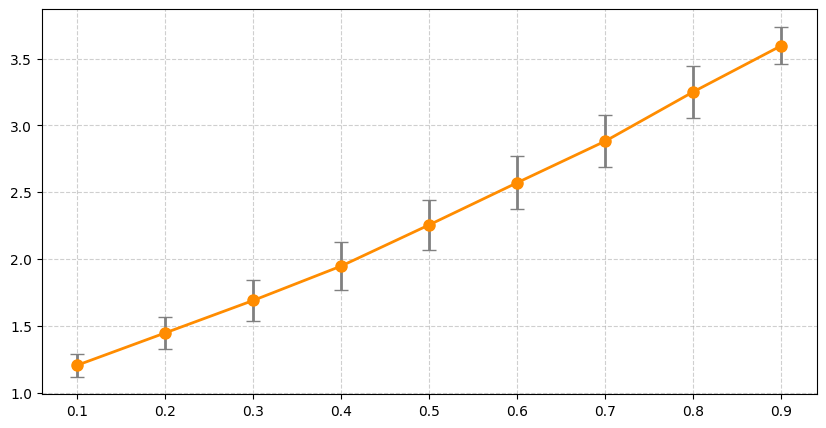

In [30]:
avg_autocorrelation = [np.mean([features[4] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_autocorrelation = [np.std([features[4] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_autocorrelation, yerr=std_autocorrelation, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#### Here are samples that produced the lowest, middle, and highest autocorrelation values, for 0.5 random variable setting.

In [145]:
df_autocorrelation = df[df['p'] == 0.5
                           ].sort_values(by=["autocorrelation"])[['autocorrelation', 'glcm', 'image']]

df_autocorrelation

autocorrelation                                               glcm  \
0.5_330         1.757143  [[0.43333333333333335, 0.24761904761904763], [...   
0.5_235         1.800000  [[0.4, 0.22857142857142856], [0.27142857142857...   
0.5_72          1.800000  [[0.4095238095238095, 0.23809523809523808], [0...   
0.5_423         1.819048  [[0.3904761904761905, 0.2523809523809524], [0....   
0.5_309         1.823810  [[0.40476190476190477, 0.2619047619047619], [0...   
...                  ...                                                ...   
0.5_103         2.723810  [[0.12380952380952381, 0.22857142857142856], [...   
0.5_58          2.742857  [[0.13333333333333333, 0.2], [0.22857142857142...   
0.5_57          2.747619  [[0.12857142857142856, 0.22380952380952382], [...   
0.5_497         2.771429  [[0.10476190476190476, 0.22380952380952382], [...   
0.5_76          2.895238  [[0.06666666666666667, 0.21904761904761905], [...   

                                                     image  
0.5_330  [[0, 0, 0, 1, 0, 0, 0, 1], [1, 0, 1, 1, 0, 1, ...  
0.5_235  [[0, 1, 1, 0, 1, 0, 1, 1], [1, 1, 0, 0, 0, 0, ...  
0.5_72   [[0, 0, 1, 0, 1, 0, 1, 0], [1, 1, 0, 0, 1, 1, ...  
0.5_423  [[1, 0, 1, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 0, ...  
0.5_309  [[0, 0, 0, 1, 1, 0, 0, 1], [0, 0, 0, 0, 1, 0, ...  
...                                                    ...  
0.5_103  [[1, 1, 0, 0, 0, 1, 1, 0], [0, 1, 1, 0, 1, 0, ...  
0.5_58   [[1, 1, 0, 0, 1, 1, 0, 0], [1, 1, 1, 0, 0, 0, ...  
0.5_57   [[1, 0, 0, 1, 0, 1, 1, 1], [0, 1, 1, 1, 1, 1, ...  
0.5_497  [[0, 0, 1, 1, 1, 1, 1, 1], [0, 0, 0, 1, 1, 1, ...  
0.5_76   [[1, 0, 1, 1, 0, 1, 0, 1], [0, 1, 1, 1, 1, 0, ...  

[500 rows x 3 columns]

In [147]:
mid_idx = len(df_autocorrelation) // 2
start = max(0, mid_idx - (5 // 2))
end = start + 5

df_middle_5 = df_autocorrelation.iloc[start:end]
df_middle_5

autocorrelation                                               glcm  \
0.5_500         2.247619  [[0.21904761904761905, 0.28095238095238095], [...   
0.5_96          2.247619  [[0.22857142857142856, 0.2714285714285714], [0...   
0.5_74          2.247619  [[0.24761904761904763, 0.2571428571428571], [0...   
0.5_336         2.252381  [[0.23333333333333334, 0.2619047619047619], [0...   
0.5_478         2.252381  [[0.2523809523809524, 0.24761904761904763], [0...   

                                                     image  
0.5_500  [[1, 1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 0, 1, 1, ...  
0.5_96   [[0, 1, 1, 0, 1, 1, 1, 0], [0, 1, 0, 0, 1, 0, ...  
0.5_74   [[0, 1, 0, 1, 0, 1, 0, 1], [0, 1, 1, 0, 1, 1, ...  
0.5_336  [[0, 1, 1, 1, 1, 1, 0, 0], [1, 0, 0, 1, 1, 1, ...  
0.5_478  [[1, 1, 1, 0, 0, 1, 1, 0], [1, 1, 1, 1, 1, 1, ...

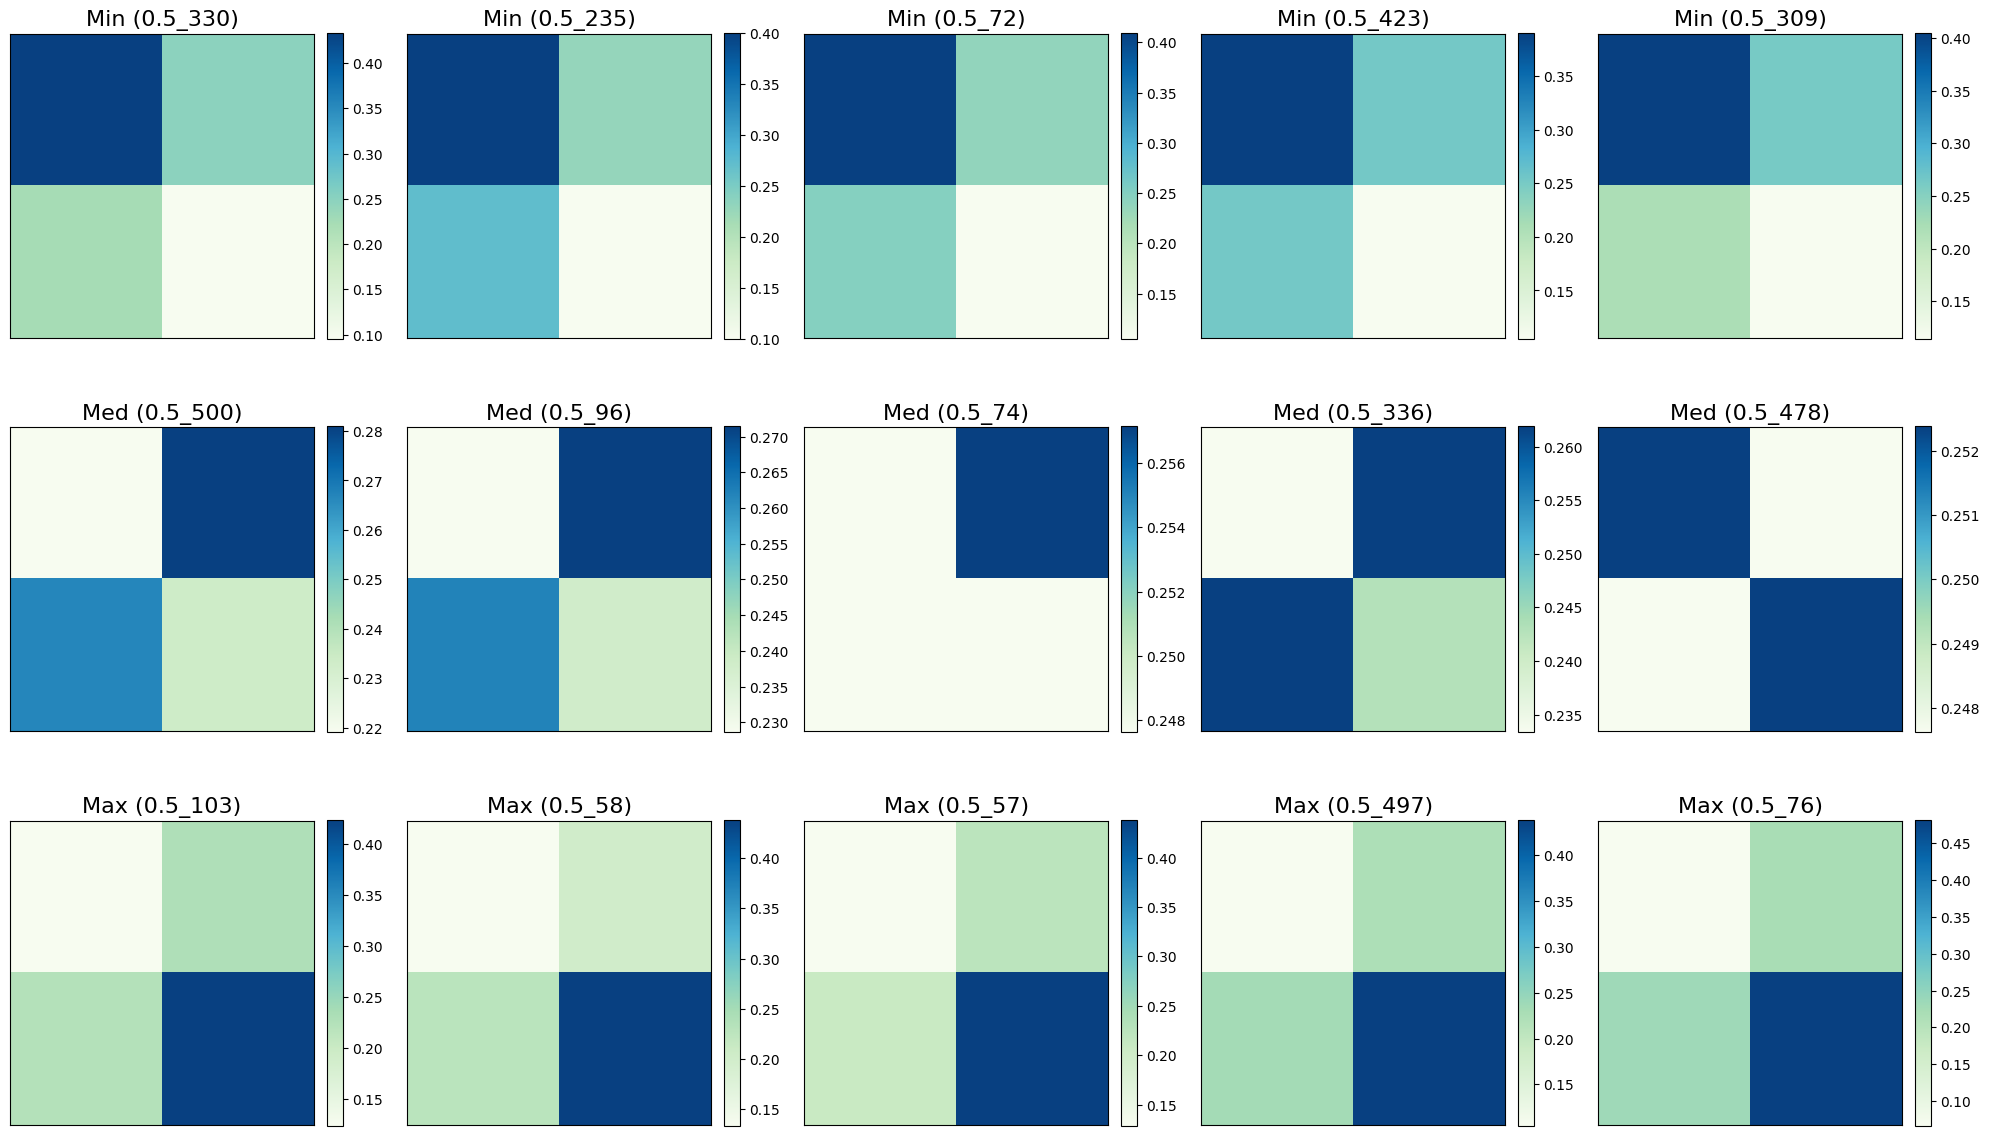

In [148]:
autocorrelation_keys = [
    '0.5_330', '0.5_235', '0.5_72', '0.5_423', '0.5_309', 
    '0.5_500', '0.5_96', '0.5_74', '0.5_336', '0.5_478',   
    '0.5_103', '0.5_58', '0.5_57', '0.5_497', '0.5_76'  
]

autocorrelation_titles = [
    'Min', 'Min', 'Min', 'Min', 'Min',
    'Med', 'Med', 'Med', 'Med', 'Med', 
    'Max', 'Max', 'Max', 'Max', 'Max'
]

fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.flatten() 

for i in range(15):
    ax = axes[i]
    key = autocorrelation_keys[i]
    
    im = ax.imshow(df['glcm'][key], cmap='GnBu')
    ax.set_title(f'{autocorrelation_titles[i]} ({autocorrelation_keys[i]})', fontsize=16)
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

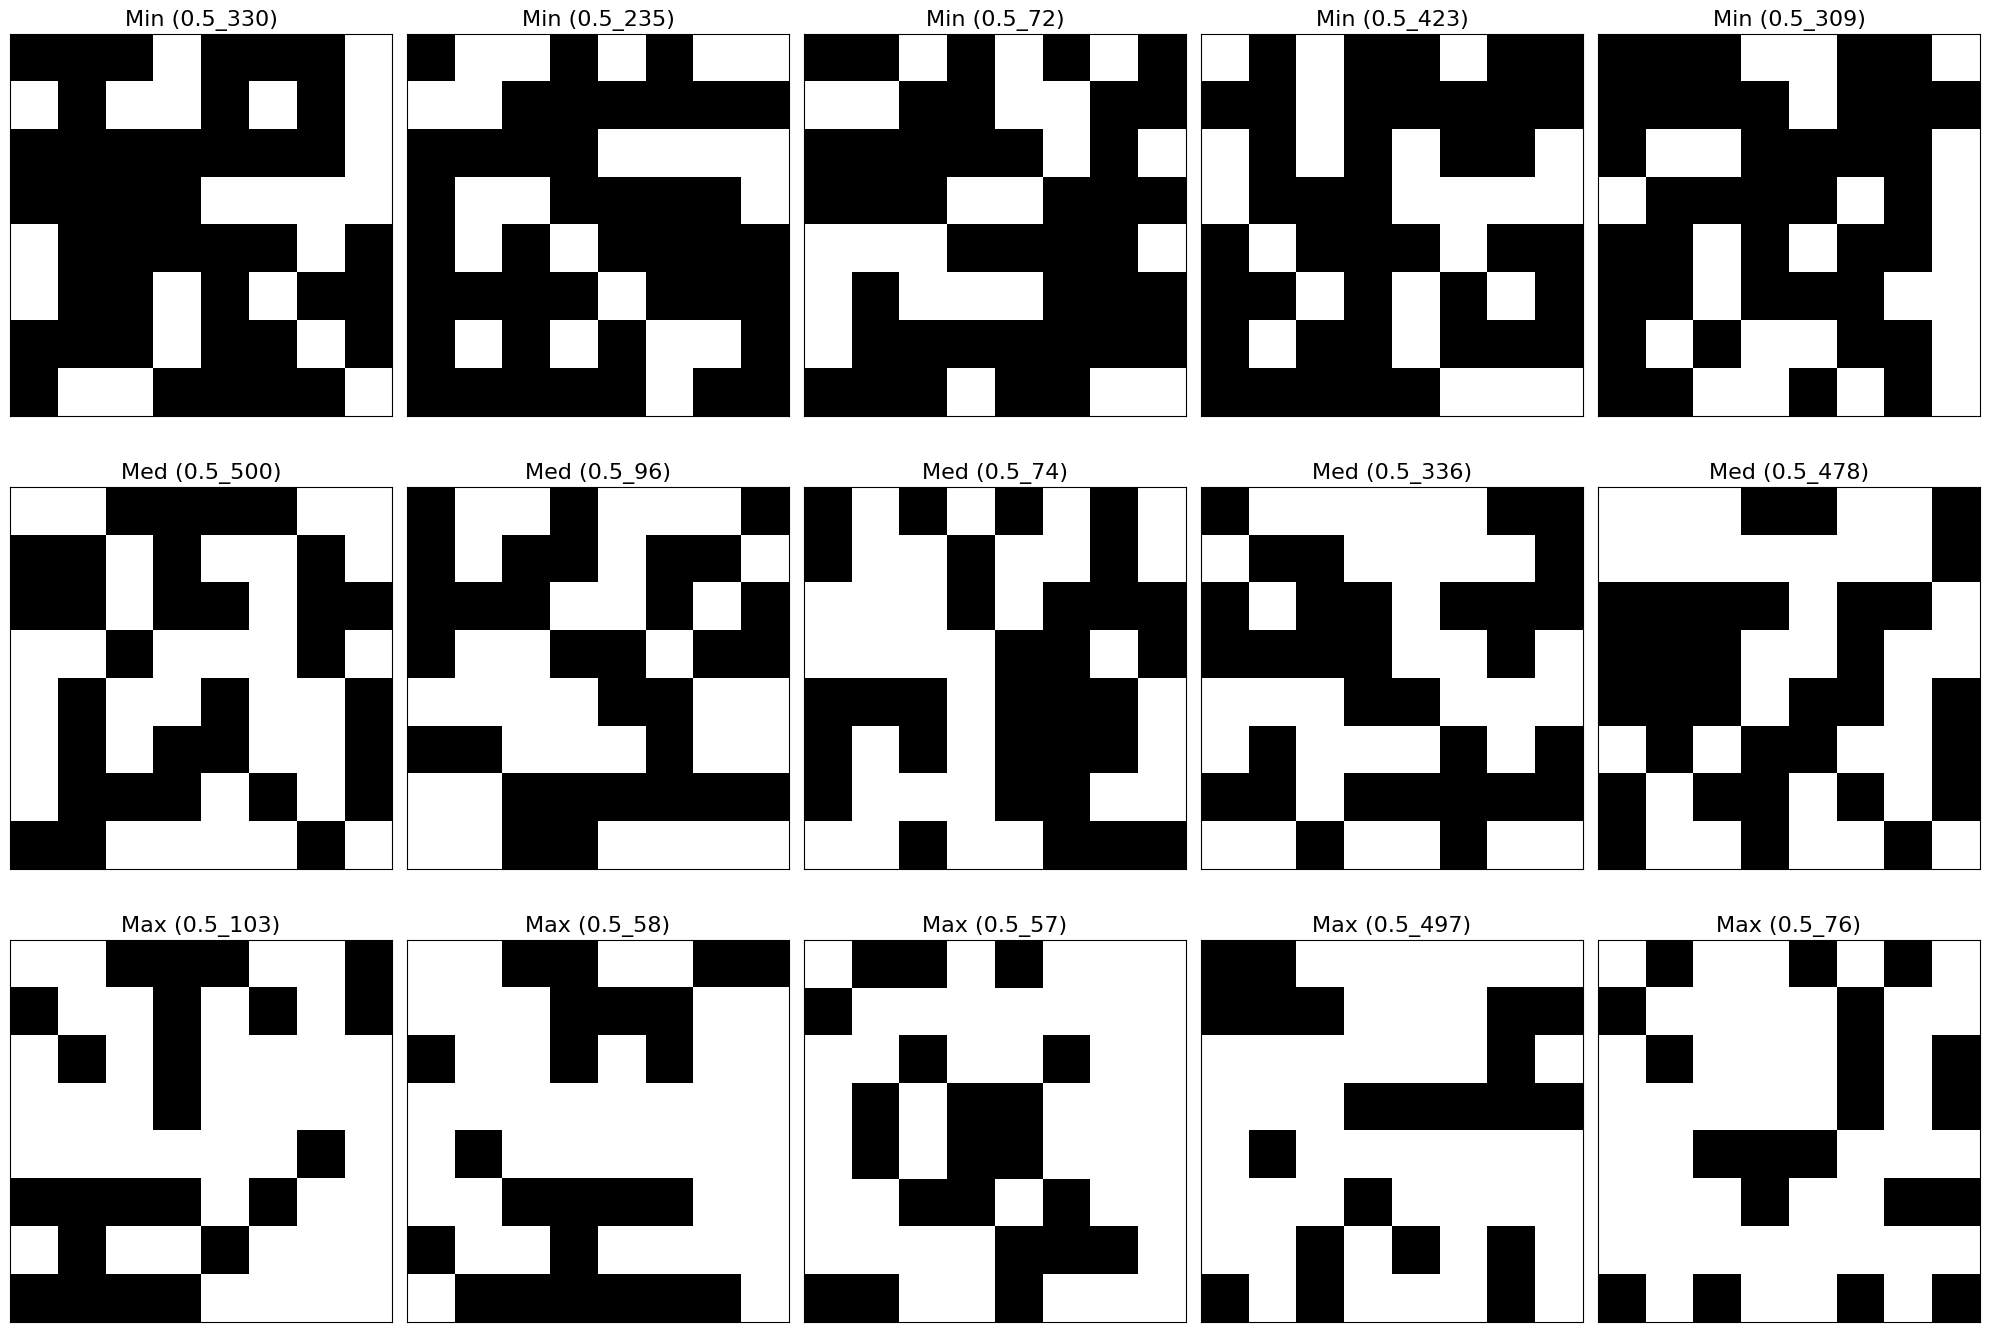

In [149]:
fig, axes = plt.subplots(3, 5, figsize=(20, 14))
axes = axes.flatten() 

for i in range(15):
    ax = axes[i]
    key = autocorrelation_keys[i]
    
    im = ax.imshow(df['image'][key], cmap='gray')
    ax.set_title(f'{autocorrelation_titles[i]} ({autocorrelation_keys[i]})', fontsize=16)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

## Cluster prominence

$$ \sum_{i=1}^{N} \sum_{j=1}^{N} (i + j - \mu_x - \mu_y)^4 p(i, j) $$
Aslo written as:
$$ \sum_{i=1}^{N} \sum_{j=1}^{N} (i + j - 2\mu)^4 p(i, j) $$


$\mu_x$ and $\mu_y$ are the mean gray levels of the rows and columns of the GLCM. They represent the "center of mass" or the average intensity co-occurrence in the matrix.

The wieght can be rewritten as $(i- \mu_x)+(j- \mu_y)$, the sum of deviations from the mean. This term measures the distance of a specific co-occurrence $(i, j)$ from the mean. The sum $(i+j)$ is compared against the sum of the means $(\mu_x + \mu_y)$, so this feature focuses on how much the texture "protrudes" from the average. Since the difference is raised to the 4th power, it heavily penalizes entries that are far away from the center of the GLCM. This would also ensure a positive value $\big( (-a)^4 = a^4 \big)$

Cluster prominence is a measure of the asymmetry of the image. A High cluster prominence indicates the image is not visually "smooth"; it suggests the presence of distinct, high contrast clusters (very bright or very dark areas) that stand out against the background ($ 2\mu$). A low cluster prominence indicates that the GLCM is concentrated near the mean. The image is likely more uniform.

* It measures local intensity variation (Parmer et al.).
* Cluster Prominence is a measure of the skewness and asymmetry of the GLCM. A higher values implies more asymmetry about the mean while a lower value indicates a peak near the mean value and less variation about the mean (pyradiomics)

Note: In Lofstedt et al. it is raised to the 3rd power instead of the 4th.

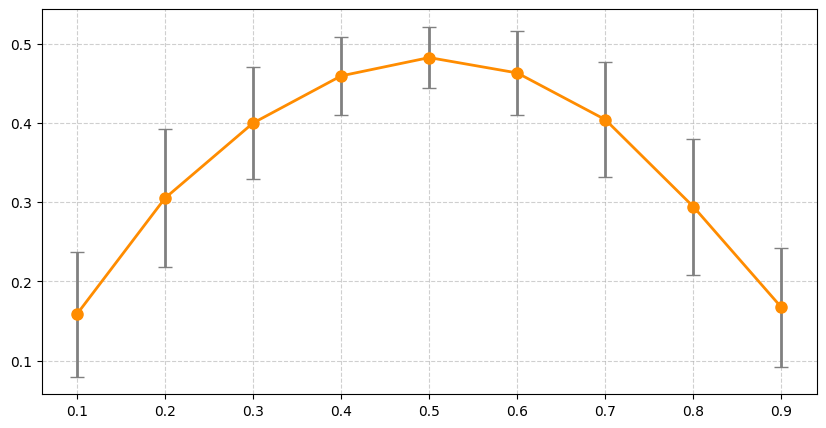

In [118]:
avg_clusterprom = [np.mean([features[5] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_clusterprom = [np.std([features[5] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_clusterprom, yerr=std_clusterprom, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')


plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Below we compare samples that produced 5 of the lowest, middle, and highest values of Cluster prominence. We focus on random settings between 0.4 and 0.6 to avoid redundancy.

In [119]:
df_cluster_prominence = df[(df['p'] == 0.4) | (df['p'] == 0.5) | (df['p'] == 0.6)
            ].sort_values(by=["cluster_prominence"])[['cluster_prominence', 'glcm', 'image']]

df_cluster_prominence

cluster_prominence  \
0.6_163            0.164740   
0.6_269            0.289605   
0.6_44             0.291200   
0.6_115            0.294123   
0.4_452            0.295052   
...                     ...   
0.6_409            0.599413   
0.5_366            0.610084   
0.4_98             0.613963   
0.5_5              0.616787   
0.4_261            0.617719   

                                                      glcm  \
0.6_163  [[0.014285714285714285, 0.18571428571428572], ...   
0.6_269  [[0.04285714285714286, 0.18571428571428572], [...   
0.6_44   [[0.05714285714285714, 0.24285714285714285], [...   
0.6_115  [[0.06190476190476191, 0.23809523809523808], [...   
0.4_452  [[0.5761904761904761, 0.20476190476190476], [0...   
...                                                    ...   
0.6_409  [[0.319047619047619, 0.19523809523809524], [0....   
0.5_366  [[0.2523809523809524, 0.18095238095238095], [0...   
0.4_98   [[0.37142857142857144, 0.18571428571428572], [...   
0.5_5    [[0.26666666666666666, 0.20476190476190476], [...   
0.4_261  [[0.34285714285714286, 0.1761904761904762], [0...   

                                                     image  
0.6_163  [[1, 1, 1, 0, 1, 1, 1, 0], [0, 0, 1, 1, 1, 1, ...  
0.6_269  [[0, 0, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, ...  
0.6_44   [[1, 1, 0, 1, 1, 0, 0, 1], [1, 1, 1, 1, 0, 1, ...  
0.6_115  [[1, 0, 1, 1, 1, 0, 1, 0], [1, 0, 1, 0, 1, 1, ...  
0.4_452  [[1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 0, 0, ...  
...                                                    ...  
0.6_409  [[1, 0, 1, 1, 0, 0, 1, 0], [1, 1, 0, 1, 1, 1, ...  
0.5_366  [[0, 0, 1, 1, 1, 1, 1, 0], [0, 0, 0, 1, 1, 1, ...  
0.4_98   [[1, 0, 0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 1, 0, ...  
0.5_5    [[1, 0, 1, 0, 1, 0, 1, 1], [1, 1, 1, 1, 1, 1, ...  
0.4_261  [[1, 0, 1, 0, 0, 1, 1, 1], [1, 1, 1, 1, 1, 1, ...  

[1500 rows x 3 columns]

In [120]:
mid_idx = len(df_cluster_prominence) // 2
start = max(0, mid_idx - (5 // 2))
end = start + 5

df_middle_5 = df_cluster_prominence.iloc[start:end]
df_middle_5

cluster_prominence  \
0.4_75             0.469817   
0.6_104            0.469817   
0.4_305            0.469907   
0.5_457            0.470123   
0.5_142            0.470123   

                                                      glcm  \
0.4_75   [[0.4238095238095238, 0.23333333333333334], [0...   
0.6_104  [[0.12857142857142856, 0.21428571428571427], [...   
0.4_305  [[0.3333333333333333, 0.24761904761904763], [0...   
0.5_457  [[0.2523809523809524, 0.2571428571428571], [0....   
0.5_142  [[0.21904761904761905, 0.2571428571428571], [0...   

                                                     image  
0.4_75   [[0, 0, 0, 0, 0, 1, 1, 1], [0, 0, 0, 0, 0, 0, ...  
0.6_104  [[0, 1, 1, 1, 1, 1, 1, 0], [1, 1, 0, 0, 0, 1, ...  
0.4_305  [[1, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 1, 0, ...  
0.5_457  [[1, 1, 0, 1, 1, 1, 1, 0], [0, 0, 0, 0, 1, 0, ...  
0.5_142  [[0, 0, 1, 1, 0, 1, 1, 0], [1, 1, 1, 1, 0, 1, ...

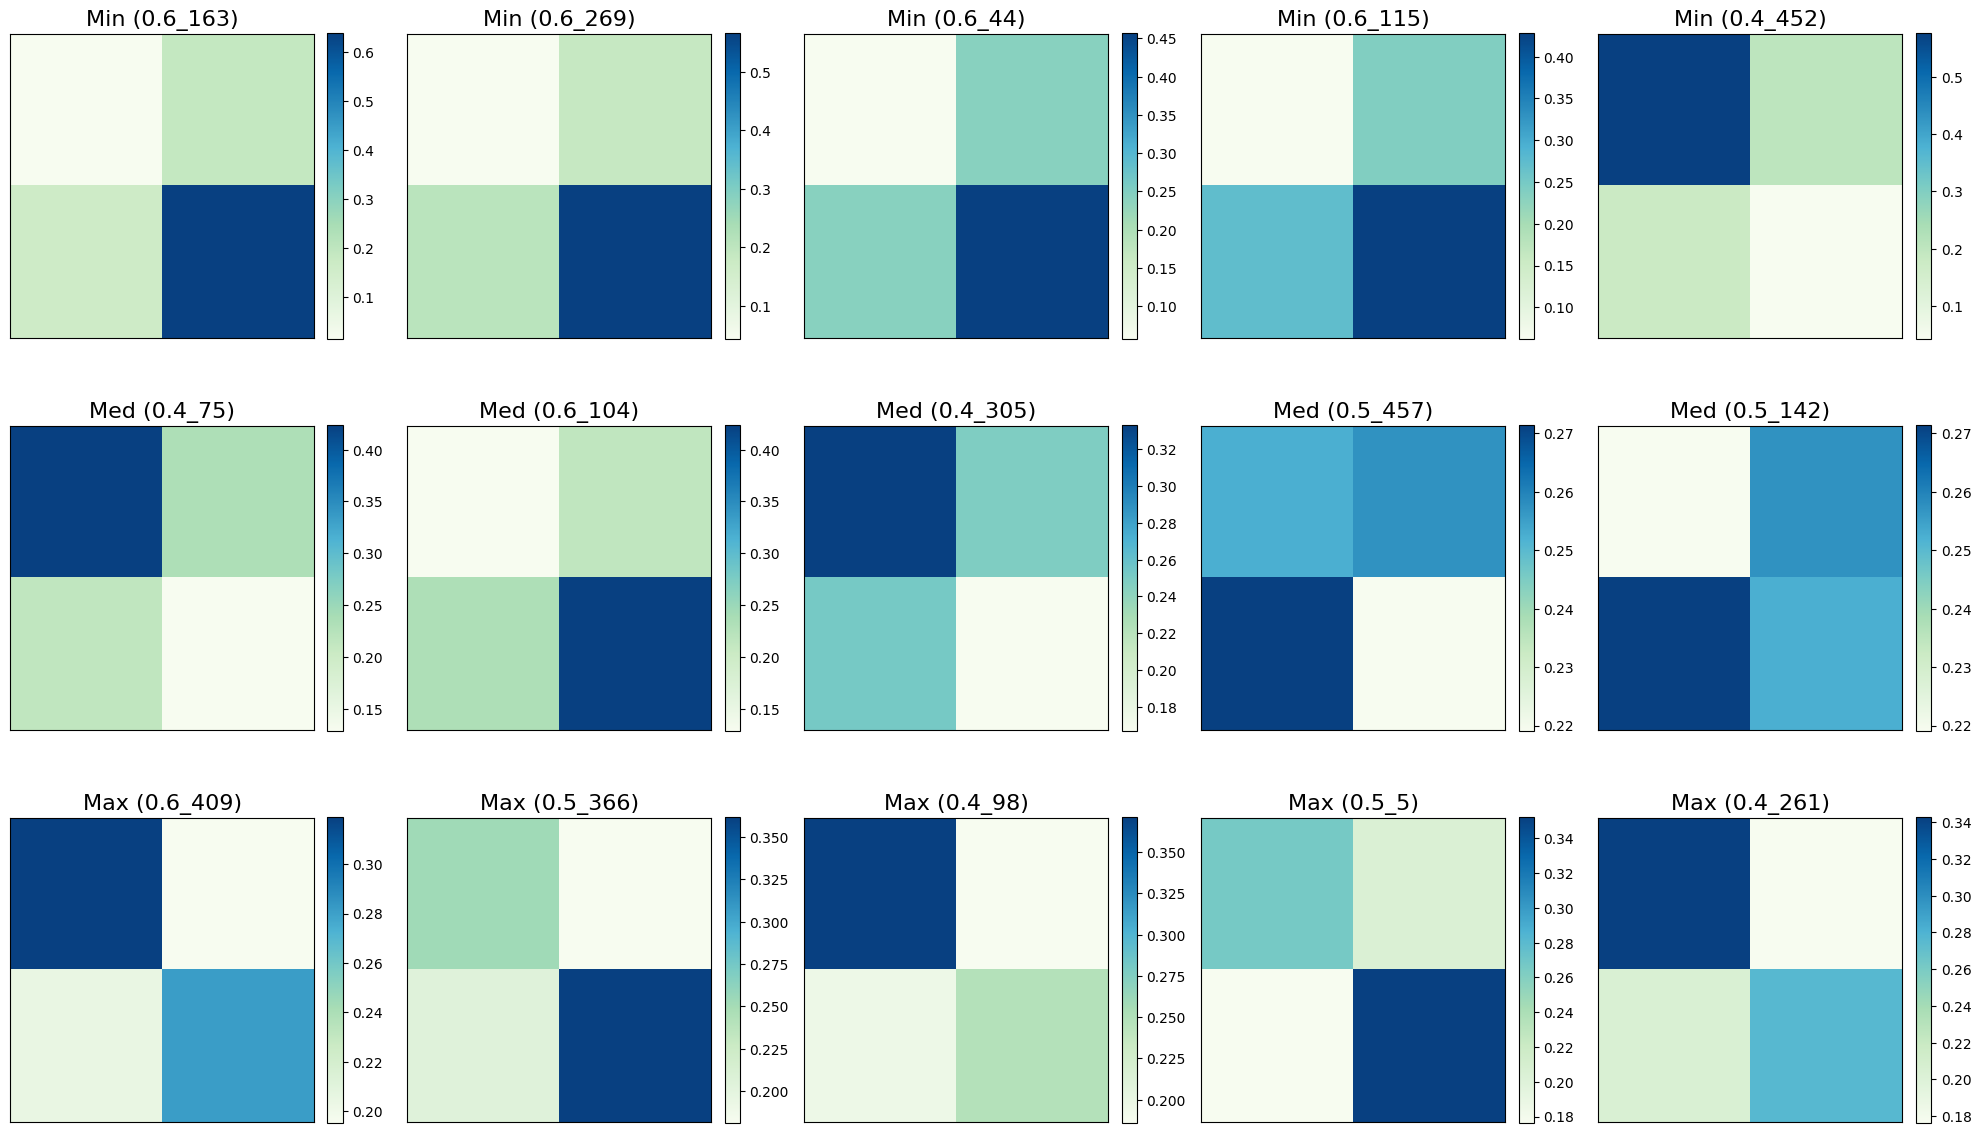

In [127]:
cluster_prominence_keys = [
    '0.6_163', '0.6_269', '0.6_44', '0.6_115', '0.4_452', 
    '0.4_75', '0.6_104', '0.4_305', '0.5_457', '0.5_142',   
    '0.6_409', '0.5_366', '0.4_98', '0.5_5', '0.4_261'  
]

cluster_prominence_titles = [
    'Min', 'Min', 'Min', 'Min', 'Min',
    'Med', 'Med', 'Med', 'Med', 'Med', 
    'Max', 'Max', 'Max', 'Max', 'Max'
]

fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.flatten() 

for i in range(15):
    ax = axes[i]
    key = cluster_prominence_keys[i]
    
    im = ax.imshow(df['glcm'][key], cmap='GnBu')
    ax.set_title(f'{cluster_prominence_titles[i]} ({cluster_prominence_keys[i]})', fontsize=16)
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

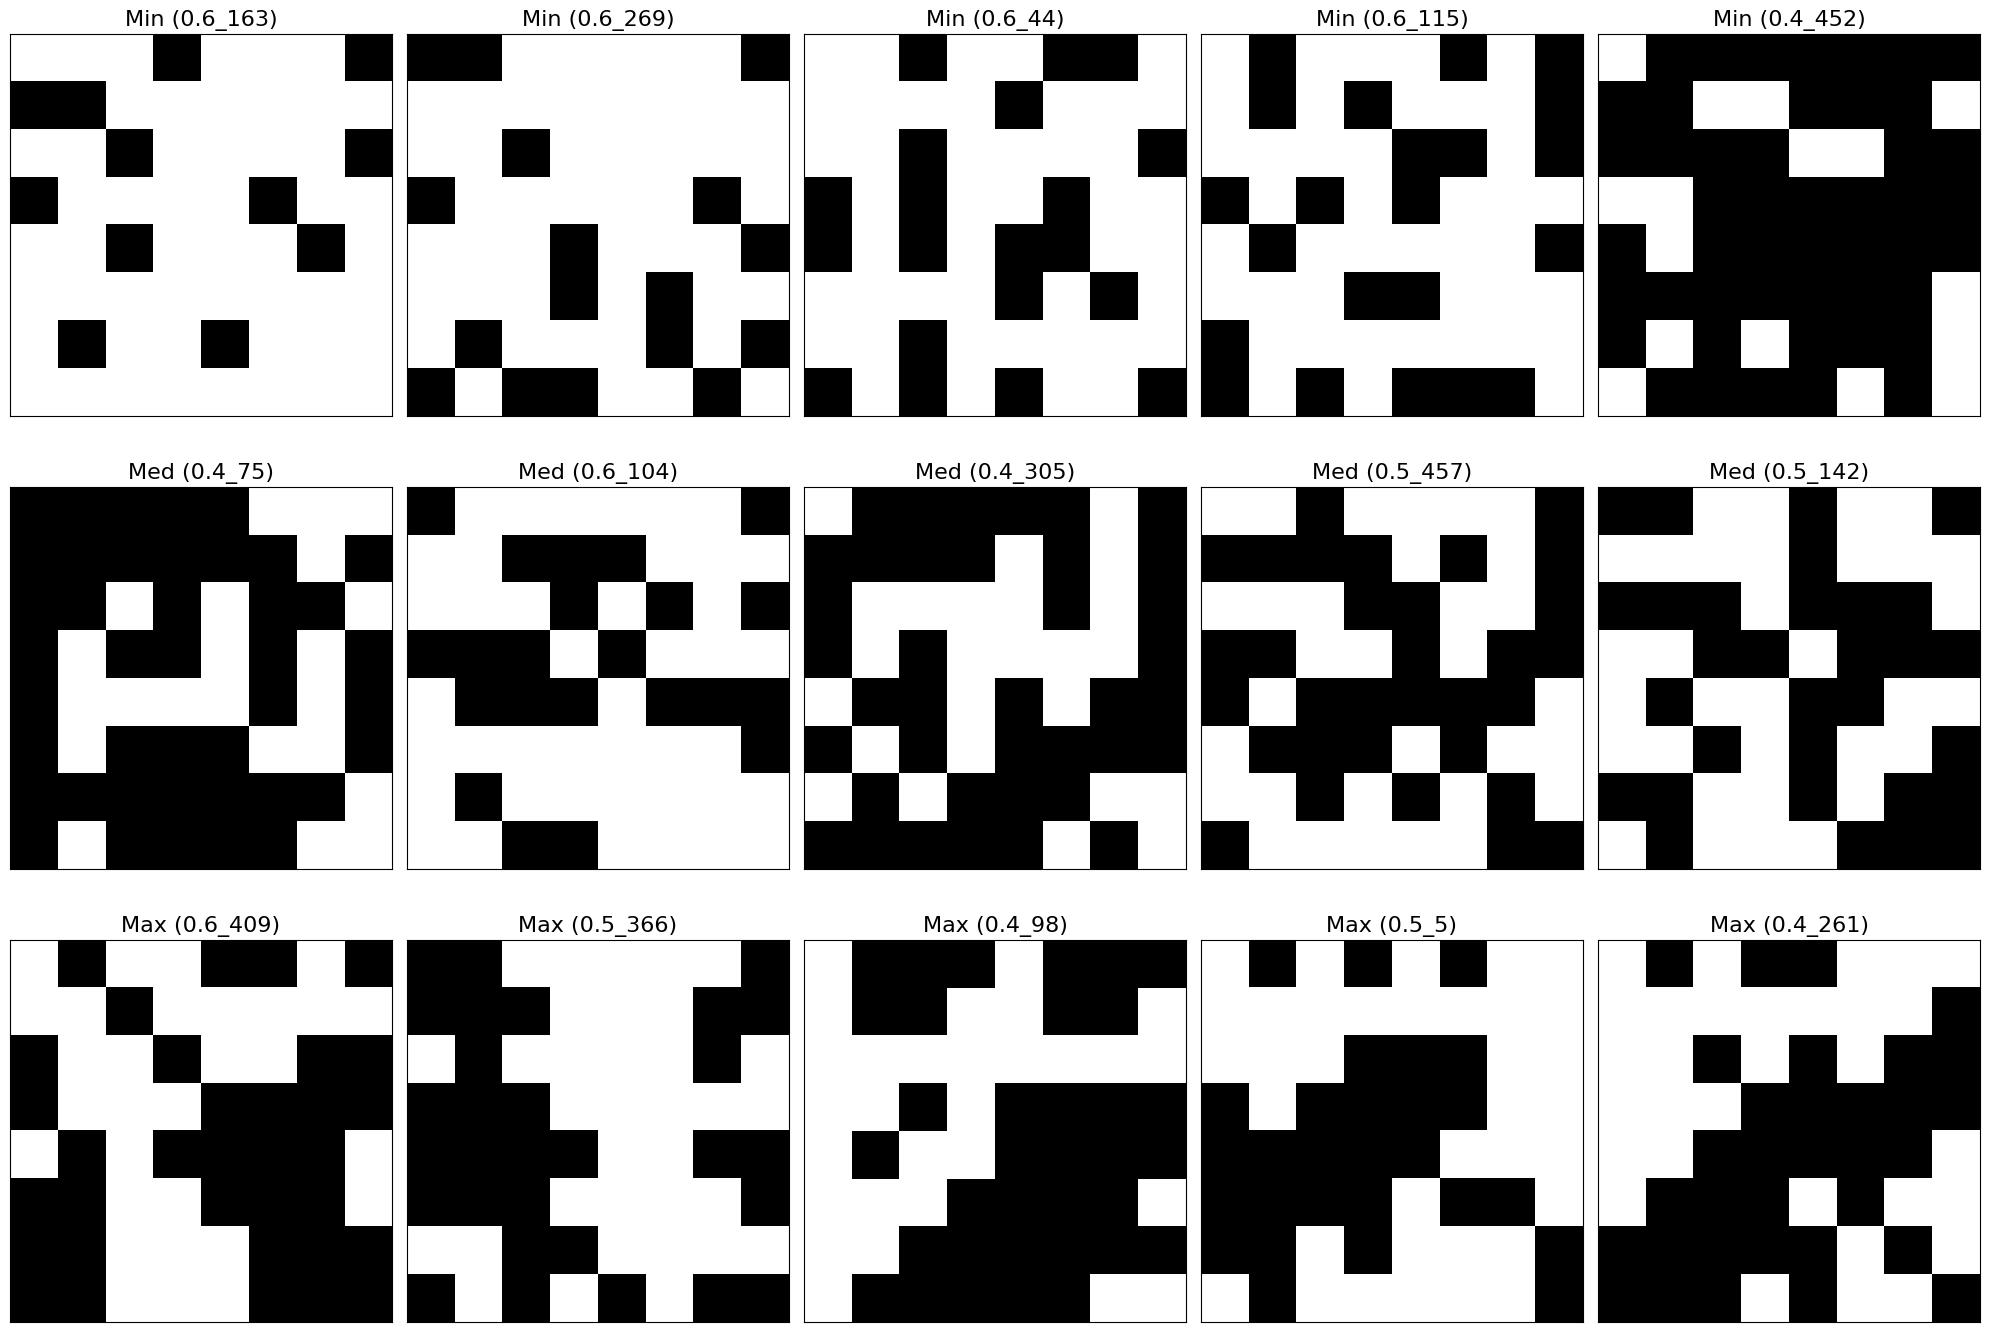

In [128]:
fig, axes = plt.subplots(3, 5, figsize=(20, 14))
axes = axes.flatten() 

for i in range(15):
    ax = axes[i]
    key = cluster_prominence_keys[i]
    
    im = ax.imshow(df['image'][key], cmap='gray')
    ax.set_title(f'{cluster_prominence_titles[i]} ({cluster_prominence_keys[i]})', fontsize=16)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

## Cluster shade

$$ \sum_{i=1}^{N} \sum_{j=1}^{N} (i + j - \mu_x - \mu_y)^3 p(i, j) $$
Aslo written as:
$$ \sum_{i=1}^{N} \sum_{j=1}^{N} (i + j - 2\mu)^3 p(i, j) $$

Similar to the interpetation of cluster prominence; except that this function is raised to the third power. This allows for negative values. 

* Cluster Shade is a measure of the skewness and uniformity of the GLCM. A higher cluster shade implies greater asymmetry about the mean (pyradiomics).
* Cluster shade and cluster prominence are measures of skewness of the matrix, in other words the lack of symmetry. When cluster shade and cluster prominence are high, the image is ot symmetric. (Parmer et al.)

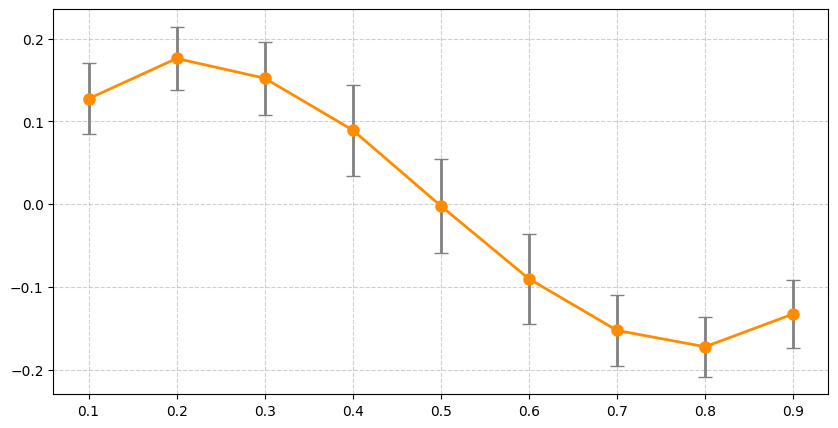

In [162]:
avg_clustershade = [np.mean([features[6] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_clustershade = [np.std([features[6] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_clustershade, yerr=std_clustershade, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Below we compare samples that produced 5 of the lowest, middle, and highest values of Cluster shade. We consider various random settings between to capture complexity.

In [185]:
# 0.2 and 0.3
df[(df['p'] == 0.2) | (df['p'] == 0.3) 
   ].sort_values(by=["cluster_shade"])[['cluster_shade', 'glcm', 'image']]

cluster_shade                                               glcm  \
0.3_110       0.014136  [[0.3, 0.20476190476190476], [0.21428571428571...   
0.3_236       0.019866  [[0.2523809523809524, 0.2904761904761905], [0....   
0.3_247       0.035741  [[0.28095238095238095, 0.2714285714285714], [0...   
0.3_343       0.037598  [[0.3047619047619048, 0.28095238095238095], [0...   
0.3_379       0.045994  [[0.29523809523809524, 0.2523809523809524], [0...   
...                ...                                                ...   
0.2_444       0.294762  [[0.5952380952380952, 0.13333333333333333], [0...   
0.2_144       0.300787  [[0.7, 0.14761904761904762], [0.09047619047619...   
0.2_281       0.305143  [[0.6714285714285714, 0.12857142857142856], [0...   
0.2_296       0.331557  [[0.5523809523809524, 0.11904761904761904], [0...   
0.2_419       0.351566  [[0.6571428571428571, 0.13333333333333333], [0...   

                                                     image  
0.3_110  [[1, 0, 0, 0, 0, 1, 1, 0], [0, 1, 0, 0, 1, 1, ...  
0.3_236  [[0, 0, 1, 0, 1, 0, 1, 0], [0, 0, 0, 0, 1, 0, ...  
0.3_247  [[0, 0, 1, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 1, ...  
0.3_343  [[0, 1, 1, 0, 0, 0, 1, 0], [0, 0, 0, 1, 1, 0, ...  
0.3_379  [[0, 1, 0, 1, 1, 1, 0, 0], [0, 1, 0, 1, 1, 1, ...  
...                                                    ...  
0.2_444  [[1, 1, 1, 0, 0, 0, 0, 1], [1, 1, 1, 0, 0, 0, ...  
0.2_144  [[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...  
0.2_281  [[0, 0, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 0, 1, ...  
0.2_296  [[1, 0, 1, 0, 1, 1, 1, 1], [0, 0, 0, 1, 1, 1, ...  
0.2_419  [[0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 1, ...  

[1000 rows x 3 columns]

In [186]:
# 0.5
df[df['p'] == 0.5].sort_values(by=["cluster_shade"])[['cluster_shade', 'glcm', 'image']]

cluster_shade                                               glcm  \
0.5_58       -0.161075  [[0.13333333333333333, 0.2], [0.22857142857142...   
0.5_57       -0.157359  [[0.12857142857142856, 0.22380952380952382], [...   
0.5_146      -0.154315  [[0.1380952380952381, 0.22857142857142856], [0...   
0.5_103      -0.138857  [[0.12380952380952381, 0.22857142857142856], [...   
0.5_376      -0.137250  [[0.18571428571428572, 0.2], [0.21904761904761...   
...                ...                                                ...   
0.5_471       0.123578  [[0.40476190476190477, 0.22857142857142856], [...   
0.5_93        0.125277  [[0.38571428571428573, 0.23333333333333334], [...   
0.5_22        0.133117  [[0.3904761904761905, 0.19523809523809524], [0...   
0.5_204       0.150980  [[0.42857142857142855, 0.20952380952380953], [...   
0.5_217       0.207300  [[0.4666666666666667, 0.21428571428571427], [0...   

                                                     image  
0.5_58   [[1, 1, 0, 0, 1, 1, 0, 0], [1, 1, 1, 0, 0, 0, ...  
0.5_57   [[1, 0, 0, 1, 0, 1, 1, 1], [0, 1, 1, 1, 1, 1, ...  
0.5_146  [[0, 1, 0, 0, 0, 1, 1, 1], [1, 1, 0, 1, 0, 0, ...  
0.5_103  [[1, 1, 0, 0, 0, 1, 1, 0], [0, 1, 1, 0, 1, 0, ...  
0.5_376  [[0, 1, 1, 0, 0, 1, 1, 0], [1, 1, 1, 1, 1, 1, ...  
...                                                    ...  
0.5_471  [[1, 0, 0, 0, 0, 1, 1, 1], [1, 0, 0, 0, 0, 0, ...  
0.5_93   [[0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 1, 0, 1, 0, ...  
0.5_22   [[0, 0, 0, 1, 0, 1, 1, 1], [0, 0, 0, 0, 0, 0, ...  
0.5_204  [[1, 0, 1, 0, 0, 0, 0, 0], [0, 1, 0, 1, 0, 1, ...  
0.5_217  [[0, 0, 0, 0, 0, 1, 1, 1], [1, 0, 0, 1, 0, 0, ...  

[500 rows x 3 columns]

In [189]:
# 0.7 and 0.8
df[(df['p'] == 0.7) | (df['p'] == 0.8) 
   ].sort_values(by=["cluster_shade"])[['cluster_shade', 'glcm', 'image']]

cluster_shade                                               glcm  \
0.7_493      -0.289526  [[0.1, 0.1523809523809524], [0.157142857142857...   
0.7_193      -0.286611  [[0.11428571428571428, 0.13333333333333333], [...   
0.7_394      -0.284600  [[0.10952380952380952, 0.17142857142857143], [...   
0.7_33       -0.284292  [[0.1, 0.16666666666666666], [0.14761904761904...   
0.8_479      -0.279069  [[0.05714285714285714, 0.10952380952380952], [...   
...                ...                                                ...   
0.7_408      -0.061607  [[0.10476190476190476, 0.2523809523809524], [0...   
0.7_238      -0.057516  [[0.23809523809523808, 0.21904761904761905], [...   
0.7_381      -0.047998  [[0.1619047619047619, 0.24761904761904763], [0...   
0.7_462      -0.045341  [[0.16666666666666666, 0.2571428571428571], [0...   
0.7_143      -0.033646  [[0.18095238095238095, 0.2714285714285714], [0...   

                                                     image  
0.7_493  [[1, 1, 1, 1, 0, 1, 1, 1], [1, 1, 1, 0, 0, 0, ...  
0.7_193  [[1, 1, 1, 1, 1, 1, 1, 1], [1, 0, 1, 1, 0, 0, ...  
0.7_394  [[0, 1, 1, 1, 1, 1, 1, 1], [1, 1, 0, 0, 1, 1, ...  
0.7_33   [[1, 1, 1, 1, 1, 0, 1, 1], [1, 1, 0, 1, 1, 0, ...  
0.8_479  [[1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 0, 1, 1, ...  
...                                                    ...  
0.7_408  [[1, 1, 1, 1, 1, 0, 1, 1], [1, 0, 1, 1, 1, 1, ...  
0.7_238  [[1, 0, 1, 1, 1, 0, 1, 1], [0, 0, 0, 0, 0, 1, ...  
0.7_381  [[0, 1, 1, 1, 1, 1, 1, 1], [0, 1, 0, 0, 1, 0, ...  
0.7_462  [[1, 1, 0, 1, 1, 0, 1, 1], [0, 0, 0, 1, 1, 0, ...  
0.7_143  [[0, 1, 0, 1, 1, 1, 0, 0], [0, 1, 1, 0, 1, 1, ...  

[1000 rows x 3 columns]

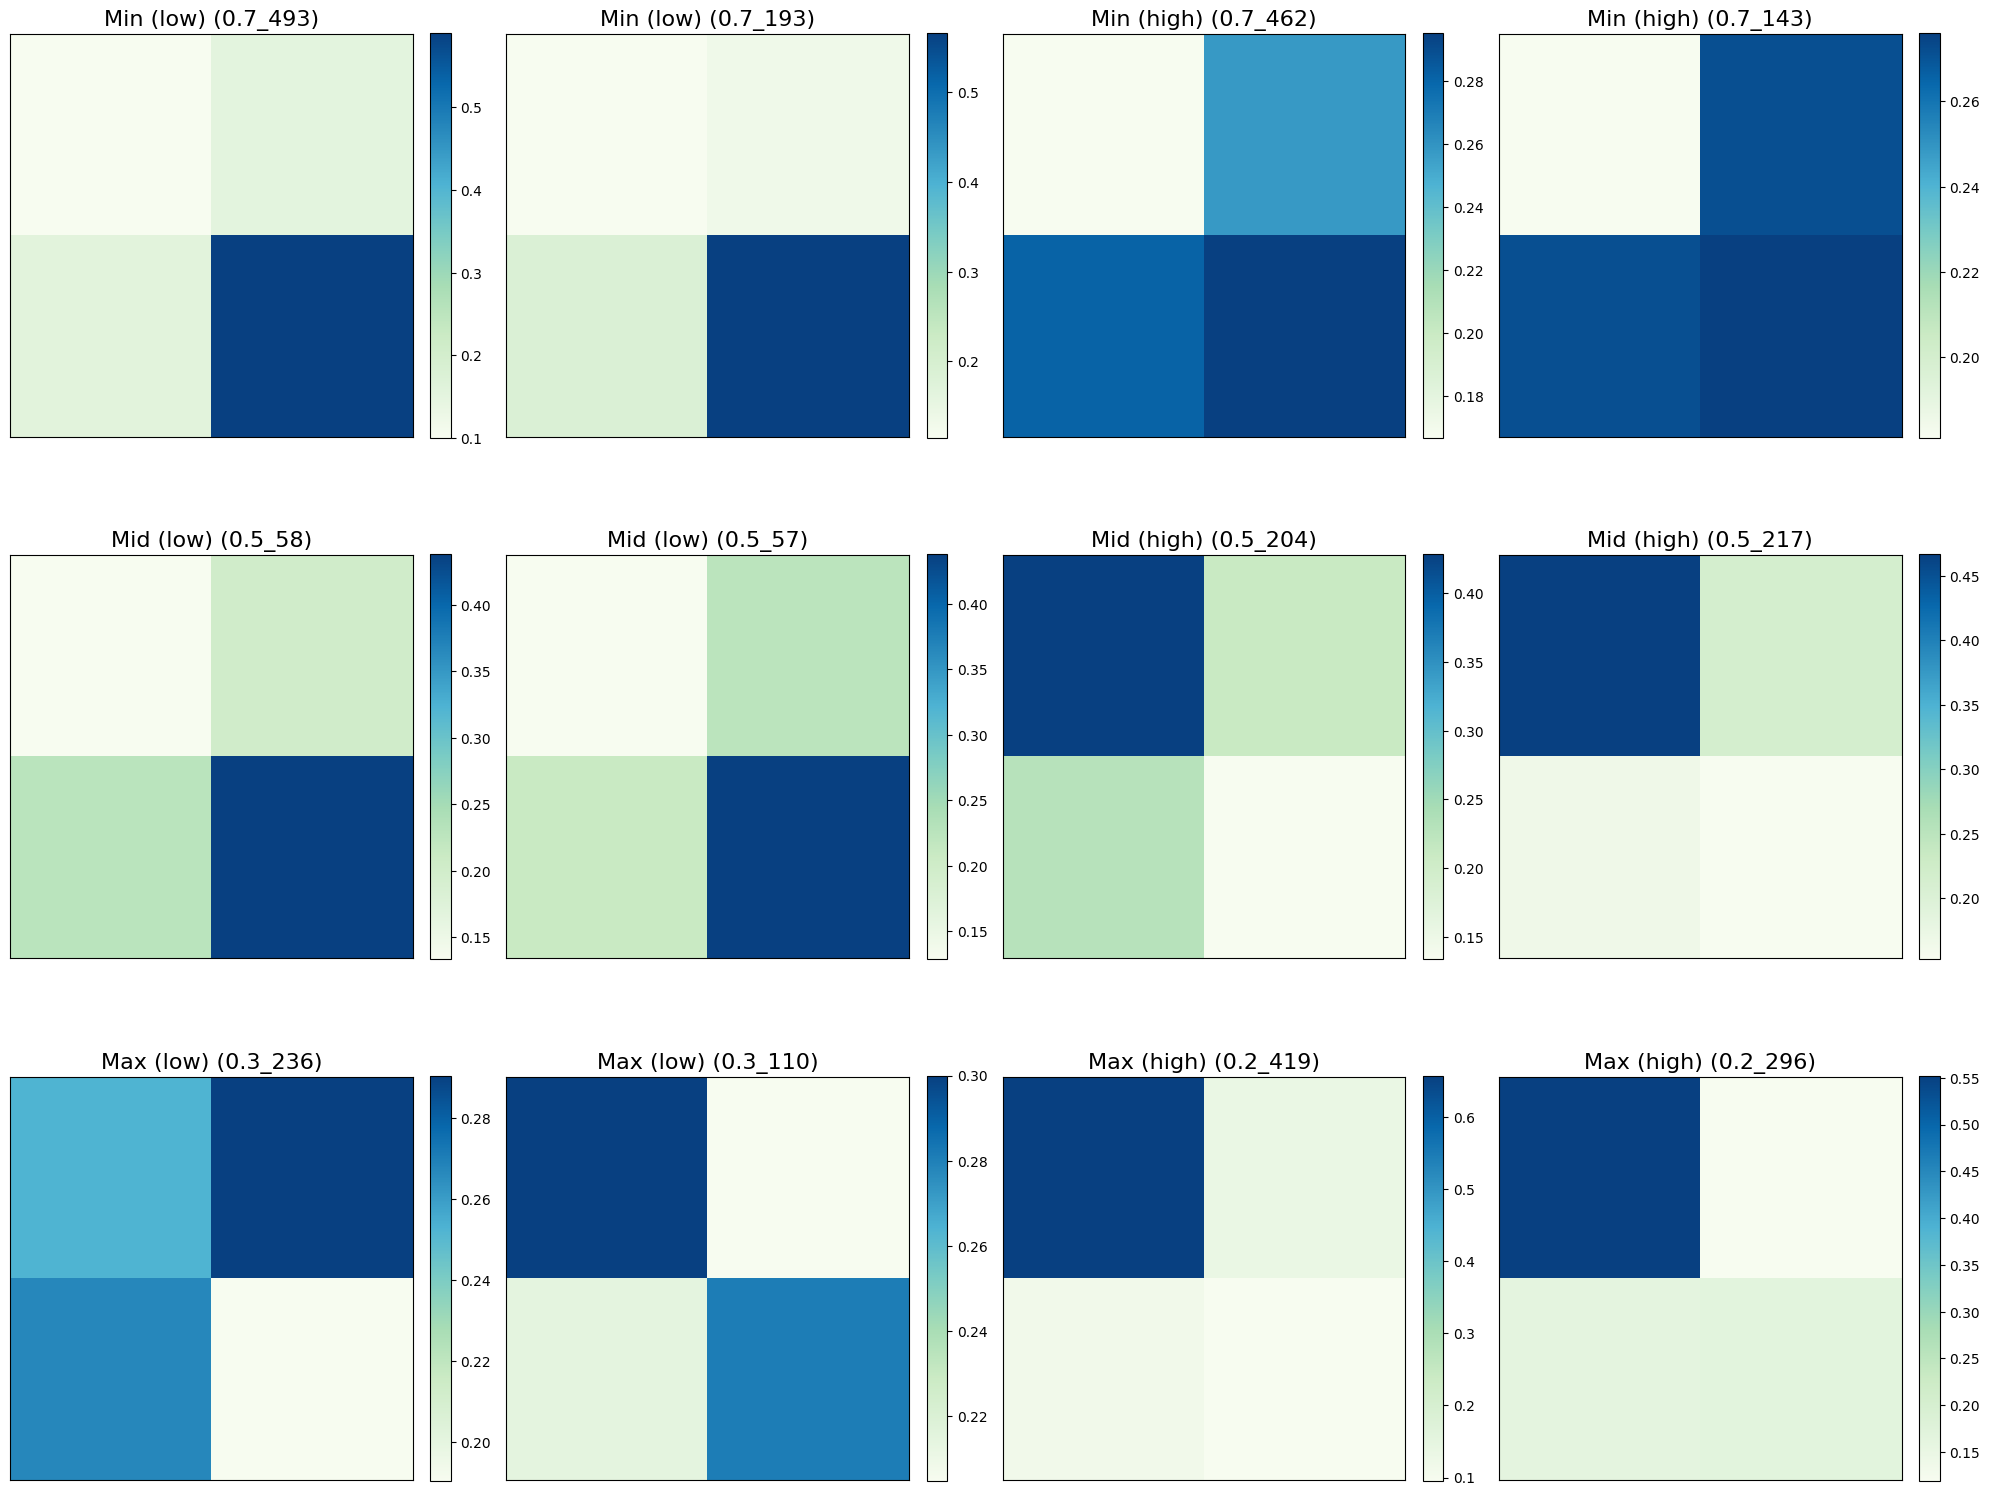

In [193]:
cluster_shade_keys = [
    '0.7_493', '0.7_193', '0.7_462', '0.7_143',  # 0.7 and 0.8
    '0.5_58', '0.5_57', '0.5_204', '0.5_217',  # 0.5   
    '0.3_236', '0.3_110', '0.2_419', '0.2_296'  # 0.2 and 0.3
]

cluster_shade_titles = [
    'Min (low)', 'Min (low)', 'Min (high)', 'Min (high)', 
    'Mid (low)', 'Mid (low)', 'Mid (high)', 'Mid (high)',  
    'Max (low)', 'Max (low)', 'Max (high)', 'Max (high)'
]

fig, axes = plt.subplots(3, 4, figsize=(20, 16))
axes = axes.flatten() 

for i in range(12):
    ax = axes[i]
    key = cluster_shade_keys[i]
    
    im = ax.imshow(df['glcm'][key], cmap='GnBu')
    ax.set_title(f'{cluster_shade_titles[i]} ({cluster_shade_keys[i]})', fontsize=16)
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

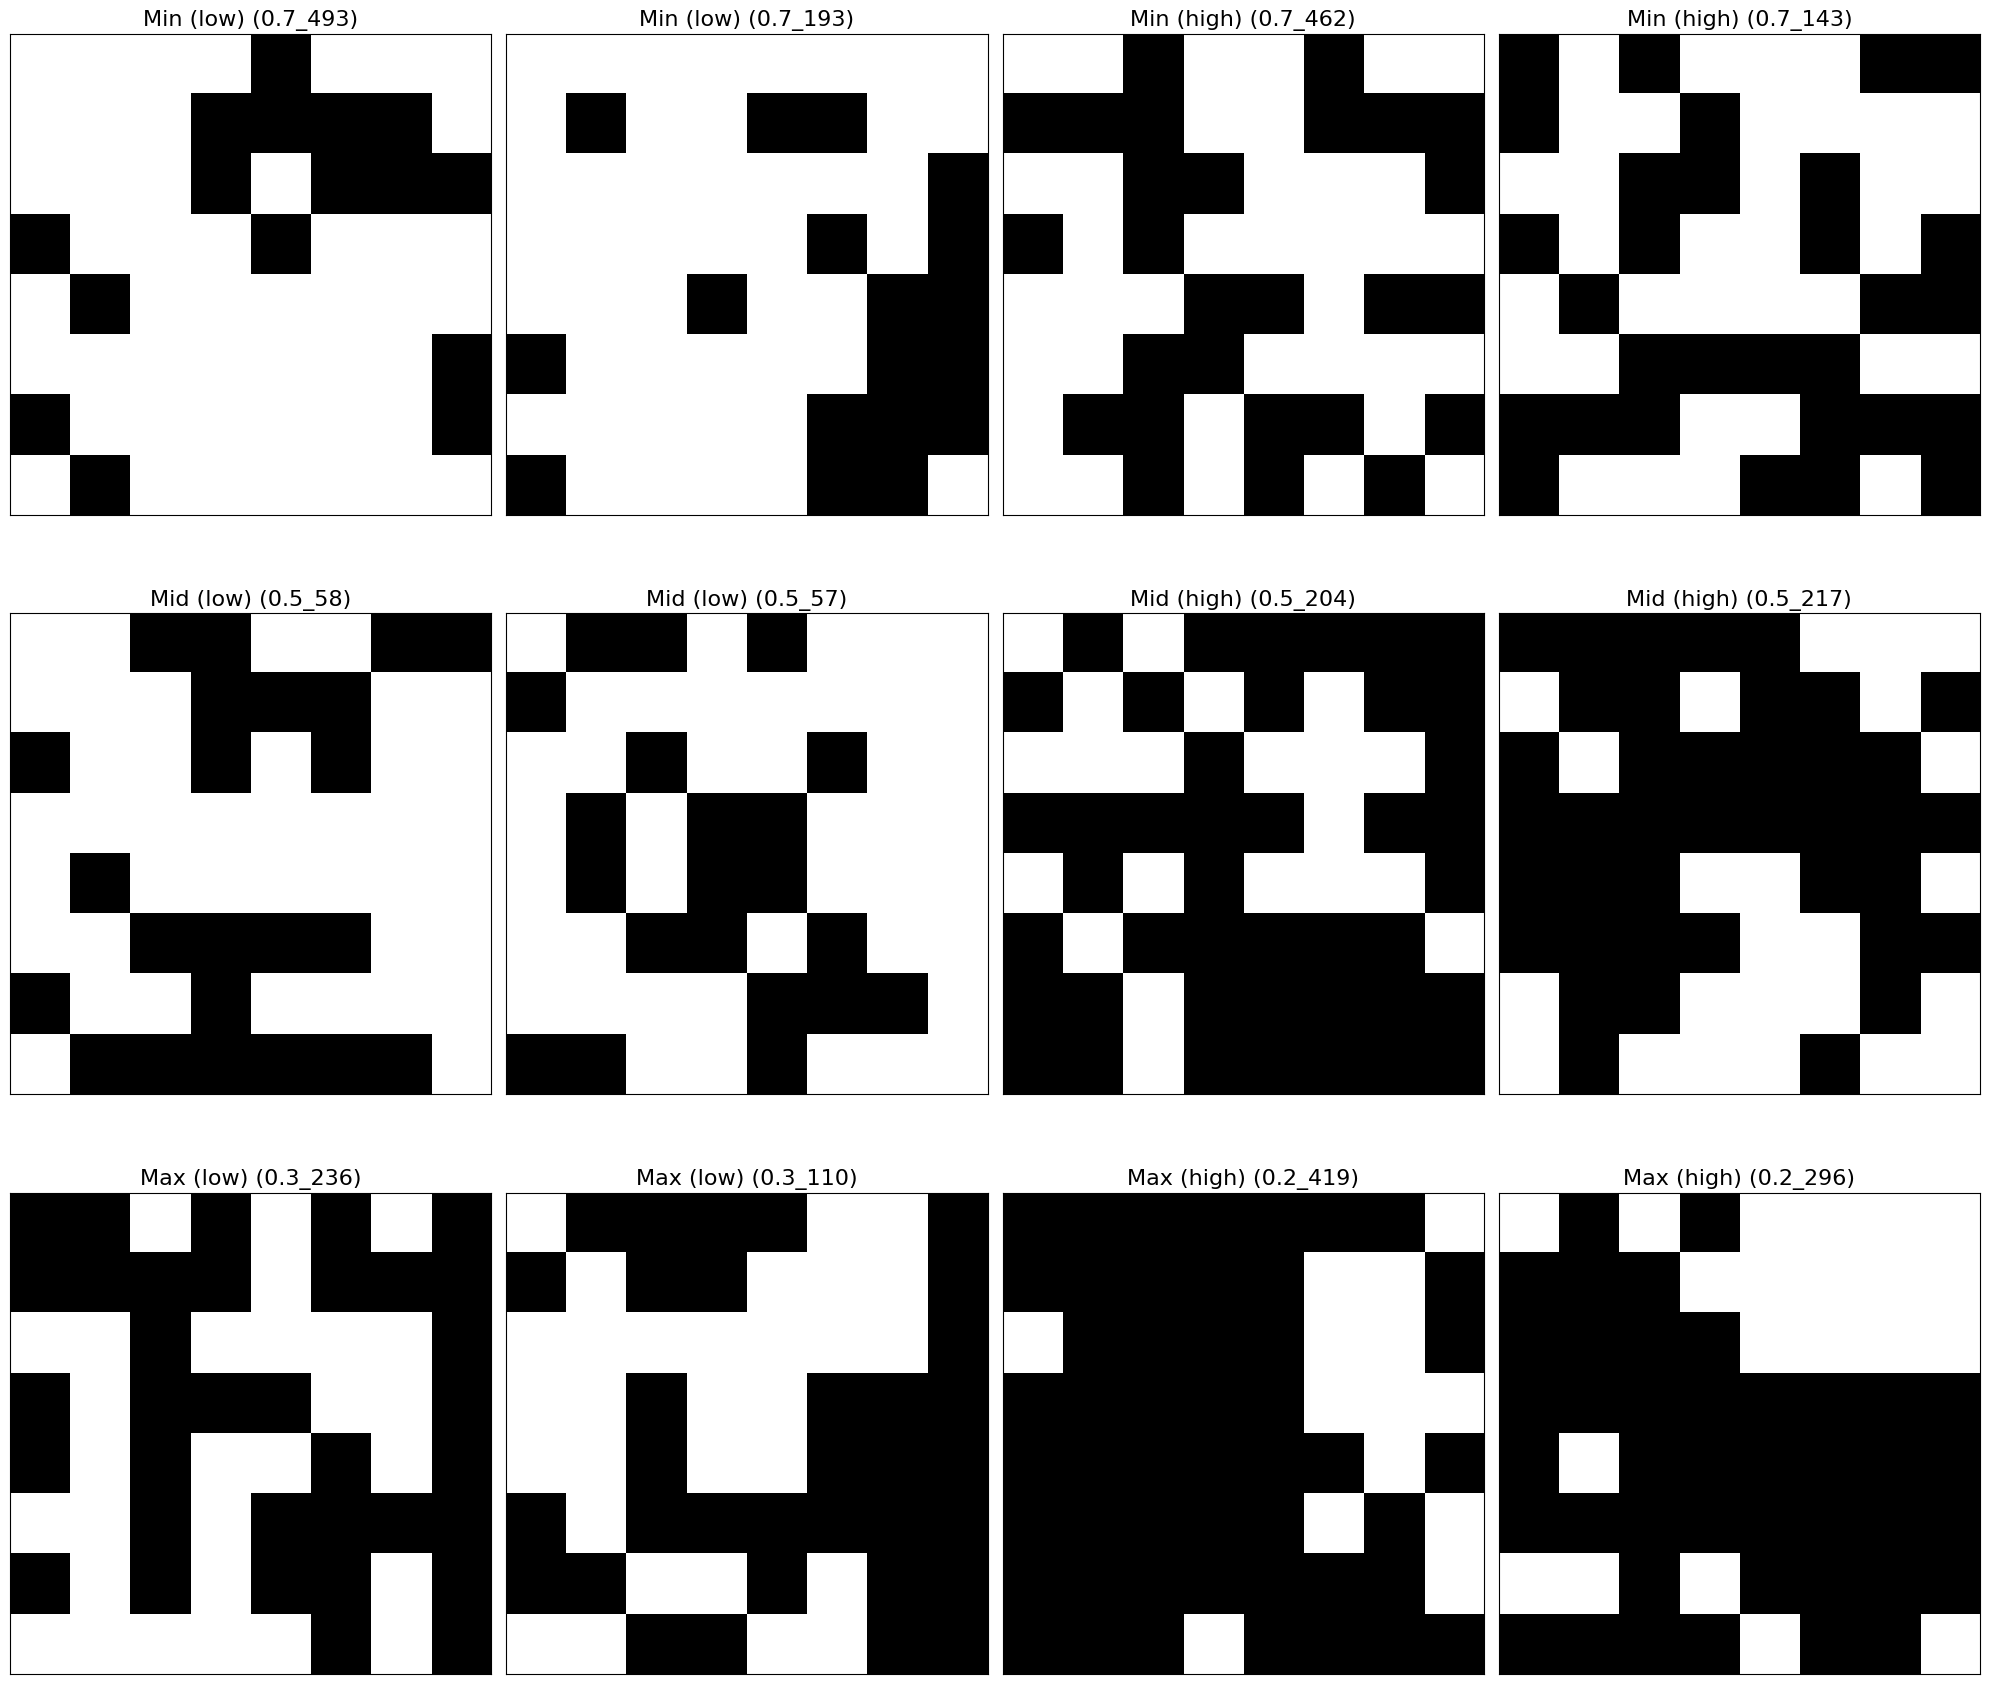

In [194]:
fig, axes = plt.subplots(3, 4, figsize=(20, 18))
axes = axes.flatten() 

for i in range(12):
    ax = axes[i]
    key = cluster_shade_keys[i]
    
    im = ax.imshow(df['image'][key], cmap='gray')
    ax.set_title(f'{cluster_shade_titles[i]} ({cluster_shade_keys[i]})', fontsize=16)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

## Cluster Tendency

$$ \sum_{i=1}^{N} \sum_{j=1}^{N} (i + j - \mu_x - \mu_y)^2 p(i, j) $$

Similar to the interpetation of cluster prominence. 

* Cluster Tendency is a measure of groupings of voxels with similar gray-level values. (pyradiomics)

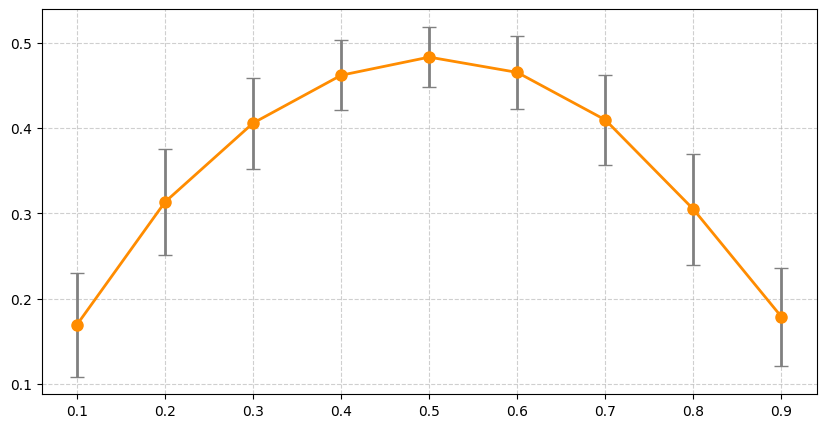

In [33]:
avg_clustertend = [np.mean([features[7] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_clustertend = [np.std([features[7] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_clustertend, yerr=std_clustertend, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Se samples under Cluster Prominence.

## Contrast

$$ \sum_{i=1}^{N} \sum_{j=1}^{N} (i - j)^2 p(i, j) $$

The term $(i - j)^2$ acts as a weighting kernel that measures the squared distance from the main diagonal of the GLCM. When $i - j = 0$, the weighting is zero. These entries represent pixels with identical intensities occurring in the specified spatial relationship.
The weighting increases quadratically as the distance $|i - j|$ increases. Consequently, this feature is highly sensitive to entries in the "far corners" of the matrix which represent transitions between extreme dark and extreme bright pixels.

If the probability mass of $p(i, j)$ is concentrated on or near the main diagonal, the summation remains small. In an image this translates to a homogeneous image where neighboring pixels have very similar gray levels. In this case, the GLCM is "diagonal-dominant".

If the mass is widely distributed across the off-diagonals, the contrast value grows. This indicates more frequent large intensity transitions. Which, in an image, can corresponds to sharp edges, high-frequency noise, or heavy texture.
 
* Contrast is a measure of the local intensity variation, favoring values away from the diagonal. A larger value correlates with a greater disparity in intensity values among neighboring voxels (pyradiomics).
* It measures local intensity variation (Parmer et al.).

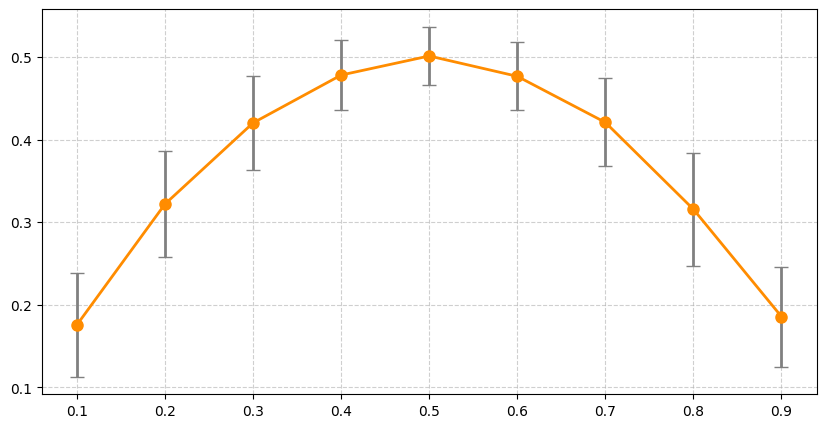

In [403]:
avg_contrast = [np.mean([features[0] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_contrast = [np.std([features[0] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
# plt.plot(BERNOULLI_SETTINGS, [sample_features[p][0][1] for p in BERNOULLI_SETTINGS], marker='o', linestyle='-', color='indigo', linewidth=2, markersize=8)
# plt.plot(BERNOULLI_SETTINGS, avg_image_contrast, marker='o', linestyle='-', color='indigo', linewidth=2, markersize=8)
plt.errorbar(BERNOULLI_SETTINGS, avg_contrast, yerr=std_contrast, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Below we compare samples that produced 5 of the lowest, middle, and highest values of Contrast. We focus on random settings between 0.4 and 0.6 to avoid redundancy.

In [176]:
df_contrast = df[(df['p'] == 0.4) | (df['p'] == 0.5) | (df['p'] == 0.6)
            ].sort_values(by=["contrast"])[['contrast', 'glcm', 'image']]

df_contrast

contrast                                               glcm  \
0.6_45   0.333333  [[0.09523809523809523, 0.1761904761904762], [0...   
0.6_455  0.338095  [[0.06190476190476191, 0.15714285714285714], [...   
0.4_7    0.338095  [[0.6142857142857143, 0.1761904761904762], [0....   
0.4_311  0.342857  [[0.5857142857142857, 0.1619047619047619], [0....   
0.6_163  0.347619  [[0.014285714285714285, 0.18571428571428572], ...   
...           ...                                                ...   
0.5_259  0.576190  [[0.20476190476190476, 0.2904761904761905], [0...   
0.6_182  0.576190  [[0.1619047619047619, 0.3047619047619048], [0....   
0.5_257  0.580952  [[0.22380952380952382, 0.2761904761904762], [0...   
0.5_2    0.585714  [[0.21428571428571427, 0.3], [0.28571428571428...   
0.4_315  0.585714  [[0.22380952380952382, 0.30952380952380953], [...   

                                                     image  
0.6_45   [[1, 1, 1, 1, 0, 0, 0, 0], [1, 1, 0, 0, 1, 0, ...  
0.6_455  [[1, 1, 1, 1, 0, 1, 1, 1], [1, 1, 1, 0, 1, 1, ...  
0.4_7    [[1, 0, 0, 0, 0, 0, 0, 1], [1, 1, 0, 1, 0, 0, ...  
0.4_311  [[1, 0, 0, 0, 0, 1, 0, 0], [1, 1, 1, 0, 0, 0, ...  
0.6_163  [[1, 1, 1, 0, 1, 1, 1, 0], [0, 0, 1, 1, 1, 1, ...  
...                                                    ...  
0.5_259  [[0, 0, 0, 1, 0, 0, 1, 1], [1, 1, 1, 1, 1, 0, ...  
0.6_182  [[0, 0, 0, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, ...  
0.5_257  [[0, 1, 0, 1, 0, 0, 1, 0], [1, 1, 0, 0, 1, 0, ...  
0.5_2    [[0, 1, 0, 1, 0, 1, 0, 0], [0, 1, 0, 1, 0, 0, ...  
0.4_315  [[0, 1, 0, 0, 0, 0, 1, 0], [0, 0, 1, 1, 0, 1, ...  

[1500 rows x 3 columns]

In [177]:
mid_idx = len(df_contrast) // 2
start = max(0, mid_idx - (5 // 2))
end = start + 5

df_middle_5 = df_contrast.iloc[start:end]
df_middle_5

contrast                                               glcm  \
0.5_12   0.490476  [[0.3380952380952381, 0.23333333333333334], [0...   
0.6_317  0.490476  [[0.14761904761904762, 0.2523809523809524], [0...   
0.6_18   0.490476  [[0.10952380952380952, 0.23809523809523808], [...   
0.6_259  0.490476  [[0.1380952380952381, 0.23333333333333334], [0...   
0.5_79   0.490476  [[0.26666666666666666, 0.23333333333333334], [...   

                                                     image  
0.5_12   [[0, 1, 1, 1, 1, 1, 0, 0], [1, 0, 0, 1, 0, 0, ...  
0.6_317  [[1, 0, 0, 1, 1, 0, 1, 1], [1, 1, 1, 1, 1, 0, ...  
0.6_18   [[0, 1, 1, 1, 1, 1, 0, 1], [1, 1, 1, 1, 1, 1, ...  
0.6_259  [[0, 1, 1, 1, 1, 1, 1, 1], [1, 1, 0, 1, 1, 0, ...  
0.5_79   [[1, 1, 1, 0, 1, 0, 1, 0], [1, 0, 1, 0, 1, 0, ...

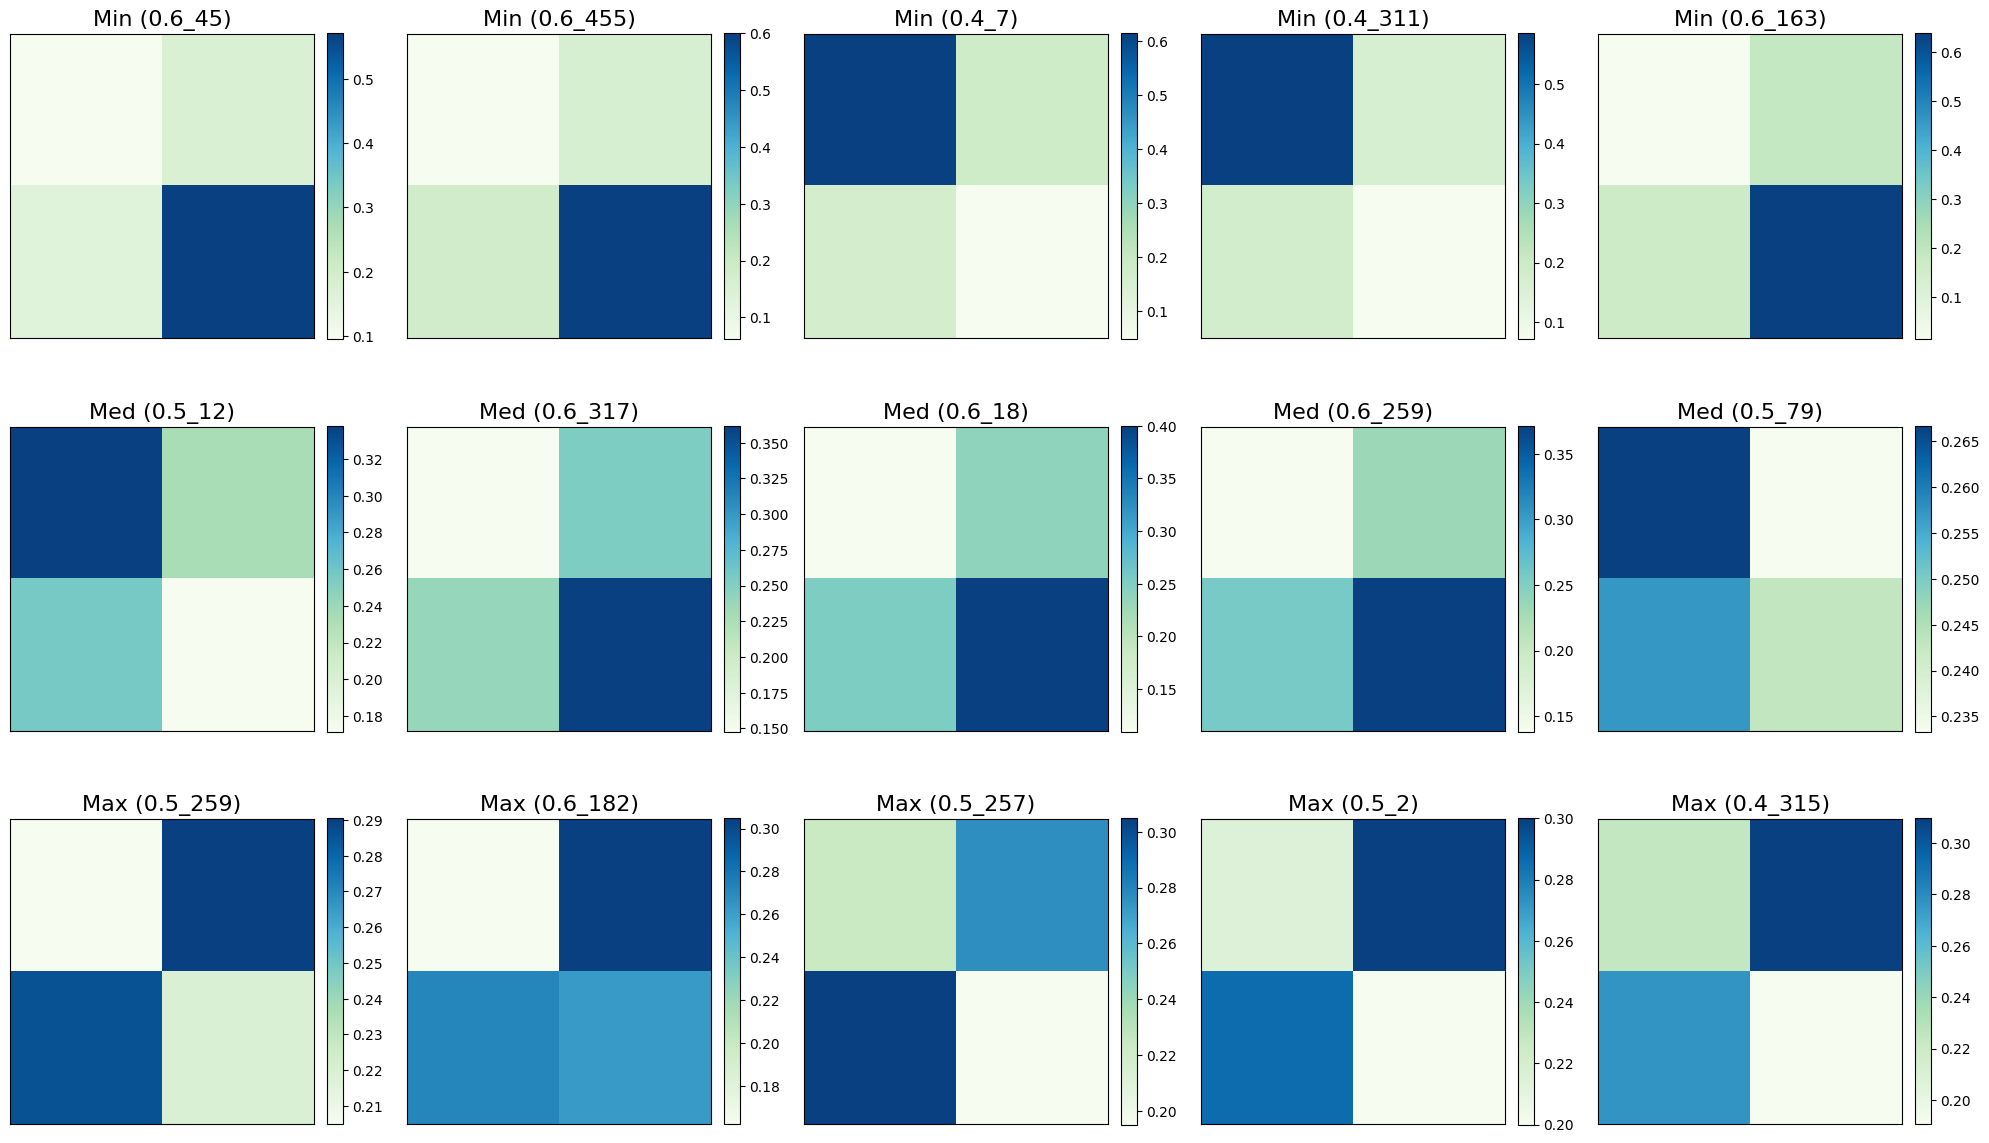

In [182]:
contrast_keys = [
    '0.6_45', '0.6_455', '0.4_7', '0.4_311', '0.6_163', 
    '0.5_12', '0.6_317', '0.6_18', '0.6_259', '0.5_79',   
    '0.5_259', '0.6_182', '0.5_257', '0.5_2', '0.4_315'  
]

contrast_titles = [
    'Min', 'Min', 'Min', 'Min', 'Min',
    'Med', 'Med', 'Med', 'Med', 'Med', 
    'Max', 'Max', 'Max', 'Max', 'Max'
]

fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.flatten() 

for i in range(15):
    ax = axes[i]
    key = contrast_keys[i]
    
    im = ax.imshow(df['glcm'][key], cmap='GnBu')
    ax.set_title(f'{contrast_titles[i]} ({contrast_keys[i]})', fontsize=16)
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

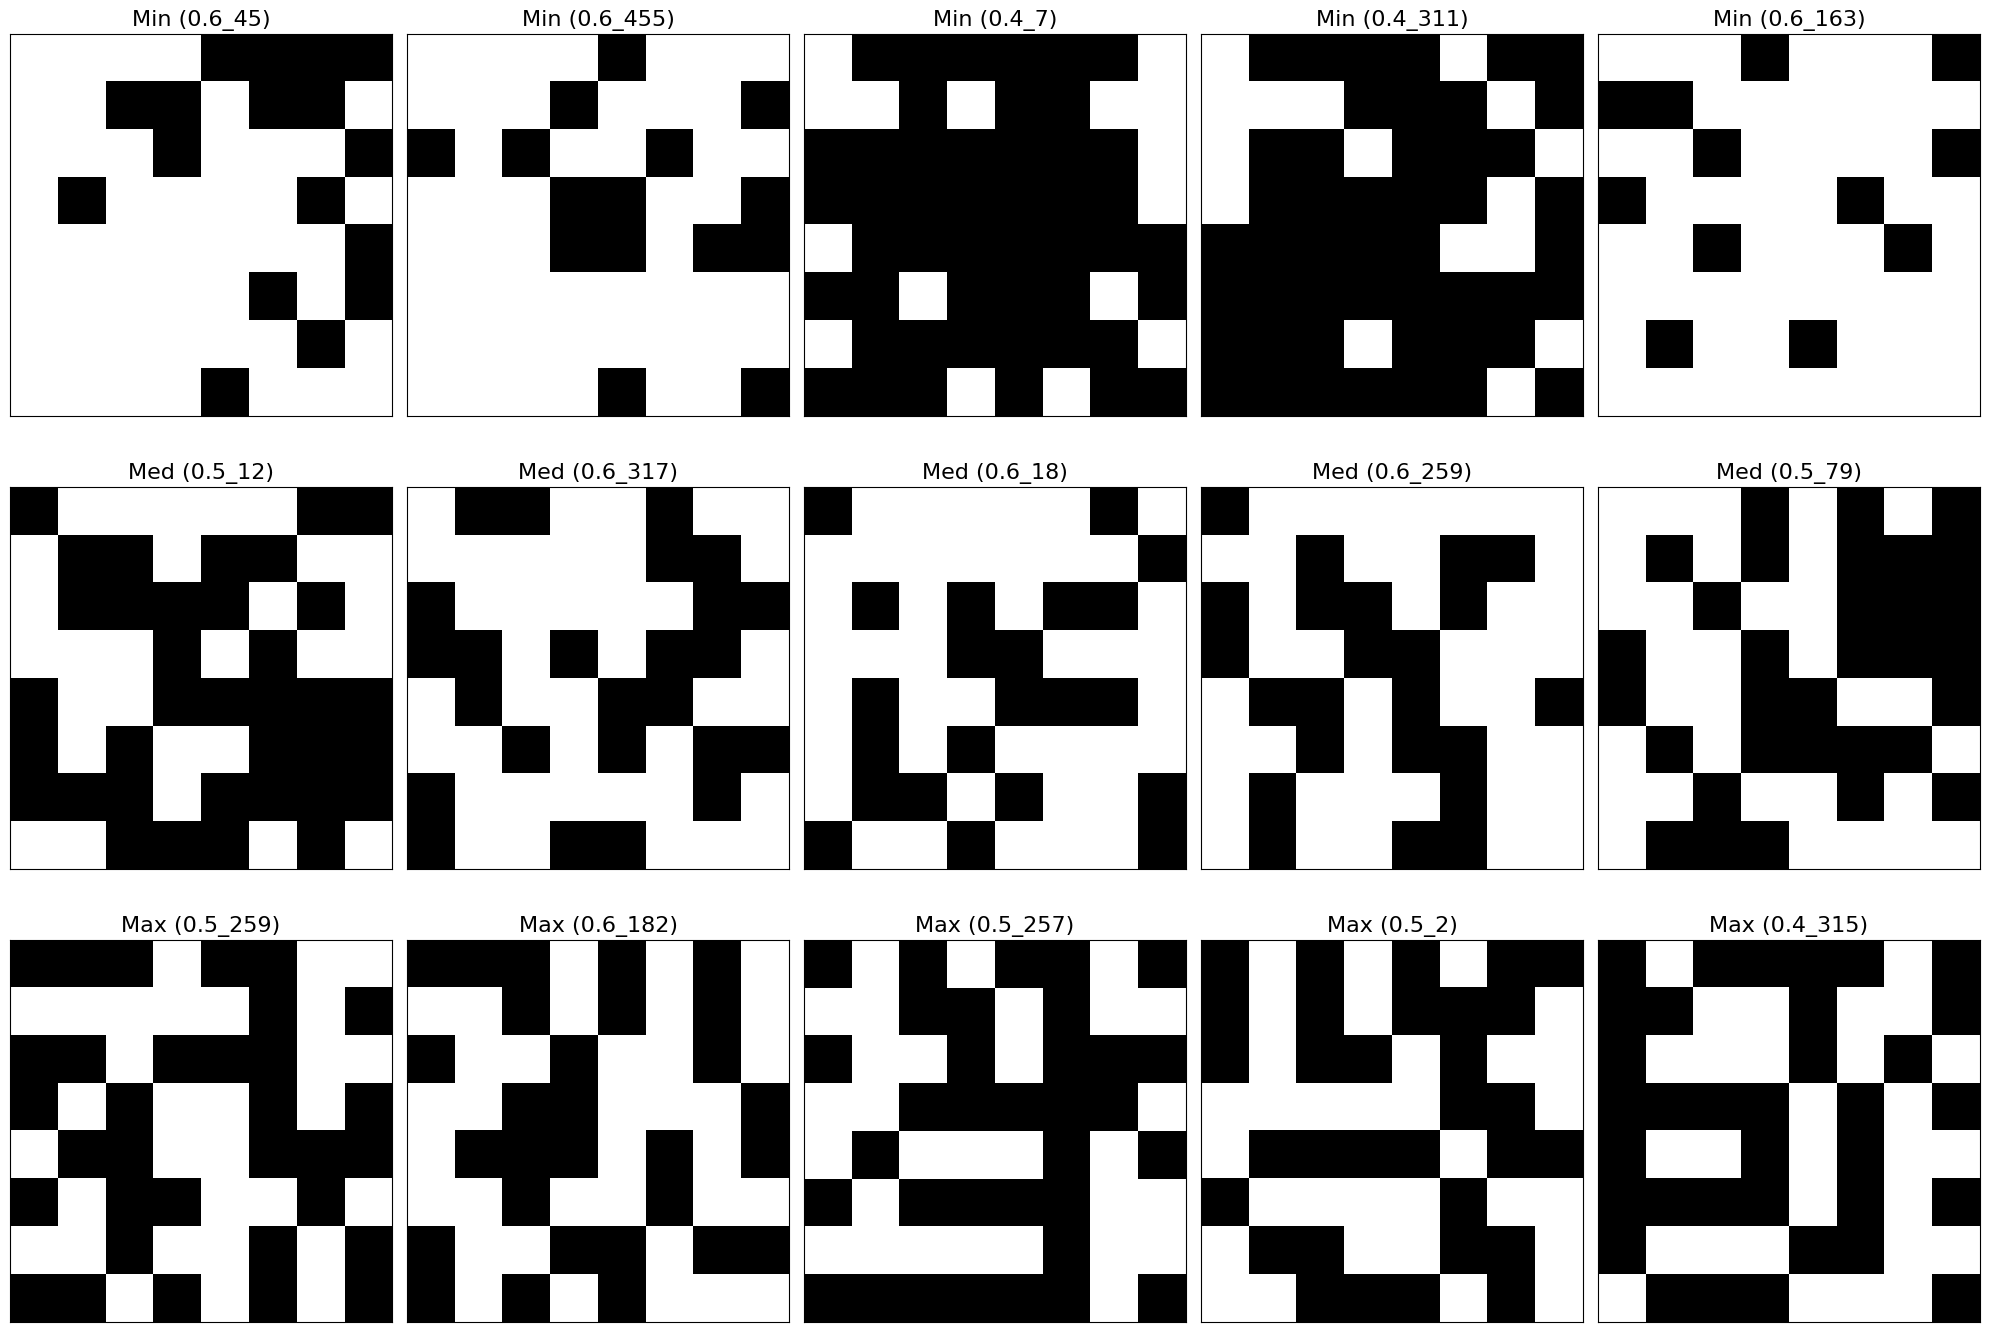

In [183]:
fig, axes = plt.subplots(3, 5, figsize=(20, 14))
axes = axes.flatten() 

for i in range(15):
    ax = axes[i]
    key = contrast_keys[i]
    
    im = ax.imshow(df['image'][key], cmap='gray')
    ax.set_title(f'{contrast_titles[i]} ({contrast_keys[i]})', fontsize=16)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

## Correlation

$$ \frac{\sum^{N_g}_{i=1}\sum^{N_g}_{j=1}{p(i,j)ij-\mu_x\mu_y}}{\sigma_x(i)\sigma_y(j)} $$
Also written as:
$$ \sum_{i=1}^{N} \sum_{j=1}^{N} \left( \frac{i - \mu_x}{\sigma_x} \right) \left( \frac{j - \mu_y}{\sigma_y} \right) p(i, j) $$

This is similar to a discrete implementation of the Pearson correlation coefficient for the joint probability mass function $p(i, j)$. It measures how much the gray level of a pixel is linearly predictable from its neighbor.

Entries where both $i$ and $j$ are simultaneously or singly greater than or less than the mean are positive (thus greater value). These represent "consistent" regions (dark-dark or bright-bright). Entries where one pixel is bright and the other is dark relative to the mean are; these represent "transitional" or "inconsistent" regions.

Since the terms are standardized by $\sigma_x$ and $\sigma_y$, this feature is bounded (with trespect to the GLCM).

Only noticable differance between the settings was: the 0.1 and 0.9 bernoulli setting were likely to have a higher variance, further examinations are needed. Nevertheless, this difference in mere varianvce of samples dosen't provide much insight unto the feature characteristics. Values range from -0.1 to 0.1, and average around -0.012 (all settings)

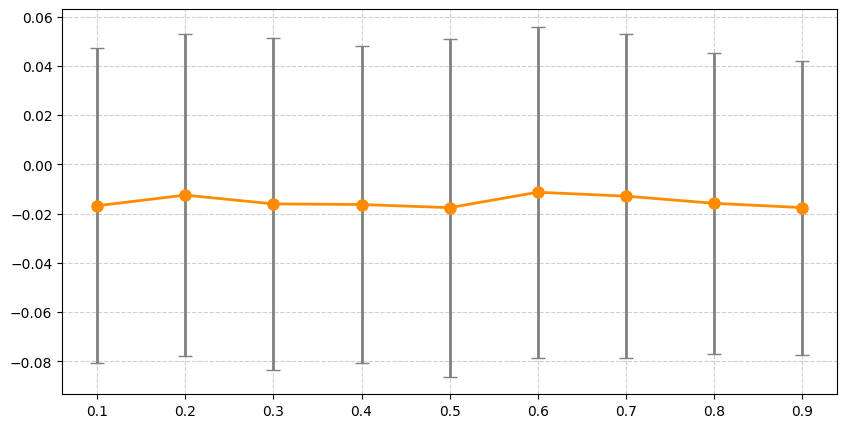

In [404]:
avg_correlation = [np.mean([features[3] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_correlation = [np.std([features[3] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_correlation, yerr=std_correlation, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Lets take a look at the sample images. 

Here we look at images with low correlation across the random settings, in attempt to find similarities in the images.

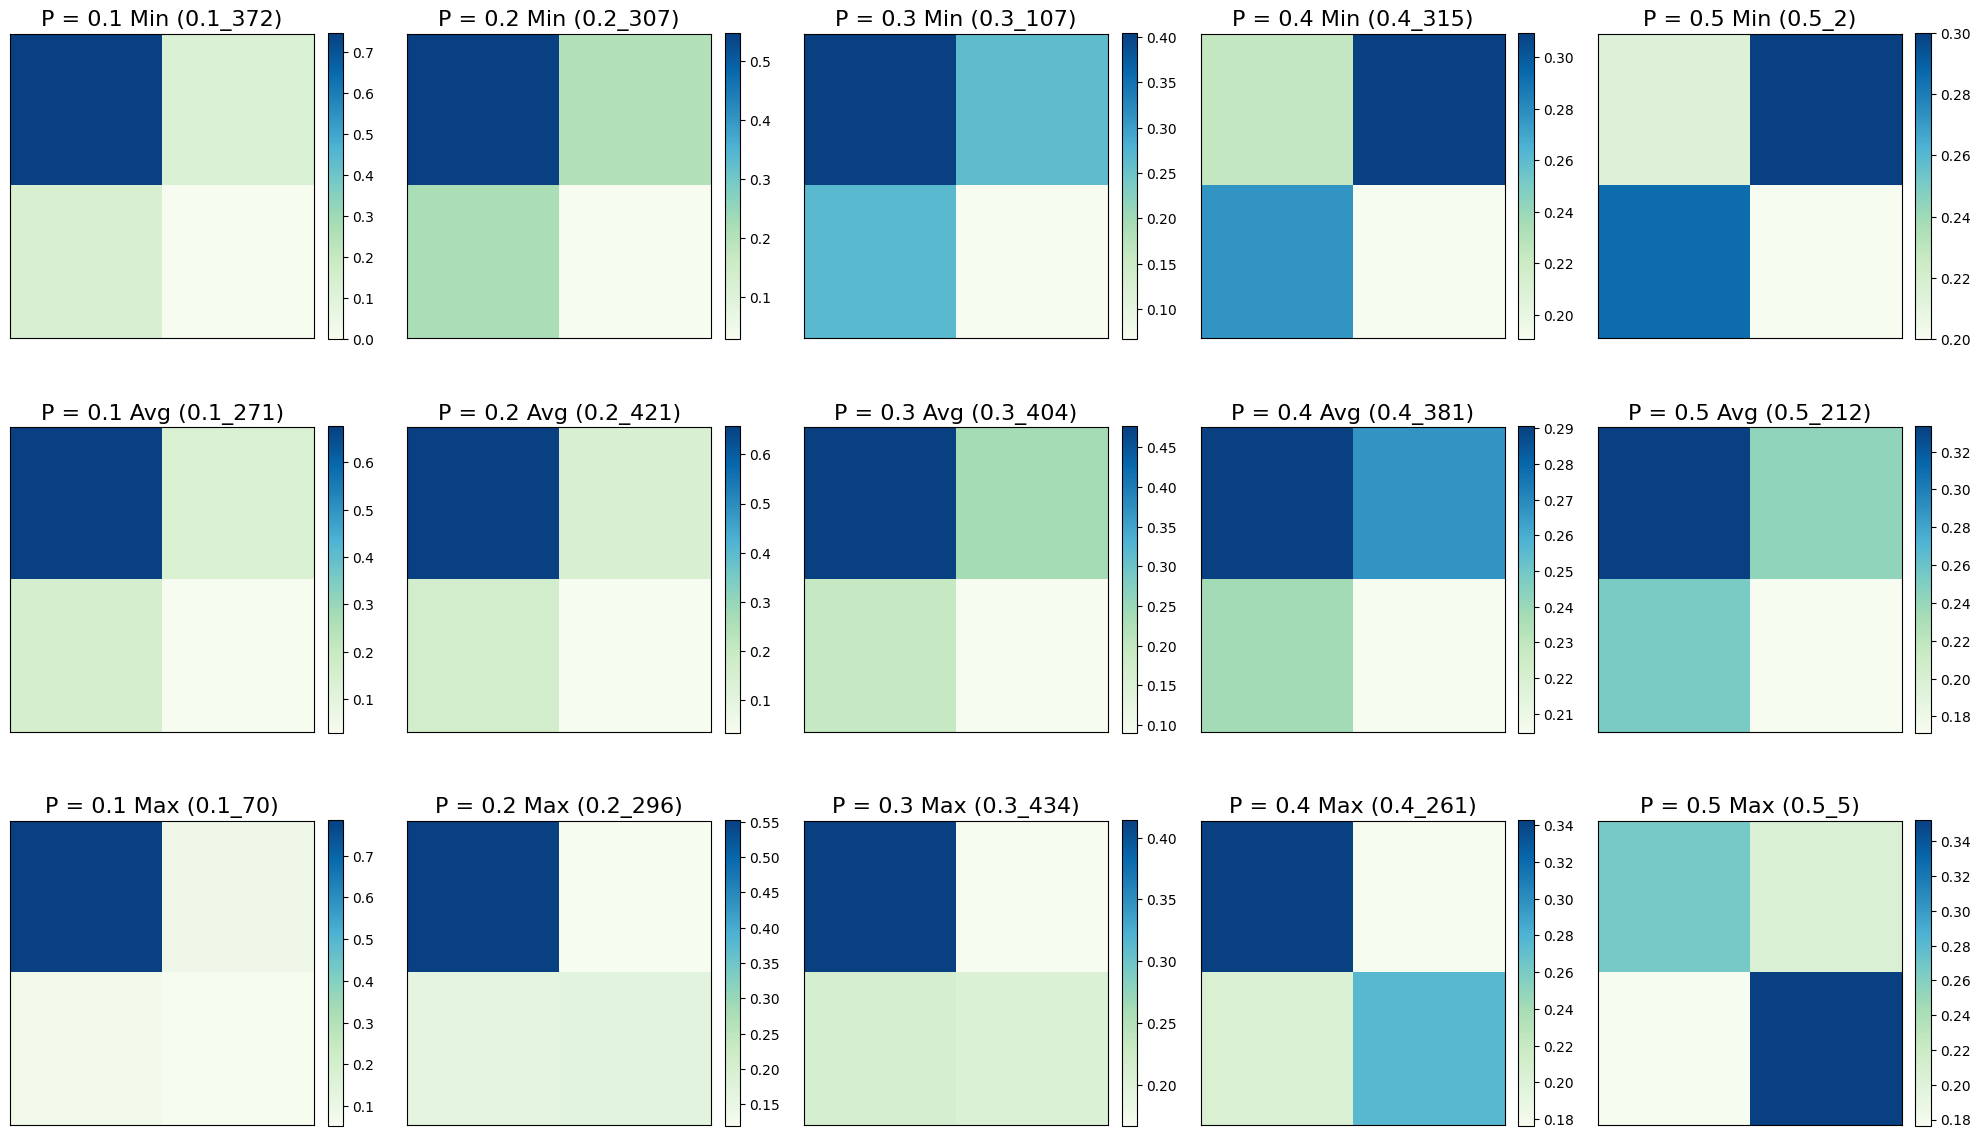

In [747]:
correlation_keys = [
    '0.1_372', '0.2_307', '0.3_107', '0.4_315', '0.5_2',   
    '0.1_271', '0.2_421', '0.3_404', '0.4_381', '0.5_212', 
    '0.1_70',  '0.2_296', '0.3_434', '0.4_261', '0.5_5'    
]

correlation_titles = [
    '0.1 Min', '0.2 Min', '0.3 Min', '0.4 Min', '0.5 Min',
    '0.1 Avg', '0.2 Avg', '0.3 Avg', '0.4 Avg', '0.5 Avg',
    '0.1 Max', '0.2 Max', '0.3 Max', '0.4 Max', '0.5 Max'
]

fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.flatten() 

for i in range(15):
    ax = axes[i]
    key = correlation_keys[i]
    
    im = ax.imshow(df['glcm'][key], cmap='GnBu')
    ax.set_title(f'P = {correlation_titles[i]} ({correlation_keys[i]})', fontsize=16)
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

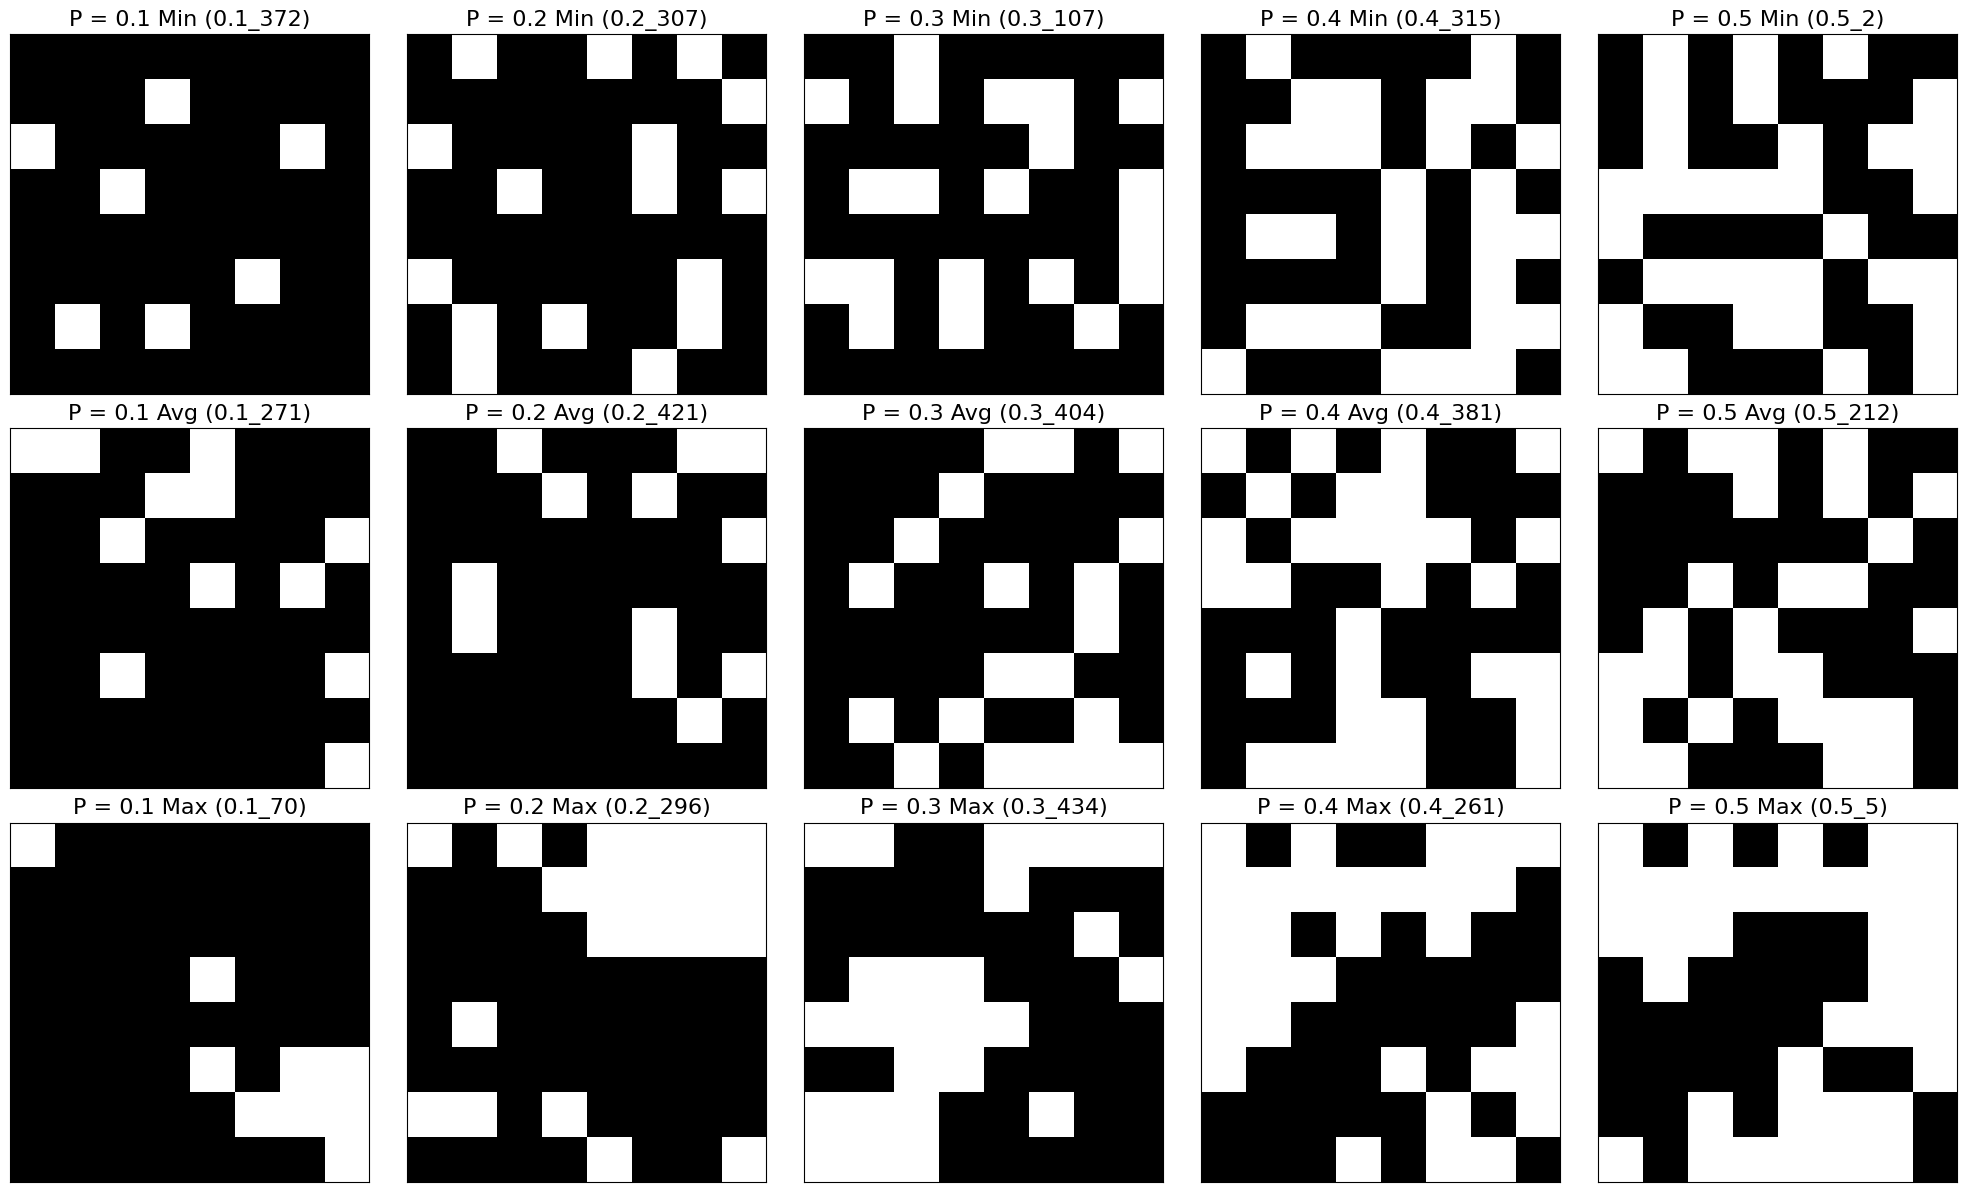

In [741]:
fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.flatten() 

for i in range(15):
    ax = axes[i]
    key = correlation_keys[i]
    
    im = ax.imshow(df['image'][key], cmap='gray')
    ax.set_title(f'P = {correlation_titles[i]} ({correlation_keys[i]})', fontsize=16)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

From the samples, one can observe that images with higher corraltation values showed patterns of pixels of the same colors neaighboring each other or the GLCM is diagonal-dominant. In an image this can indicate wether the gray levels are scattered or clustered. When looking at images with more noise (0.4 and 0.5), samples with lower correlation values were more concentrated at the off-diagonals. 

With respect to the gray levels, correlation measures the ration between the frequency of co-occurences with the same gray level (correlation within each gray level) and the frequency of co-occurences with differeing gray levels.

This feature may pick up signals in images if the glcm is computed with $d > 1$.

Below we compare samples that produced 5 of the lowest, middle, and highest values of Correlation. We focus on random setting 0.5 to avoid redundancy.

In [151]:
df_correlation = df[df['p'] == 0.5
            ].sort_values(by=["correlation"])[['correlation', 'glcm', 'image']]

df_correlation

correlation                                               glcm  \
0.5_2      -0.171499  [[0.21428571428571427, 0.3], [0.28571428571428...   
0.5_214    -0.162450  [[0.3, 0.3142857142857143], [0.252380952380952...   
0.5_257    -0.162170  [[0.22380952380952382, 0.2761904761904762], [0...   
0.5_491    -0.154482  [[0.19047619047619047, 0.2904761904761905], [0...   
0.5_259    -0.152597  [[0.20476190476190476, 0.2904761904761905], [0...   
...              ...                                                ...   
0.5_144     0.181620  [[0.2857142857142857, 0.21904761904761905], [0...   
0.5_498     0.186664  [[0.2761904761904762, 0.16666666666666666], [0...   
0.5_470     0.187285  [[0.36666666666666664, 0.18095238095238095], [...   
0.5_366     0.219908  [[0.2523809523809524, 0.18095238095238095], [0...   
0.5_5       0.233473  [[0.26666666666666666, 0.20476190476190476], [...   

                                                     image  
0.5_2    [[0, 1, 0, 1, 0, 1, 0, 0], [0, 1, 0, 1, 0, 0, ...  
0.5_214  [[0, 0, 1, 0, 1, 0, 0, 1], [1, 0, 1, 0, 1, 0, ...  
0.5_257  [[0, 1, 0, 1, 0, 0, 1, 0], [1, 1, 0, 0, 1, 0, ...  
0.5_491  [[0, 1, 1, 1, 1, 1, 0, 0], [1, 0, 0, 0, 0, 0, ...  
0.5_259  [[0, 0, 0, 1, 0, 0, 1, 1], [1, 1, 1, 1, 1, 0, ...  
...                                                    ...  
0.5_144  [[1, 1, 1, 1, 0, 0, 0, 0], [1, 1, 1, 1, 0, 1, ...  
0.5_498  [[1, 1, 1, 1, 1, 0, 1, 1], [1, 0, 1, 1, 1, 1, ...  
0.5_470  [[1, 0, 0, 0, 1, 1, 1, 0], [0, 1, 0, 1, 0, 1, ...  
0.5_366  [[0, 0, 1, 1, 1, 1, 1, 0], [0, 0, 0, 1, 1, 1, ...  
0.5_5    [[1, 0, 1, 0, 1, 0, 1, 1], [1, 1, 1, 1, 1, 1, ...  

[500 rows x 3 columns]

In [153]:
mid_idx = len(df_correlation) // 2
start = max(0, mid_idx - (5 // 2))
end = start + 5

df_middle_5 = df_correlation.iloc[start:end]
df_middle_5

correlation                                               glcm  \
0.5_497    -0.028473  [[0.10476190476190476, 0.22380952380952382], [...   
0.5_186    -0.028312  [[0.23809523809523808, 0.24761904761904763], [...   
0.5_286    -0.028219  [[0.24285714285714285, 0.26666666666666666], [...   
0.5_172    -0.027871  [[0.24761904761904763, 0.24285714285714285], [...   
0.5_375    -0.027538  [[0.19523809523809524, 0.2761904761904762], [0...   

                                                     image  
0.5_497  [[0, 0, 1, 1, 1, 1, 1, 1], [0, 0, 0, 1, 1, 1, ...  
0.5_186  [[0, 0, 0, 1, 1, 1, 1, 0], [1, 1, 1, 0, 0, 0, ...  
0.5_286  [[0, 1, 1, 0, 0, 1, 0, 0], [0, 0, 1, 0, 1, 1, ...  
0.5_172  [[1, 0, 1, 1, 1, 0, 0, 0], [1, 1, 1, 0, 0, 1, ...  
0.5_375  [[0, 1, 1, 0, 0, 0, 1, 0], [0, 1, 1, 1, 0, 1, ...

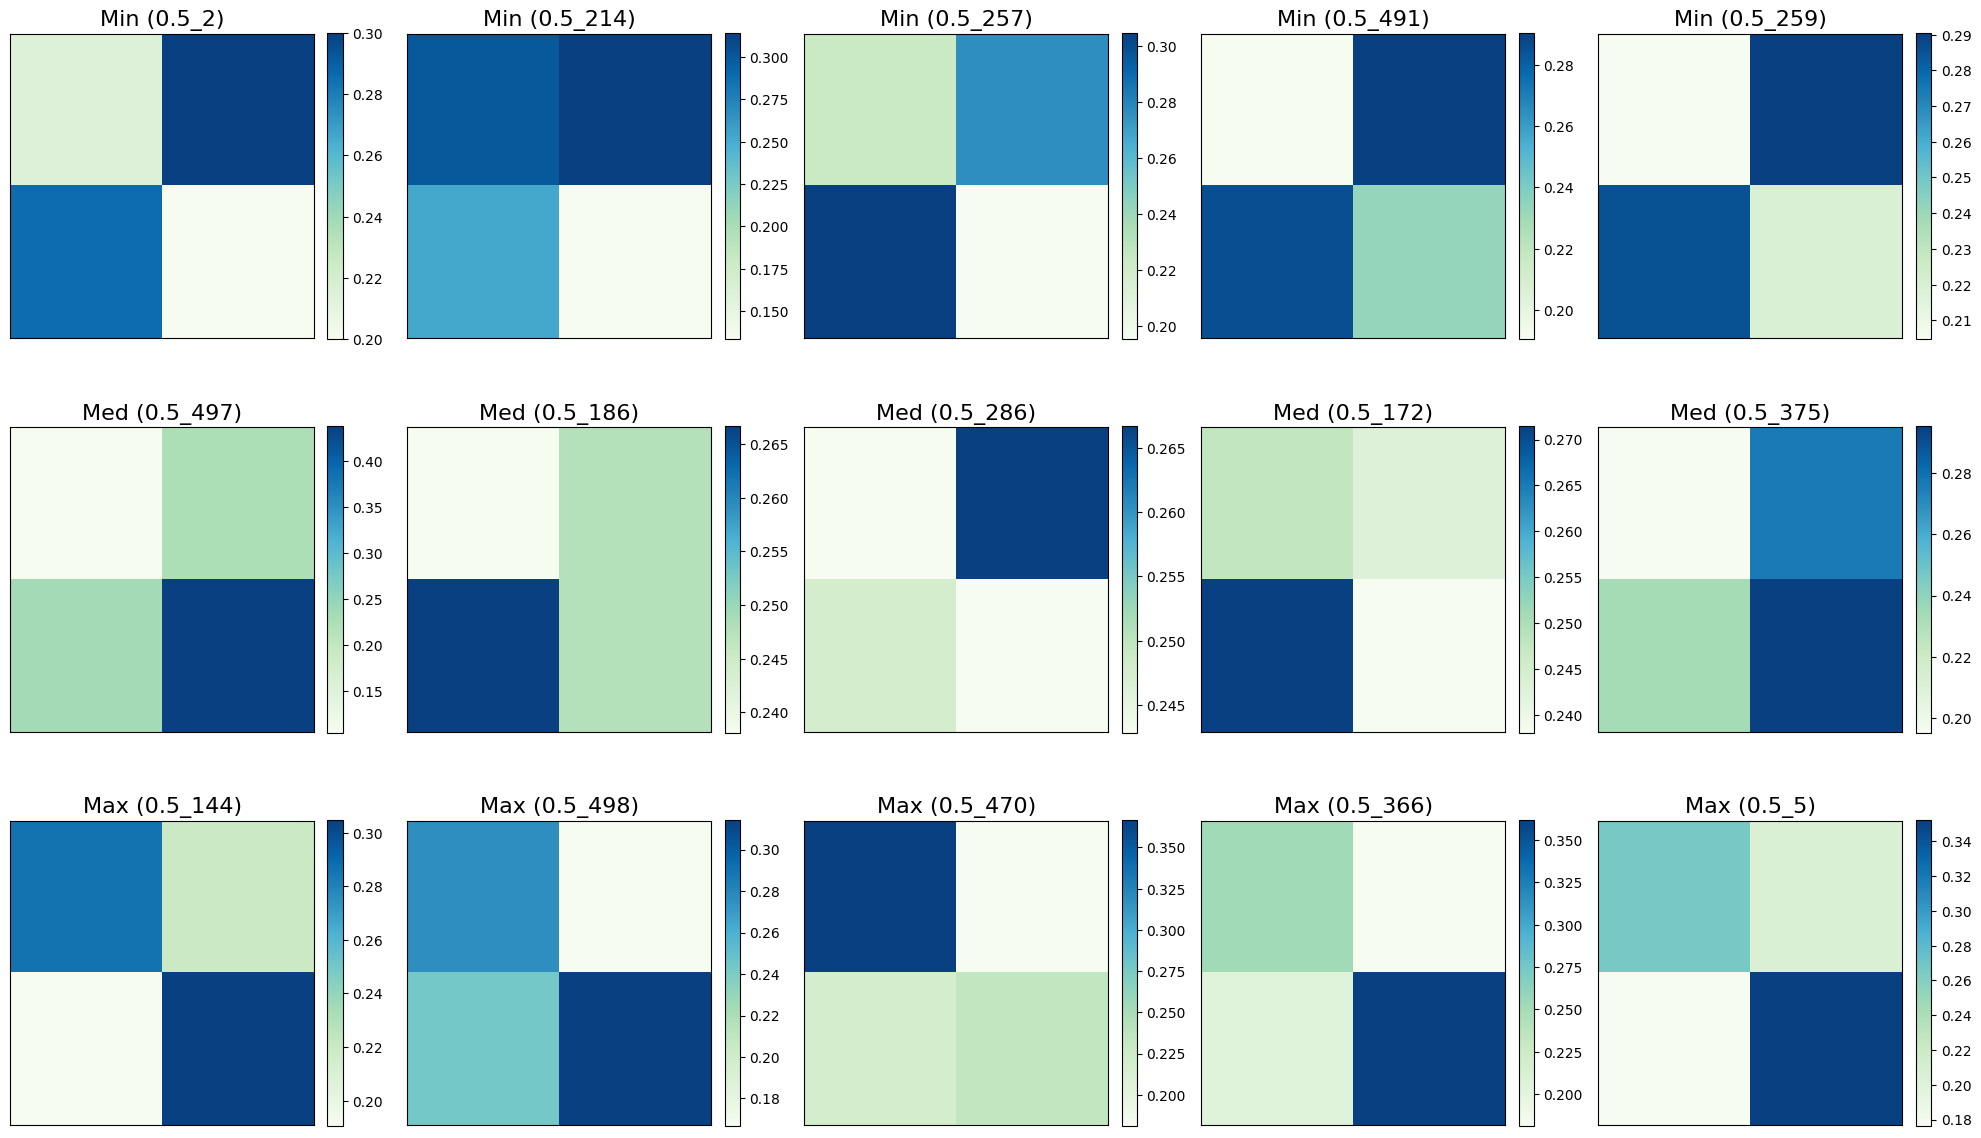

In [154]:
correlation_keys2 = [
    '0.5_2', '0.5_214', '0.5_257', '0.5_491', '0.5_259', 
    '0.5_497', '0.5_186', '0.5_286', '0.5_172', '0.5_375',   
    '0.5_144', '0.5_498', '0.5_470', '0.5_366', '0.5_5'  
]

correlation_titles2 = [
    'Min', 'Min', 'Min', 'Min', 'Min',
    'Med', 'Med', 'Med', 'Med', 'Med', 
    'Max', 'Max', 'Max', 'Max', 'Max'
]

fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.flatten() 

for i in range(15):
    ax = axes[i]
    key = correlation_keys2[i]
    
    im = ax.imshow(df['glcm'][key], cmap='GnBu')
    ax.set_title(f'{correlation_titles2[i]} ({correlation_keys2[i]})', fontsize=16)
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

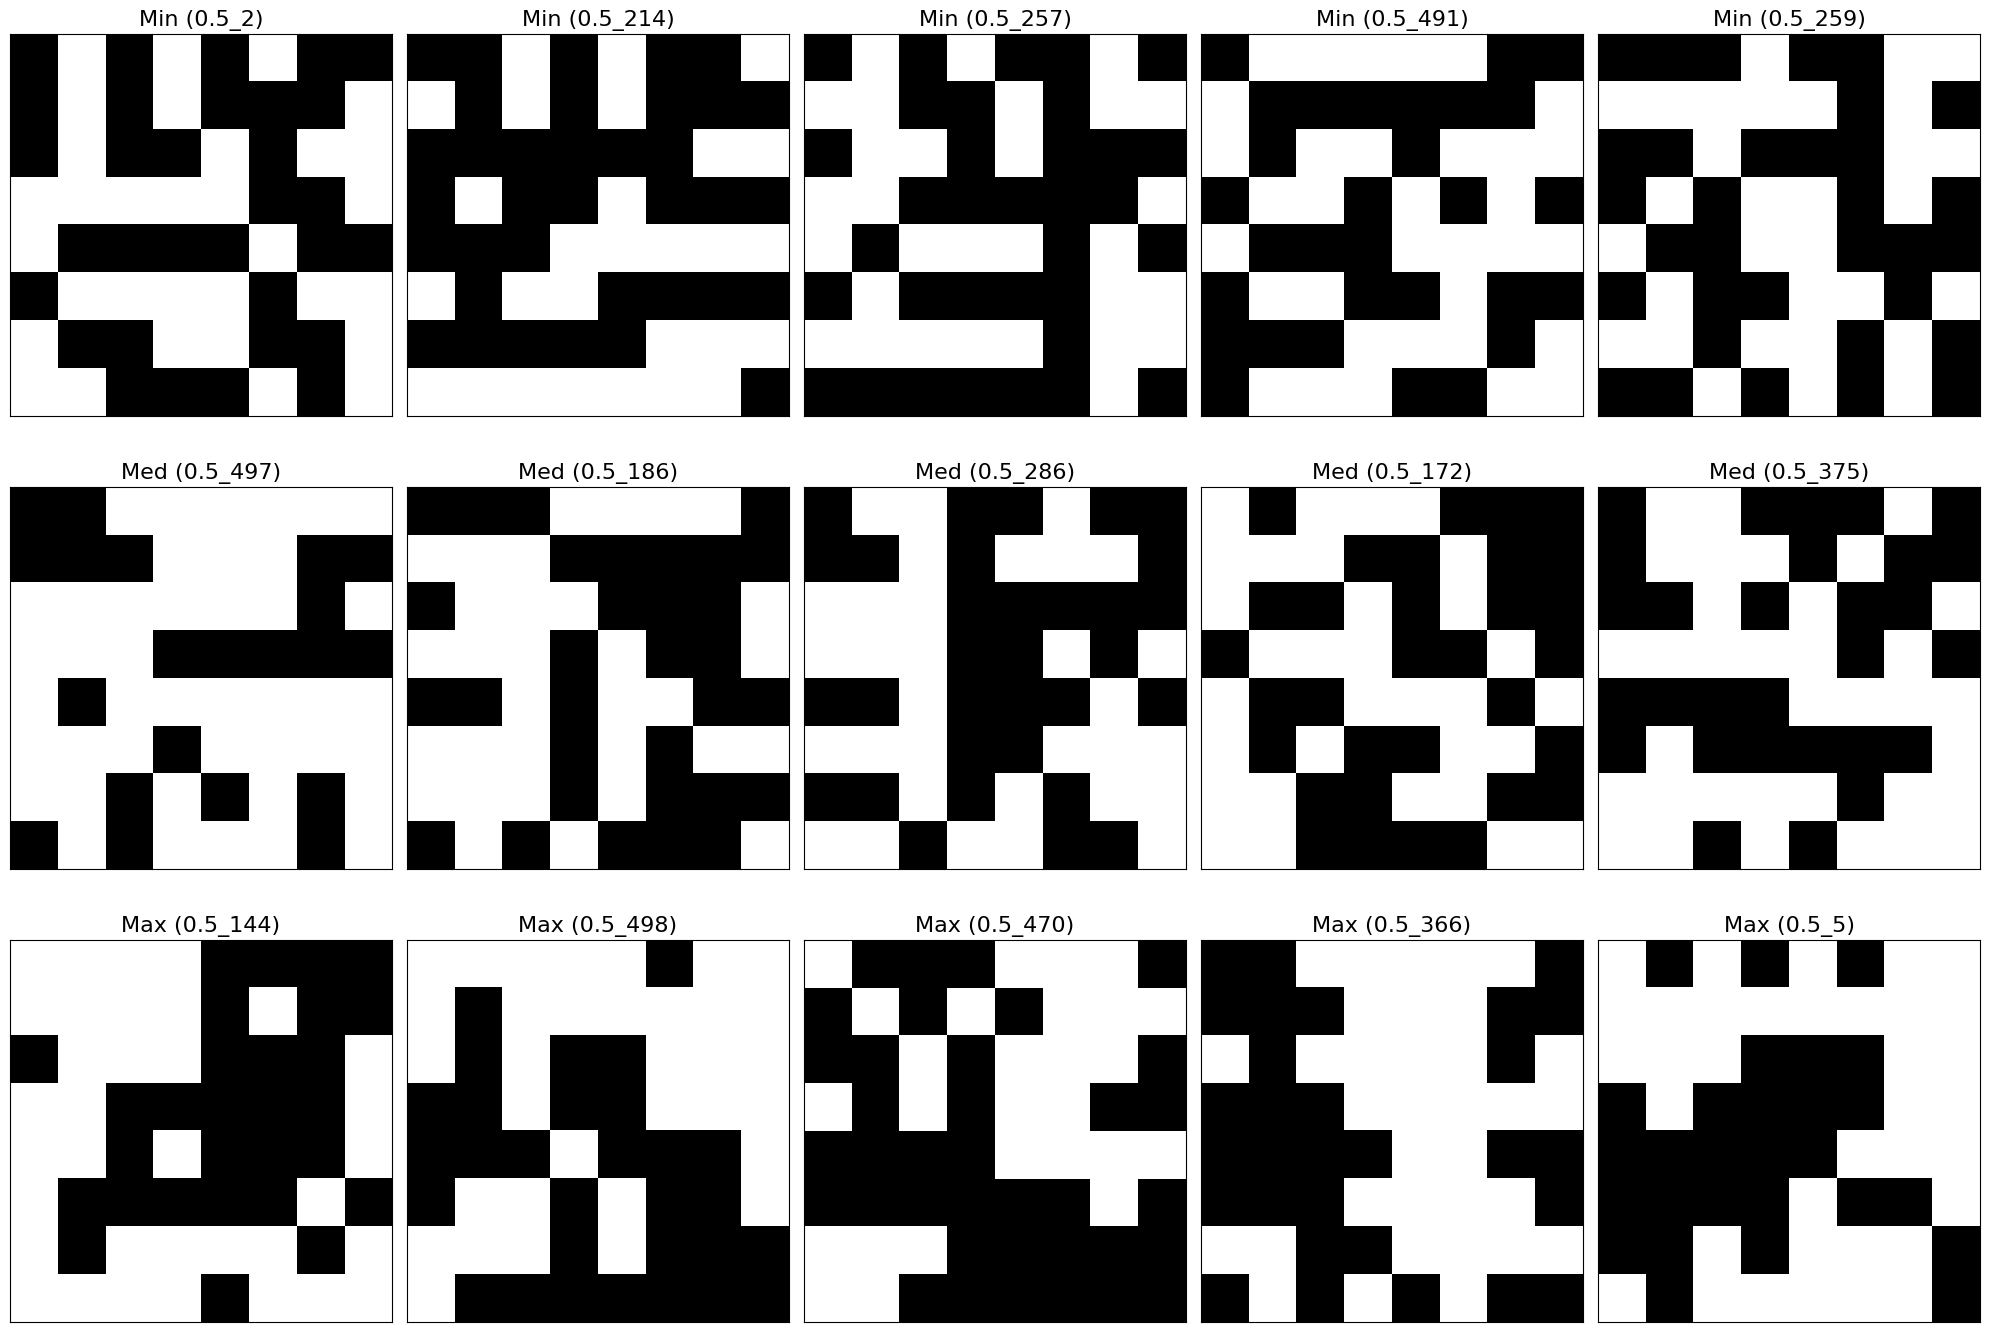

In [155]:
fig, axes = plt.subplots(3, 5, figsize=(20, 14))
axes = axes.flatten() 

for i in range(15):
    ax = axes[i]
    key = correlation_keys2[i]
    
    im = ax.imshow(df['image'][key], cmap='gray')
    ax.set_title(f'{correlation_titles2[i]} ({correlation_keys2[i]})', fontsize=16)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

## Difference average

$$ \displaystyle\sum^{N_g-1}_{k=0}{kp_{x-y}(k)} $$

* Difference Average measures the relationship between occurrences of pairs with similar intensity values and occurrences of pairs with differing intensity values (pyradiomics).

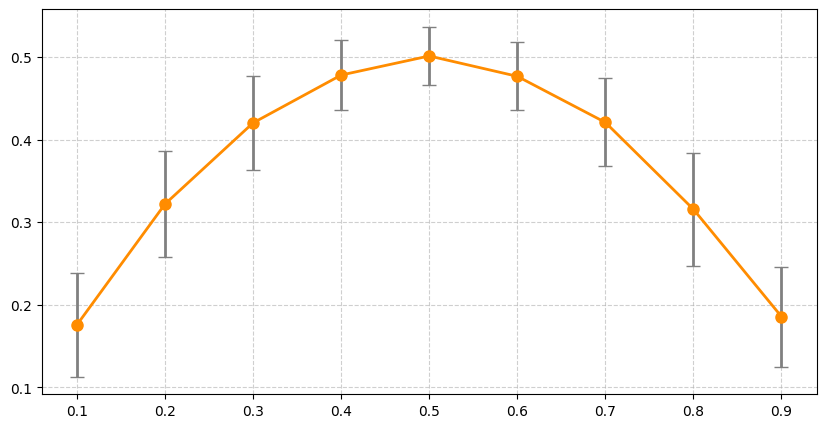

In [36]:
avg_diff_average = [np.mean([features[8] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_diff_average = [np.std([features[8] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_diff_average, yerr=std_diff_average, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Below we compare samples that produced 5 of the lowest, middle, and highest values of Difference average. We focus on random settings between 0.4 and 0.6 to avoid redundancy.

In [121]:
df_difference_average = df[(df['p'] == 0.4) | (df['p'] == 0.5) | (df['p'] == 0.6)
            ].sort_values(by=["difference_average"])[['difference_average', 'glcm', 'image']]

df_difference_average

difference_average  \
0.6_45             0.333333   
0.6_455            0.338095   
0.4_7              0.338095   
0.4_311            0.342857   
0.6_163            0.347619   
...                     ...   
0.5_491            0.576190   
0.6_182            0.576190   
0.5_257            0.580952   
0.5_2              0.585714   
0.4_315            0.585714   

                                                      glcm  \
0.6_45   [[0.09523809523809523, 0.1761904761904762], [0...   
0.6_455  [[0.06190476190476191, 0.15714285714285714], [...   
0.4_7    [[0.6142857142857143, 0.1761904761904762], [0....   
0.4_311  [[0.5857142857142857, 0.1619047619047619], [0....   
0.6_163  [[0.014285714285714285, 0.18571428571428572], ...   
...                                                    ...   
0.5_491  [[0.19047619047619047, 0.2904761904761905], [0...   
0.6_182  [[0.1619047619047619, 0.3047619047619048], [0....   
0.5_257  [[0.22380952380952382, 0.2761904761904762], [0...   
0.5_2    [[0.21428571428571427, 0.3], [0.28571428571428...   
0.4_315  [[0.22380952380952382, 0.30952380952380953], [...   

                                                     image  
0.6_45   [[1, 1, 1, 1, 0, 0, 0, 0], [1, 1, 0, 0, 1, 0, ...  
0.6_455  [[1, 1, 1, 1, 0, 1, 1, 1], [1, 1, 1, 0, 1, 1, ...  
0.4_7    [[1, 0, 0, 0, 0, 0, 0, 1], [1, 1, 0, 1, 0, 0, ...  
0.4_311  [[1, 0, 0, 0, 0, 1, 0, 0], [1, 1, 1, 0, 0, 0, ...  
0.6_163  [[1, 1, 1, 0, 1, 1, 1, 0], [0, 0, 1, 1, 1, 1, ...  
...                                                    ...  
0.5_491  [[0, 1, 1, 1, 1, 1, 0, 0], [1, 0, 0, 0, 0, 0, ...  
0.6_182  [[0, 0, 0, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, ...  
0.5_257  [[0, 1, 0, 1, 0, 0, 1, 0], [1, 1, 0, 0, 1, 0, ...  
0.5_2    [[0, 1, 0, 1, 0, 1, 0, 0], [0, 1, 0, 1, 0, 0, ...  
0.4_315  [[0, 1, 0, 0, 0, 0, 1, 0], [0, 0, 1, 1, 0, 1, ...  

[1500 rows x 3 columns]

In [122]:
mid_idx = len(df_difference_average) // 2
start = max(0, mid_idx - (5 // 2))
end = start + 5

df_middle_5 = df_difference_average.iloc[start:end]
df_middle_5

difference_average  \
0.4_298            0.490476   
0.4_181            0.490476   
0.4_316            0.490476   
0.6_18             0.490476   
0.4_41             0.490476   

                                                      glcm  \
0.4_298  [[0.3476190476190476, 0.2571428571428571], [0....   
0.4_181  [[0.38571428571428573, 0.23333333333333334], [...   
0.4_316  [[0.2619047619047619, 0.2523809523809524], [0....   
0.6_18   [[0.10952380952380952, 0.23809523809523808], [...   
0.4_41   [[0.3238095238095238, 0.23809523809523808], [0...   

                                                     image  
0.4_298  [[0, 0, 0, 0, 1, 0, 1, 0], [0, 0, 0, 0, 0, 0, ...  
0.4_181  [[1, 0, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 1, 0, ...  
0.4_316  [[0, 1, 1, 0, 0, 1, 0, 0], [0, 0, 0, 1, 0, 1, ...  
0.6_18   [[0, 1, 1, 1, 1, 1, 0, 1], [1, 1, 1, 1, 1, 1, ...  
0.4_41   [[1, 1, 0, 1, 0, 0, 1, 1], [0, 0, 1, 0, 0, 1, ...

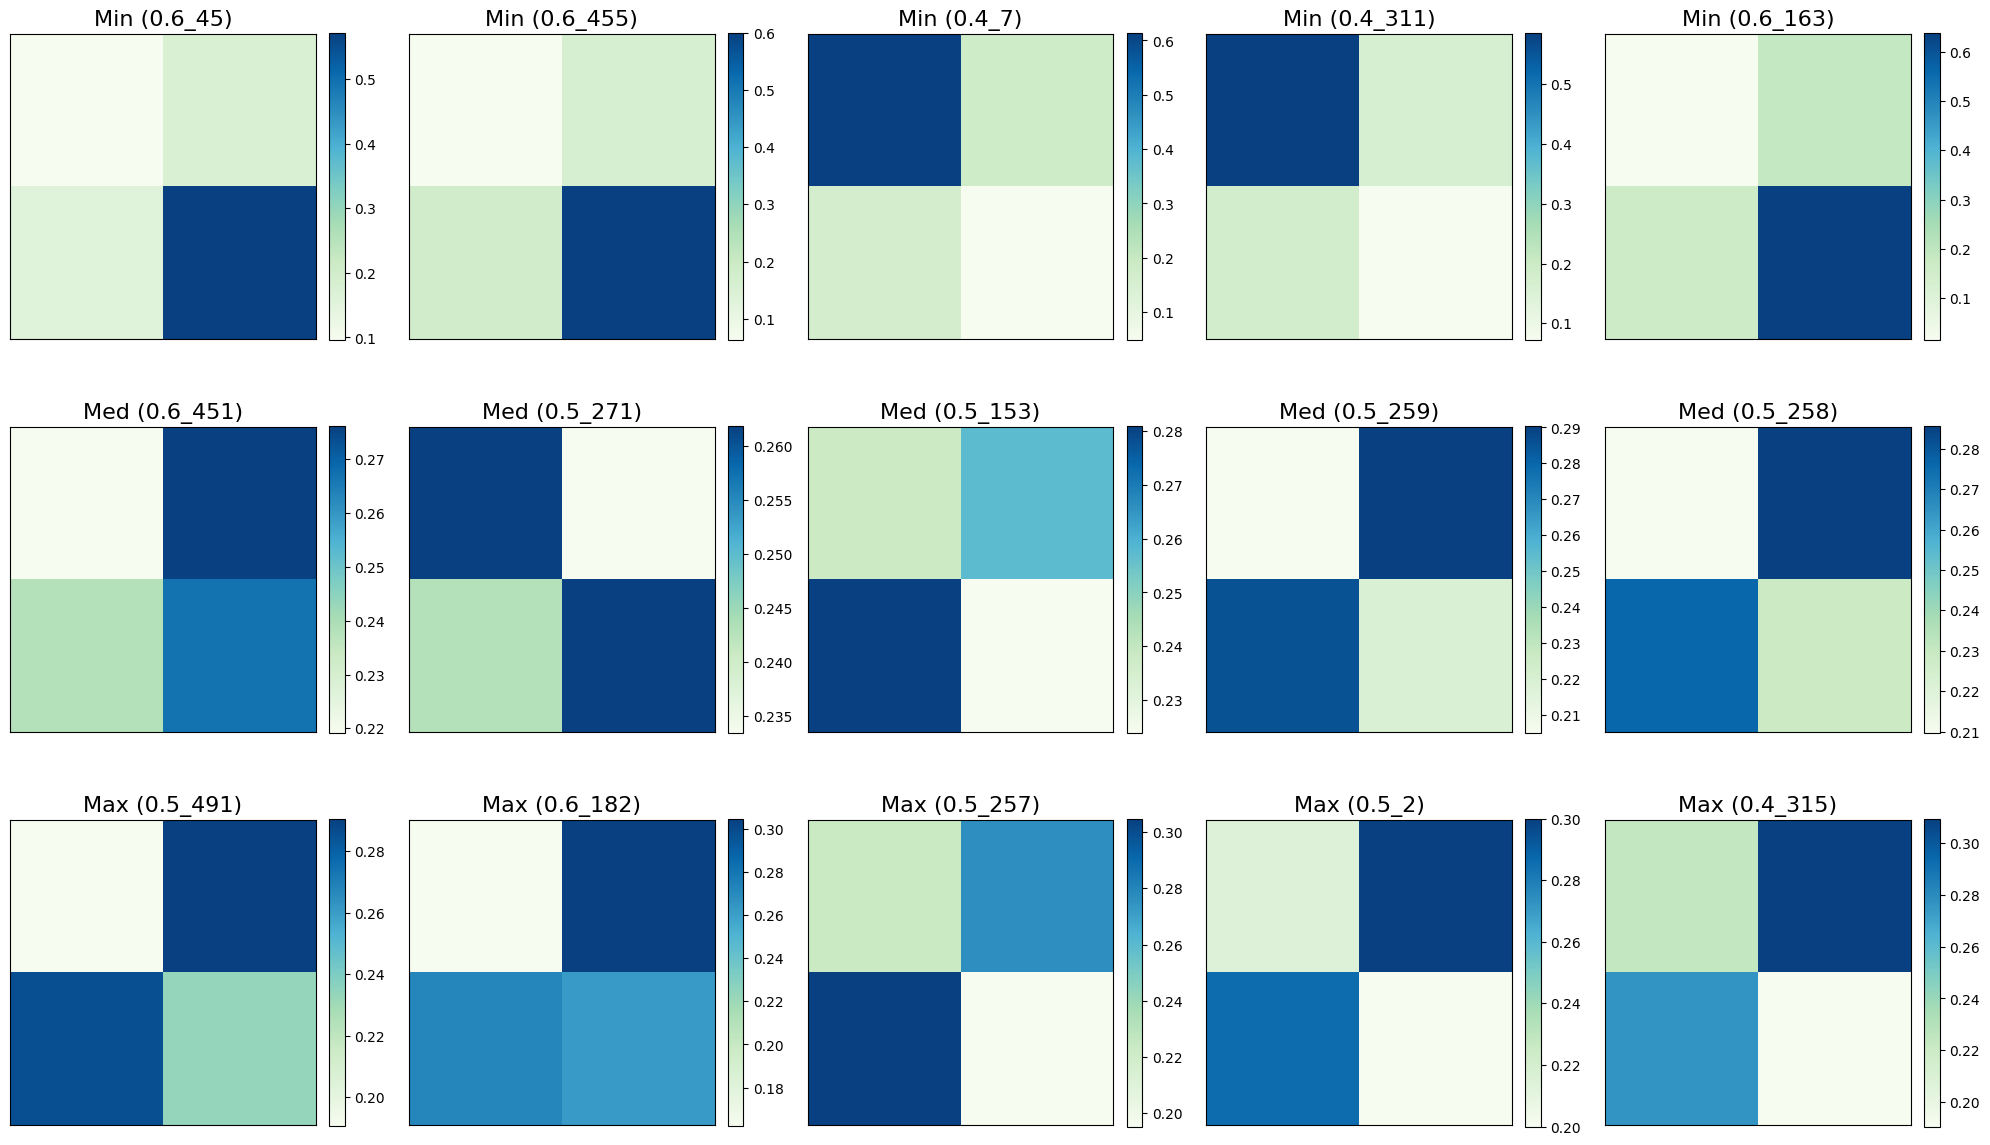

In [129]:
difference_average_keys = [
    '0.6_45', '0.6_455', '0.4_7', '0.4_311', '0.6_163', 
    '0.6_451', '0.5_271', '0.5_153', '0.5_259', '0.5_258',   
    '0.5_491', '0.6_182', '0.5_257', '0.5_2', '0.4_315'  
]

difference_average_titles = [
    'Min', 'Min', 'Min', 'Min', 'Min',
    'Med', 'Med', 'Med', 'Med', 'Med', 
    'Max', 'Max', 'Max', 'Max', 'Max'
]

fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.flatten() 

for i in range(15):
    ax = axes[i]
    key = difference_average_keys[i]
    
    im = ax.imshow(df['glcm'][key], cmap='GnBu')
    ax.set_title(f'{difference_average_titles[i]} ({difference_average_keys[i]})', fontsize=16)
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

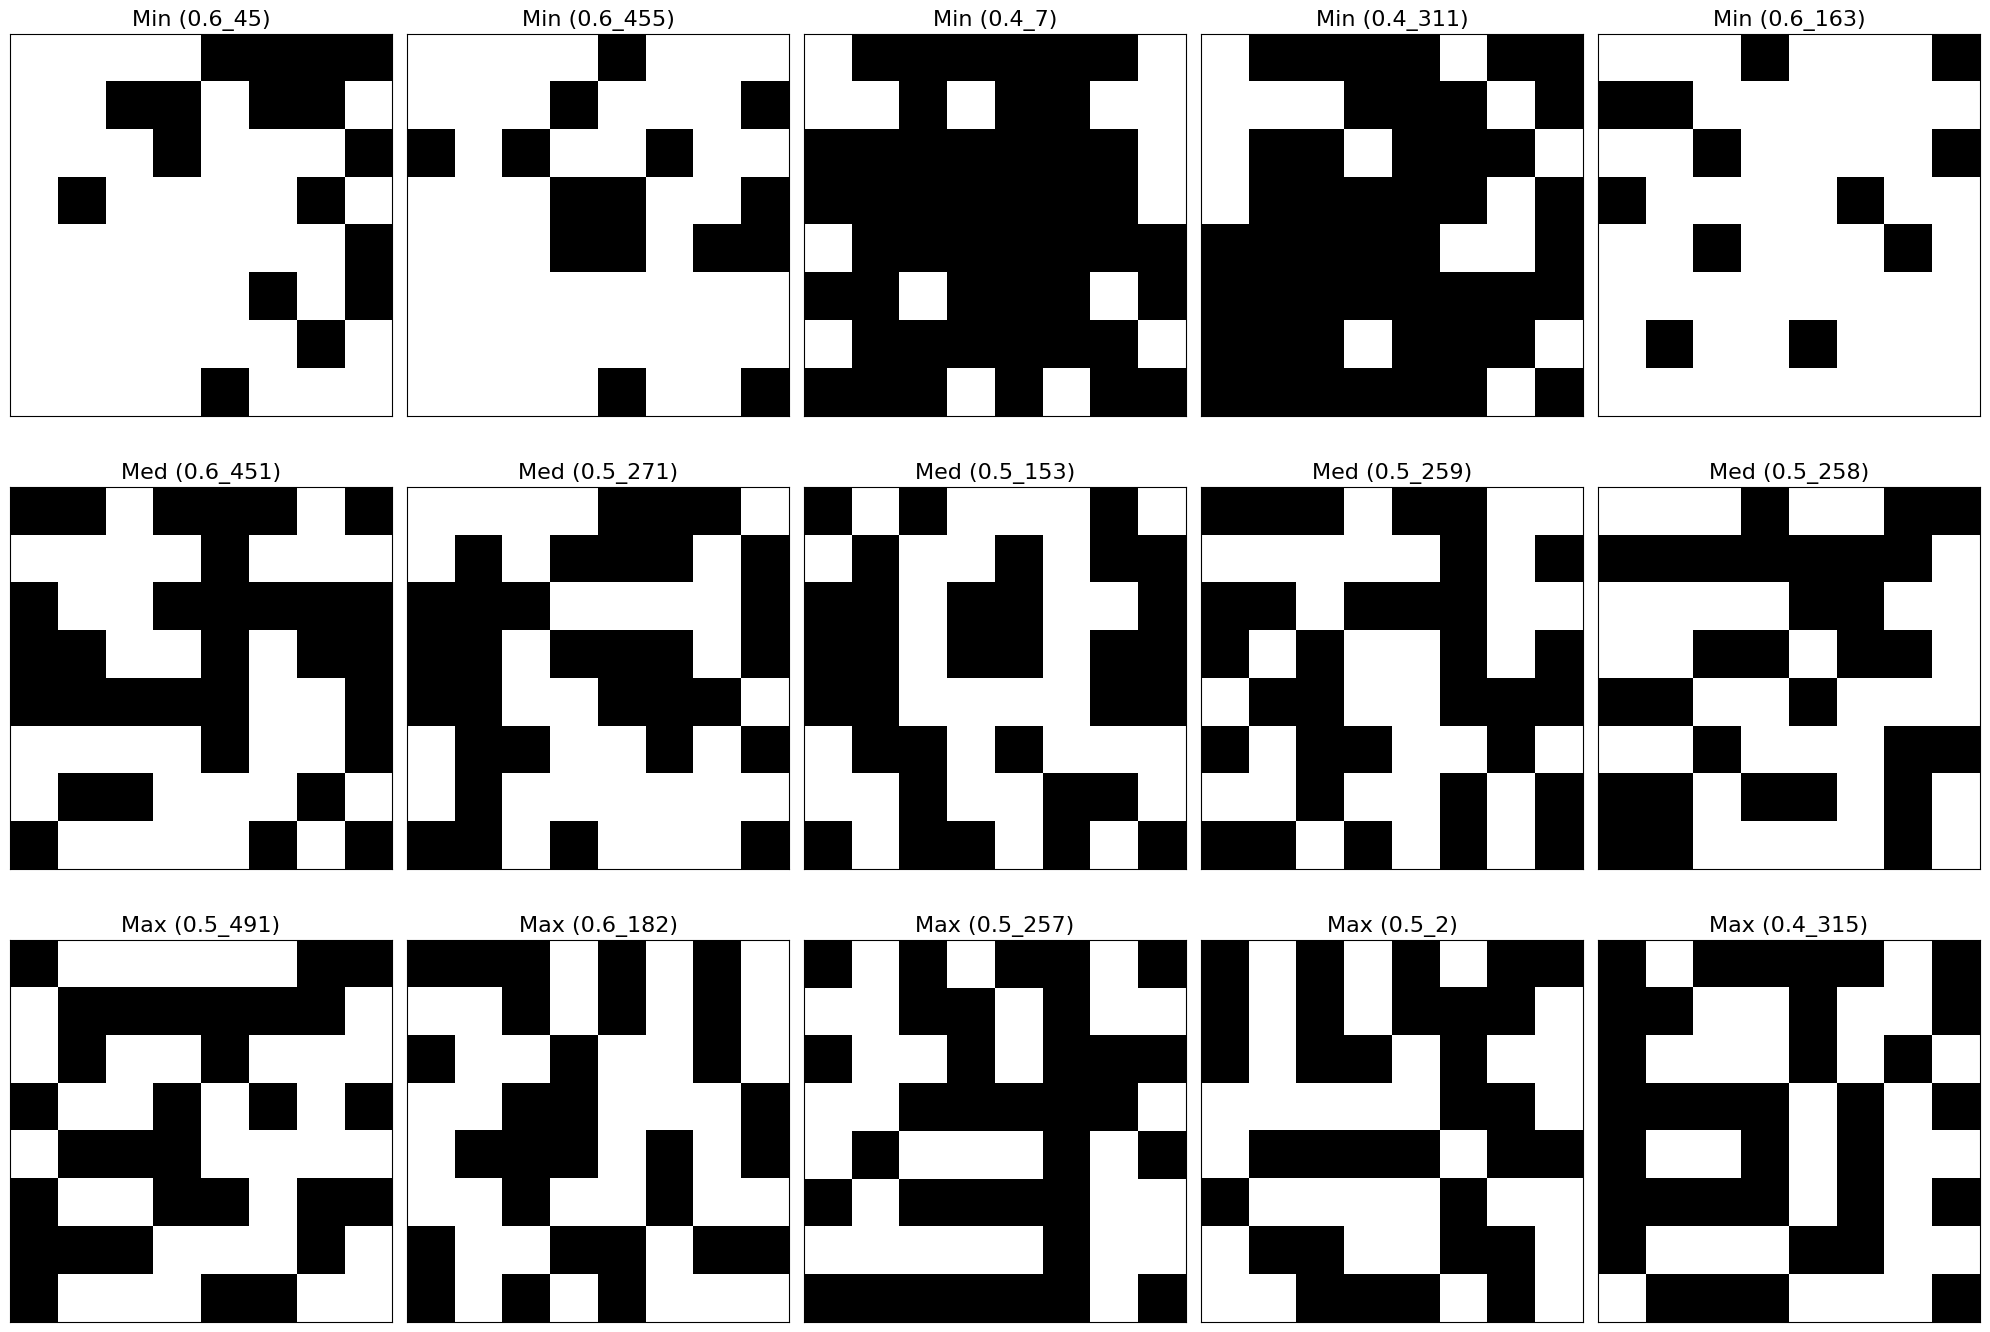

In [130]:
fig, axes = plt.subplots(3, 5, figsize=(20, 14))
axes = axes.flatten() 

for i in range(15):
    ax = axes[i]
    key = difference_average_keys[i]
    
    im = ax.imshow(df['image'][key], cmap='gray')
    ax.set_title(f'{difference_average_titles[i]} ({difference_average_keys[i]})', fontsize=16)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

## Difference entropy

$$ \displaystyle\sum^{N_g-1}_{k=0}{p_{x-y}(k)\log_2\big(p_{x-y}(k)+\epsilon\big)} $$
Also written as:
$$ -\sum_{k=0}^{N-1} p_{x-y}(k) \log p_{x-y}(k) $$

This feature uses a marginalization of the GLCM along its off-diagonals. It measures the uniformity of the distribution of differences. If the probability mass is concentrated on just a few values of $k$, the entropy is low. If the mass is distributed across all possible differences, entropy is maximized.

Shannon Entropy applied to the distribution of gray-level differences $(p_{x-y}(k))$. Simply Difference Entropy quantifies the complexity and disorder of the local intensity changes rather than the intensity of the changes themselves.

At a high difference entropy value the image contains a vast variety of local transitions (some subtle, some sharp) with no dominant pattern. There is high uncertainty in predicting the difference between a pixel and its neighbor.
At a low difference entropy value the image has order or "structural simplicity". The distribution of differences is sparse.


* Difference Entropy is a measure of the randomness/variability in neighborhood intensity value differences (pyradiomics).

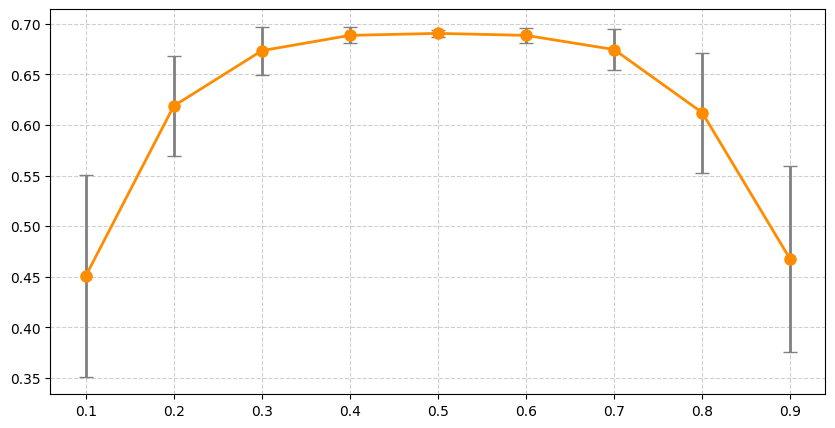

In [34]:
avg_difference_entropy = [np.mean([features[9] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_difference_entropy = [np.std([features[9] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_difference_entropy, yerr=std_difference_entropy, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Plotted are 2 samples with lowest difference entropy values and 2 samples with the highest, for each random setting (0.1-0.5).

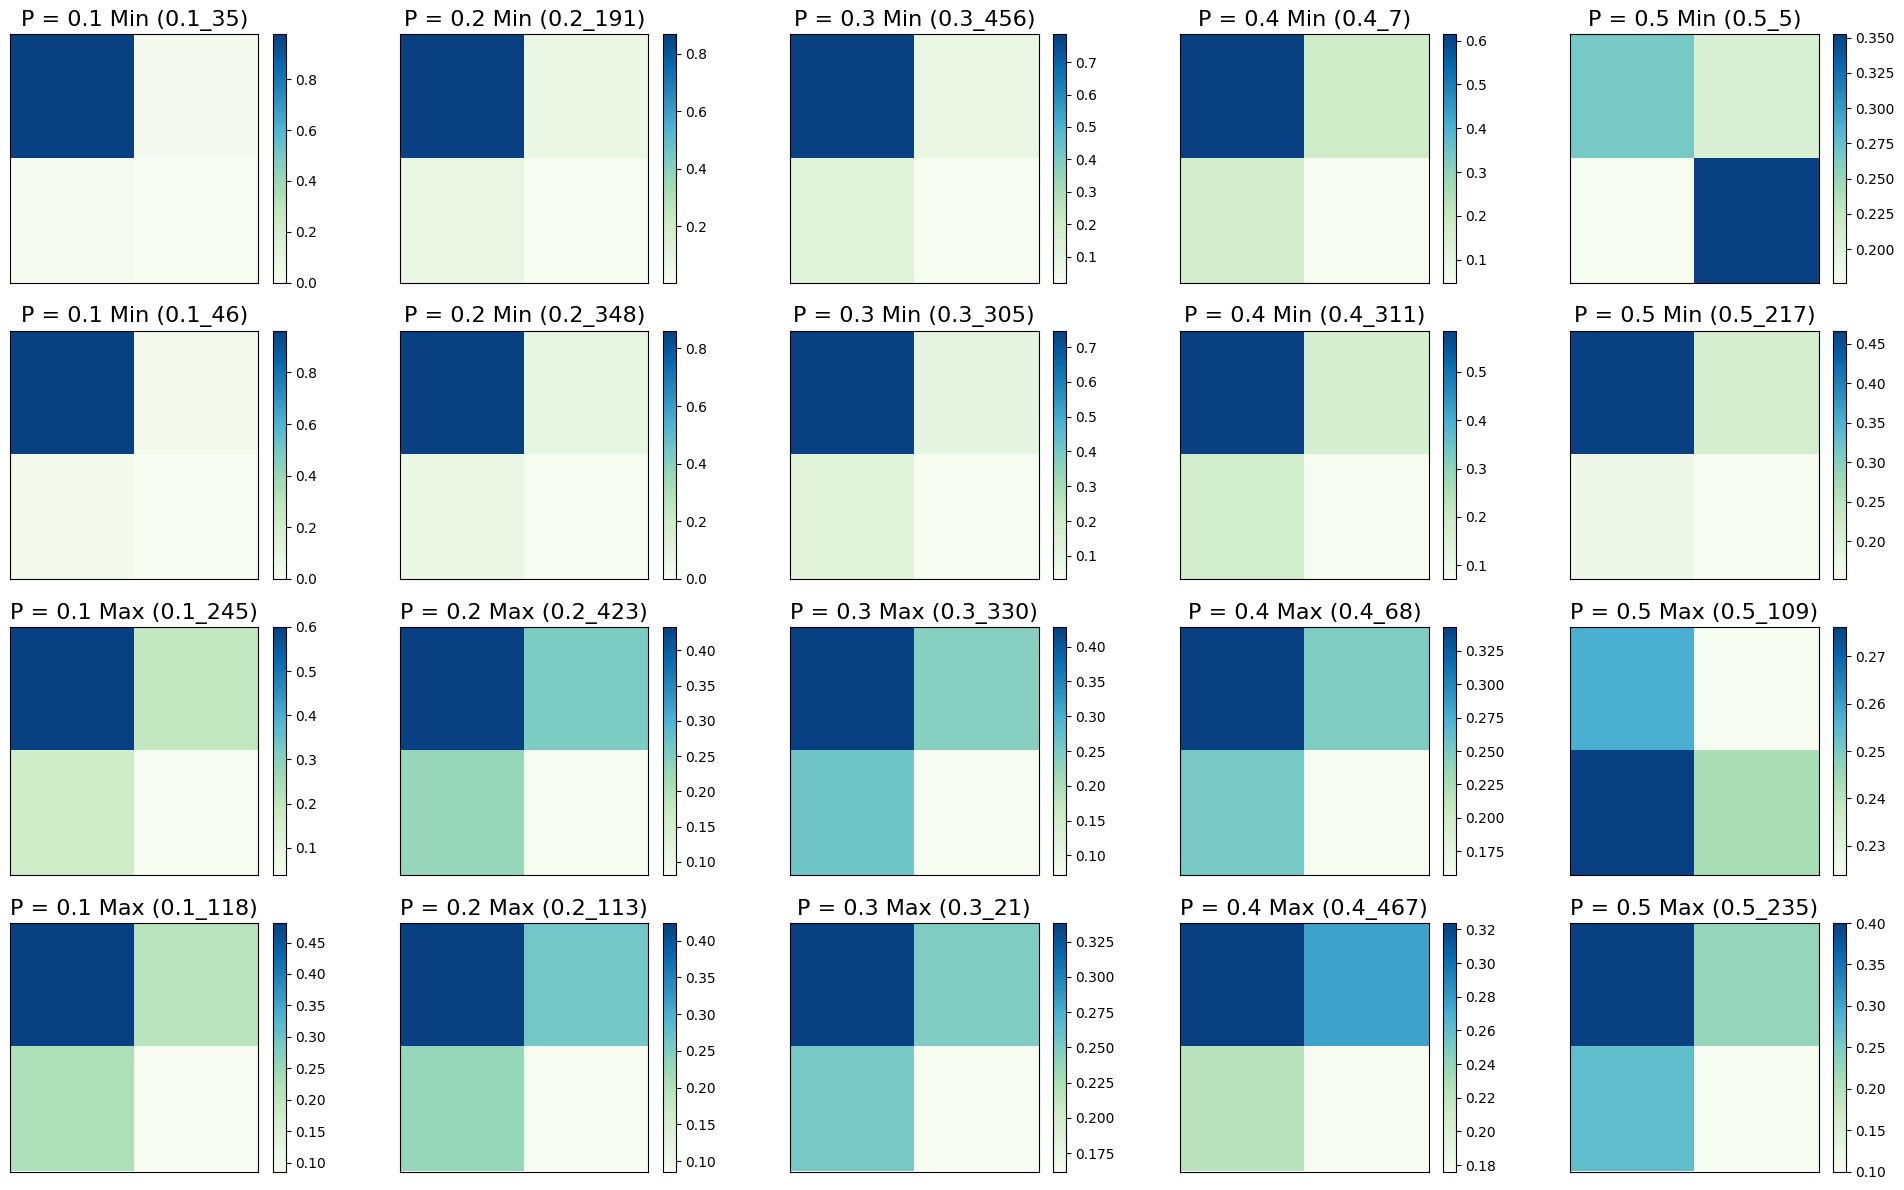

In [739]:
diffentropy_keys = [
    '0.1_35', '0.2_191', '0.3_456', '0.4_7', '0.5_5',   
    '0.1_46', '0.2_348', '0.3_305', '0.4_311', '0.5_217', 
    '0.1_245',  '0.2_423', '0.3_330', '0.4_68', '0.5_109',
    '0.1_118',  '0.2_113', '0.3_21', '0.4_467', '0.5_235'    
]

diffentropy_titles = [
    '0.1 Min', '0.2 Min', '0.3 Min', '0.4 Min', '0.5 Min',
    '0.1 Min', '0.2 Min', '0.3 Min', '0.4 Min', '0.5 Min',
    '0.1 Max', '0.2 Max', '0.3 Max', '0.4 Max', '0.5 Max',
    '0.1 Max', '0.2 Max', '0.3 Max', '0.4 Max', '0.5 Max'
]

fig, axes = plt.subplots(4, 5, figsize=(20, 12))
axes = axes.flatten() 

for i in range(20):
    ax = axes[i]
    key = diffentropy_keys[i]
    
    im = ax.imshow(df['glcm'][key], cmap='GnBu')
    ax.set_title(f'P = {diffentropy_titles[i]} ({diffentropy_keys[i]})', fontsize=16)
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

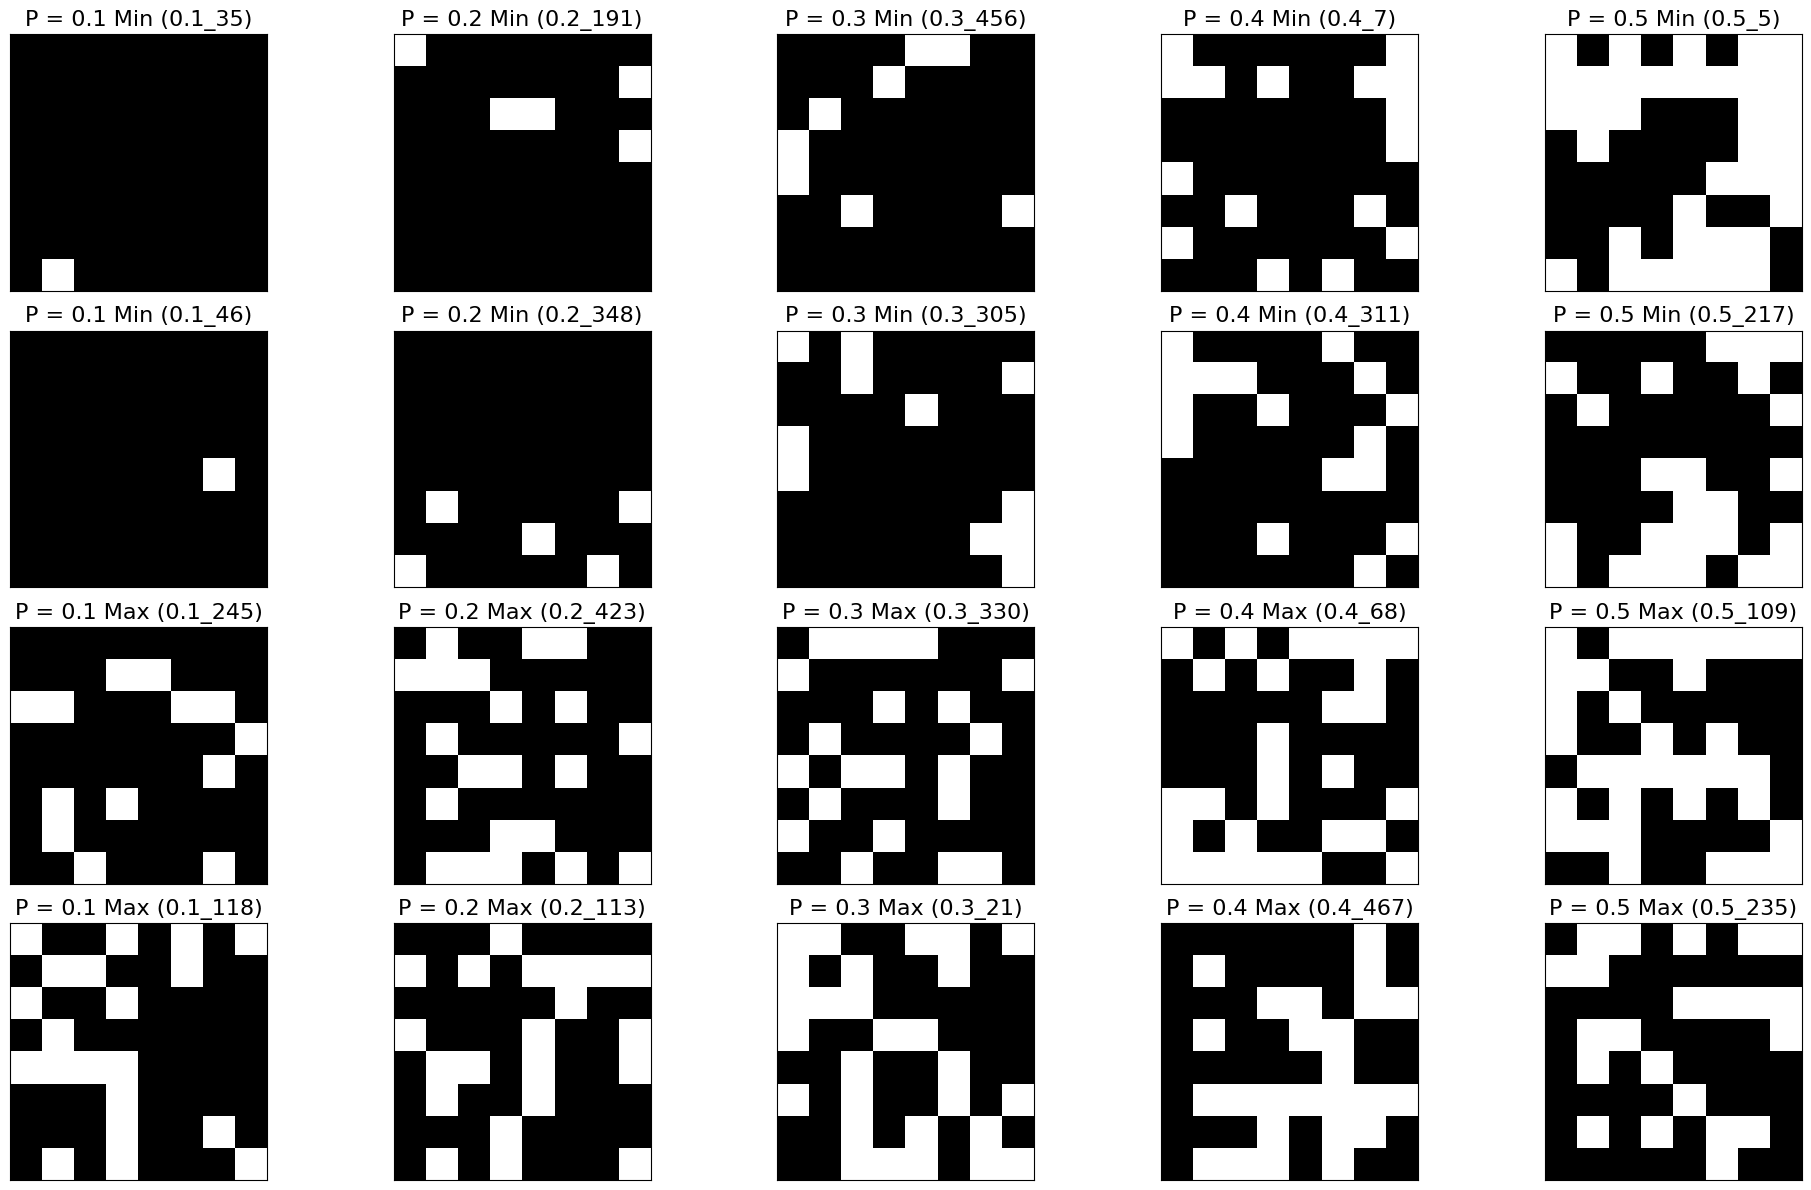

In [740]:
fig, axes = plt.subplots(4, 5, figsize=(20, 12))
axes = axes.flatten() 

for i in range(20):
    ax = axes[i]
    key = diffentropy_keys[i]
    
    im = ax.imshow(df['image'][key], cmap='gray')
    ax.set_title(f'P = {diffentropy_titles[i]} ({diffentropy_keys[i]})', fontsize=16)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

It seems like this feature is lower in images where a gray level is dominant. As previously stated, the more types of co-occurences in the glcm (variety of gray levels in the image) will increase the feature value. The high value in the 0.1 random variable setting (see sample 0.1_118) can be justified for its (unlikely) generation of more white pixels.

## Difference variance

$$ \sum_{k=0}^{N-1} (k - \mu_{x-y})^2 p_{x-y}(k) $$

this feature measures the variance of the marginalized difference distribution $(p_{x-y}(k))$. The term $(k - \mu_{x-y})^2$ acts as a weighting function that penalizes deviations from the mean difference $\mu_{x-y}$. If an image has a very consistent texture where the intensity change between neighbors is stable, $p_{x-y}(k)$ will be highly concentrated around its mean, resulting in a low variance.

Low difference variance suggests a "predictable" texture. Even if the image is high-contrast, if the transitions between light and dark pixels follow a regular, repetitive rule, the variance of those differences remains small.

High difference variance suggests a complex texture where the relationships between adjacent pixels are not uniform. It captures the degree of disorder.

* Difference Variance is a measure of heterogeneity that places higher weights on differing intensity level pairs that deviate more from the mean (pyradiomics).

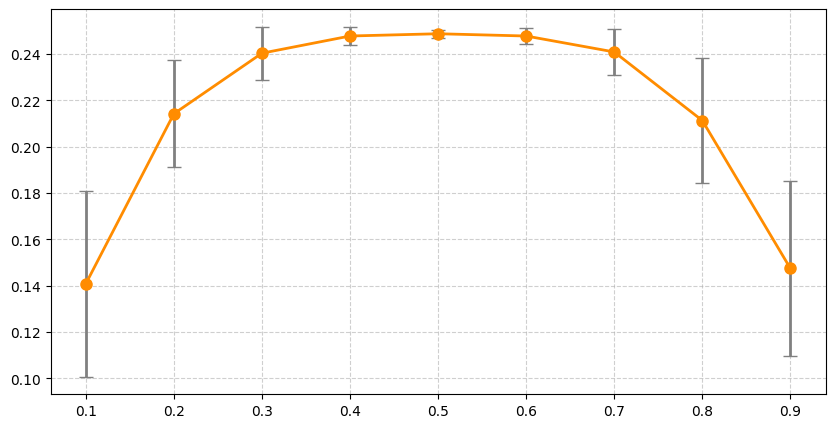

In [35]:
avg_difference_variance = [np.mean([features[10] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_difference_variance = [np.std([features[10] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_difference_variance, yerr=std_difference_variance, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Below we compare samples that produced 5 of the lowest, middle, and highest values of Difference variance. We focus on random settings between 0.4 and 0.6 to avoid redundancy.

In [123]:
df_difference_variance = df[(df['p'] == 0.4) | (df['p'] == 0.5) | (df['p'] == 0.6)
            ].sort_values(by=["difference_variance"])[['difference_variance', 'glcm', 'image']]

df_difference_variance

difference_variance  \
0.6_45              0.222222   
0.6_455             0.223787   
0.4_7               0.223787   
0.4_311             0.225306   
0.6_163             0.226780   
...                      ...   
0.6_429             0.250000   
0.6_190             0.250000   
0.6_272             0.250000   
0.6_439             0.250000   
0.4_68              0.250000   

                                                      glcm  \
0.6_45   [[0.09523809523809523, 0.1761904761904762], [0...   
0.6_455  [[0.06190476190476191, 0.15714285714285714], [...   
0.4_7    [[0.6142857142857143, 0.1761904761904762], [0....   
0.4_311  [[0.5857142857142857, 0.1619047619047619], [0....   
0.6_163  [[0.014285714285714285, 0.18571428571428572], ...   
...                                                    ...   
0.6_429  [[0.14761904761904762, 0.2619047619047619], [0...   
0.6_190  [[0.22380952380952382, 0.24761904761904763], [...   
0.6_272  [[0.12380952380952381, 0.2523809523809524], [0...   
0.6_439  [[0.19523809523809524, 0.2714285714285714], [0...   
0.4_68   [[0.34285714285714286, 0.24761904761904763], [...   

                                                     image  
0.6_45   [[1, 1, 1, 1, 0, 0, 0, 0], [1, 1, 0, 0, 1, 0, ...  
0.6_455  [[1, 1, 1, 1, 0, 1, 1, 1], [1, 1, 1, 0, 1, 1, ...  
0.4_7    [[1, 0, 0, 0, 0, 0, 0, 1], [1, 1, 0, 1, 0, 0, ...  
0.4_311  [[1, 0, 0, 0, 0, 1, 0, 0], [1, 1, 1, 0, 0, 0, ...  
0.6_163  [[1, 1, 1, 0, 1, 1, 1, 0], [0, 0, 1, 1, 1, 1, ...  
...                                                    ...  
0.6_429  [[1, 1, 0, 0, 0, 1, 0, 1], [0, 1, 0, 1, 1, 0, ...  
0.6_190  [[0, 0, 0, 0, 1, 1, 1, 1], [1, 0, 1, 0, 0, 1, ...  
0.6_272  [[1, 0, 1, 1, 1, 0, 0, 1], [1, 0, 0, 1, 0, 1, ...  
0.6_439  [[1, 0, 0, 0, 0, 0, 0, 1], [1, 0, 1, 1, 0, 0, ...  
0.4_68   [[1, 0, 1, 0, 1, 1, 1, 1], [0, 1, 0, 1, 0, 0, ...  

[1500 rows x 3 columns]

In [124]:
mid_idx = len(df_difference_variance) // 2
start = max(0, mid_idx - (5 // 2))
end = start + 5

df_middle_5 = df_difference_variance.iloc[start:end]
df_middle_5

difference_variance  \
0.5_330             0.249184   
0.5_319             0.249184   
0.4_37              0.249184   
0.6_458             0.249184   
0.4_126             0.249184   

                                                      glcm  \
0.5_330  [[0.43333333333333335, 0.24761904761904763], [...   
0.5_319  [[0.21428571428571427, 0.24761904761904763], [...   
0.4_37   [[0.26666666666666666, 0.2761904761904762], [0...   
0.6_458  [[0.07142857142857142, 0.28095238095238095], [...   
0.4_126  [[0.3904761904761905, 0.24761904761904763], [0...   

                                                     image  
0.5_330  [[0, 0, 0, 1, 0, 0, 0, 1], [1, 0, 1, 1, 0, 1, ...  
0.5_319  [[1, 1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 1, ...  
0.4_37   [[0, 1, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, ...  
0.6_458  [[0, 1, 0, 1, 0, 1, 1, 0], [1, 1, 0, 1, 1, 1, ...  
0.4_126  [[0, 1, 0, 0, 1, 1, 0, 0], [0, 0, 0, 0, 0, 1, ...

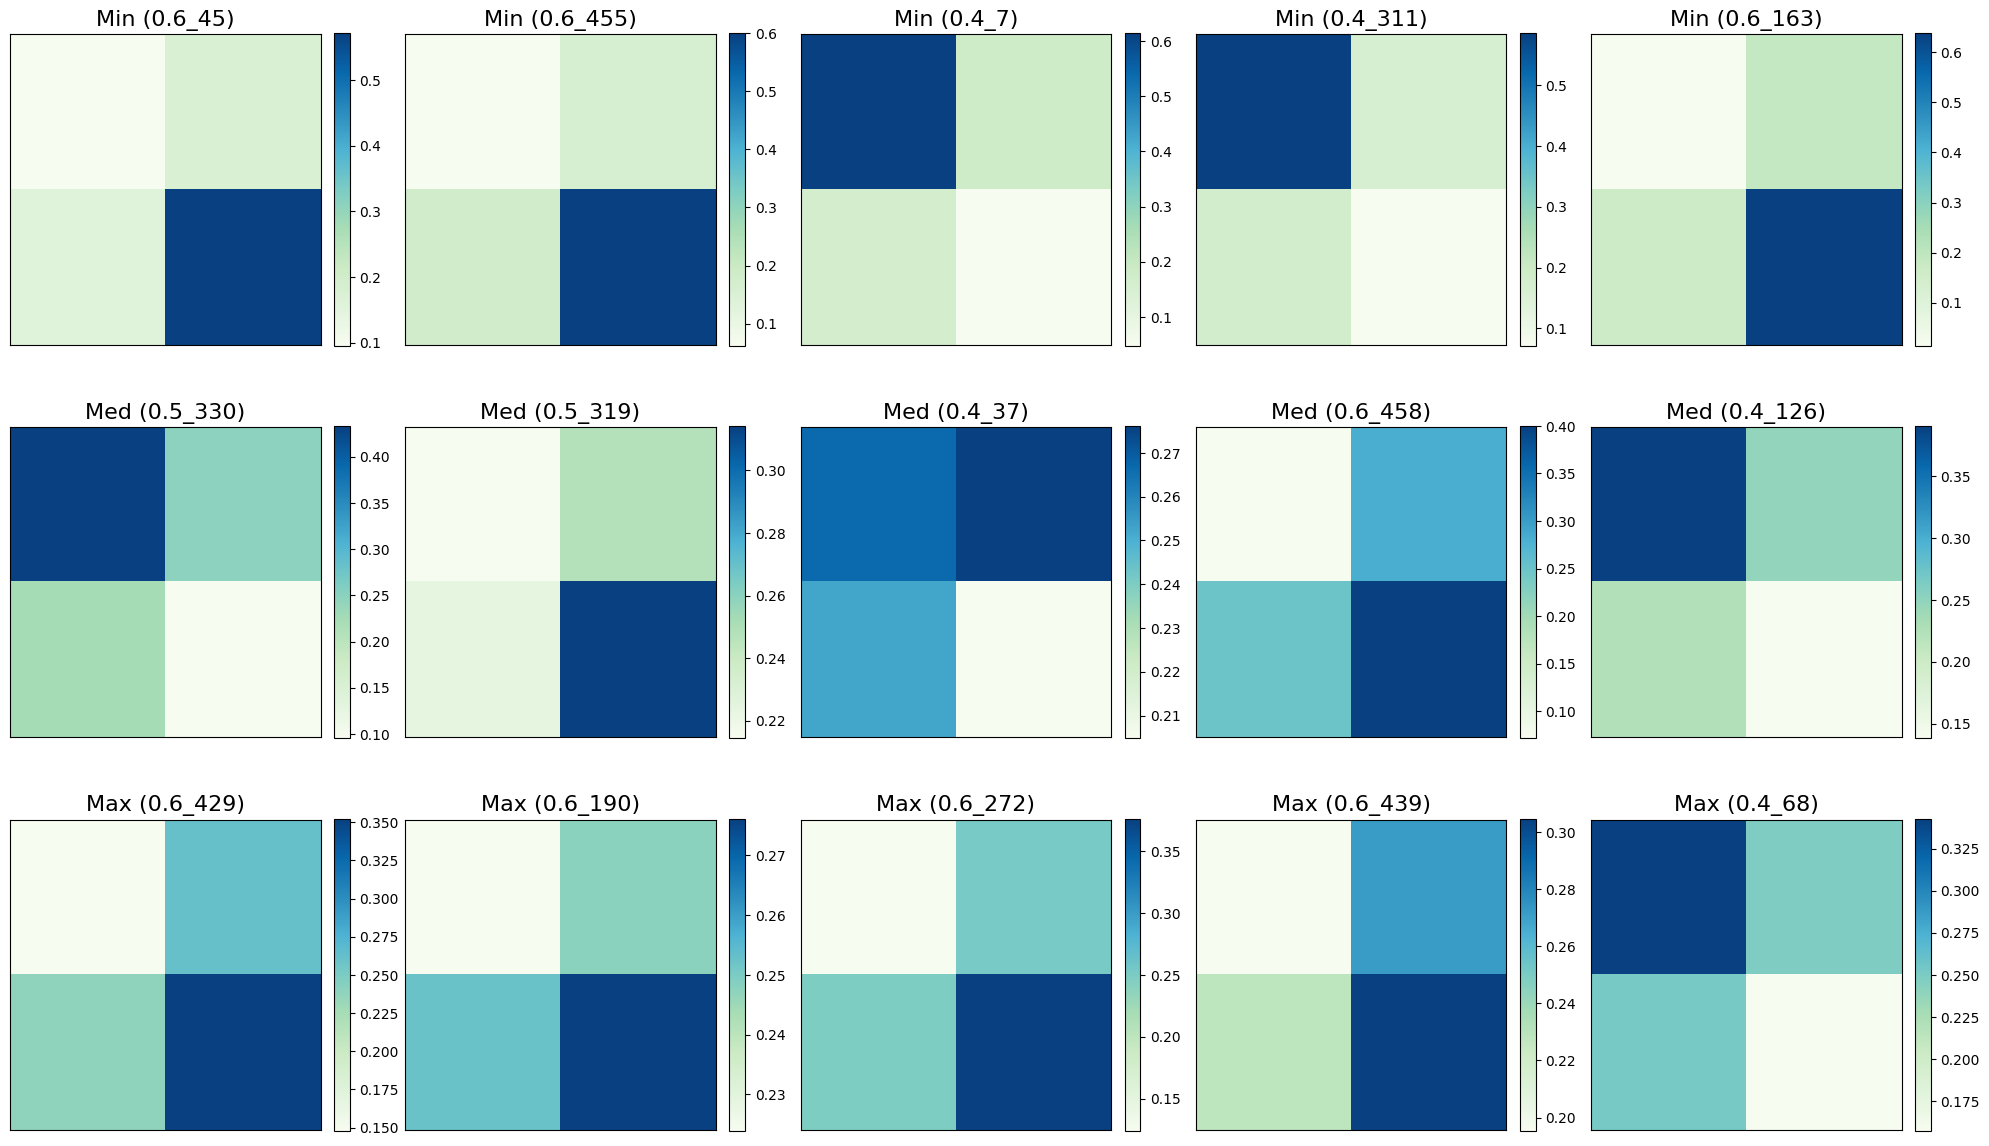

In [131]:
difference_variance_keys = [
    '0.6_45', '0.6_455', '0.4_7', '0.4_311', '0.6_163', 
    '0.5_330', '0.5_319', '0.4_37', '0.6_458', '0.4_126',   
    '0.6_429', '0.6_190', '0.6_272', '0.6_439', '0.4_68'  
]

difference_variance_titles = [
    'Min', 'Min', 'Min', 'Min', 'Min',
    'Med', 'Med', 'Med', 'Med', 'Med', 
    'Max', 'Max', 'Max', 'Max', 'Max'
]

fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.flatten() 

for i in range(15):
    ax = axes[i]
    key = difference_variance_keys[i]
    
    im = ax.imshow(df['glcm'][key], cmap='GnBu')
    ax.set_title(f'{difference_variance_titles[i]} ({difference_variance_keys[i]})', fontsize=16)
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

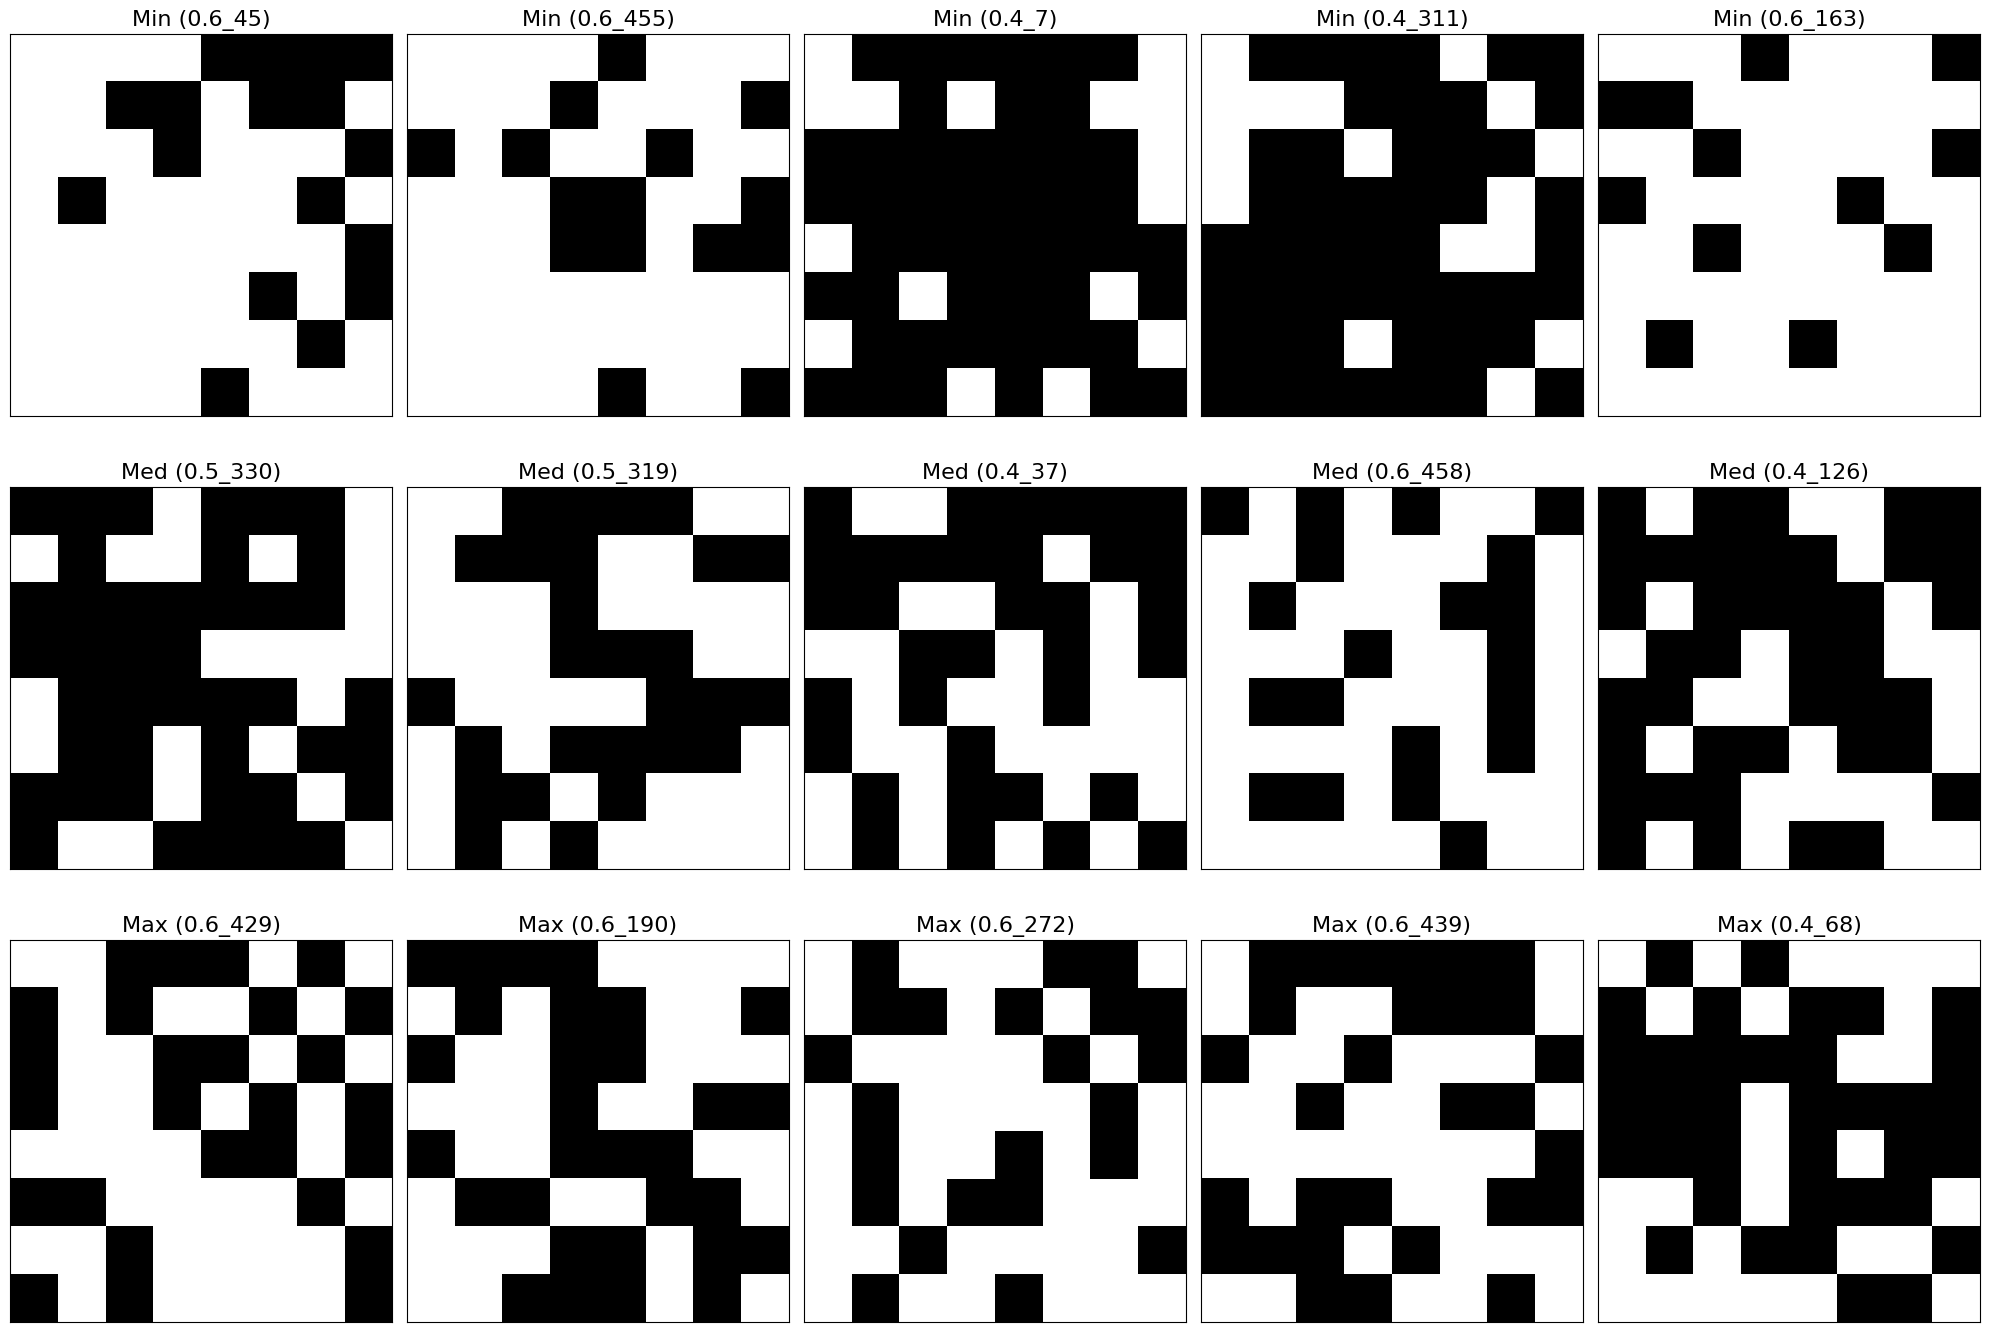

In [132]:
fig, axes = plt.subplots(3, 5, figsize=(20, 14))
axes = axes.flatten() 

for i in range(15):
    ax = axes[i]
    key = difference_variance_keys[i]
    
    im = ax.imshow(df['image'][key], cmap='gray')
    ax.set_title(f'{difference_variance_titles[i]} ({difference_variance_keys[i]})', fontsize=16)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

## Energy

$$ \sum_{i=1}^{N} \sum_{j=1}^{N} p(i, j)^2 $$
Aslo known as Angular Second Moment. 

Energy is a measure of the concentration of the probability distribution within the GLCM. This feature operates on the principle that the sum of squares of a set of probabilities is maximized when the "probability mass" is concentrated in a few entries and minimized when it is spread uniformly. If an image is dominated by a certain co-occurnce, wether $i=j$ (a singulare gray level) or $i \neq j$ (a singular gradient), the normalized GLCM at entry $(i,j)$ will in turn have a large probability. This concentration (energy) at a singular entry causes the feature to increase; concentrations at multiple entries can produce a high feature value as long as it's probabilities are much larger than the rest.

* Energy is a measure of homogeneous patterns in the image. A greater Energy implies that there are more instances of intensity value pairs in the image that neighbor each other at higher frequencies (pyradiomics).
* The energy is a measure of homogeneity of the image. If the image is homogeneous, the image
contains only a few gray levels. This results in a GLCM with only a few, but relatively high values
of $p(i,j)$. The sum of squares will then be high (Parmer et al.).

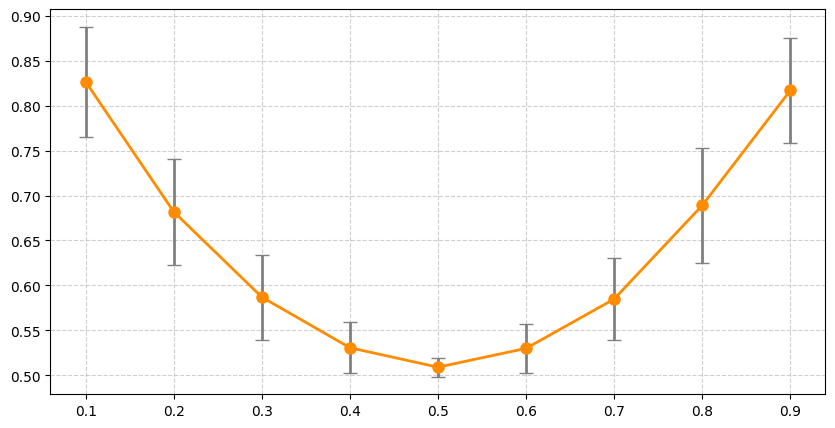

In [408]:
avg_energy = [np.mean([features[1] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_energy = [np.std([features[1] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_energy, yerr=std_energy, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Below we compare samples that produced 5 of the lowest, middle, and highest values of Energy. We focus on random settings between 0.4 and 0.6 to avoid redundancy.

In [125]:
df_energy = df[(df['p'] == 0.4) | (df['p'] == 0.5) | (df['p'] == 0.6)
            ].sort_values(by=["energy"])[['energy', 'glcm', 'image']]

df_energy

energy                                               glcm  \
0.5_478  0.500023  [[0.2523809523809524, 0.24761904761904763], [0...   
0.5_74   0.500068  [[0.24761904761904763, 0.2571428571428571], [0...   
0.5_333  0.500113  [[0.2571428571428571, 0.24761904761904763], [0...   
0.4_268  0.500113  [[0.24761904761904763, 0.2571428571428571], [0...   
0.4_92   0.500113  [[0.24761904761904763, 0.2523809523809524], [0...   
...           ...                                                ...   
0.4_311  0.638060  [[0.5857142857142857, 0.1619047619047619], [0....   
0.6_443  0.646533  [[0.04285714285714286, 0.19523809523809524], [...   
0.6_455  0.649053  [[0.06190476190476191, 0.15714285714285714], [...   
0.4_7    0.660962  [[0.6142857142857143, 0.1761904761904762], [0....   
0.6_163  0.684158  [[0.014285714285714285, 0.18571428571428572], ...   

                                                     image  
0.5_478  [[1, 1, 1, 0, 0, 1, 1, 0], [1, 1, 1, 1, 1, 1, ...  
0.5_74   [[0, 1, 0, 1, 0, 1, 0, 1], [0, 1, 1, 0, 1, 1, ...  
0.5_333  [[0, 0, 0, 0, 1, 1, 1, 1], [0, 1, 1, 1, 0, 1, ...  
0.4_268  [[0, 1, 1, 0, 1, 1, 1, 1], [1, 0, 0, 0, 0, 0, ...  
0.4_92   [[1, 0, 0, 1, 1, 0, 1, 0], [0, 0, 0, 0, 1, 0, ...  
...                                                    ...  
0.4_311  [[1, 0, 0, 0, 0, 1, 0, 0], [1, 1, 1, 0, 0, 0, ...  
0.6_443  [[1, 1, 1, 0, 1, 1, 0, 1], [1, 1, 1, 0, 1, 1, ...  
0.6_455  [[1, 1, 1, 1, 0, 1, 1, 1], [1, 1, 1, 0, 1, 1, ...  
0.4_7    [[1, 0, 0, 0, 0, 0, 0, 1], [1, 1, 0, 1, 0, 0, ...  
0.6_163  [[1, 1, 1, 0, 1, 1, 1, 0], [0, 0, 1, 1, 1, 1, ...  

[1500 rows x 3 columns]

In [126]:
mid_idx = len(df_energy) // 2
start = max(0, mid_idx - (5 // 2))
end = start + 5

df_middle_5 = df_energy.iloc[start:end]
df_middle_5

energy                                               glcm  \
0.4_113  0.514065  [[0.3476190476190476, 0.23809523809523808], [0...   
0.5_292  0.514065  [[0.3238095238095238, 0.2571428571428571], [0....   
0.5_80   0.514153  [[0.1761904761904762, 0.24761904761904763], [0...   
0.5_415  0.514153  [[0.3238095238095238, 0.26666666666666666], [0...   
0.6_304  0.514198  [[0.22857142857142856, 0.21904761904761905], [...   

                                                     image  
0.4_113  [[0, 0, 0, 1, 1, 0, 0, 1], [0, 1, 1, 0, 0, 0, ...  
0.5_292  [[0, 0, 0, 0, 1, 1, 0, 1], [1, 0, 1, 0, 0, 0, ...  
0.5_80   [[0, 0, 0, 1, 1, 0, 0, 1], [0, 1, 1, 0, 0, 0, ...  
0.5_415  [[0, 0, 0, 0, 1, 1, 0, 1], [1, 1, 0, 0, 0, 0, ...  
0.6_304  [[0, 0, 0, 1, 1, 1, 1, 1], [0, 1, 0, 1, 1, 0, ...

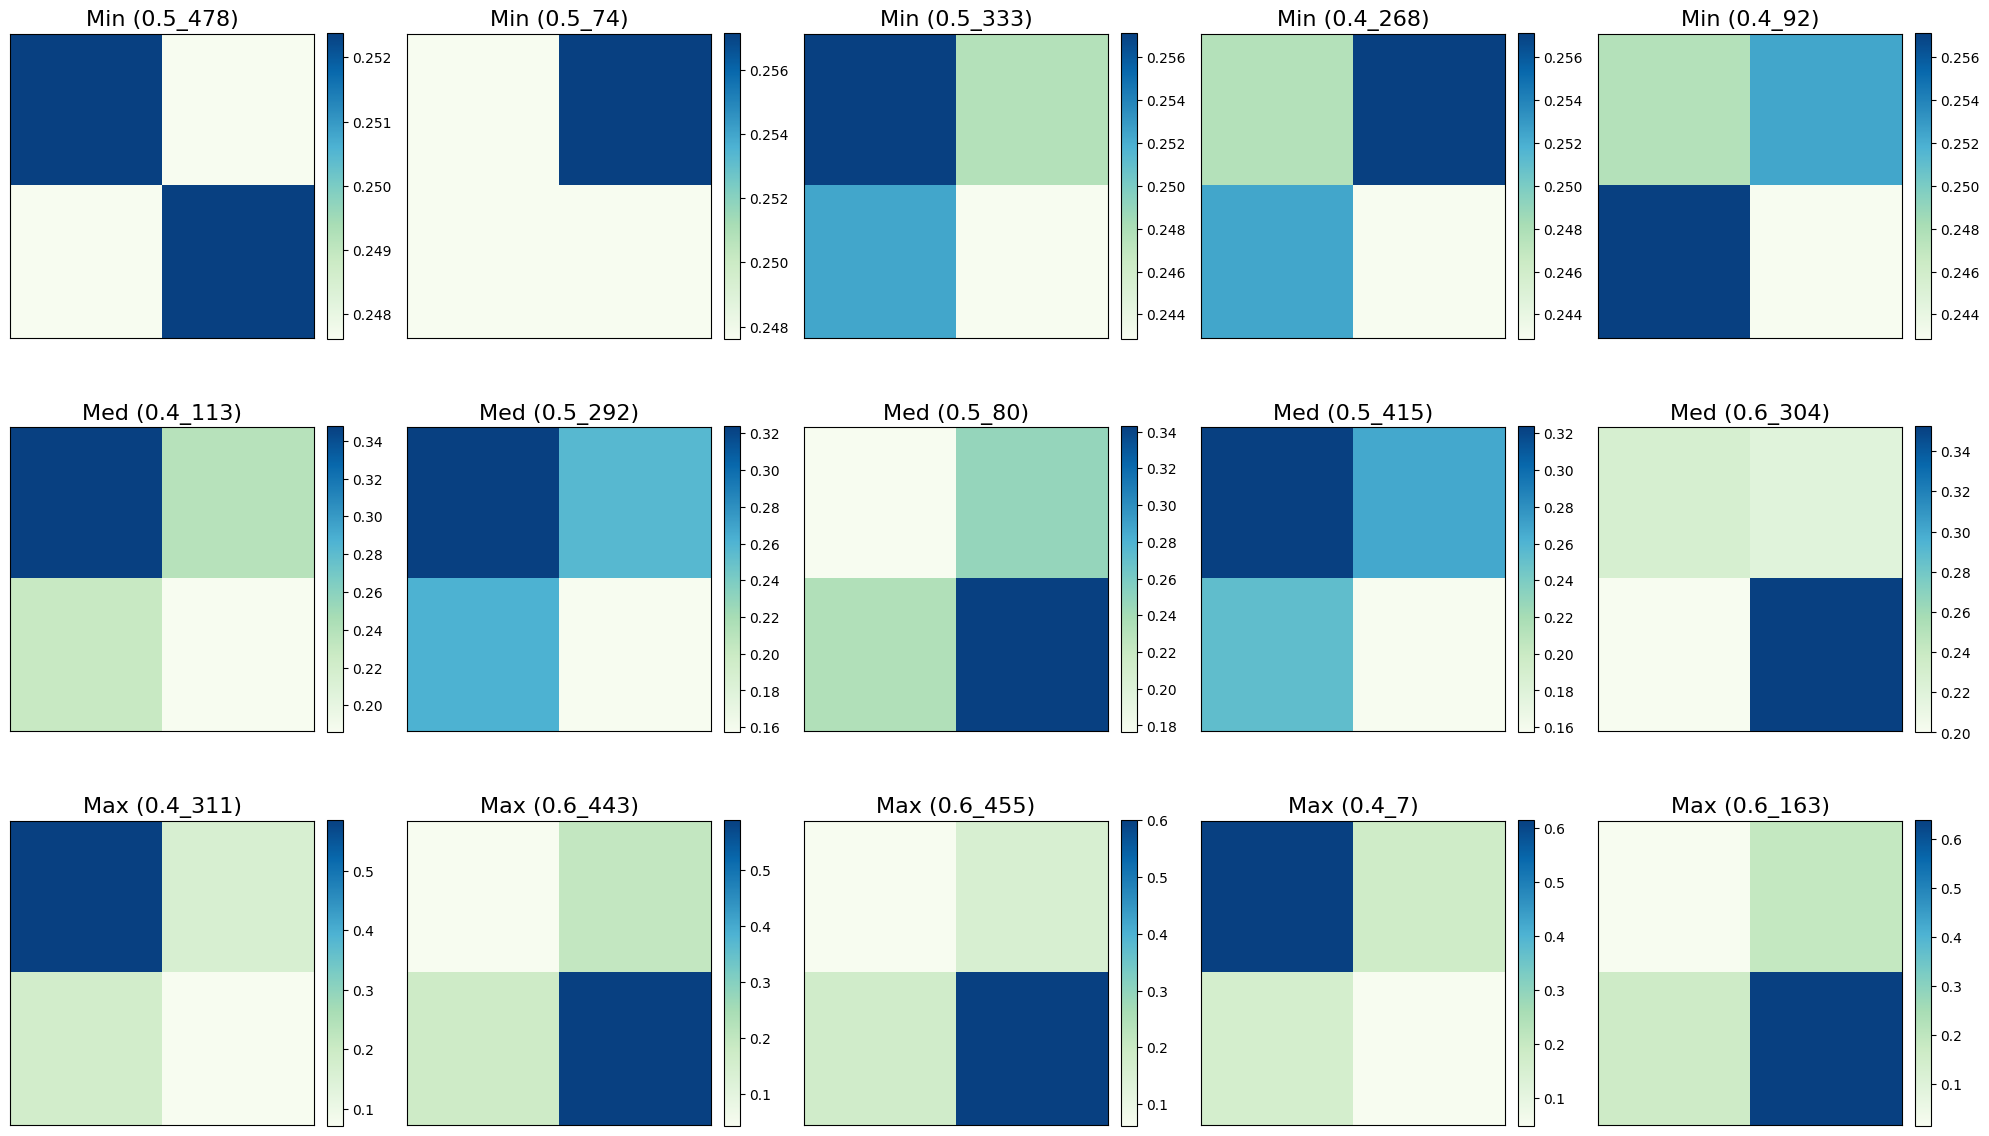

In [133]:
energy_keys = [
    '0.5_478', '0.5_74', '0.5_333', '0.4_268', '0.4_92', 
    '0.4_113', '0.5_292', '0.5_80', '0.5_415', '0.6_304',   
    '0.4_311', '0.6_443', '0.6_455', '0.4_7', '0.6_163'  
]

energy_titles = [
    'Min', 'Min', 'Min', 'Min', 'Min',
    'Med', 'Med', 'Med', 'Med', 'Med', 
    'Max', 'Max', 'Max', 'Max', 'Max'
]

fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.flatten() 

for i in range(15):
    ax = axes[i]
    key = energy_keys[i]
    
    im = ax.imshow(df['glcm'][key], cmap='GnBu')
    ax.set_title(f'{energy_titles[i]} ({energy_keys[i]})', fontsize=16)
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

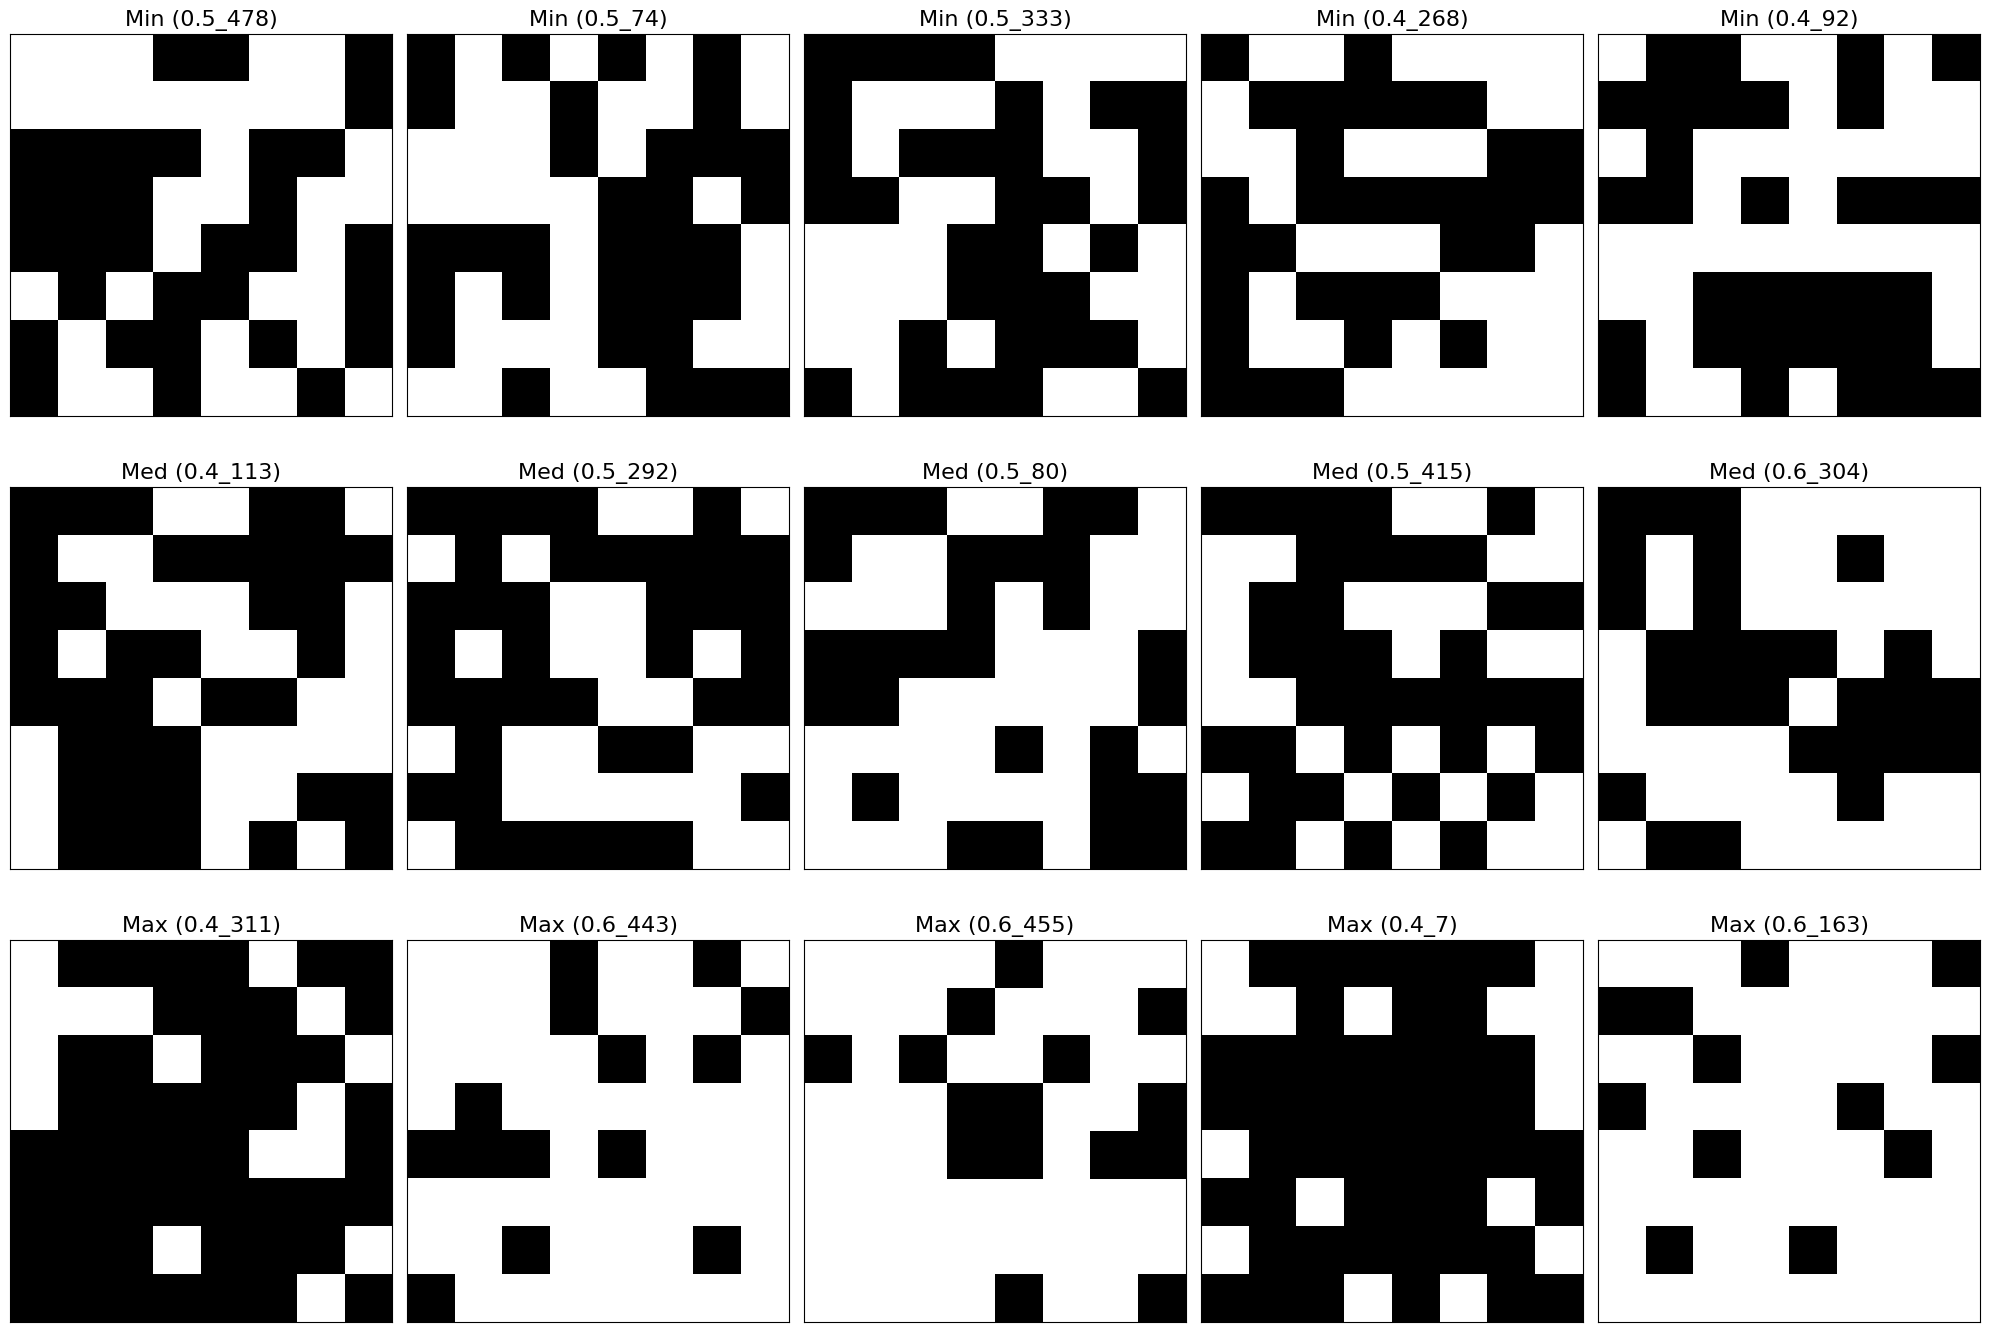

In [134]:
fig, axes = plt.subplots(3, 5, figsize=(20, 14))
axes = axes.flatten() 

for i in range(15):
    ax = axes[i]
    key = energy_keys[i]
    
    im = ax.imshow(df['image'][key], cmap='gray')
    ax.set_title(f'{energy_titles[i]} ({energy_keys[i]})', fontsize=16)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

## Entropy

$$ -\sum_{i=1}^{N} \sum_{j=1}^{N} p(i, j) \log p(i, j) $$
or,
$$ -\sum^{N_g}_{i=1} \sum^{N_g}_{j=1} {p(i,j)\log_2\big(p(i,j)+\epsilon\big)} $$

Shannon entropy applied to the normalized glcm. Entropy is maximized when the distribution is uniform ($p(i, j) = 1/N^2$ for all $i, j$), meaning every possible gray-level transition occurs with equal frequency. Entropy is minimized when the image is perfectly homogeneous, and only one entry in the GLCM has a probability of $1$.

In the context of a GLCM, entropy quantifies the structural unpredictability of gray level co-occurrences. A low entropy GLCM indicates that only a few gray level pairs occur with significant probability (typical of highly regular textures, large uniform regions, or consistent gradients). A high entropy GLCM reflects a broad spread of co-occurrence probabilities, corresponding to complex, irregular, or noisy textures.

Entropy is agnostic to where the mass lies in the matrix (diagonal vs. off-diagonal). This feature can play as a compliment of Energy and Homeginiety-like features feature.

* [Joint] entropy is a measure of the randomness/variability in neighborhood intensity values (pyradiomics).
* Inhomogeneous Images have low entropy, while a homogeneous scene has high entropy (Parmer et al.).

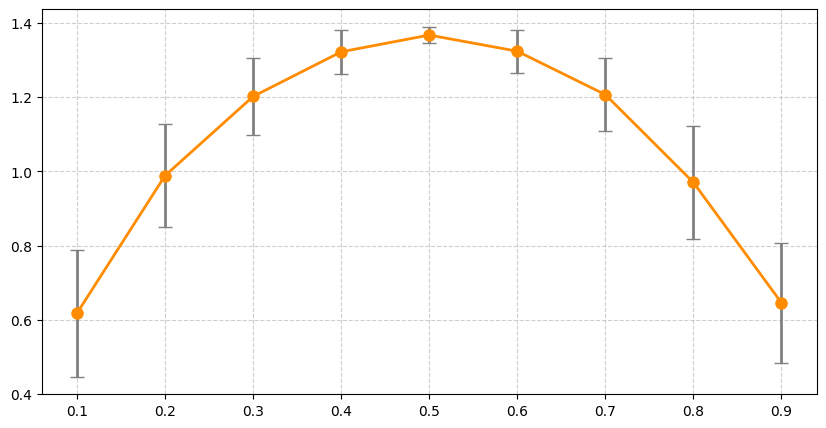

In [37]:
avg_entropy = [np.mean([features[11] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_entropy = [np.std([features[11] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_entropy, yerr=std_entropy, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Below we compare samples that produced 5 of the lowest, middle, and highest values of Entropy. We focus on random settings between 0.4 and 0.6 to avoid redundancy.

In [156]:
df_entropy = df[(df['p'] == 0.4) | (df['p'] == 0.5) | (df['p'] == 0.6)
            ].sort_values(by=["entropy"])[['entropy', 'glcm', 'image']]

df_entropy

entropy                                               glcm  \
0.6_163  0.954815  [[0.014285714285714285, 0.18571428571428572], ...   
0.4_7    1.045003  [[0.6142857142857143, 0.1761904761904762], [0....   
0.6_443  1.067331  [[0.04285714285714286, 0.19523809523809524], [...   
0.6_455  1.078875  [[0.06190476190476191, 0.15714285714285714], [...   
0.4_452  1.083292  [[0.5761904761904761, 0.20476190476190476], [0...   
...           ...                                                ...   
0.4_92   1.386068  [[0.24761904761904763, 0.2523809523809524], [0...   
0.5_333  1.386068  [[0.2571428571428571, 0.24761904761904763], [0...   
0.4_268  1.386068  [[0.24761904761904763, 0.2571428571428571], [0...   
0.5_74   1.386159  [[0.24761904761904763, 0.2571428571428571], [0...   
0.5_478  1.386249  [[0.2523809523809524, 0.24761904761904763], [0...   

                                                     image  
0.6_163  [[1, 1, 1, 0, 1, 1, 1, 0], [0, 0, 1, 1, 1, 1, ...  
0.4_7    [[1, 0, 0, 0, 0, 0, 0, 1], [1, 1, 0, 1, 0, 0, ...  
0.6_443  [[1, 1, 1, 0, 1, 1, 0, 1], [1, 1, 1, 0, 1, 1, ...  
0.6_455  [[1, 1, 1, 1, 0, 1, 1, 1], [1, 1, 1, 0, 1, 1, ...  
0.4_452  [[1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 0, 0, ...  
...                                                    ...  
0.4_92   [[1, 0, 0, 1, 1, 0, 1, 0], [0, 0, 0, 0, 1, 0, ...  
0.5_333  [[0, 0, 0, 0, 1, 1, 1, 1], [0, 1, 1, 1, 0, 1, ...  
0.4_268  [[0, 1, 1, 0, 1, 1, 1, 1], [1, 0, 0, 0, 0, 0, ...  
0.5_74   [[0, 1, 0, 1, 0, 1, 0, 1], [0, 1, 1, 0, 1, 1, ...  
0.5_478  [[1, 1, 1, 0, 0, 1, 1, 0], [1, 1, 1, 1, 1, 1, ...  

[1500 rows x 3 columns]

In [158]:
mid_idx = len(df_entropy) // 2
start = max(0, mid_idx - (5 // 2))
end = start + 5

df_middle_5 = df_entropy.iloc[start:end]
df_middle_5

entropy                                               glcm  \
0.6_49   1.357034  [[0.1523809523809524, 0.26666666666666666], [0...   
0.6_449  1.357054  [[0.21428571428571427, 0.22857142857142856], [...   
0.4_267  1.357080  [[0.319047619047619, 0.2619047619047619], [0.2...   
0.6_226  1.357080  [[0.15714285714285714, 0.2619047619047619], [0...   
0.5_162  1.357339  [[0.34285714285714286, 0.21428571428571427], [...   

                                                     image  
0.6_49   [[1, 1, 1, 1, 1, 0, 1, 1], [0, 0, 1, 1, 1, 1, ...  
0.6_449  [[0, 1, 1, 0, 0, 0, 1, 0], [1, 1, 0, 0, 0, 0, ...  
0.4_267  [[1, 1, 0, 0, 0, 0, 1, 0], [1, 0, 1, 1, 0, 1, ...  
0.6_226  [[0, 1, 1, 0, 1, 1, 0, 1], [1, 0, 1, 0, 1, 0, ...  
0.5_162  [[0, 1, 1, 1, 0, 1, 0, 1], [1, 0, 0, 0, 1, 1, ...

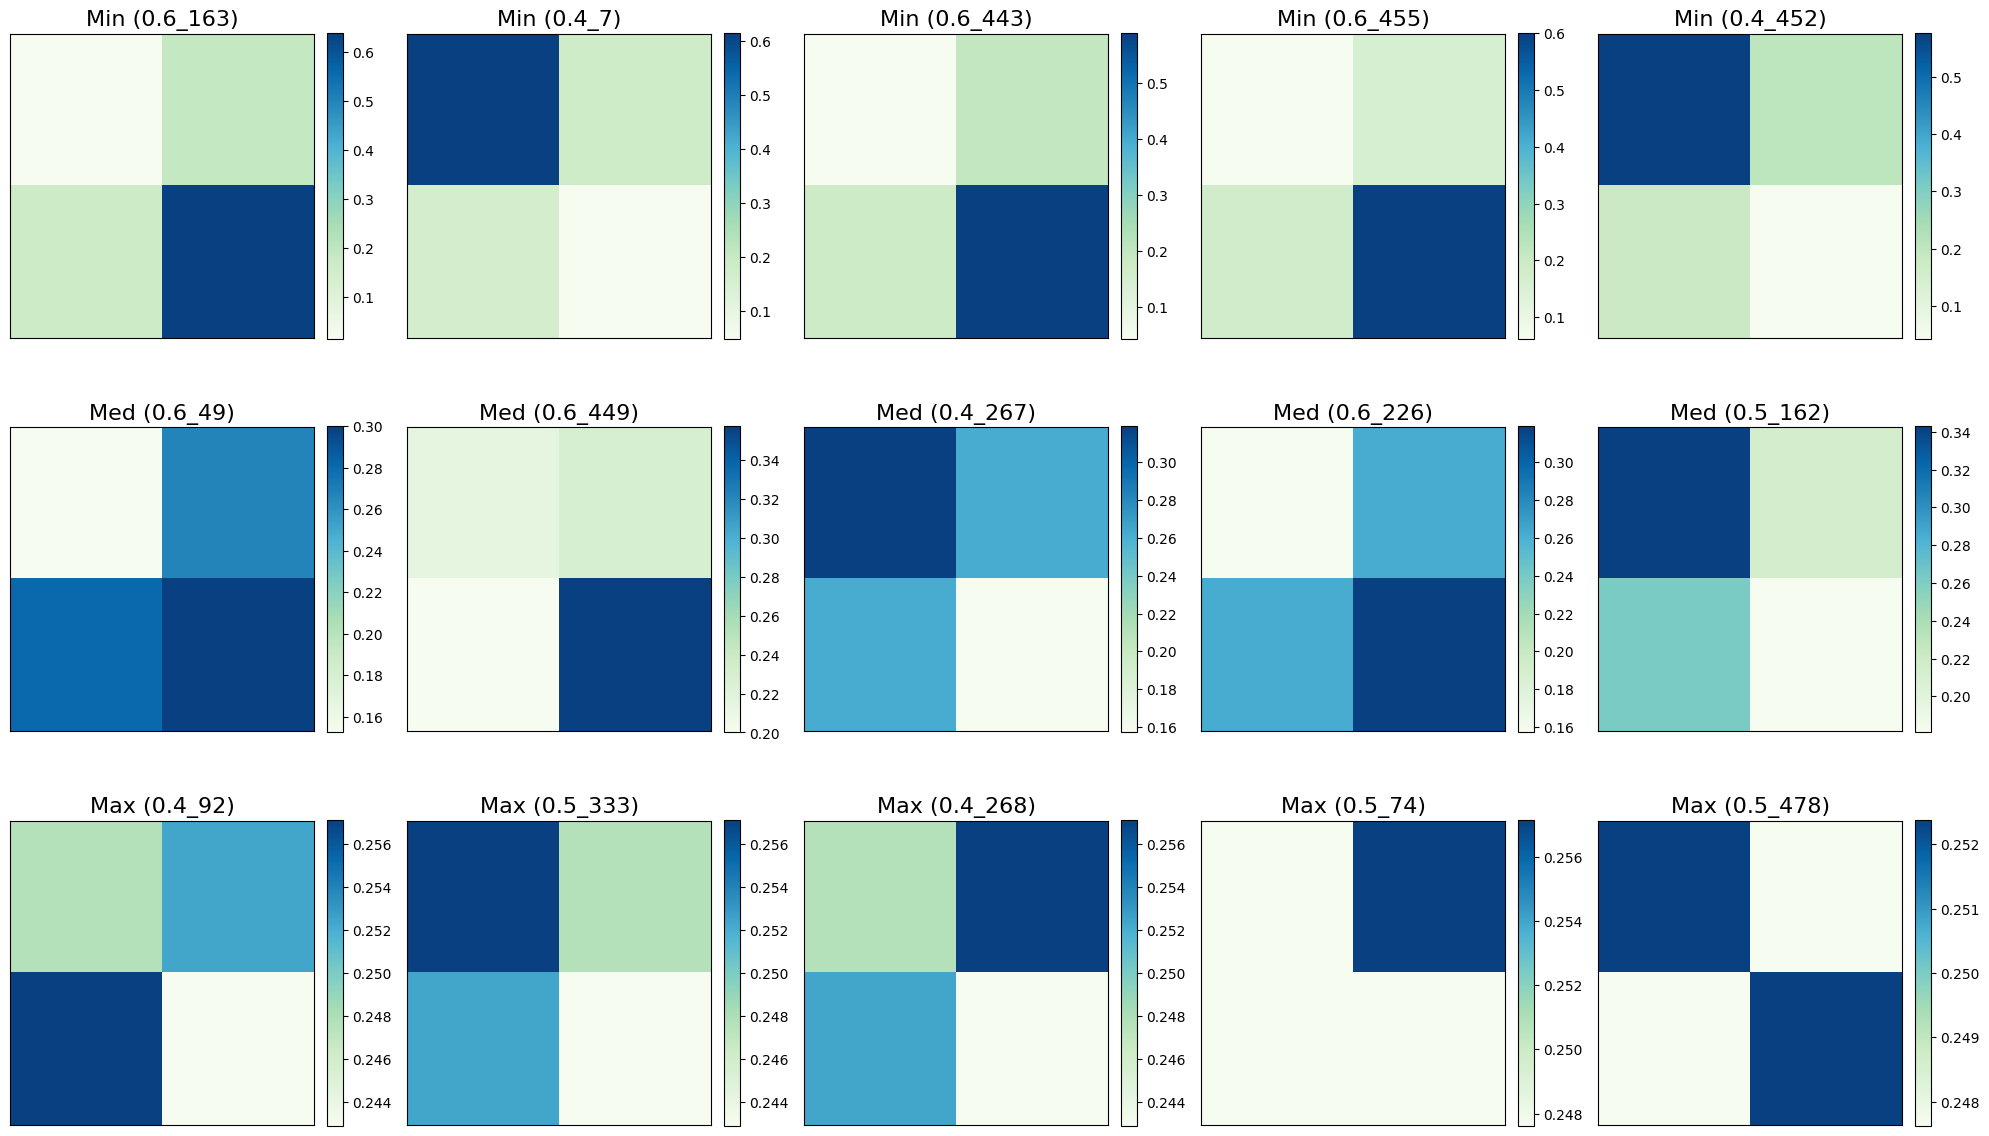

In [160]:
entropy_keys = [
    '0.6_163', '0.4_7', '0.6_443', '0.6_455', '0.4_452', 
    '0.6_49', '0.6_449', '0.4_267', '0.6_226', '0.5_162',   
    '0.4_92', '0.5_333', '0.4_268', '0.5_74', '0.5_478'  
]

entropy_titles = [
    'Min', 'Min', 'Min', 'Min', 'Min',
    'Med', 'Med', 'Med', 'Med', 'Med', 
    'Max', 'Max', 'Max', 'Max', 'Max'
]

fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.flatten() 

for i in range(15):
    ax = axes[i]
    key = entropy_keys[i]
    
    im = ax.imshow(df['glcm'][key], cmap='GnBu')
    ax.set_title(f'{entropy_titles[i]} ({entropy_keys[i]})', fontsize=16)
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

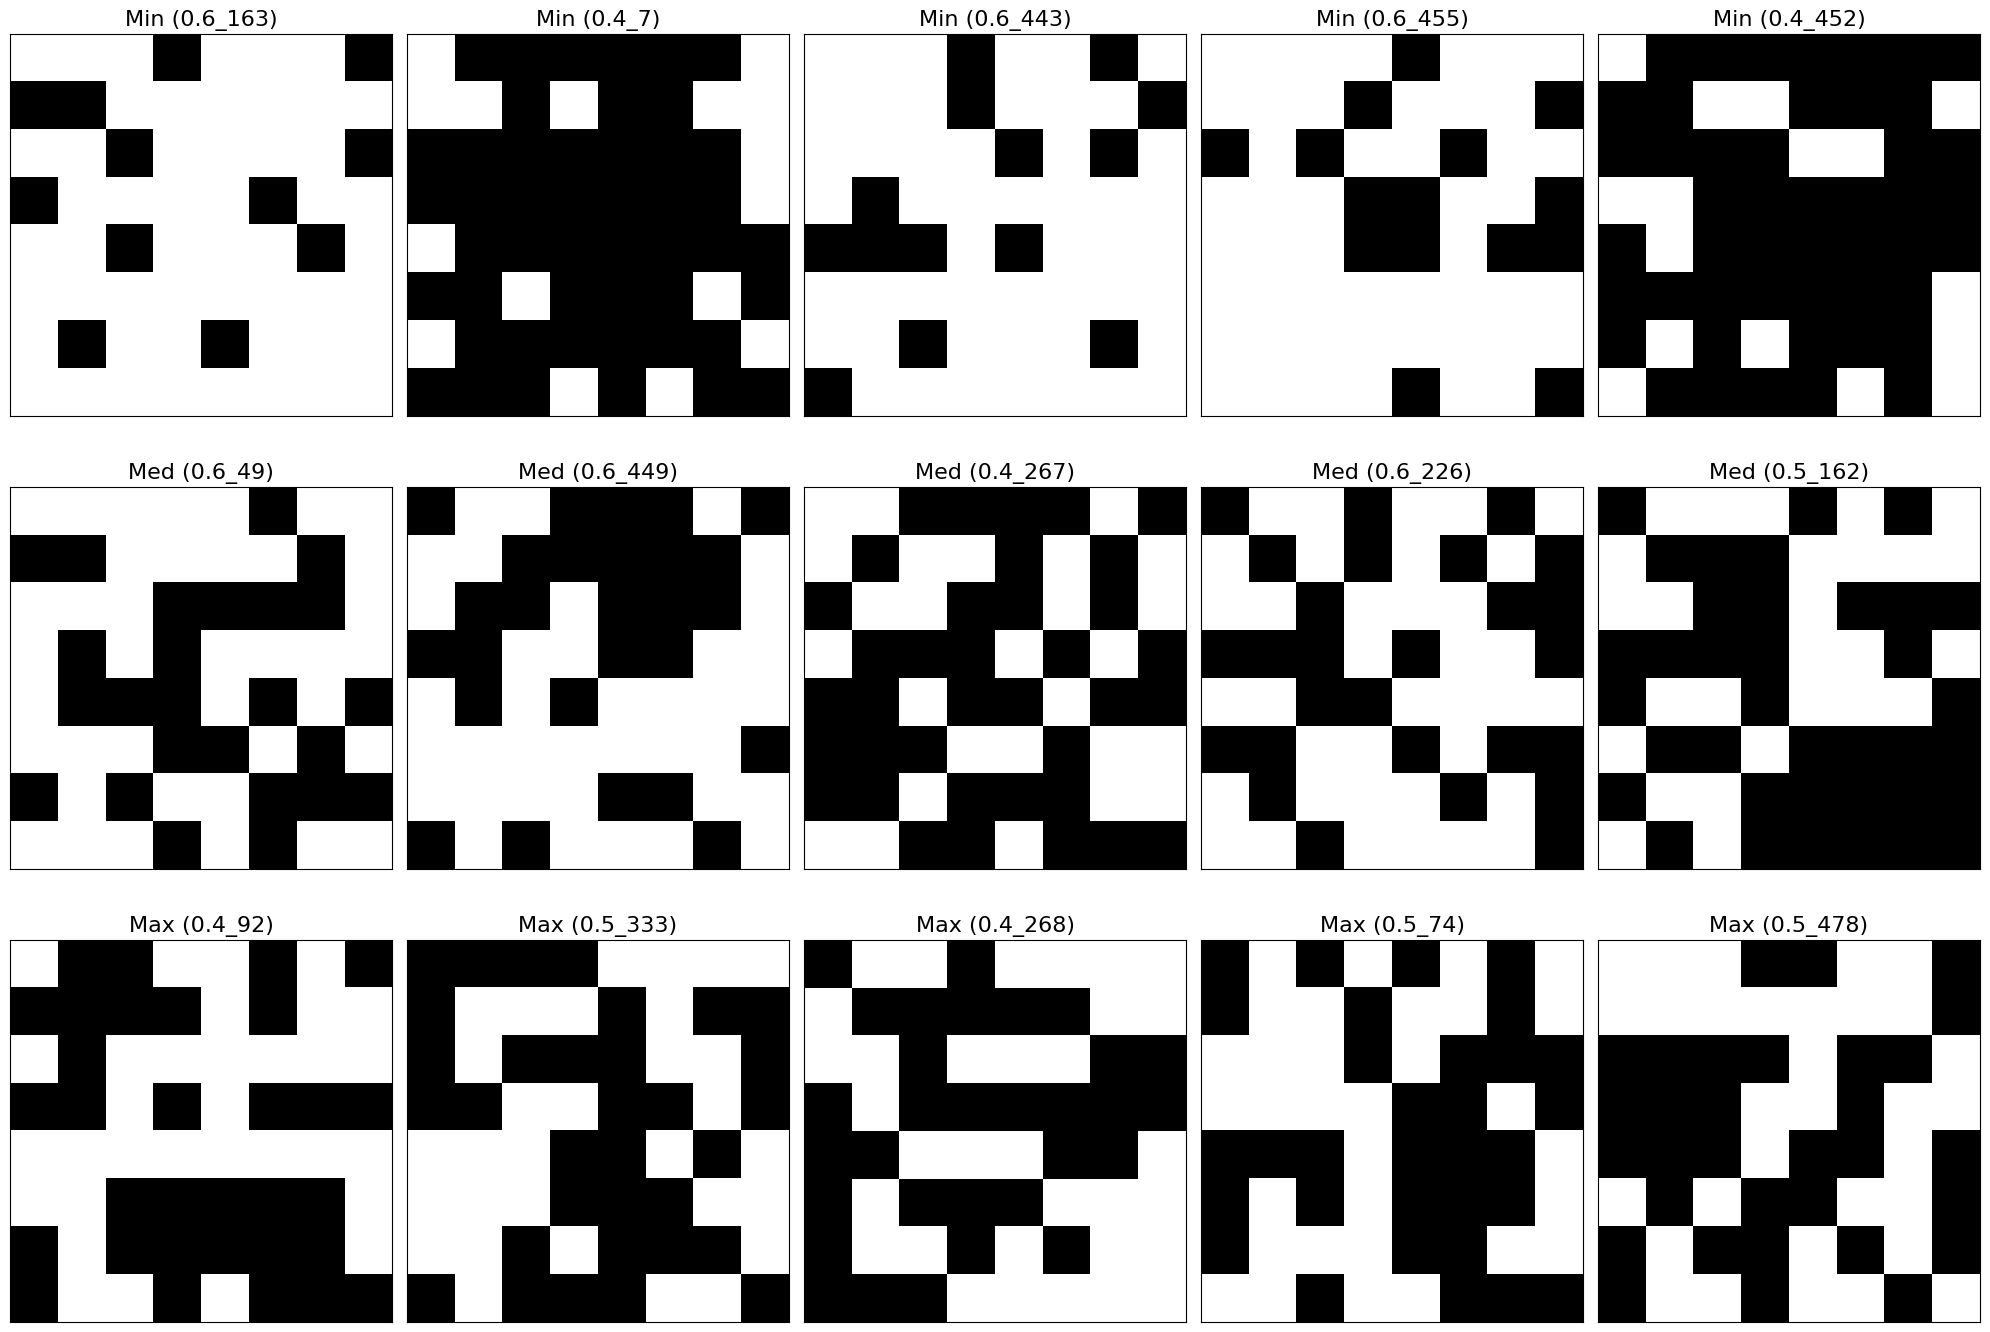

In [161]:
fig, axes = plt.subplots(3, 5, figsize=(20, 14))
axes = axes.flatten() 

for i in range(15):
    ax = axes[i]
    key = entropy_keys[i]
    
    im = ax.imshow(df['image'][key], cmap='gray')
    ax.set_title(f'{entropy_titles[i]} ({entropy_keys[i]})', fontsize=16)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

## Homogeneity

$$ \sum_{i=1}^{N} \sum_{j=1}^{N} \frac{p(i, j)}{1 + (i - j)^2} $$

Homogeneity 2

This feature quantifies the degree of local similarity in an image. The denominator term $1 + (i - j)^2$, acts as a penalty that is minimized when $i = j$ (the diagonal entries). In a region where pixel co-occurences are nearly identical, $(i - j) \rightarrow 0$, the weights approach $1$. In a GLCM the diagonals and near diagonals will have the most contribution to the sum. As the gradients $(i - j)$ increase, the denominator grows quadratically which reduces the contribution of those entries to the total sum. 

* Mathematically equal to Inverse Difference Moment (pyradiomics)


Homogeniety 1: $$\sum_{i=1}^{N} \sum_{j=1}^{N} \frac{p(i, j)}{1 + |i - j|} $$

Here the denominator grows linearly instead of quadratically.

* Mathematically equal to Inverse Difference (pyradiomics)

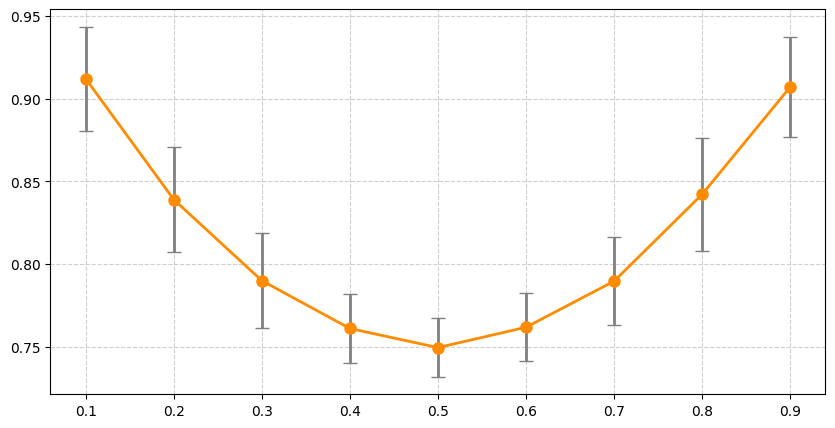

In [38]:
avg_homogeneity = [np.mean([features[2] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_homogeneity = [np.std([features[2] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_homogeneity, yerr=std_homogeneity, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

See samples under Inverse difference moment.

## Information measure of correlation 1

$$ \displaystyle\frac{HXY-HXY1}{\max\{HX,HY\}} $$



(pyradimocis)

IMC1 assesses the correlation between the probability distributions of $i$
and $j$
(quantifying the complexity of the texture), using mutual information $I(x,y)$:

\begin{align*}
I(i,j)
&= \sum_{i=1}^{N_g} \sum_{j=1}^{N_g} p(i,j)\log_2\!\left(\frac{p(i,j)}{p_x(i)p_y(j)}\right) \\
&= \sum_{i=1}^{N_g} \sum_{j=1}^{N_g} p(i,j)
\left(\log_2\!\big(p(i,j)\big) - \log_2\!\big(p_x(i)p_y(j)\big)\right) \\
&= \sum_{i=1}^{N_g} \sum_{j=1}^{N_g} p(i,j)\log_2\!\big(p(i,j)\big)
- \sum_{i=1}^{N_g} \sum_{j=1}^{N_g} p(i,j)\log_2\!\big(p_x(i)p_y(j)\big) \\
&= -H_{XY} + H_{XY1}.
\end{align*}

However, in this formula, the numerator is defined as $H_{XY} - H_{XY1}$
(i.e.\ $-I(x,y)$),
and is therefore $\le 0$.
This reflects how this feature is defined in the original Haralick paper.

In the case where the distributions are independent, there is no mutual information
and the result will therefore be $0$.
In the case of uniform distribution with complete dependence, mutual information
will be equal to $\log_2(N_g)$.

Finally, $H_{XY} - H_{XY1}$
is divided by the maximum of the 2 marginal entropies, where in the latter case
of complete dependence (not necessarily uniform; low complexity) it will result
in $\mathrm{IMC1} = -1$,
as $H_X = H_Y = I(i,j)$.

In the case where both HX and HY are 0 (as is the case in a flat region), an arbitrary value of 0 is returned to prevent a division by 0. This is done on a per-angle basis (i.e. prior to any averaging)

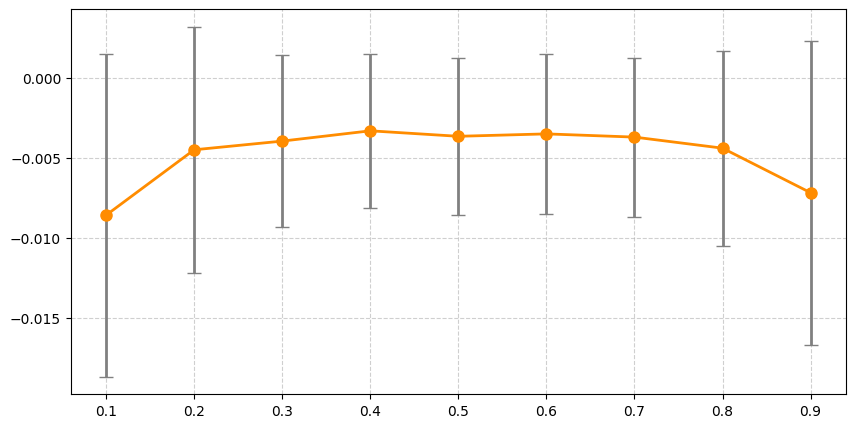

In [39]:
avg_imc1 = [np.mean([features[15] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_imc1 = [np.std([features[15] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_imc1, yerr=std_imc1, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Below we compare samples that produced 5 of the lowest, middle, and highest values of IMC1. We focus on random settings between 0.4 and 0.6 to avoid redundancy.

In [110]:
df_imc1 = df[(df['p'] == 0.4) | (df['p'] == 0.5) | (df['p'] == 0.6)
            ].sort_values(by=["imc1"])[['imc1', 'glcm', 'image']]

df_imc1

imc1                                               glcm  \
0.4_261 -4.046678e-02  [[0.34285714285714286, 0.1761904761904762], [0...   
0.5_5   -3.971853e-02  [[0.26666666666666666, 0.20476190476190476], [...   
0.4_98  -3.749234e-02  [[0.37142857142857144, 0.18571428571428572], [...   
0.5_366 -3.526319e-02  [[0.2523809523809524, 0.18095238095238095], [0...   
0.6_59  -3.128892e-02  [[0.15714285714285714, 0.20952380952380953], [...   
...               ...                                                ...   
0.4_41  -2.495736e-08  [[0.3238095238095238, 0.23809523809523808], [0...   
0.5_333 -2.375050e-08  [[0.2571428571428571, 0.24761904761904763], [0...   
0.5_461  0.000000e+00  [[0.2571428571428571, 0.24285714285714285], [0...   
0.5_14   0.000000e+00  [[0.3238095238095238, 0.24285714285714285], [0...   
0.4_356  0.000000e+00  [[0.44761904761904764, 0.21904761904761905], [...   

                                                     image  
0.4_261  [[1, 0, 1, 0, 0, 1, 1, 1], [1, 1, 1, 1, 1, 1, ...  
0.5_5    [[1, 0, 1, 0, 1, 0, 1, 1], [1, 1, 1, 1, 1, 1, ...  
0.4_98   [[1, 0, 0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 1, 0, ...  
0.5_366  [[0, 0, 1, 1, 1, 1, 1, 0], [0, 0, 0, 1, 1, 1, ...  
0.6_59   [[1, 0, 0, 0, 0, 1, 0, 0], [1, 1, 1, 0, 1, 0, ...  
...                                                    ...  
0.4_41   [[1, 1, 0, 1, 0, 0, 1, 1], [0, 0, 1, 0, 0, 1, ...  
0.5_333  [[0, 0, 0, 0, 1, 1, 1, 1], [0, 1, 1, 1, 0, 1, ...  
0.5_461  [[1, 1, 0, 0, 1, 1, 0, 0], [0, 1, 1, 0, 1, 1, ...  
0.5_14   [[1, 1, 0, 0, 1, 0, 1, 0], [1, 1, 0, 0, 1, 0, ...  
0.4_356  [[1, 1, 0, 0, 0, 0, 0, 1], [1, 0, 1, 1, 0, 0, ...  

[1500 rows x 3 columns]

In [111]:
mid_idx = len(df_imc1) // 2
start = max(0, mid_idx - (5 // 2))
end = start + 5

df_middle_5 = df_imc1.iloc[start:end]
df_middle_5

imc1                                               glcm  \
0.5_336 -0.001643  [[0.23333333333333334, 0.2619047619047619], [0...   
0.5_271 -0.001643  [[0.2619047619047619, 0.23333333333333334], [0...   
0.5_288 -0.001642  [[0.2523809523809524, 0.2761904761904762], [0....   
0.4_69  -0.001640  [[0.35714285714285715, 0.26666666666666666], [...   
0.4_139 -0.001634  [[0.5, 0.18095238095238095], [0.24761904761904...   

                                                     image  
0.5_336  [[0, 1, 1, 1, 1, 1, 0, 0], [1, 0, 0, 1, 1, 1, ...  
0.5_271  [[1, 1, 1, 1, 0, 0, 0, 1], [1, 0, 1, 0, 0, 0, ...  
0.5_288  [[0, 0, 1, 1, 0, 0, 0, 1], [1, 1, 1, 0, 0, 1, ...  
0.4_69   [[0, 1, 0, 0, 0, 0, 0, 1], [1, 1, 0, 1, 0, 1, ...  
0.4_139  [[0, 1, 1, 1, 0, 1, 1, 1], [0, 0, 0, 0, 0, 0, ...

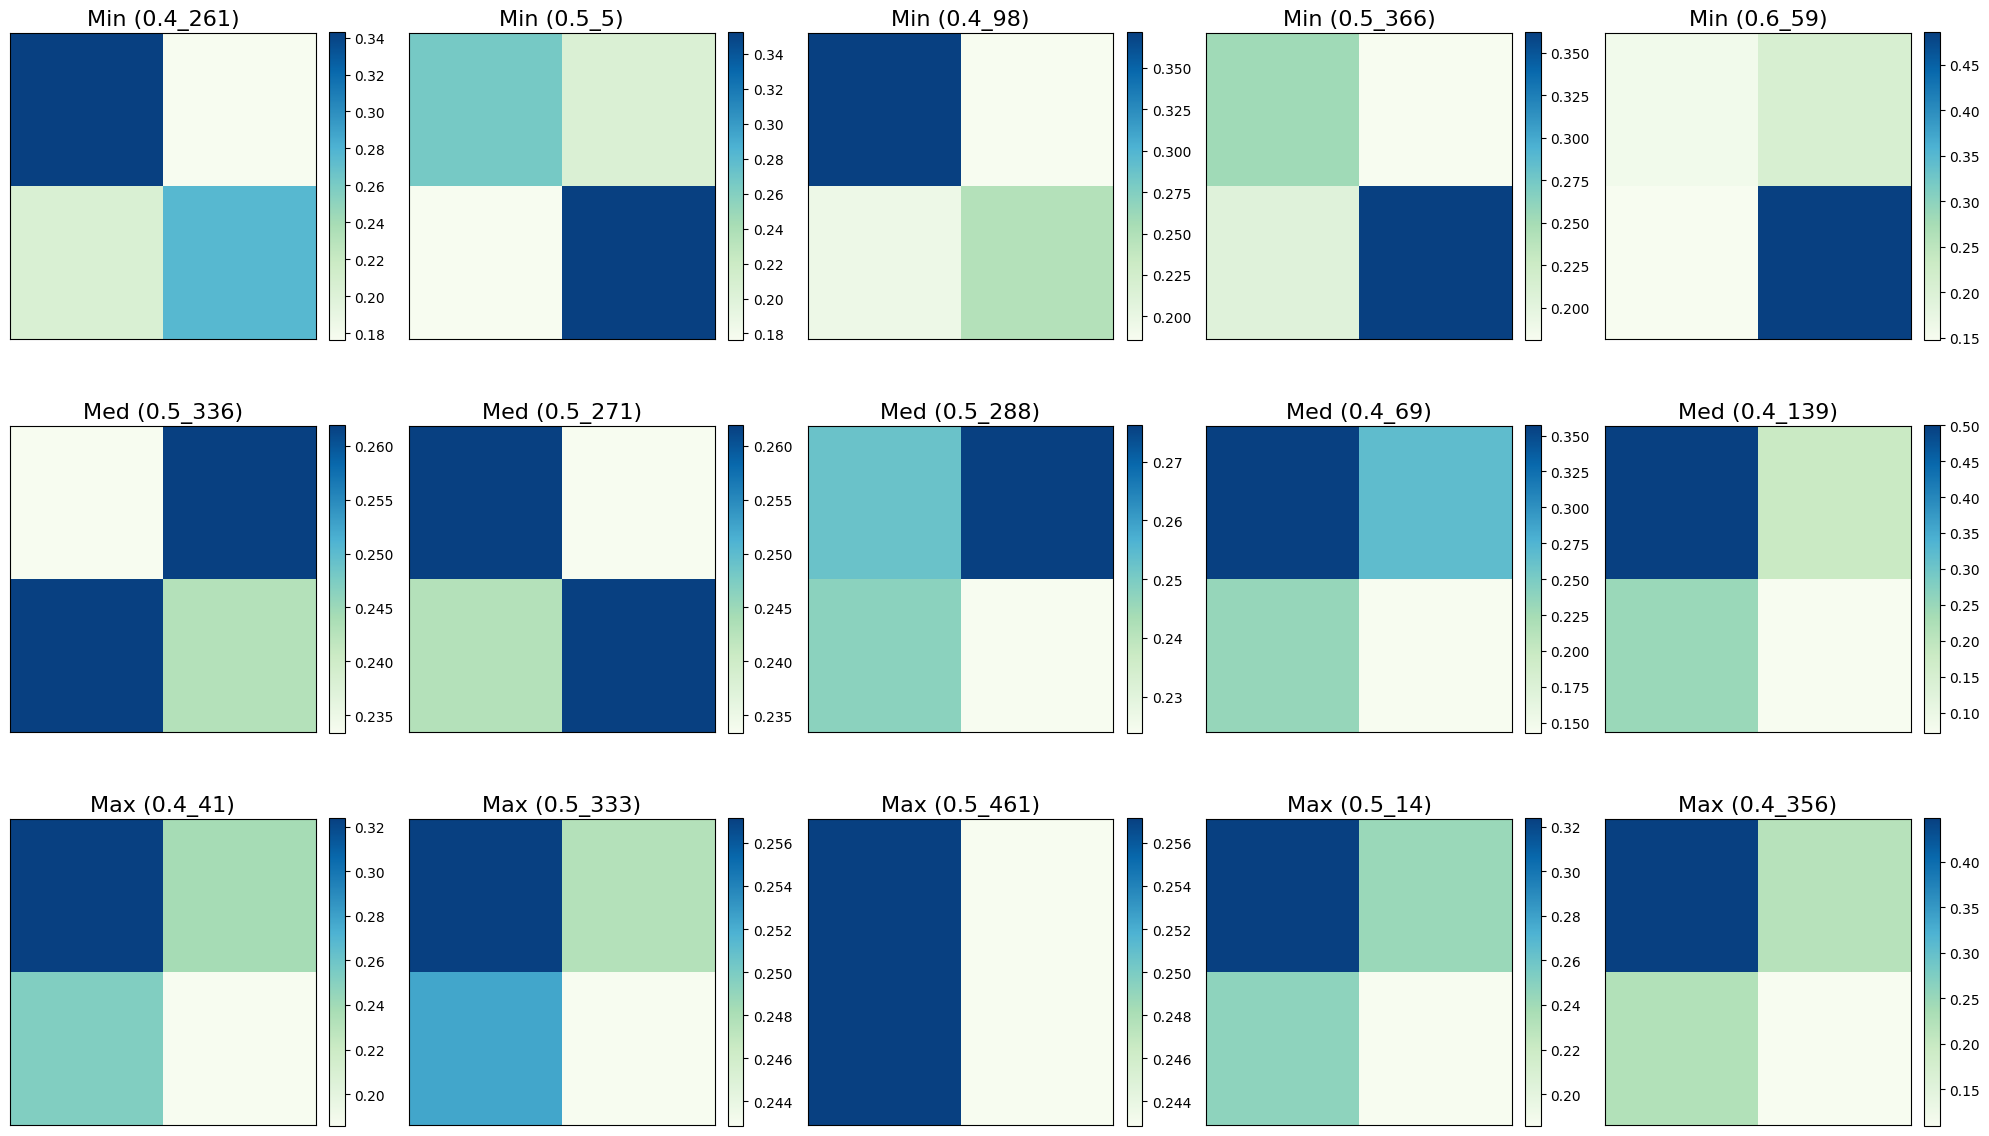

In [135]:
imc1_keys = [
    '0.4_261', '0.5_5', '0.4_98', '0.5_366', '0.6_59', 
    '0.5_336', '0.5_271', '0.5_288', '0.4_69', '0.4_139',   
    '0.4_41', '0.5_333', '0.5_461', '0.5_14', '0.4_356'  
]

imc1_titles = [
    'Min', 'Min', 'Min', 'Min', 'Min',
    'Med', 'Med', 'Med', 'Med', 'Med', 
    'Max', 'Max', 'Max', 'Max', 'Max'
]

fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.flatten() 

for i in range(15):
    ax = axes[i]
    key = imc1_keys[i]
    
    im = ax.imshow(df['glcm'][key], cmap='GnBu')
    ax.set_title(f'{imc1_titles[i]} ({imc1_keys[i]})', fontsize=16)
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

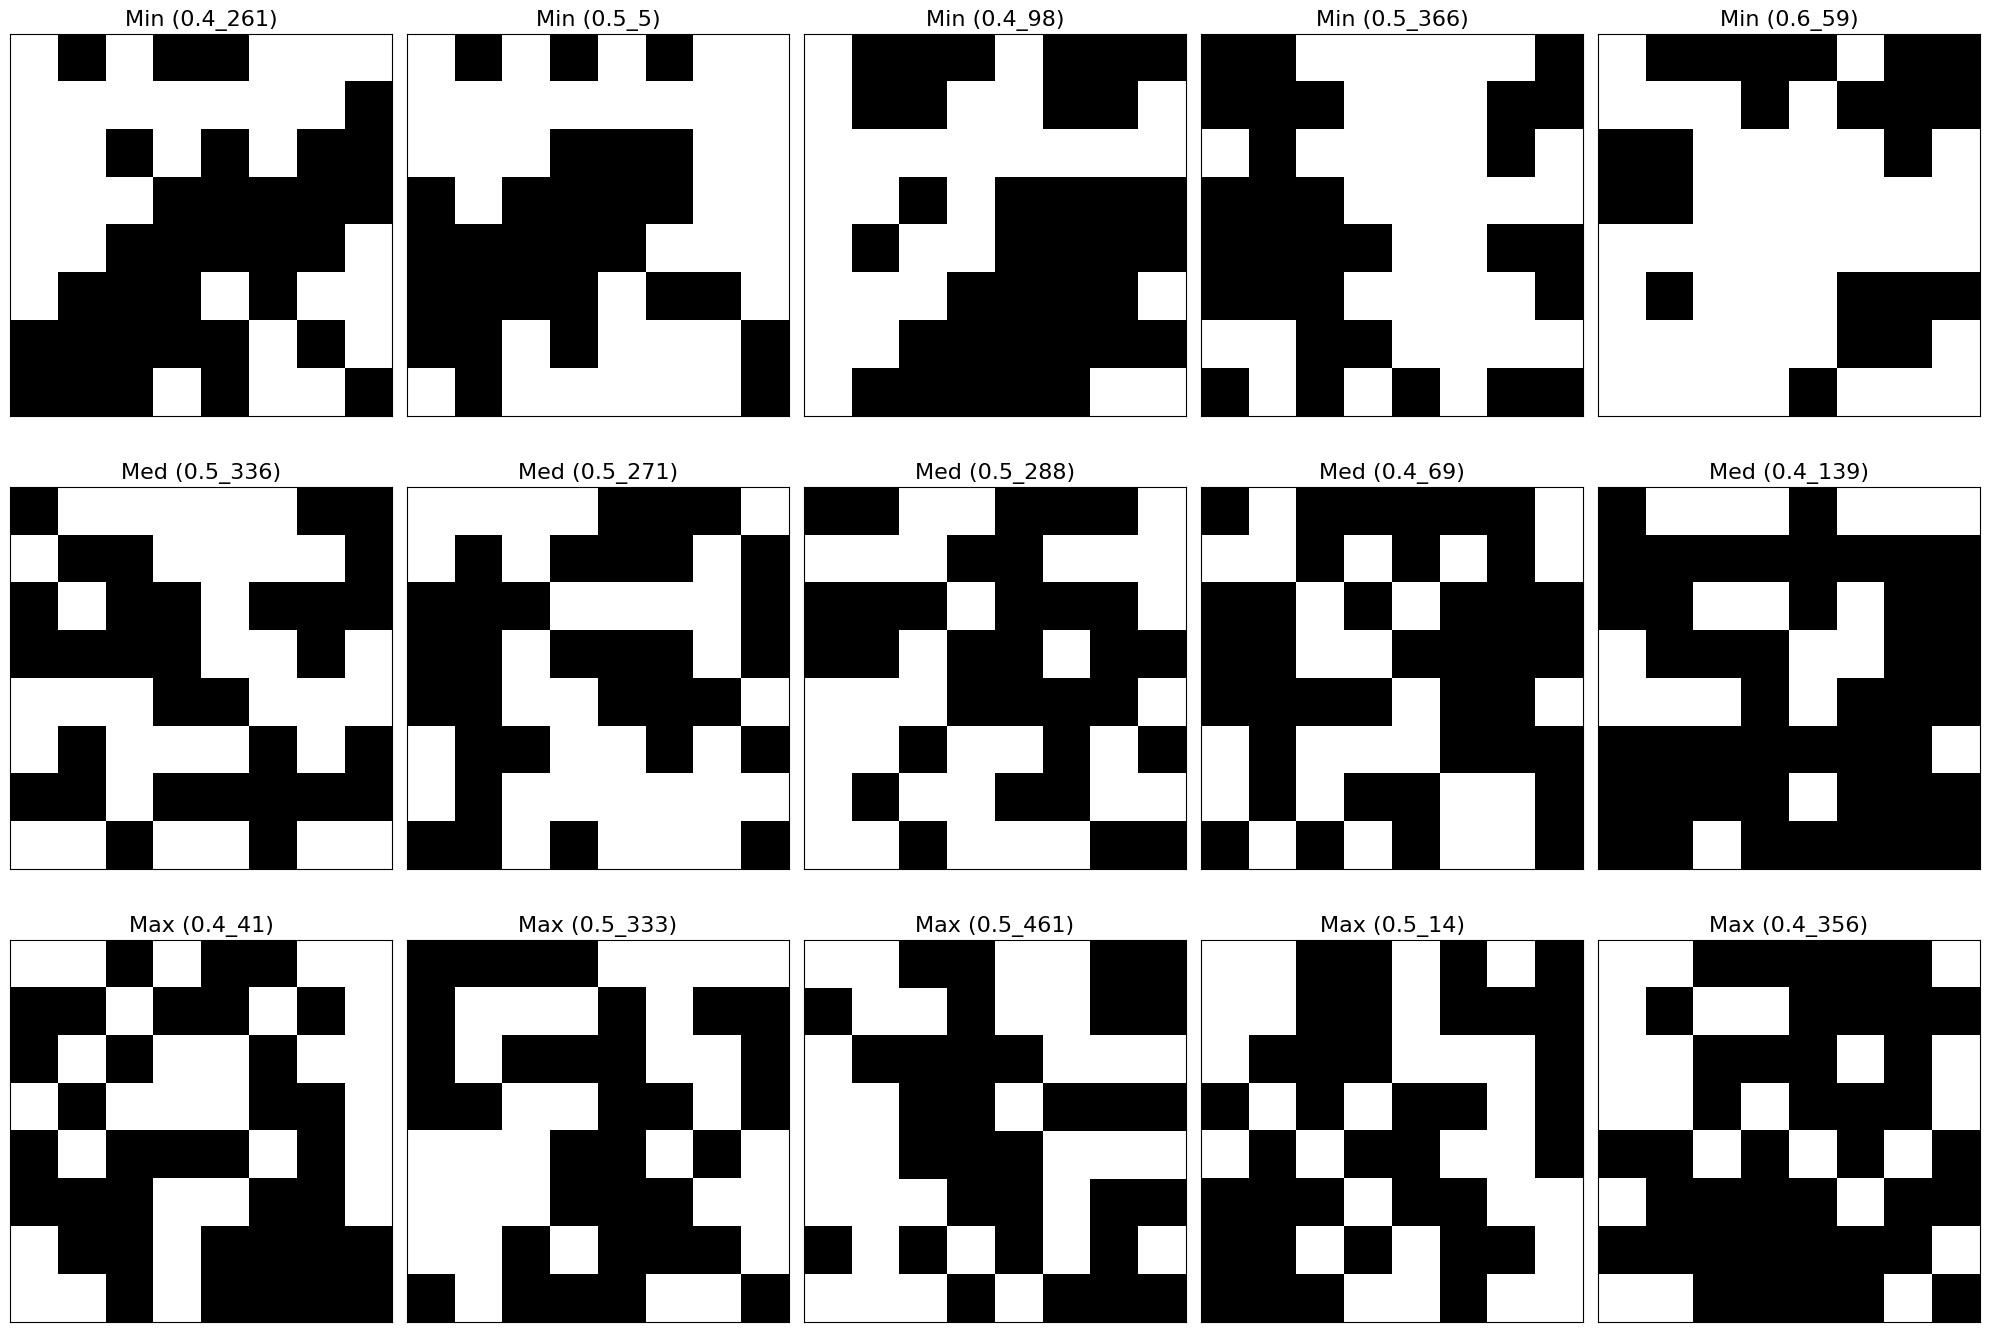

In [136]:
fig, axes = plt.subplots(3, 5, figsize=(20, 14))
axes = axes.flatten() 

for i in range(15):
    ax = axes[i]
    key = imc1_keys[i]
    
    im = ax.imshow(df['image'][key], cmap='gray')
    ax.set_title(f'{imc1_titles[i]} ({imc1_keys[i]})', fontsize=16)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

## Information measure of correlation 2

$$ \displaystyle\sqrt{1-e^{-2(HXY2-HXY)}} $$

(pyradiomics)

IMC2 also assesses the correlation between the probability distributions of $i$
and $j$
(quantifying the complexity of the texture).
Of interest is to note that $H_{XY1} = H_{XY2}$
and that $H_{XY2} - H_{XY} \ge 0$
represents the mutual information of the 2 distributions.
Therefore, the range of $\mathrm{IMC2} = [0,1)$,
with $0$ representing the case of 2 independent distributions
(no mutual information)
and the maximum value representing the case of 2 fully dependent
and uniform distributions
(maximal mutual information, equal to $\log_2(N_g)$).
In this latter case, the maximum value is then equal to
\[
1 - \sqrt{e^{-2\log_2(N_g)}},
\]
approaching $1$.

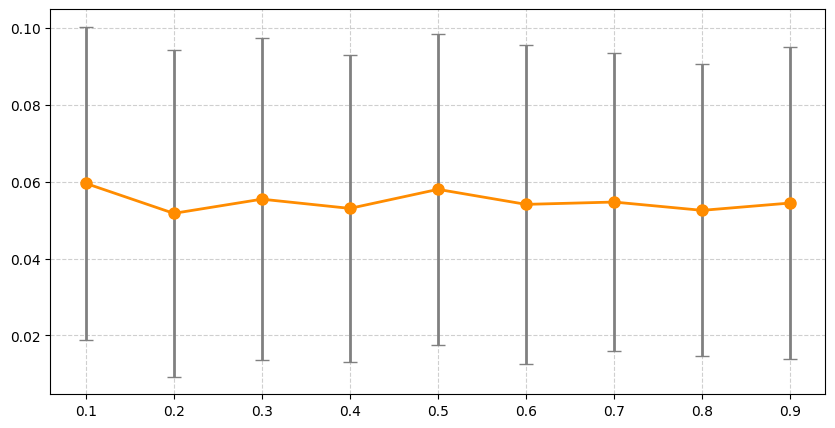

In [40]:
avg_imc2 = [np.mean([features[16] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_imc2 = [np.std([features[16] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_imc2, yerr=std_imc2, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Below we compare samples that produced 5 of the lowest, middle, and highest values of IMC2. We focus on random settings between 0.4 and 0.6 to avoid redundancy.

In [106]:
df_imc2 = df[(df['p'] == 0.4) | (df['p'] == 0.5) | (df['p'] == 0.6)
            ].sort_values(by=["imc2"])[['imc2', 'glcm', 'image']]

df_imc2

imc2                                               glcm  \
0.4_356  0.000000  [[0.44761904761904764, 0.21904761904761905], [...   
0.5_461  0.000000  [[0.2571428571428571, 0.24285714285714285], [0...   
0.5_14   0.000000  [[0.3238095238095238, 0.24285714285714285], [0...   
0.5_333  0.000181  [[0.2571428571428571, 0.24761904761904763], [0...   
0.4_372  0.000185  [[0.3238095238095238, 0.23809523809523808], [0...   
...           ...                                                ...   
0.6_59   0.200722  [[0.15714285714285714, 0.20952380952380953], [...   
0.5_366  0.217859  [[0.2523809523809524, 0.18095238095238095], [0...   
0.4_98   0.224013  [[0.37142857142857144, 0.18571428571428572], [...   
0.5_5    0.231193  [[0.26666666666666666, 0.20476190476190476], [...   
0.4_261  0.233450  [[0.34285714285714286, 0.1761904761904762], [0...   

                                                     image  
0.4_356  [[1, 1, 0, 0, 0, 0, 0, 1], [1, 0, 1, 1, 0, 0, ...  
0.5_461  [[1, 1, 0, 0, 1, 1, 0, 0], [0, 1, 1, 0, 1, 1, ...  
0.5_14   [[1, 1, 0, 0, 1, 0, 1, 0], [1, 1, 0, 0, 1, 0, ...  
0.5_333  [[0, 0, 0, 0, 1, 1, 1, 1], [0, 1, 1, 1, 0, 1, ...  
0.4_372  [[0, 0, 0, 0, 1, 1, 1, 0], [1, 0, 1, 0, 0, 1, ...  
...                                                    ...  
0.6_59   [[1, 0, 0, 0, 0, 1, 0, 0], [1, 1, 1, 0, 1, 0, ...  
0.5_366  [[0, 0, 1, 1, 1, 1, 1, 0], [0, 0, 0, 1, 1, 1, ...  
0.4_98   [[1, 0, 0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 1, 0, ...  
0.5_5    [[1, 0, 1, 0, 1, 0, 1, 1], [1, 1, 1, 1, 1, 1, ...  
0.4_261  [[1, 0, 1, 0, 0, 1, 1, 1], [1, 1, 1, 1, 1, 1, ...  

[1500 rows x 3 columns]

In [107]:
mid_idx = len(df_imc2) // 2
start = max(0, mid_idx - (5 // 2))
end = start + 5

df_middle_5 = df_imc2.iloc[start:end]
df_middle_5

imc2                                               glcm  \
0.4_458  0.046842  [[0.319047619047619, 0.21904761904761905], [0....   
0.4_307  0.046984  [[0.4238095238095238, 0.20952380952380953], [0...   
0.6_48   0.047073  [[0.2523809523809524, 0.28095238095238095], [0...   
0.4_69   0.047080  [[0.35714285714285715, 0.26666666666666666], [...   
0.6_391  0.047201  [[0.12857142857142856, 0.23333333333333334], [...   

                                                     image  
0.4_458  [[0, 0, 1, 0, 1, 1, 1, 1], [0, 1, 1, 0, 0, 1, ...  
0.4_307  [[1, 0, 1, 1, 0, 1, 1, 0], [1, 0, 0, 0, 1, 0, ...  
0.6_48   [[0, 1, 1, 0, 1, 0, 0, 0], [0, 1, 1, 1, 1, 0, ...  
0.4_69   [[0, 1, 0, 0, 0, 0, 0, 1], [1, 1, 0, 1, 0, 1, ...  
0.6_391  [[1, 1, 1, 1, 0, 0, 1, 1], [1, 1, 0, 1, 1, 1, ...

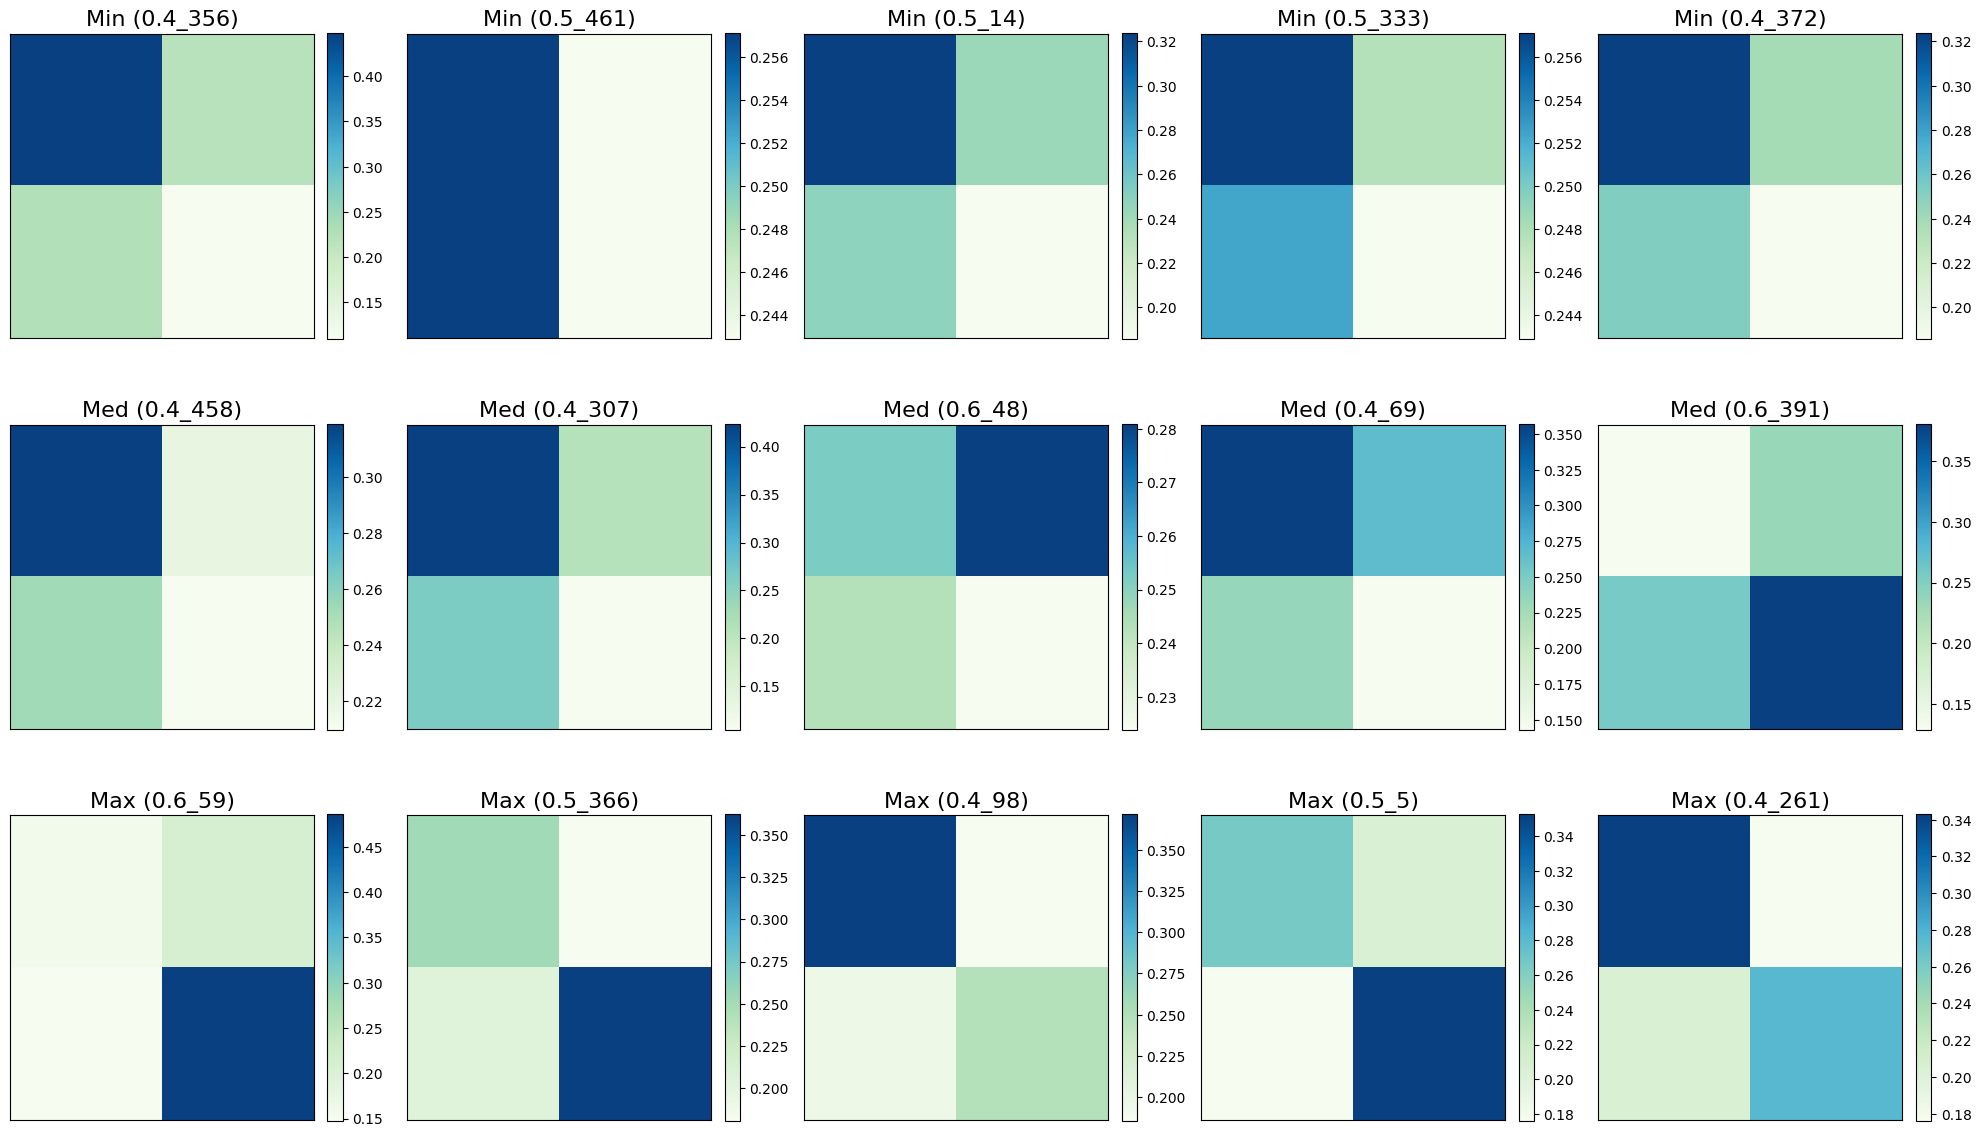

In [137]:
imc2_keys = [
    '0.4_356', '0.5_461', '0.5_14', '0.5_333', '0.4_372', 
    '0.4_458', '0.4_307', '0.6_48', '0.4_69', '0.6_391',   
    '0.6_59', '0.5_366', '0.4_98', '0.5_5', '0.4_261'  
]

imc2_titles = [
    'Min', 'Min', 'Min', 'Min', 'Min',
    'Med', 'Med', 'Med', 'Med', 'Med', 
    'Max', 'Max', 'Max', 'Max', 'Max'
]

fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.flatten() 

for i in range(15):
    ax = axes[i]
    key = imc2_keys[i]
    
    im = ax.imshow(df['glcm'][key], cmap='GnBu')
    ax.set_title(f'{imc2_titles[i]} ({imc2_keys[i]})', fontsize=16)
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

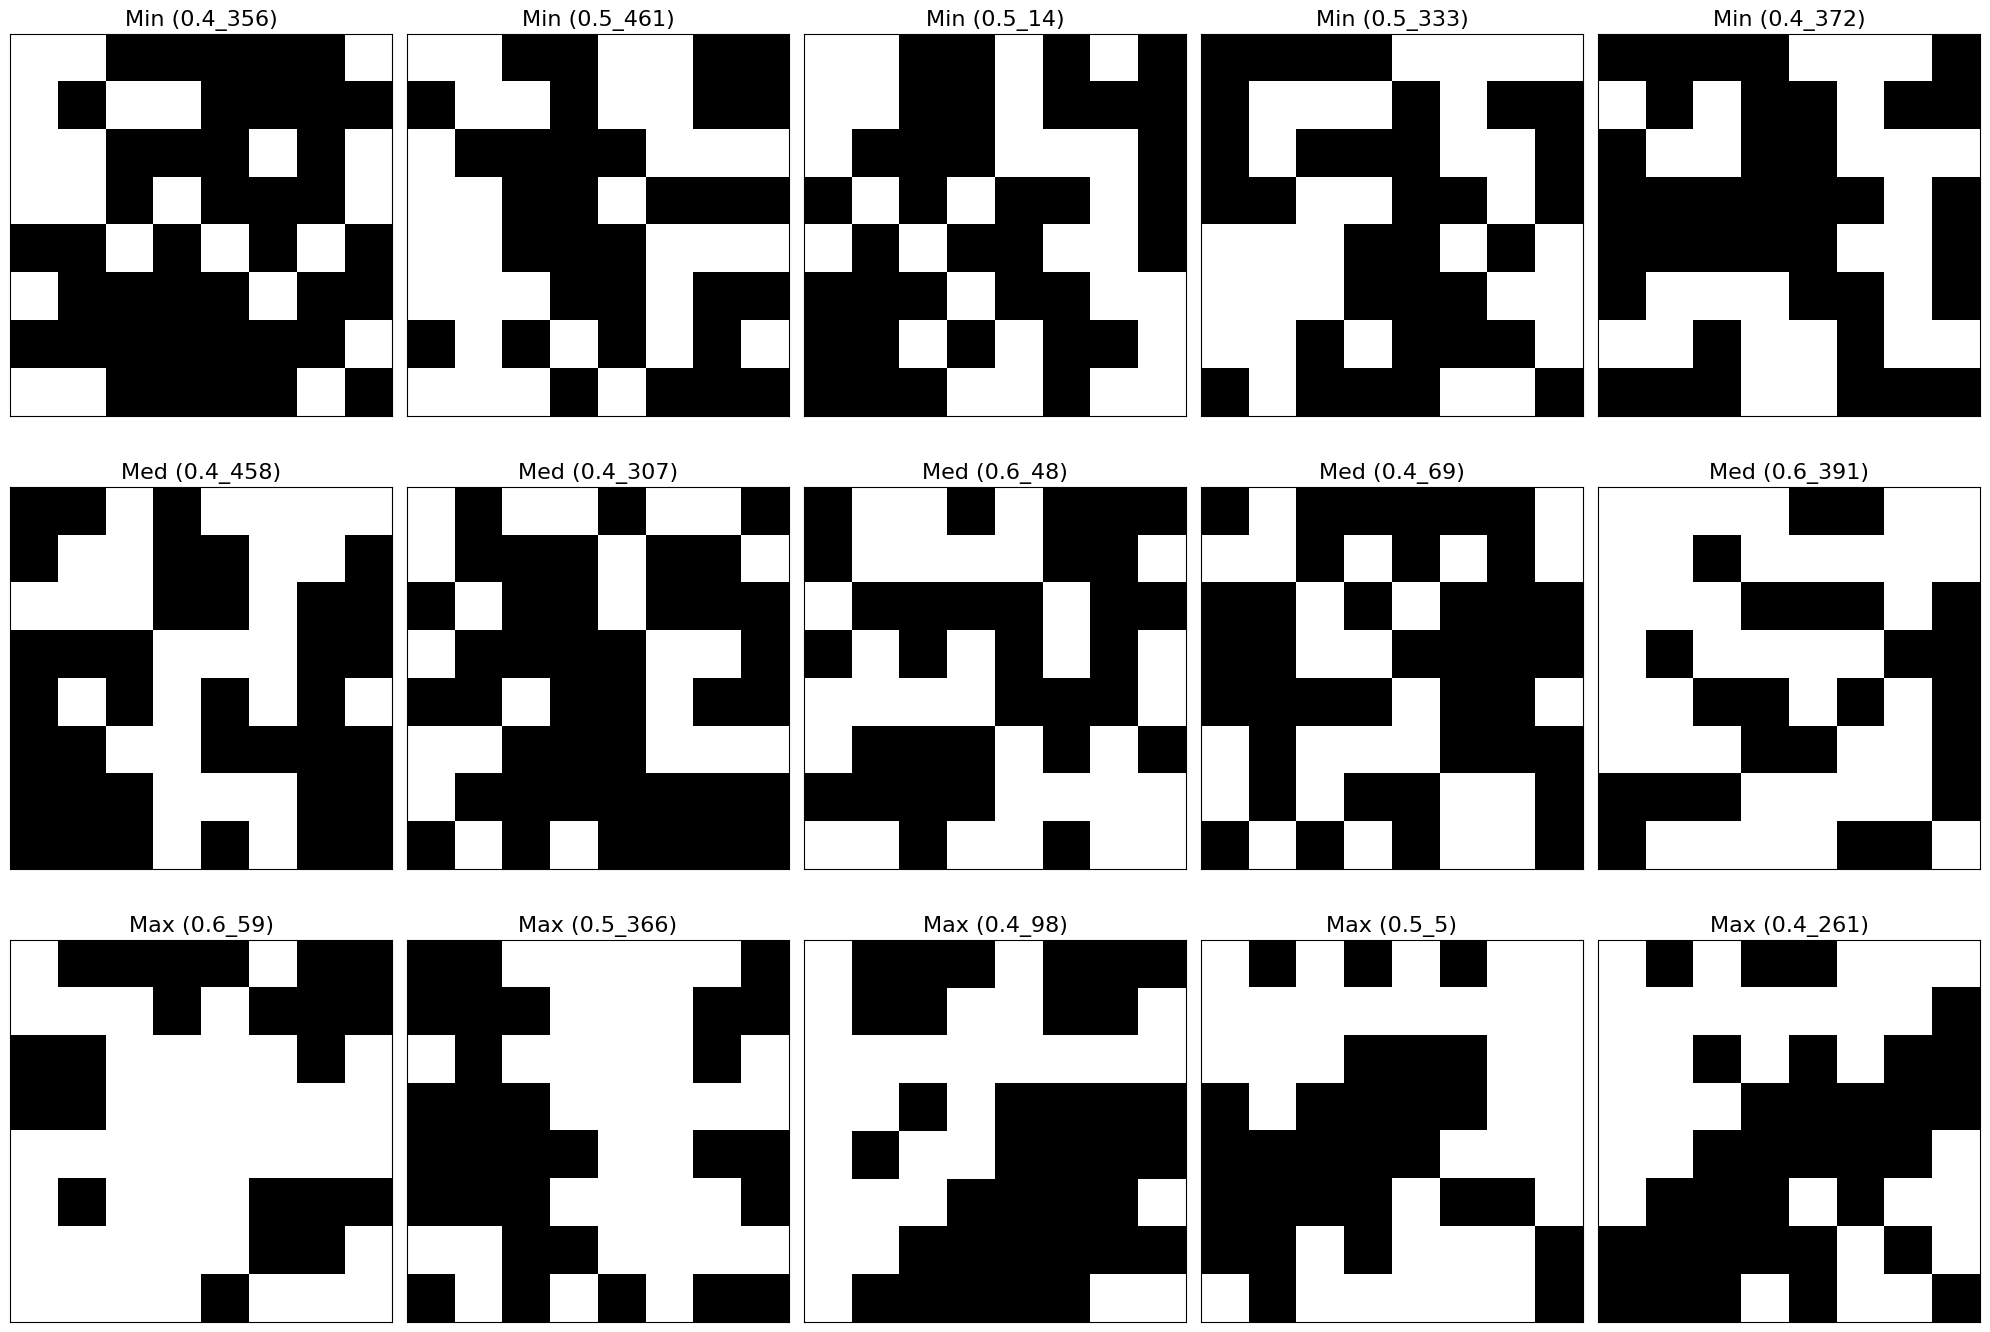

In [138]:
fig, axes = plt.subplots(3, 5, figsize=(20, 14))
axes = axes.flatten() 

for i in range(15):
    ax = axes[i]
    key = imc2_keys[i]
    
    im = ax.imshow(df['image'][key], cmap='gray')
    ax.set_title(f'{imc2_titles[i]} ({imc2_keys[i]})', fontsize=16)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

## Inverse difference

$$ \sum_{i=1}^{N} \sum_{j=1}^{N} \frac{p(i, j)}{1 + |i - j|} $$


Compared to Inverse difference moment, the denominator grows linearly rather than quadratically, Inverse difference doesn't nullify off-diagonal probabilities as quickly. This results in a feature that maintains a higher value even in the presence of low-level noise.

* Inverse difference (a.k.a. Homogeneity 1) is another measure of the local homogeneity of an image. With more uniform gray levels, the denominator will remain low, resulting in a higher overall value. (pyradiomics)

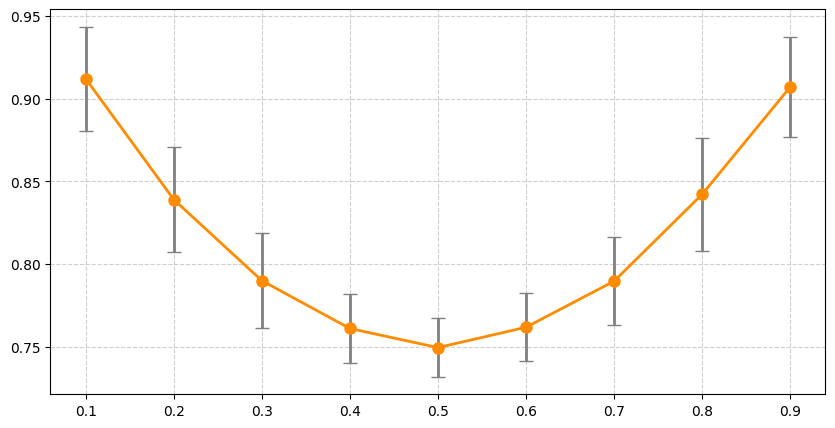

In [42]:
avg_inverse_difference = [np.mean([features[12] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_inverse_difference = [np.std([features[12] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_inverse_difference, yerr=std_inverse_difference, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Below we compare samples that produced 5 of the lowest, middle, and highest values of Inverse difference. We focus on random settings between 0.4 and 0.6 to avoid redundancy.

In [104]:
df_inverse_difference = df[(df['p'] == 0.4) | (df['p'] == 0.5) | (df['p'] == 0.6)
            ].sort_values(by=["inverse_difference"])[['inverse_difference', 'glcm', 'image']]

df_inverse_difference

inverse_difference  \
0.5_2              0.707143   
0.4_315            0.707143   
0.5_257            0.709524   
0.5_259            0.711905   
0.6_182            0.711905   
...                     ...   
0.6_163            0.826190   
0.4_311            0.828571   
0.6_455            0.830952   
0.4_7              0.830952   
0.6_45             0.833333   

                                                      glcm  \
0.5_2    [[0.21428571428571427, 0.3], [0.28571428571428...   
0.4_315  [[0.22380952380952382, 0.30952380952380953], [...   
0.5_257  [[0.22380952380952382, 0.2761904761904762], [0...   
0.5_259  [[0.20476190476190476, 0.2904761904761905], [0...   
0.6_182  [[0.1619047619047619, 0.3047619047619048], [0....   
...                                                    ...   
0.6_163  [[0.014285714285714285, 0.18571428571428572], ...   
0.4_311  [[0.5857142857142857, 0.1619047619047619], [0....   
0.6_455  [[0.06190476190476191, 0.15714285714285714], [...   
0.4_7    [[0.6142857142857143, 0.1761904761904762], [0....   
0.6_45   [[0.09523809523809523, 0.1761904761904762], [0...   

                                                     image  
0.5_2    [[0, 1, 0, 1, 0, 1, 0, 0], [0, 1, 0, 1, 0, 0, ...  
0.4_315  [[0, 1, 0, 0, 0, 0, 1, 0], [0, 0, 1, 1, 0, 1, ...  
0.5_257  [[0, 1, 0, 1, 0, 0, 1, 0], [1, 1, 0, 0, 1, 0, ...  
0.5_259  [[0, 0, 0, 1, 0, 0, 1, 1], [1, 1, 1, 1, 1, 0, ...  
0.6_182  [[0, 0, 0, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, ...  
...                                                    ...  
0.6_163  [[1, 1, 1, 0, 1, 1, 1, 0], [0, 0, 1, 1, 1, 1, ...  
0.4_311  [[1, 0, 0, 0, 0, 1, 0, 0], [1, 1, 1, 0, 0, 0, ...  
0.6_455  [[1, 1, 1, 1, 0, 1, 1, 1], [1, 1, 1, 0, 1, 1, ...  
0.4_7    [[1, 0, 0, 0, 0, 0, 0, 1], [1, 1, 0, 1, 0, 0, ...  
0.6_45   [[1, 1, 1, 1, 0, 0, 0, 0], [1, 1, 0, 0, 1, 0, ...  

[1500 rows x 3 columns]

In [105]:
mid_idx = len(df_inverse_difference) // 2
start = max(0, mid_idx - (5 // 2))
end = start + 5

df_middle_5 = df_inverse_difference.iloc[start:end]
df_middle_5

inverse_difference  \
0.6_141            0.754762   
0.5_12             0.754762   
0.6_180            0.754762   
0.6_22             0.754762   
0.6_128            0.754762   

                                                      glcm  \
0.6_141  [[0.11904761904761904, 0.24761904761904763], [...   
0.5_12   [[0.3380952380952381, 0.23333333333333334], [0...   
0.6_180  [[0.16666666666666666, 0.2571428571428571], [0...   
0.6_22   [[0.09523809523809523, 0.26666666666666666], [...   
0.6_128  [[0.1619047619047619, 0.26666666666666666], [0...   

                                                     image  
0.6_141  [[0, 0, 1, 0, 0, 1, 1, 1], [0, 1, 1, 0, 1, 1, ...  
0.5_12   [[0, 1, 1, 1, 1, 1, 0, 0], [1, 0, 0, 1, 0, 0, ...  
0.6_180  [[0, 1, 1, 1, 0, 0, 0, 0], [0, 1, 1, 0, 0, 1, ...  
0.6_22   [[1, 0, 0, 1, 1, 0, 0, 1], [0, 1, 1, 1, 0, 1, ...  
0.6_128  [[0, 0, 0, 0, 0, 1, 0, 0], [1, 0, 0, 1, 1, 0, ...

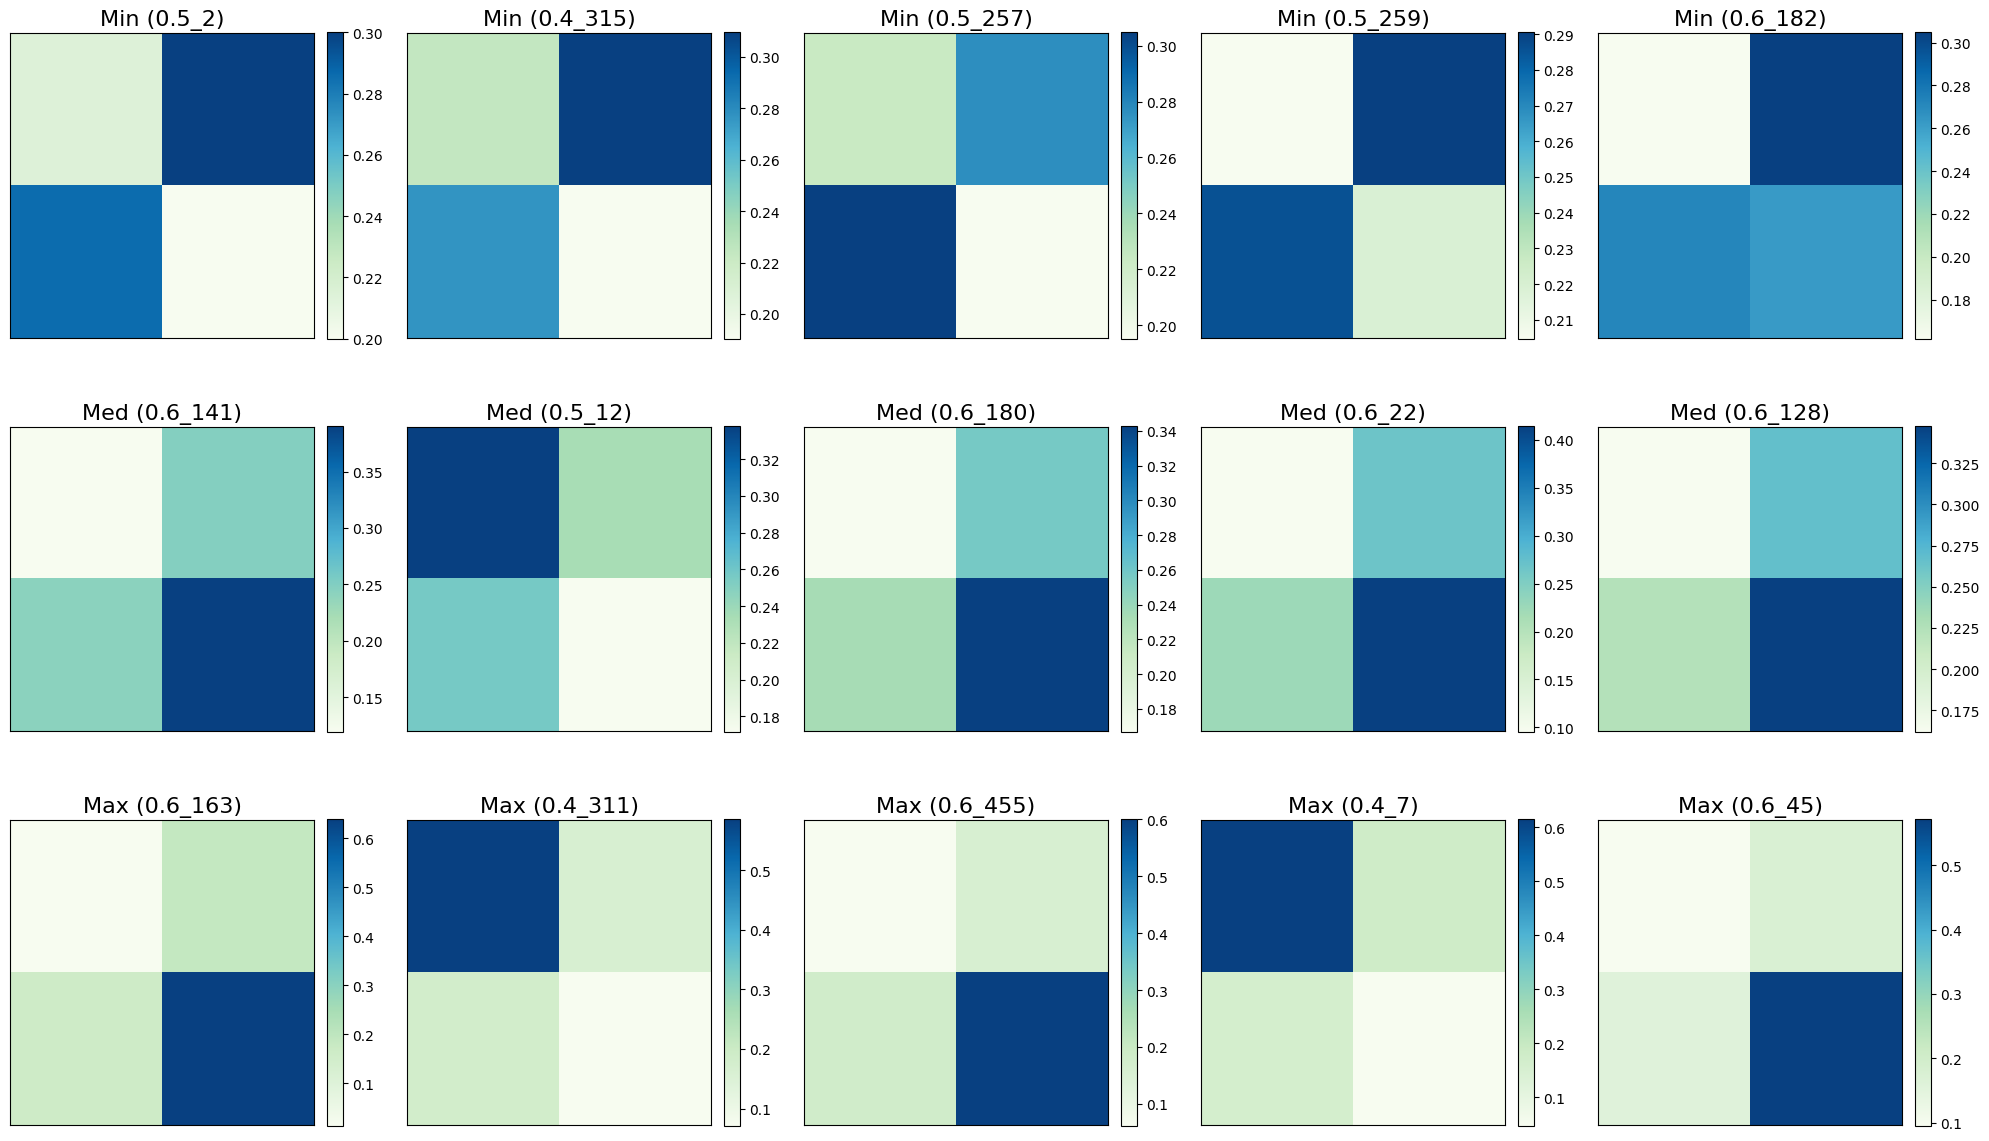

In [139]:
inverse_difference_keys = [
    '0.5_2', '0.4_315', '0.5_257', '0.5_259', '0.6_182', 
    '0.6_141', '0.5_12', '0.6_180', '0.6_22', '0.6_128',   
    '0.6_163', '0.4_311', '0.6_455', '0.4_7', '0.6_45'  
]

inverse_difference_titles = [
    'Min', 'Min', 'Min', 'Min', 'Min',
    'Med', 'Med', 'Med', 'Med', 'Med', 
    'Max', 'Max', 'Max', 'Max', 'Max'
]

fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.flatten() 

for i in range(15):
    ax = axes[i]
    key = inverse_difference_keys[i]
    
    im = ax.imshow(df['glcm'][key], cmap='GnBu')
    ax.set_title(f'{inverse_difference_titles[i]} ({inverse_difference_keys[i]})', fontsize=16)
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

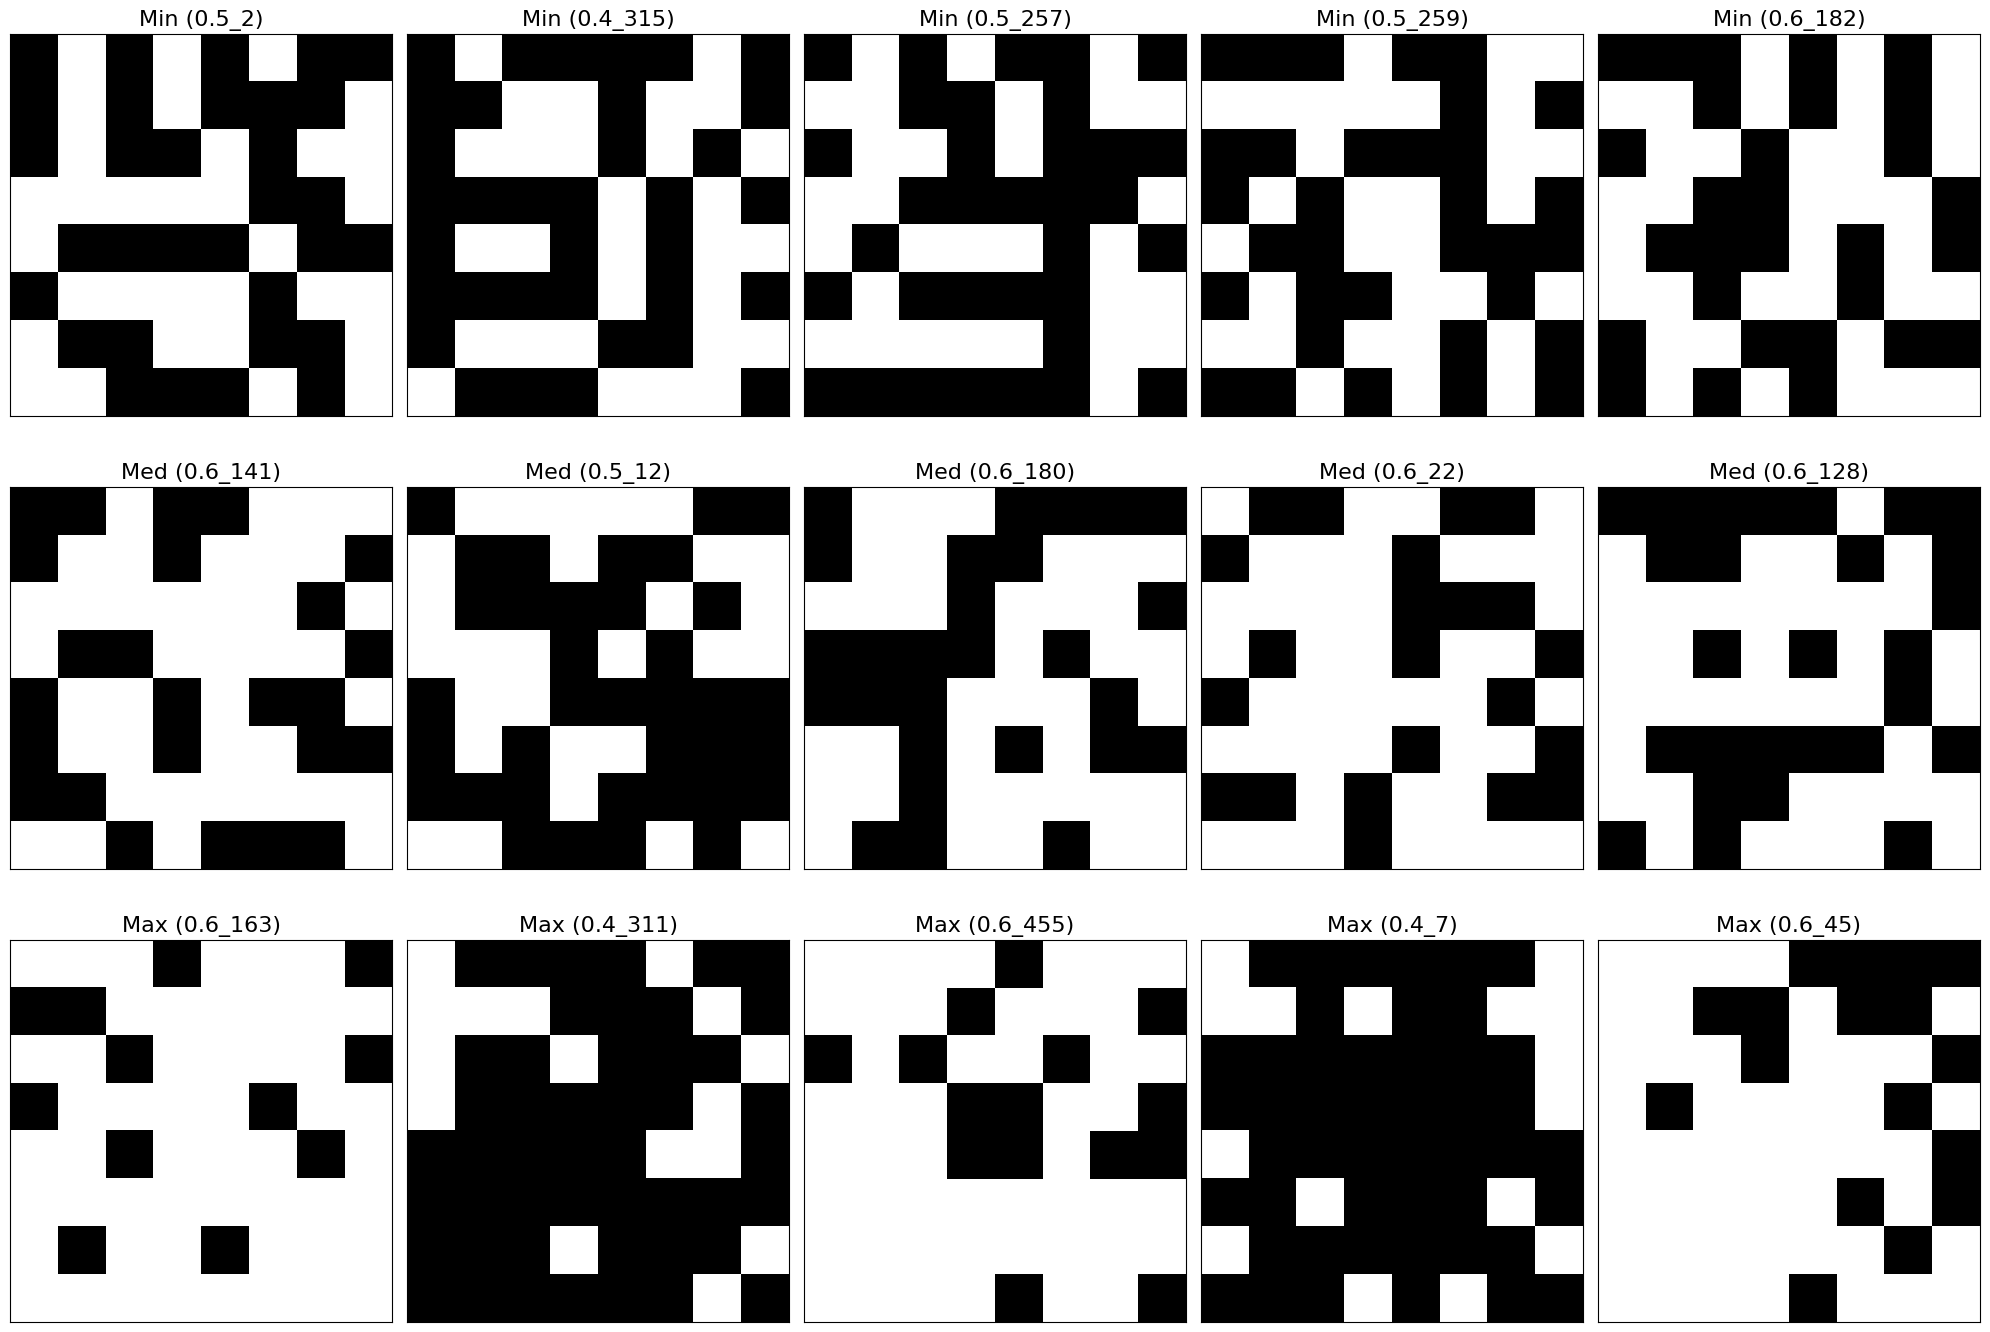

In [140]:
fig, axes = plt.subplots(3, 5, figsize=(20, 14))
axes = axes.flatten() 

for i in range(15):
    ax = axes[i]
    key = inverse_difference_keys[i]
    
    im = ax.imshow(df['image'][key], cmap='gray')
    ax.set_title(f'{inverse_difference_titles[i]} ({inverse_difference_keys[i]})', fontsize=16)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

## Inverse Difference Moment

$$ \sum_{i=1}^{N} \sum_{j=1}^{N} \frac{p(i, j)}{1 + |i - j|^2} $$

The denominator term, $1 + (i - j)^2$, acts as a "penalty function" that is minimized when $i = j$ (the diagonal entries). Wherever pixel intensities are nearly identical, $i - j \approx 0$, the weights approach $1$, and the feature value approaches its global maximum of $1$. Conversely, as the gradients $(i - j)$ increase, the denominator grows quadratically, rapidly attenuating the contribution of those entries to the total sum.

A GLCM with high homogeneity is one where the probability mass is tightly clustered around the identity line ($i = j$); signifying that, in an image, a pixel's neighbor is highly likely to share the same gray level.

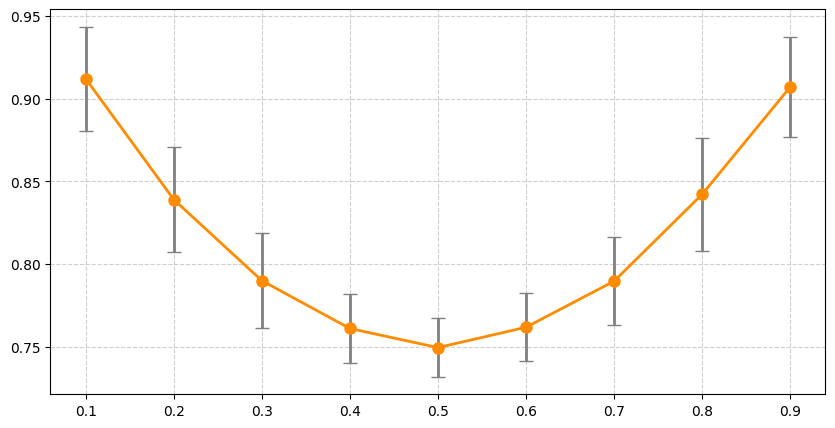

In [44]:
avg_inverse_difference_m = [np.mean([features[13] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_inverse_difference_m = [np.std([features[13] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_inverse_difference_m, yerr=std_inverse_difference_m, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Below we compare samples that produced 5 of the lowest, middle, and highest values of Inverse difference moment. We focus on random settings between 0.4 and 0.6 to avoid redundancy.

In [101]:
df_inverse_difference_moment = df[(df['p'] == 0.4) | (df['p'] == 0.5) | (df['p'] == 0.6)
            ].sort_values(by=["inverse_difference_moment"])[['inverse_difference_moment', 'glcm', 'image']]

df_inverse_difference_moment

inverse_difference_moment  \
0.5_2                     0.707143   
0.4_315                   0.707143   
0.5_257                   0.709524   
0.5_259                   0.711905   
0.6_182                   0.711905   
...                            ...   
0.6_163                   0.826190   
0.4_311                   0.828571   
0.6_455                   0.830952   
0.4_7                     0.830952   
0.6_45                    0.833333   

                                                      glcm  \
0.5_2    [[0.21428571428571427, 0.3], [0.28571428571428...   
0.4_315  [[0.22380952380952382, 0.30952380952380953], [...   
0.5_257  [[0.22380952380952382, 0.2761904761904762], [0...   
0.5_259  [[0.20476190476190476, 0.2904761904761905], [0...   
0.6_182  [[0.1619047619047619, 0.3047619047619048], [0....   
...                                                    ...   
0.6_163  [[0.014285714285714285, 0.18571428571428572], ...   
0.4_311  [[0.5857142857142857, 0.1619047619047619], [0....   
0.6_455  [[0.06190476190476191, 0.15714285714285714], [...   
0.4_7    [[0.6142857142857143, 0.1761904761904762], [0....   
0.6_45   [[0.09523809523809523, 0.1761904761904762], [0...   

                                                     image  
0.5_2    [[0, 1, 0, 1, 0, 1, 0, 0], [0, 1, 0, 1, 0, 0, ...  
0.4_315  [[0, 1, 0, 0, 0, 0, 1, 0], [0, 0, 1, 1, 0, 1, ...  
0.5_257  [[0, 1, 0, 1, 0, 0, 1, 0], [1, 1, 0, 0, 1, 0, ...  
0.5_259  [[0, 0, 0, 1, 0, 0, 1, 1], [1, 1, 1, 1, 1, 0, ...  
0.6_182  [[0, 0, 0, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, ...  
...                                                    ...  
0.6_163  [[1, 1, 1, 0, 1, 1, 1, 0], [0, 0, 1, 1, 1, 1, ...  
0.4_311  [[1, 0, 0, 0, 0, 1, 0, 0], [1, 1, 1, 0, 0, 0, ...  
0.6_455  [[1, 1, 1, 1, 0, 1, 1, 1], [1, 1, 1, 0, 1, 1, ...  
0.4_7    [[1, 0, 0, 0, 0, 0, 0, 1], [1, 1, 0, 1, 0, 0, ...  
0.6_45   [[1, 1, 1, 1, 0, 0, 0, 0], [1, 1, 0, 0, 1, 0, ...  

[1500 rows x 3 columns]

In [102]:
mid_idx = len(df_inverse_difference_moment) // 2
start = max(0, mid_idx - (5 // 2))
end = start + 5

df_middle_5 = df_inverse_difference_moment.iloc[start:end]
df_middle_5

inverse_difference_moment  \
0.6_141                   0.754762   
0.5_12                    0.754762   
0.6_180                   0.754762   
0.6_22                    0.754762   
0.6_128                   0.754762   

                                                      glcm  \
0.6_141  [[0.11904761904761904, 0.24761904761904763], [...   
0.5_12   [[0.3380952380952381, 0.23333333333333334], [0...   
0.6_180  [[0.16666666666666666, 0.2571428571428571], [0...   
0.6_22   [[0.09523809523809523, 0.26666666666666666], [...   
0.6_128  [[0.1619047619047619, 0.26666666666666666], [0...   

                                                     image  
0.6_141  [[0, 0, 1, 0, 0, 1, 1, 1], [0, 1, 1, 0, 1, 1, ...  
0.5_12   [[0, 1, 1, 1, 1, 1, 0, 0], [1, 0, 0, 1, 0, 0, ...  
0.6_180  [[0, 1, 1, 1, 0, 0, 0, 0], [0, 1, 1, 0, 0, 1, ...  
0.6_22   [[1, 0, 0, 1, 1, 0, 0, 1], [0, 1, 1, 1, 0, 1, ...  
0.6_128  [[0, 0, 0, 0, 0, 1, 0, 0], [1, 0, 0, 1, 1, 0, ...

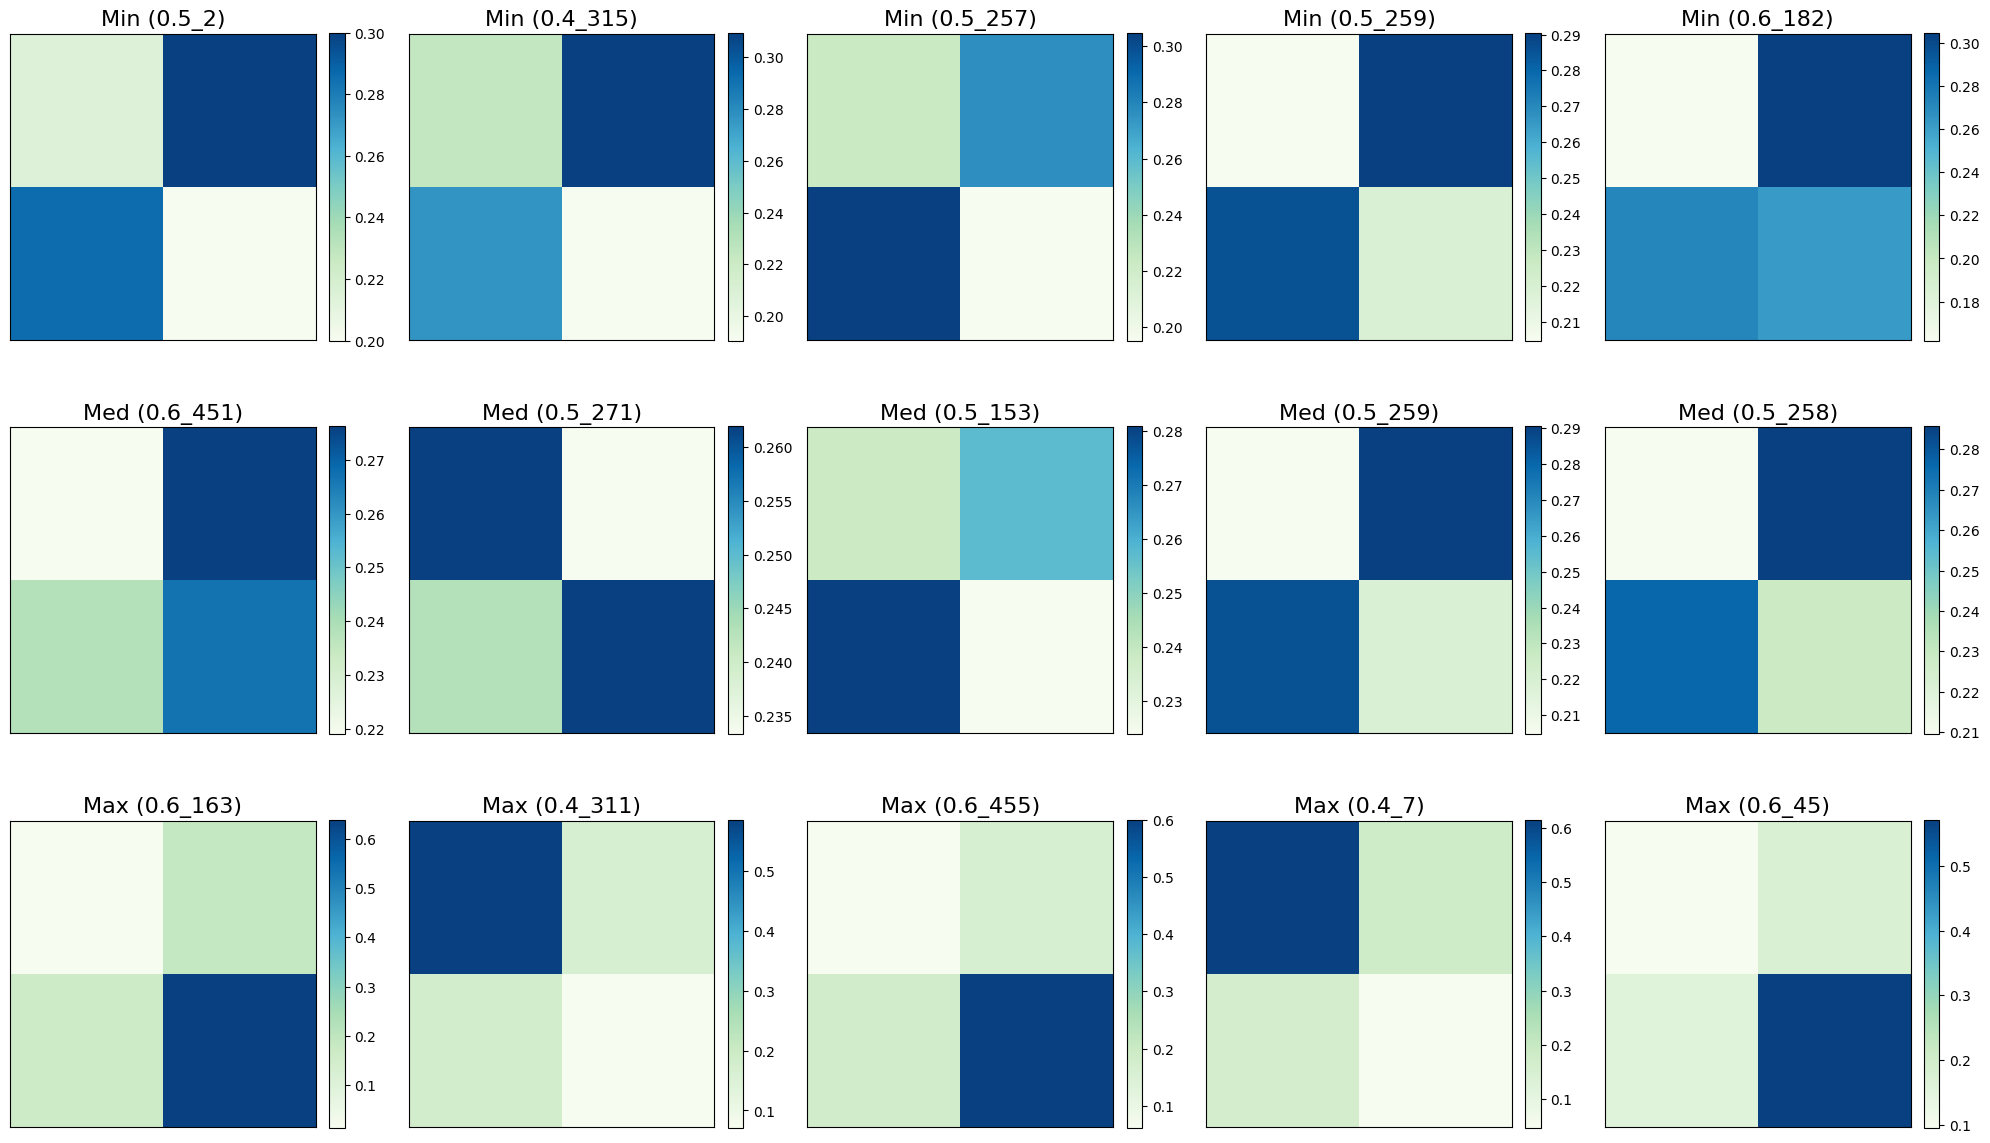

In [141]:
inverse_difference_moment_keys = [
    '0.5_2', '0.4_315', '0.5_257', '0.5_259', '0.6_182', 
    '0.6_451', '0.5_271', '0.5_153', '0.5_259', '0.5_258',   
    '0.6_163', '0.4_311', '0.6_455', '0.4_7', '0.6_45'  
]

inverse_difference_moment_titles = [
    'Min', 'Min', 'Min', 'Min', 'Min',
    'Med', 'Med', 'Med', 'Med', 'Med', 
    'Max', 'Max', 'Max', 'Max', 'Max'
]

fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.flatten() 

for i in range(15):
    ax = axes[i]
    key = inverse_difference_moment_keys[i]
    
    im = ax.imshow(df['glcm'][key], cmap='GnBu')
    ax.set_title(f'{inverse_difference_moment_titles[i]} ({inverse_difference_moment_keys[i]})', fontsize=16)
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

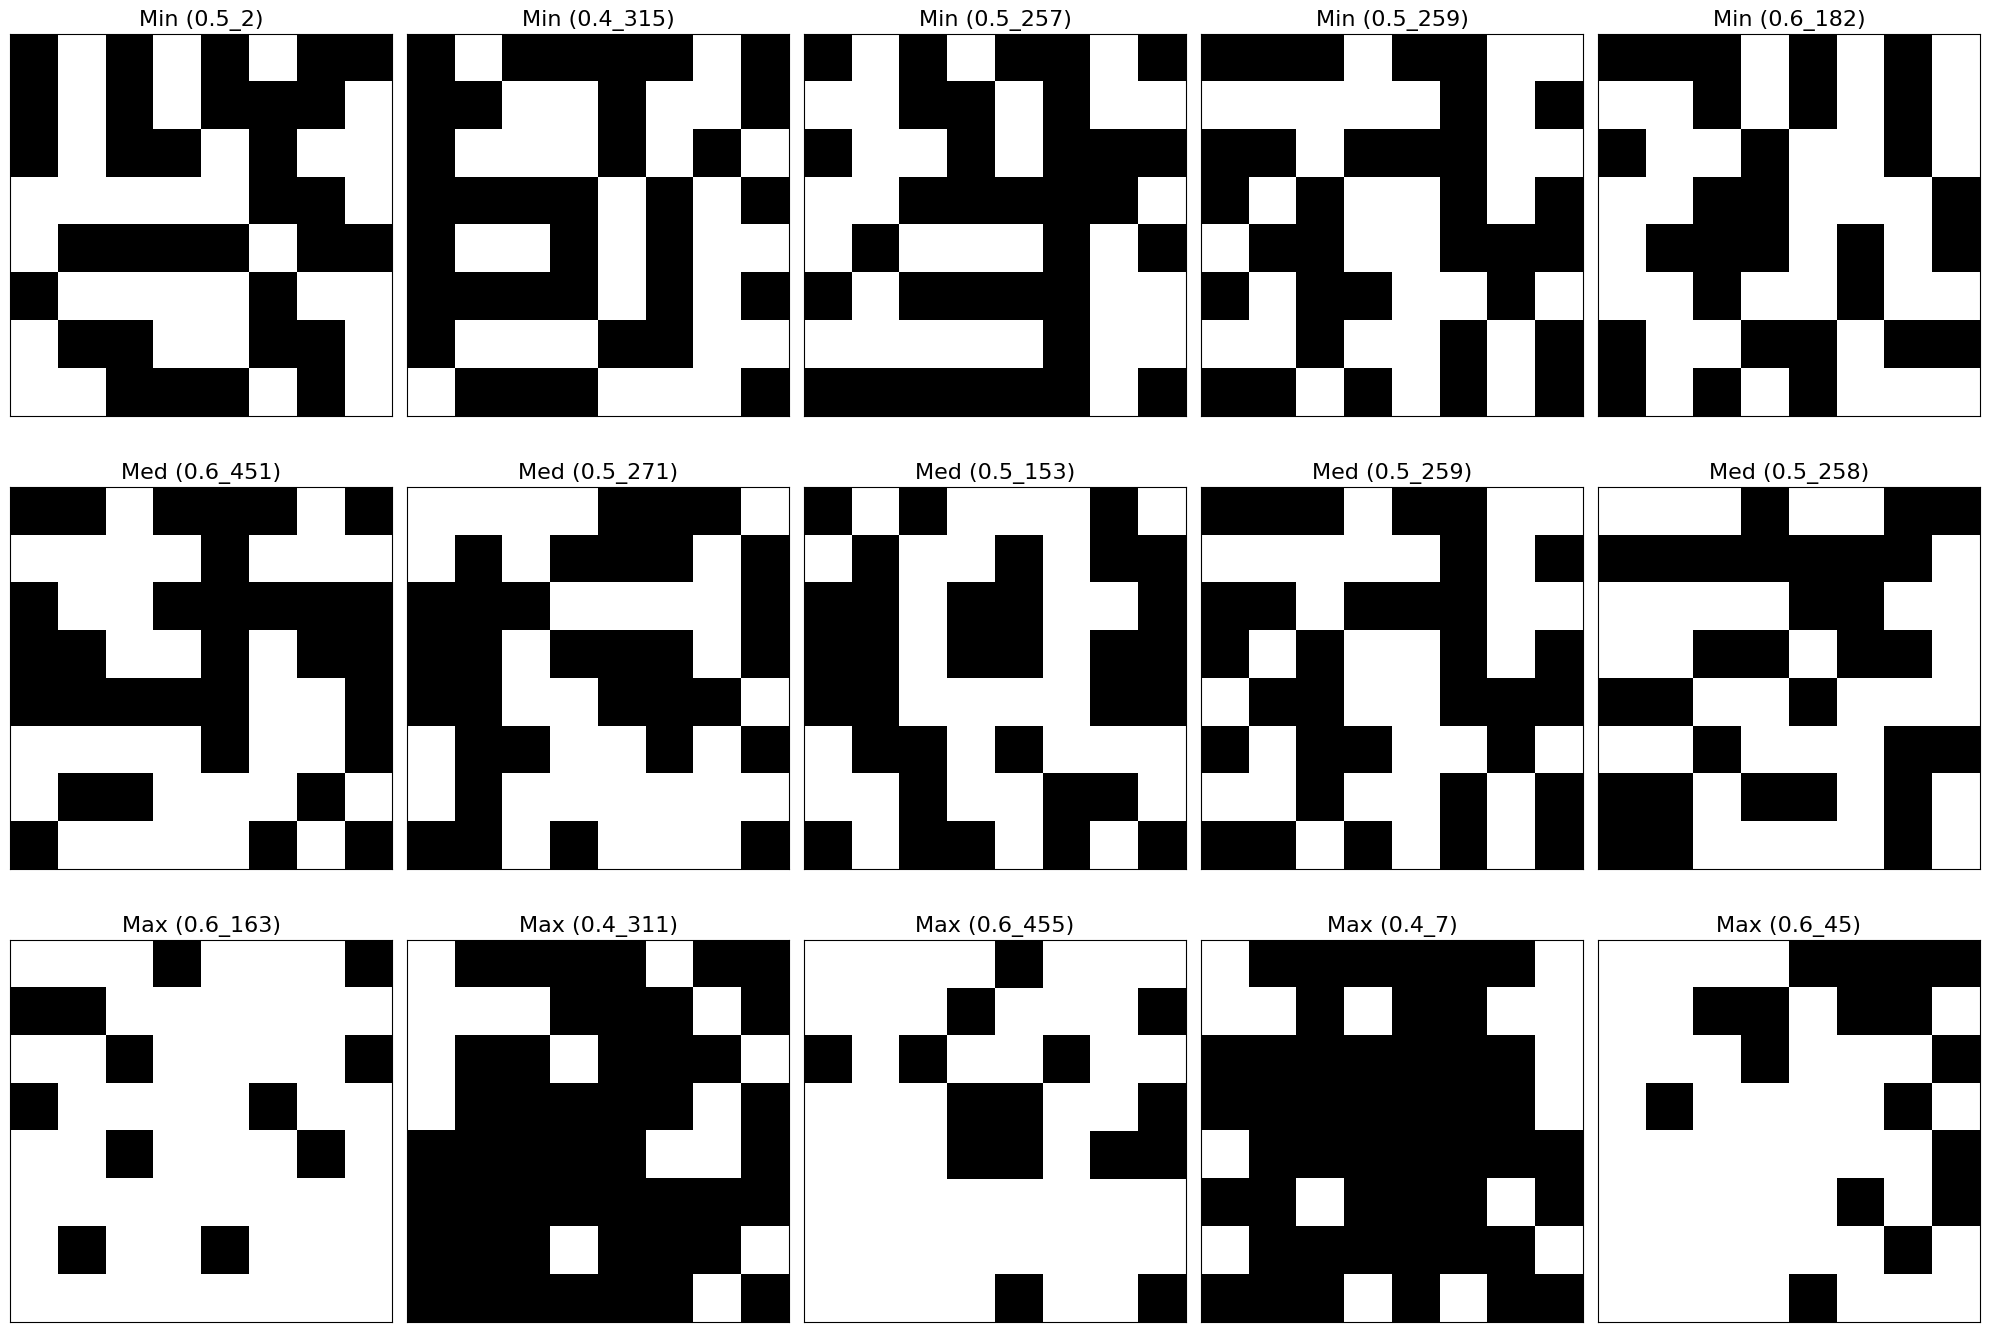

In [142]:
fig, axes = plt.subplots(3, 5, figsize=(20, 14))
axes = axes.flatten() 

for i in range(15):
    ax = axes[i]
    key = inverse_difference_moment_keys[i]
    
    im = ax.imshow(df['image'][key], cmap='gray')
    ax.set_title(f'{inverse_difference_moment_titles[i]} ({inverse_difference_moment_keys[i]})', fontsize=16)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

## Joint average

$$ \sum_{i=1}^{N} \sum_{j=1}^{N} i \cdot p(i, j) $$

Use only on symmetric GLCMs.

Joint Average acts as a proxy for the local brightness level of the textured region. This feature is half of the Sum Average. 

* Returns the mean gray level intensity of the $i$ distribution [As this formula represents the average of the distribution of $i$, it is independent from the distribution of $j$, Therefore, only use this formula if the GLCM is symmetrical, where $px(i)= py(𝑗)$, where $i=j$. ] (pyradiomics).

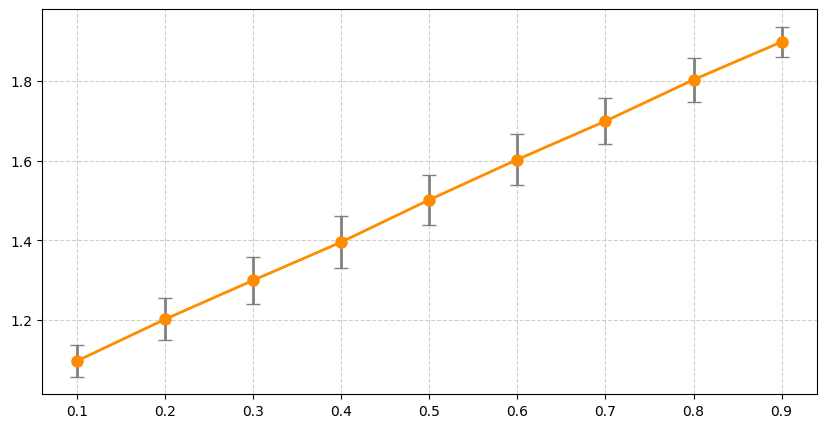

In [45]:
avg_joint_average = [np.mean([features[20] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_joint_average = [np.std([features[20] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_joint_average, yerr=std_joint_average, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)

Below we compare samples that produced 5 of the lowest, middle, and highest values of Joint average. We focus on random settings between 0.4 and 0.6 to avoid redundancy.

In [97]:
df_joint_average = df[(df['p'] == 0.4) | (df['p'] == 0.5) | (df['p'] == 0.6)
            ].sort_values(by=["joint_average"])[['joint_average', 'glcm', 'image']]

df_joint_average

joint_average                                               glcm  \
0.4_7         1.209524  [[0.6142857142857143, 0.1761904761904762], [0....   
0.4_452       1.219048  [[0.5761904761904761, 0.20476190476190476], [0...   
0.4_13        1.247619  [[0.5571428571428572, 0.19523809523809524], [0...   
0.4_311       1.252381  [[0.5857142857142857, 0.1619047619047619], [0....   
0.4_138       1.252381  [[0.5476190476190477, 0.2], [0.190476190476190...   
...                ...                                                ...   
0.6_443       1.761905  [[0.04285714285714286, 0.19523809523809524], [...   
0.6_331       1.761905  [[0.05238095238095238, 0.18571428571428572], [...   
0.6_269       1.771429  [[0.04285714285714286, 0.18571428571428572], [...   
0.6_455       1.780952  [[0.06190476190476191, 0.15714285714285714], [...   
0.6_163       1.800000  [[0.014285714285714285, 0.18571428571428572], ...   

                                                     image  
0.4_7    [[1, 0, 0, 0, 0, 0, 0, 1], [1, 1, 0, 1, 0, 0, ...  
0.4_452  [[1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 0, 0, ...  
0.4_13   [[1, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, ...  
0.4_311  [[1, 0, 0, 0, 0, 1, 0, 0], [1, 1, 1, 0, 0, 0, ...  
0.4_138  [[1, 0, 1, 0, 0, 0, 1, 0], [0, 0, 0, 1, 0, 0, ...  
...                                                    ...  
0.6_443  [[1, 1, 1, 0, 1, 1, 0, 1], [1, 1, 1, 0, 1, 1, ...  
0.6_331  [[0, 1, 0, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, ...  
0.6_269  [[0, 0, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, ...  
0.6_455  [[1, 1, 1, 1, 0, 1, 1, 1], [1, 1, 1, 0, 1, 1, ...  
0.6_163  [[1, 1, 1, 0, 1, 1, 1, 0], [0, 0, 1, 1, 1, 1, ...  

[1500 rows x 3 columns]

In [98]:
mid_idx = len(df_joint_average) // 2
start = max(0, mid_idx - (5 // 2))
end = start + 5

df_middle_5 = df_joint_average.iloc[start:end]
df_middle_5

joint_average                                               glcm  \
0.6_451       1.504762  [[0.21904761904761905, 0.2761904761904762], [0...   
0.5_271       1.504762  [[0.2619047619047619, 0.23333333333333334], [0...   
0.5_153       1.504762  [[0.23809523809523808, 0.2571428571428571], [0...   
0.5_259       1.504762  [[0.20476190476190476, 0.2904761904761905], [0...   
0.5_258       1.504762  [[0.20952380952380953, 0.2857142857142857], [0...   

                                                     image  
0.6_451  [[0, 0, 1, 0, 0, 0, 1, 0], [1, 1, 1, 1, 0, 1, ...  
0.5_271  [[1, 1, 1, 1, 0, 0, 0, 1], [1, 0, 1, 0, 0, 0, ...  
0.5_153  [[0, 1, 0, 1, 1, 1, 0, 1], [1, 0, 1, 1, 0, 1, ...  
0.5_259  [[0, 0, 0, 1, 0, 0, 1, 1], [1, 1, 1, 1, 1, 0, ...  
0.5_258  [[1, 1, 1, 0, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0, ...

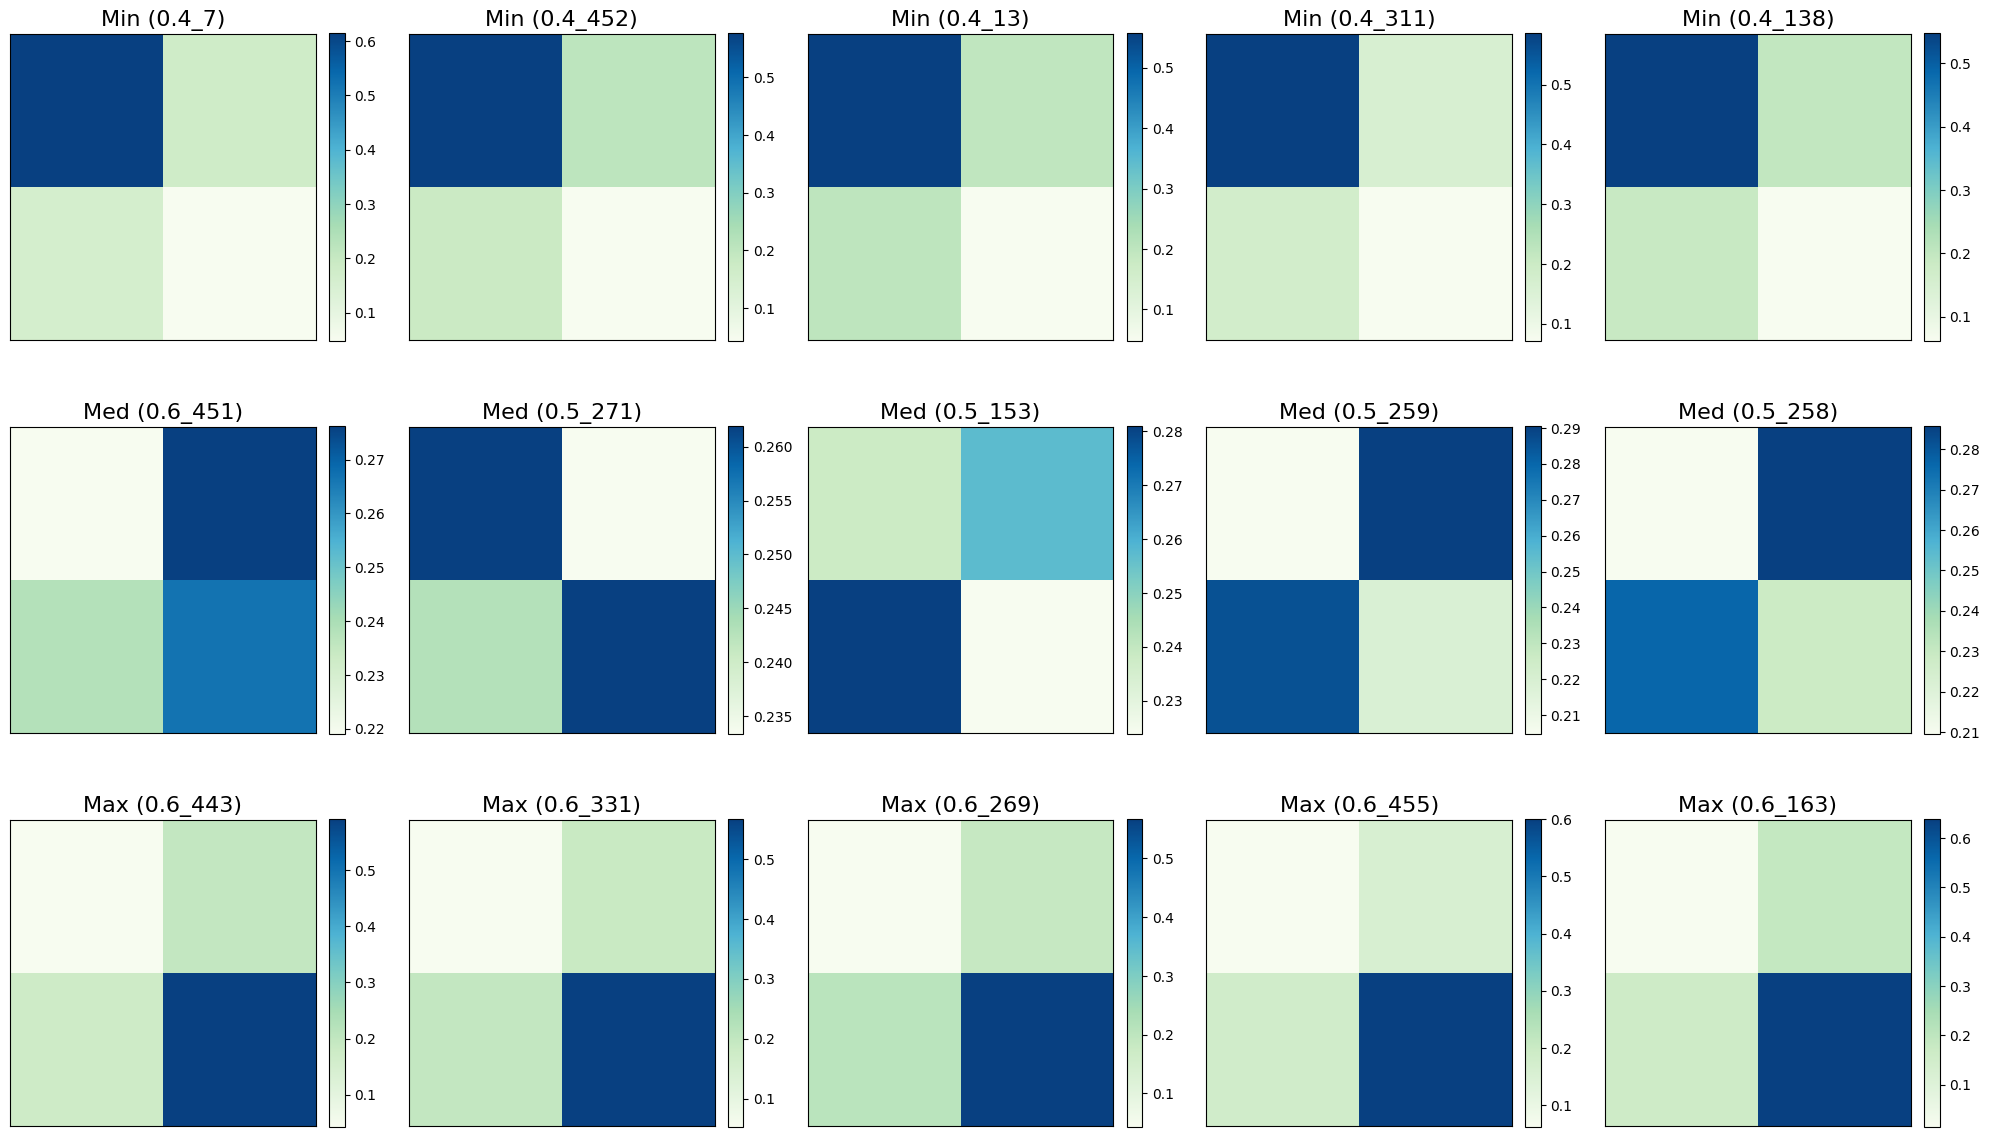

In [99]:
joint_average_keys = [
    '0.4_7', '0.4_452', '0.4_13', '0.4_311', '0.4_138', 
    '0.6_451', '0.5_271', '0.5_153', '0.5_259', '0.5_258',   
    '0.6_443', '0.6_331', '0.6_269', '0.6_455', '0.6_163'  
]

joint_average_titles = [
    'Min', 'Min', 'Min', 'Min', 'Min',
    'Med', 'Med', 'Med', 'Med', 'Med', 
    'Max', 'Max', 'Max', 'Max', 'Max'
]

fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.flatten() 

for i in range(15):
    ax = axes[i]
    key = joint_average_keys[i]
    
    im = ax.imshow(df['glcm'][key], cmap='GnBu')
    ax.set_title(f'{joint_average_titles[i]} ({joint_average_keys[i]})', fontsize=16)
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

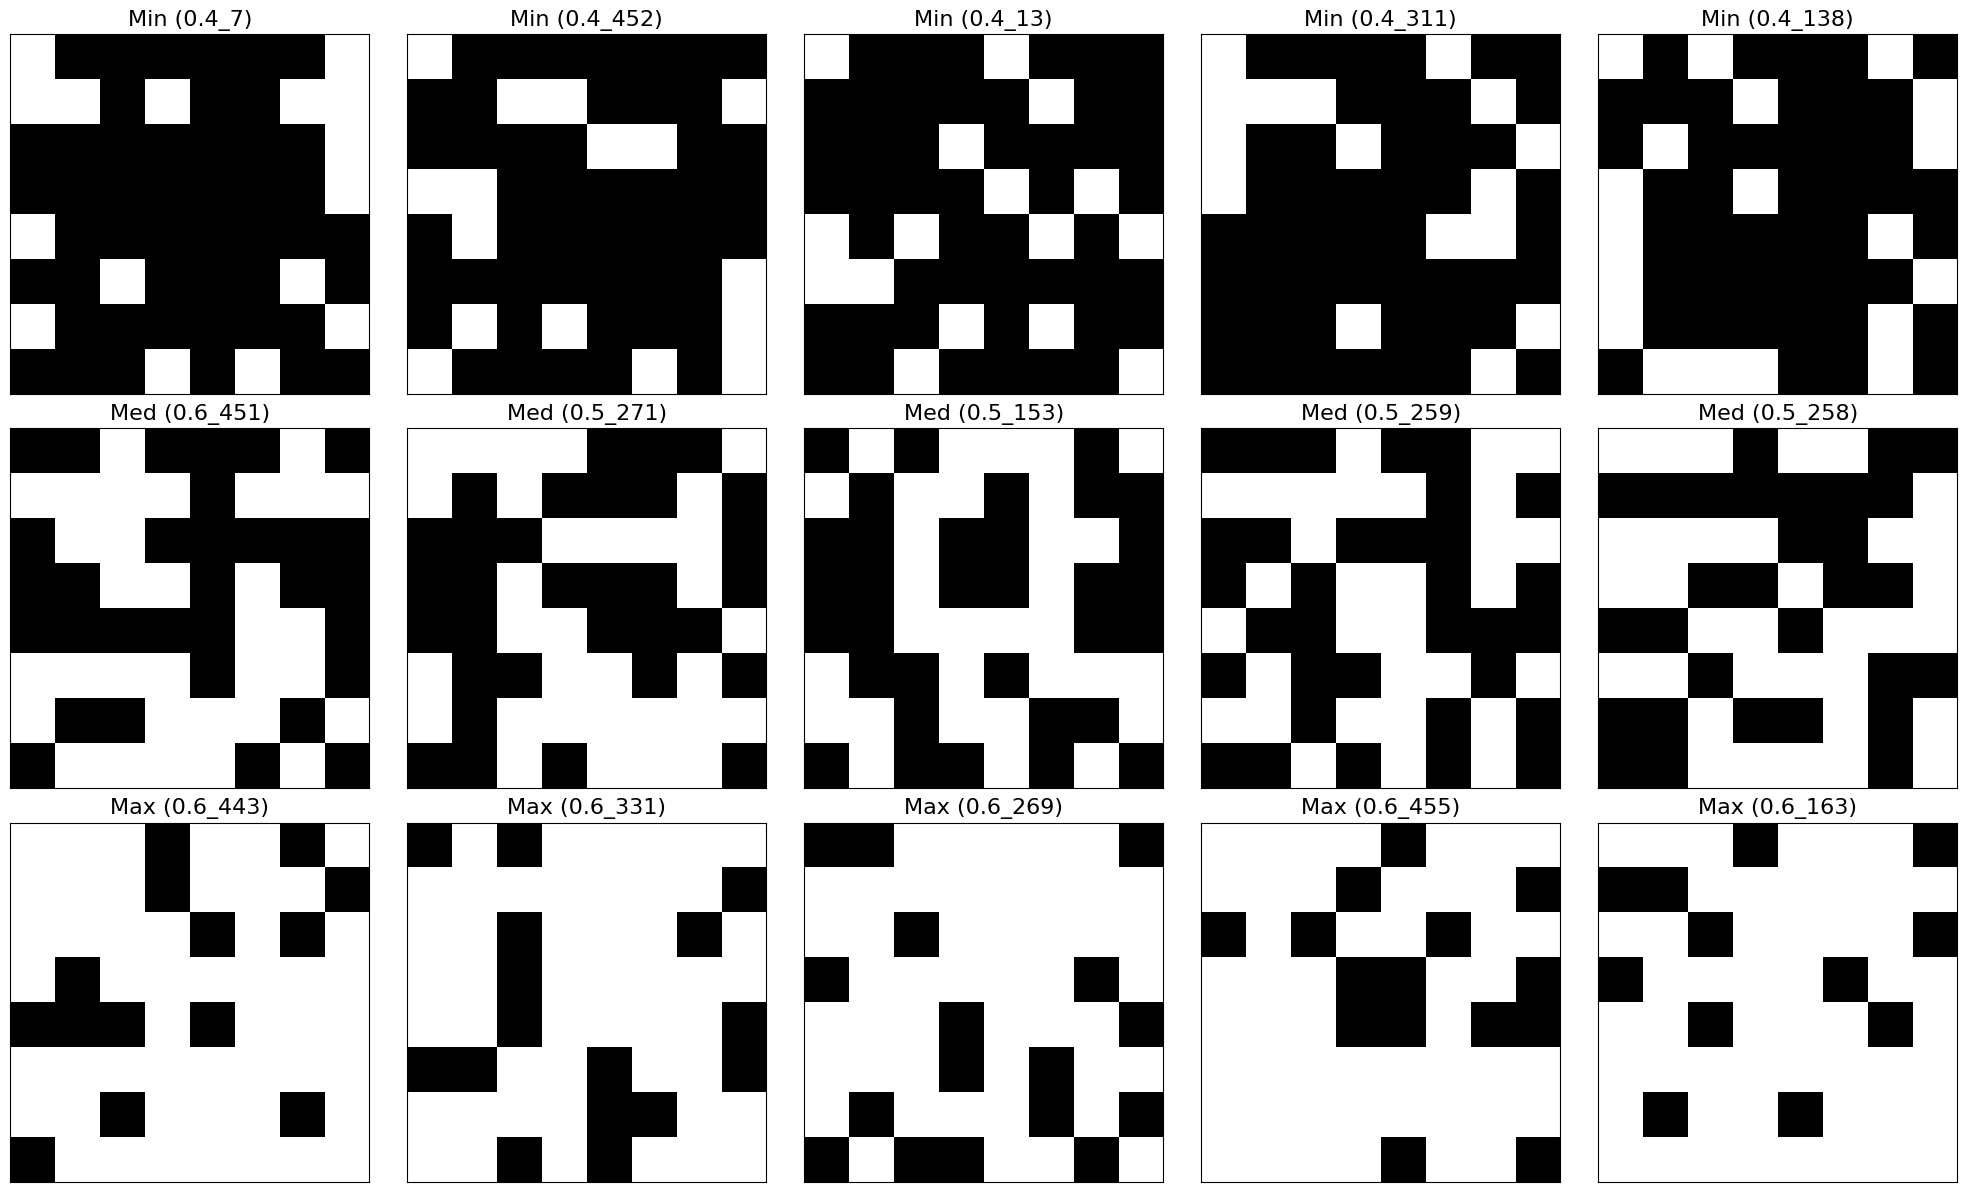

In [100]:
fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.flatten() 

for i in range(15):
    ax = axes[i]
    key = joint_average_keys[i]
    
    im = ax.imshow(df['image'][key], cmap='gray')
    ax.set_title(f'{joint_average_titles[i]} ({joint_average_keys[i]})', fontsize=16)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

## Maximum probability

$$ \max\big(p(i,j)\big) $$

This feature simply returns the largest probability of co-occurences from a GLCM. This feature gives less information about the texture, instead it may indicate if an image is dominated by a certain co-occurence. 

Also known as Joint Maximum
* Maximum Probability is occurrences of the most predominant pair of neighboring intensity values (pyradiomics).

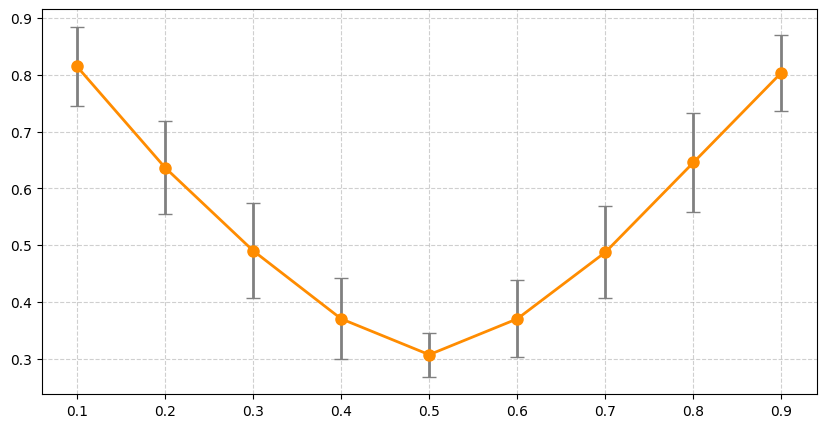

In [46]:
avg_maximum_prob = [np.mean([features[21] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_maximum_prob = [np.std([features[21] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_maximum_prob, yerr=std_maximum_prob, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)

Below we compare samples that produced 5 of the lowest, middle, and highest values of Max probability. We focus on random settings between 0.4 and 0.6 to avoid redundancy.

In [91]:
df_max_probability = df[(df['p'] == 0.4) | (df['p'] == 0.5) | (df['p'] == 0.6)
            ].sort_values(by=["maximum_probability"])[['maximum_probability', 'glcm', 'image']]

df_max_probability

maximum_probability  \
0.5_478             0.252381   
0.4_268             0.257143   
0.5_433             0.257143   
0.5_383             0.257143   
0.5_74              0.257143   
...                      ...   
0.4_311             0.585714   
0.6_443             0.590476   
0.6_455             0.600000   
0.4_7               0.614286   
0.6_163             0.638095   

                                                      glcm  \
0.5_478  [[0.2523809523809524, 0.24761904761904763], [0...   
0.4_268  [[0.24761904761904763, 0.2571428571428571], [0...   
0.5_433  [[0.2571428571428571, 0.2571428571428571], [0....   
0.5_383  [[0.2523809523809524, 0.2571428571428571], [0....   
0.5_74   [[0.24761904761904763, 0.2571428571428571], [0...   
...                                                    ...   
0.4_311  [[0.5857142857142857, 0.1619047619047619], [0....   
0.6_443  [[0.04285714285714286, 0.19523809523809524], [...   
0.6_455  [[0.06190476190476191, 0.15714285714285714], [...   
0.4_7    [[0.6142857142857143, 0.1761904761904762], [0....   
0.6_163  [[0.014285714285714285, 0.18571428571428572], ...   

                                                     image  
0.5_478  [[1, 1, 1, 0, 0, 1, 1, 0], [1, 1, 1, 1, 1, 1, ...  
0.4_268  [[0, 1, 1, 0, 1, 1, 1, 1], [1, 0, 0, 0, 0, 0, ...  
0.5_433  [[1, 0, 1, 0, 0, 0, 1, 1], [1, 0, 1, 0, 1, 0, ...  
0.5_383  [[0, 0, 1, 1, 1, 0, 1, 0], [1, 1, 1, 0, 1, 1, ...  
0.5_74   [[0, 1, 0, 1, 0, 1, 0, 1], [0, 1, 1, 0, 1, 1, ...  
...                                                    ...  
0.4_311  [[1, 0, 0, 0, 0, 1, 0, 0], [1, 1, 1, 0, 0, 0, ...  
0.6_443  [[1, 1, 1, 0, 1, 1, 0, 1], [1, 1, 1, 0, 1, 1, ...  
0.6_455  [[1, 1, 1, 1, 0, 1, 1, 1], [1, 1, 1, 0, 1, 1, ...  
0.4_7    [[1, 0, 0, 0, 0, 0, 0, 1], [1, 1, 0, 1, 0, 0, ...  
0.6_163  [[1, 1, 1, 0, 1, 1, 1, 0], [0, 0, 1, 1, 1, 1, ...  

[1500 rows x 3 columns]

In [93]:
mid_idx = len(df_max_probability) // 2
start = max(0, mid_idx - (5 // 2))
end = start + 5

df_middle_5 = df_max_probability.iloc[start:end]
df_middle_5

maximum_probability  \
0.5_59              0.333333   
0.5_163             0.333333   
0.4_159             0.333333   
0.6_246             0.333333   
0.6_384             0.333333   

                                                      glcm  \
0.5_59   [[0.3333333333333333, 0.23333333333333334], [0...   
0.5_163  [[0.11904761904761904, 0.26666666666666666], [...   
0.4_159  [[0.3333333333333333, 0.2619047619047619], [0....   
0.6_246  [[0.12857142857142856, 0.2761904761904762], [0...   
0.6_384  [[0.12857142857142856, 0.2761904761904762], [0...   

                                                     image  
0.5_59   [[1, 1, 0, 0, 0, 1, 0, 0], [1, 0, 1, 0, 1, 1, ...  
0.5_163  [[1, 0, 0, 1, 1, 1, 1, 0], [0, 1, 1, 1, 1, 1, ...  
0.4_159  [[0, 0, 1, 0, 1, 1, 0, 0], [0, 1, 1, 0, 0, 1, ...  
0.6_246  [[1, 1, 0, 0, 1, 1, 0, 1], [1, 1, 1, 1, 1, 0, ...  
0.6_384  [[0, 0, 1, 0, 1, 0, 1, 1], [1, 1, 0, 0, 1, 1, ...

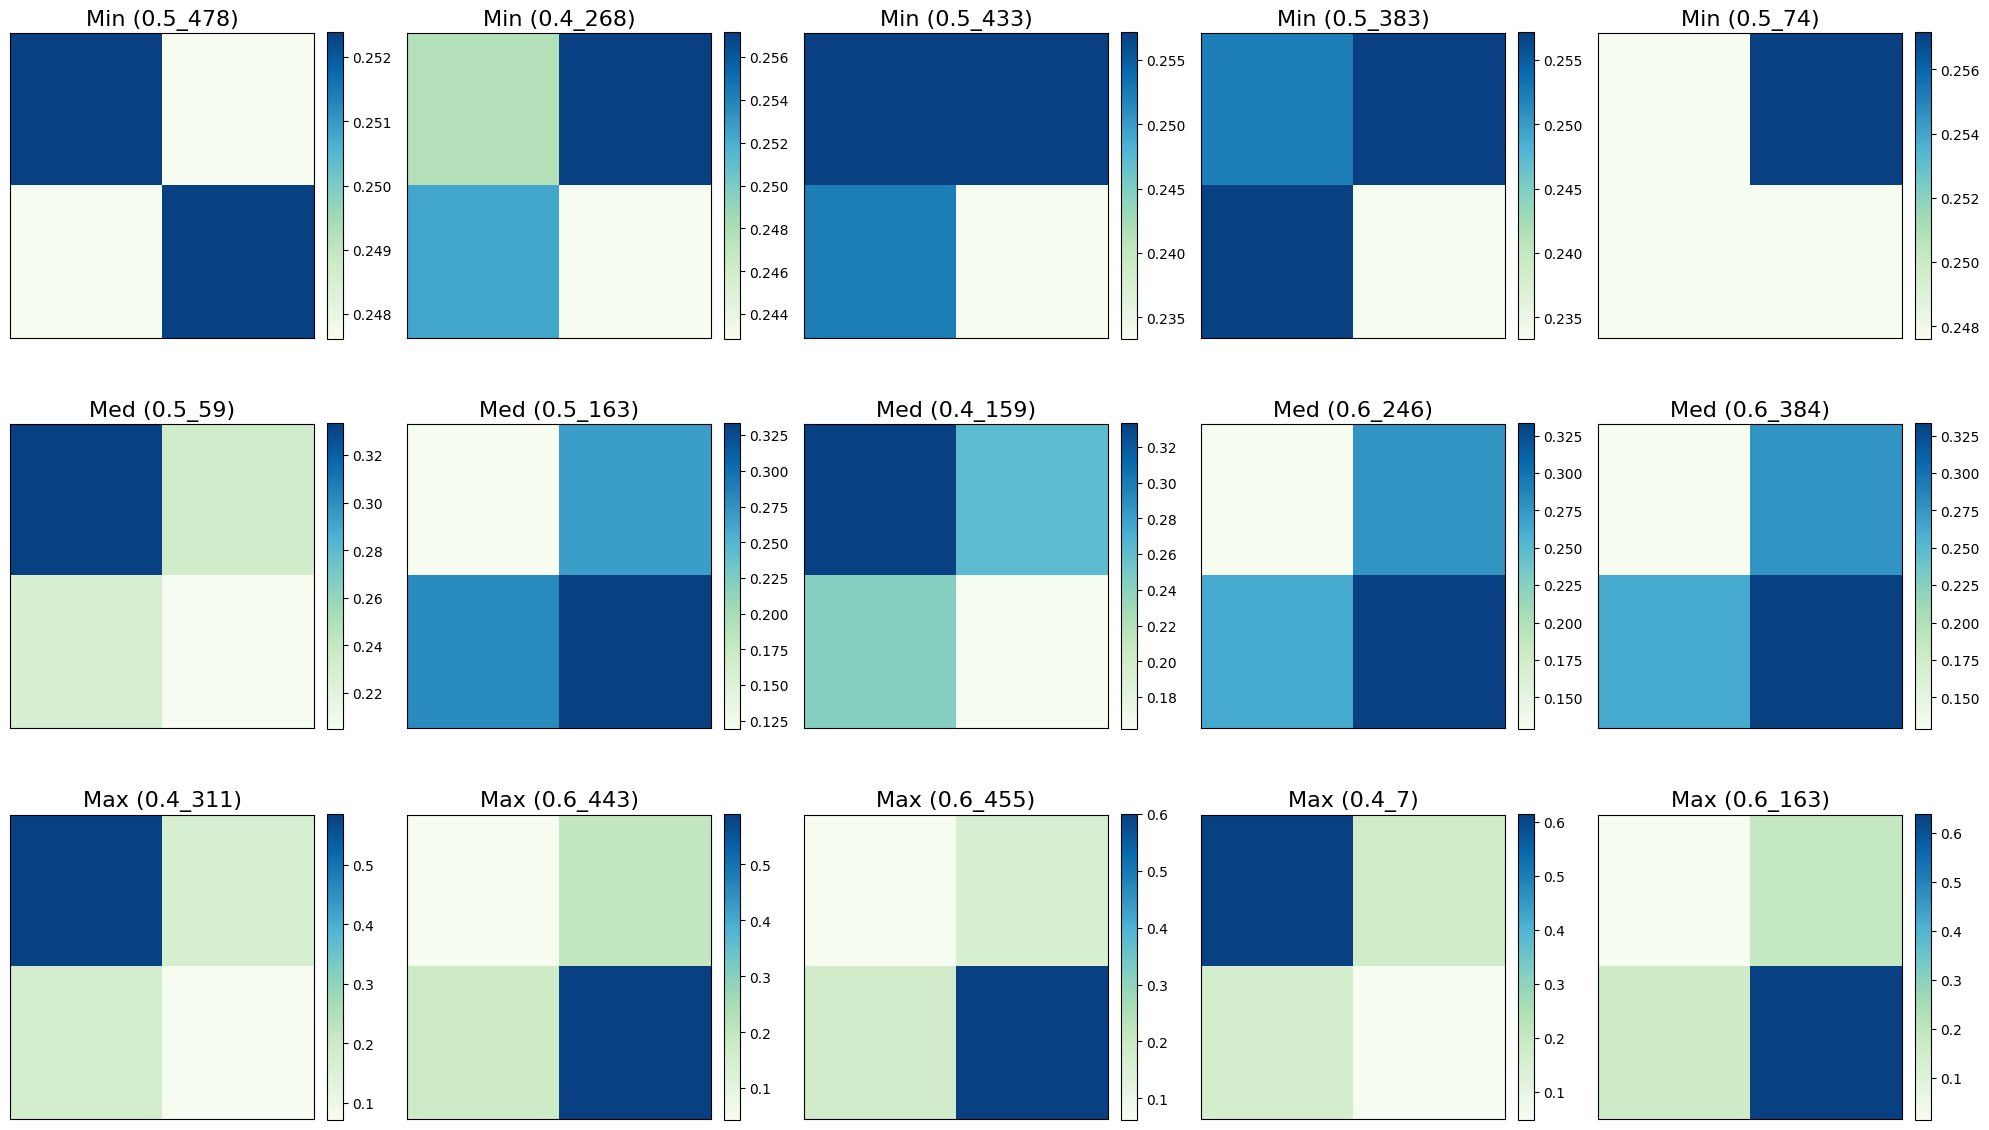

In [95]:
max_probability_keys = [
    '0.5_478', '0.4_268', '0.5_433', '0.5_383', '0.5_74', 
    '0.5_59', '0.5_163', '0.4_159', '0.6_246', '0.6_384',   
    '0.4_311', '0.6_443', '0.6_455', '0.4_7', '0.6_163'  
]

max_probability_titles = [
    'Min', 'Min', 'Min', 'Min', 'Min',
    'Med', 'Med', 'Med', 'Med', 'Med', 
    'Max', 'Max', 'Max', 'Max', 'Max'
]

fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.flatten() 

for i in range(15):
    ax = axes[i]
    key = max_probability_keys[i]
    
    im = ax.imshow(df['glcm'][key], cmap='GnBu')
    ax.set_title(f'{max_probability_titles[i]} ({max_probability_keys[i]})', fontsize=16)
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

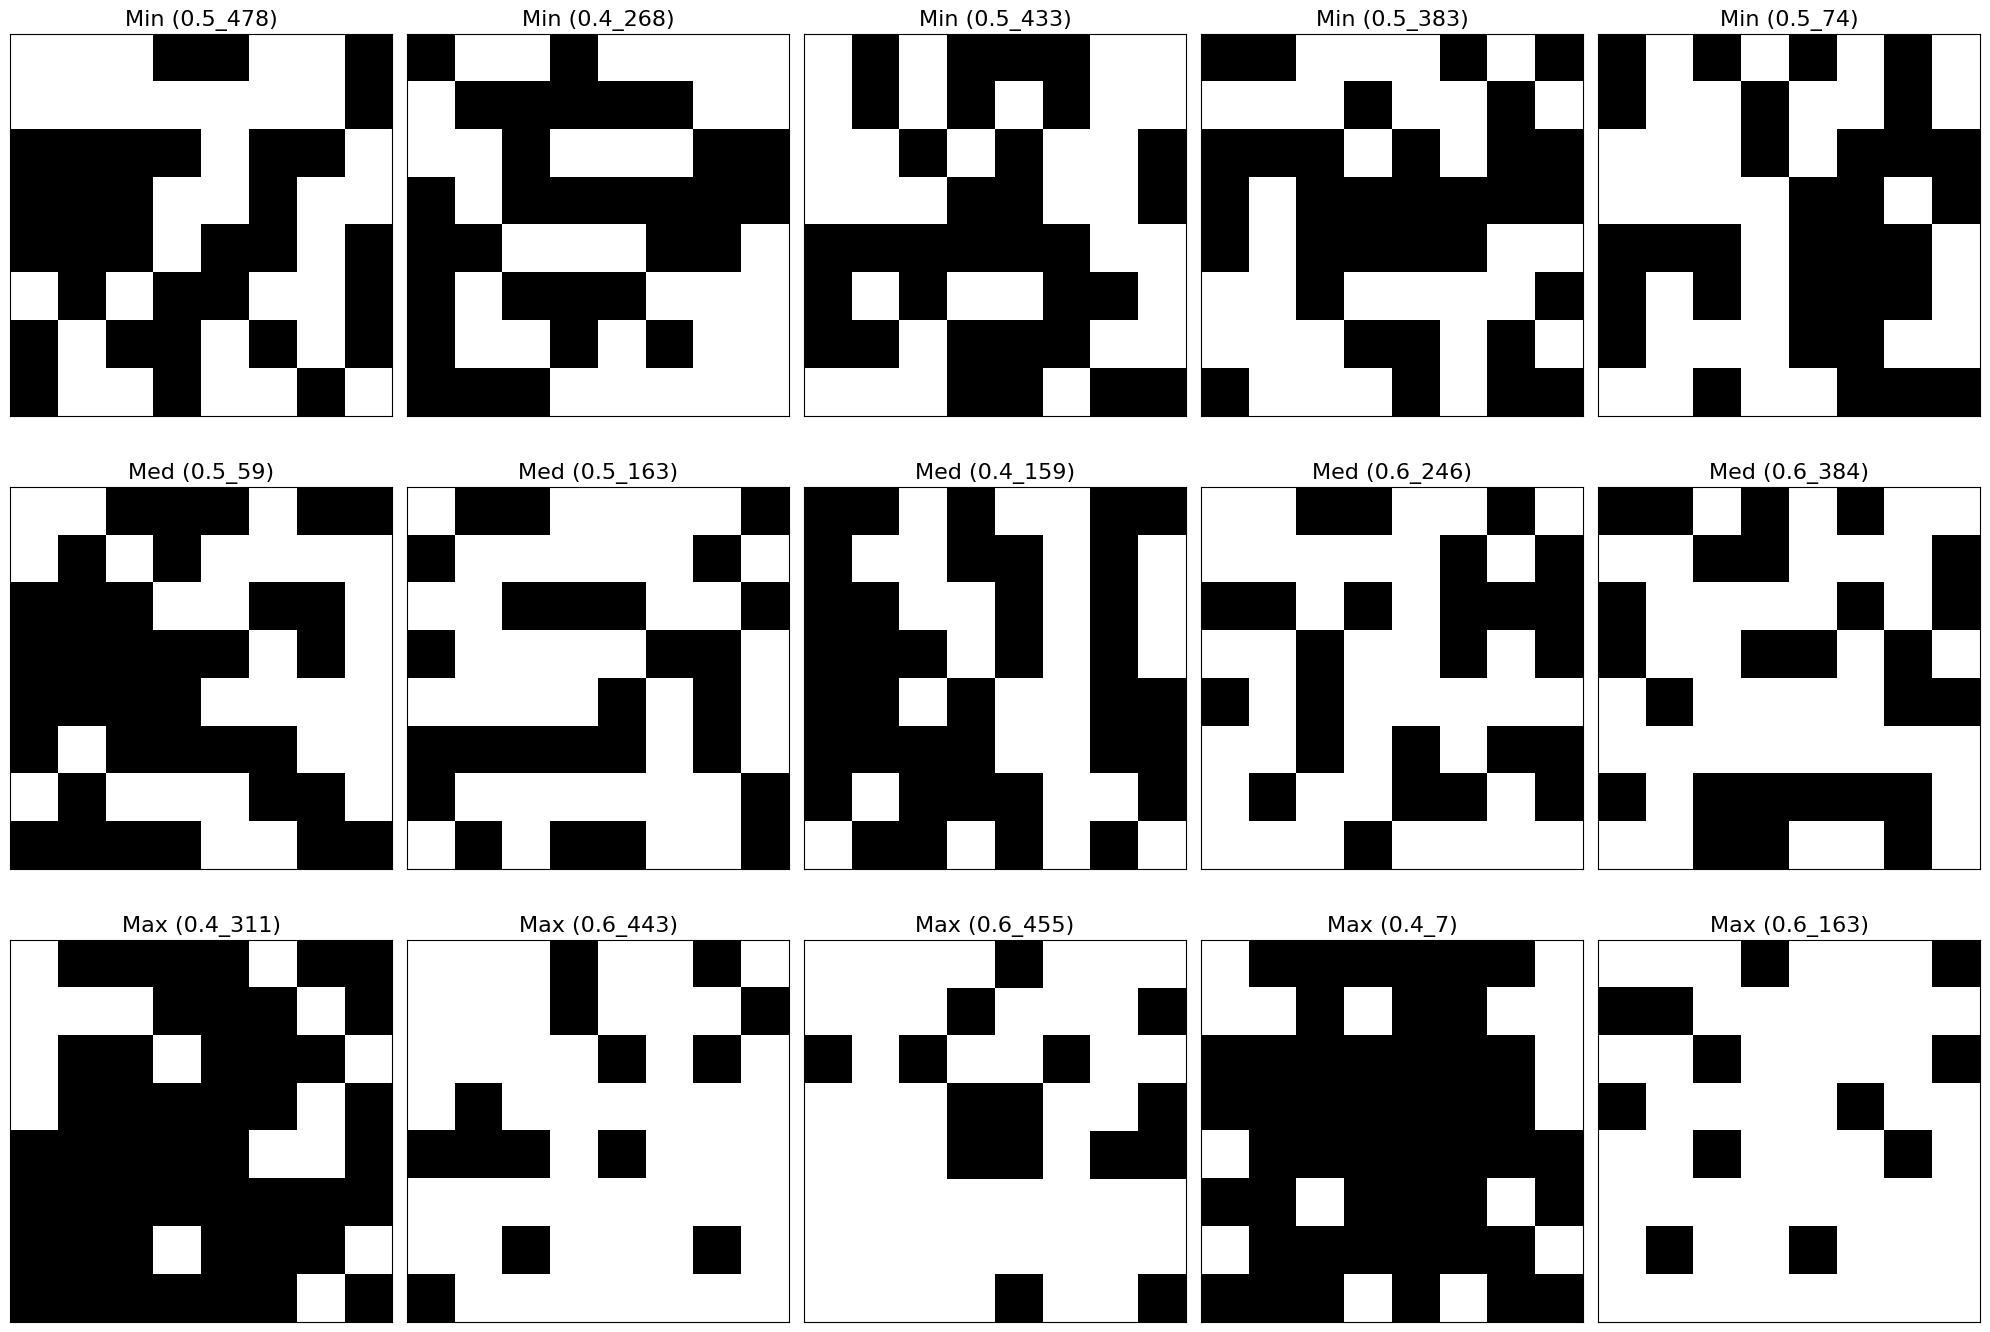

In [96]:
fig, axes = plt.subplots(3, 5, figsize=(20, 14))
axes = axes.flatten() 

for i in range(15):
    ax = axes[i]
    key = max_probability_keys[i]
    
    im = ax.imshow(df['image'][key], cmap='gray')
    ax.set_title(f'{max_probability_titles[i]} ({max_probability_keys[i]})', fontsize=16)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

## Sum average

$$ \sum^{2N}_{k=2}{k \cdot p_{x+y}(k)} $$

This gives us the sum of the indices weighted by the k value. Sum Average is essentially calculating the center of mass along the axis perpendicular to the main diagonal (the $i+j$ lines). It considers pixels that actually participate in the co-occurrence relationship (in a cross diagonal there is a certain set of co-occurences). Higher weight is given to beighter values.

e.g The cross-diagonal that intersects the $(3,3)$ entry of the GLCM,  $4 \leq k \leq 6$ The faeture compares the average within each cross diagonal (instad of the average of the whole GLCM), this captures variances with all the co-occurences where the gray level co-occurs with gray level $=3$. But gray levels greater than 3 arent captured.

* Sum Average measures the relationship between occurrences of pairs with lower intensity values and occurrences of pairs with higher intensity values (pyradiomics).

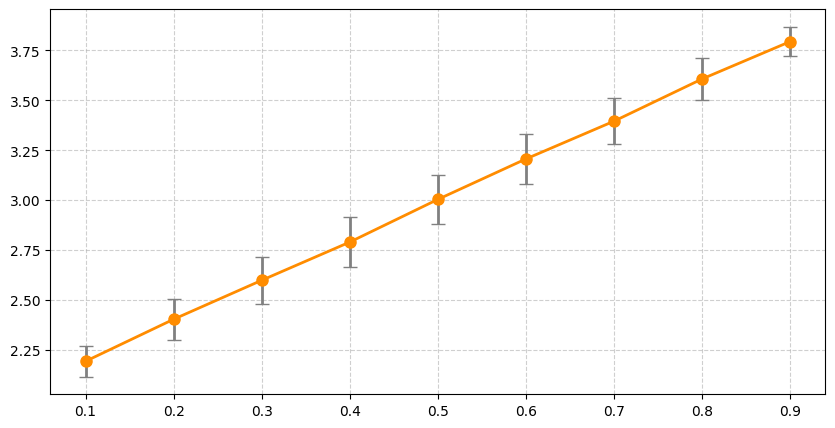

In [47]:
avg_sum_average = [np.mean([features[17] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_sum_average = [np.std([features[17] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_sum_average, yerr=std_sum_average, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Below we compare samples that produced 5 of the lowest, middle, and highest values of Sum average. We focus on random settings between 0.4 and 0.6 to avoid redundancy.

In [86]:
df_sum_average = df[(df['p'] == 0.4) | (df['p'] == 0.5) | (df['p'] == 0.6)
            ].sort_values(by=["sum_average"])[['sum_average', 'glcm', 'image']]

df_sum_average

sum_average                                               glcm  \
0.4_7       2.433333  [[0.6142857142857143, 0.1761904761904762], [0....   
0.4_452     2.466667  [[0.5761904761904761, 0.20476190476190476], [0...   
0.4_311     2.485714  [[0.5857142857142857, 0.1619047619047619], [0....   
0.4_13      2.490476  [[0.5571428571428572, 0.19523809523809524], [0...   
0.4_362     2.504762  [[0.5523809523809524, 0.18571428571428572], [0...   
...              ...                                                ...   
0.6_331     3.514286  [[0.05238095238095238, 0.18571428571428572], [...   
0.6_269     3.523810  [[0.04285714285714286, 0.18571428571428572], [...   
0.6_455     3.538095  [[0.06190476190476191, 0.15714285714285714], [...   
0.6_443     3.547619  [[0.04285714285714286, 0.19523809523809524], [...   
0.6_163     3.623810  [[0.014285714285714285, 0.18571428571428572], ...   

                                                     image  
0.4_7    [[1, 0, 0, 0, 0, 0, 0, 1], [1, 1, 0, 1, 0, 0, ...  
0.4_452  [[1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 0, 0, ...  
0.4_311  [[1, 0, 0, 0, 0, 1, 0, 0], [1, 1, 1, 0, 0, 0, ...  
0.4_13   [[1, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, ...  
0.4_362  [[0, 0, 1, 0, 1, 1, 0, 0], [1, 0, 0, 0, 0, 1, ...  
...                                                    ...  
0.6_331  [[0, 1, 0, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, ...  
0.6_269  [[0, 0, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, ...  
0.6_455  [[1, 1, 1, 1, 0, 1, 1, 1], [1, 1, 1, 0, 1, 1, ...  
0.6_443  [[1, 1, 1, 0, 1, 1, 0, 1], [1, 1, 1, 0, 1, 1, ...  
0.6_163  [[1, 1, 1, 0, 1, 1, 1, 0], [0, 0, 1, 1, 1, 1, ...  

[1500 rows x 3 columns]

In [87]:
mid_idx = len(df_sum_average) // 2
start = max(0, mid_idx - (5 // 2))
end = start + 5

df_middle_5 = df_sum_average.iloc[start:end]
df_middle_5

sum_average                                               glcm  \
0.5_74      3.000000  [[0.24761904761904763, 0.2571428571428571], [0...   
0.5_462     3.004762  [[0.22857142857142856, 0.2761904761904762], [0...   
0.4_93      3.004762  [[0.2523809523809524, 0.26666666666666666], [0...   
0.5_410     3.004762  [[0.23809523809523808, 0.2523809523809524], [0...   
0.6_106     3.004762  [[0.22380952380952382, 0.28095238095238095], [...   

                                                     image  
0.5_74   [[0, 1, 0, 1, 0, 1, 0, 1], [0, 1, 1, 0, 1, 1, ...  
0.5_462  [[0, 0, 0, 0, 1, 0, 0, 1], [0, 0, 1, 1, 1, 0, ...  
0.4_93   [[0, 1, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 1, ...  
0.5_410  [[0, 1, 0, 1, 1, 1, 0, 0], [1, 0, 0, 0, 0, 0, ...  
0.6_106  [[1, 0, 1, 0, 0, 0, 1, 0], [0, 0, 1, 0, 1, 1, ...

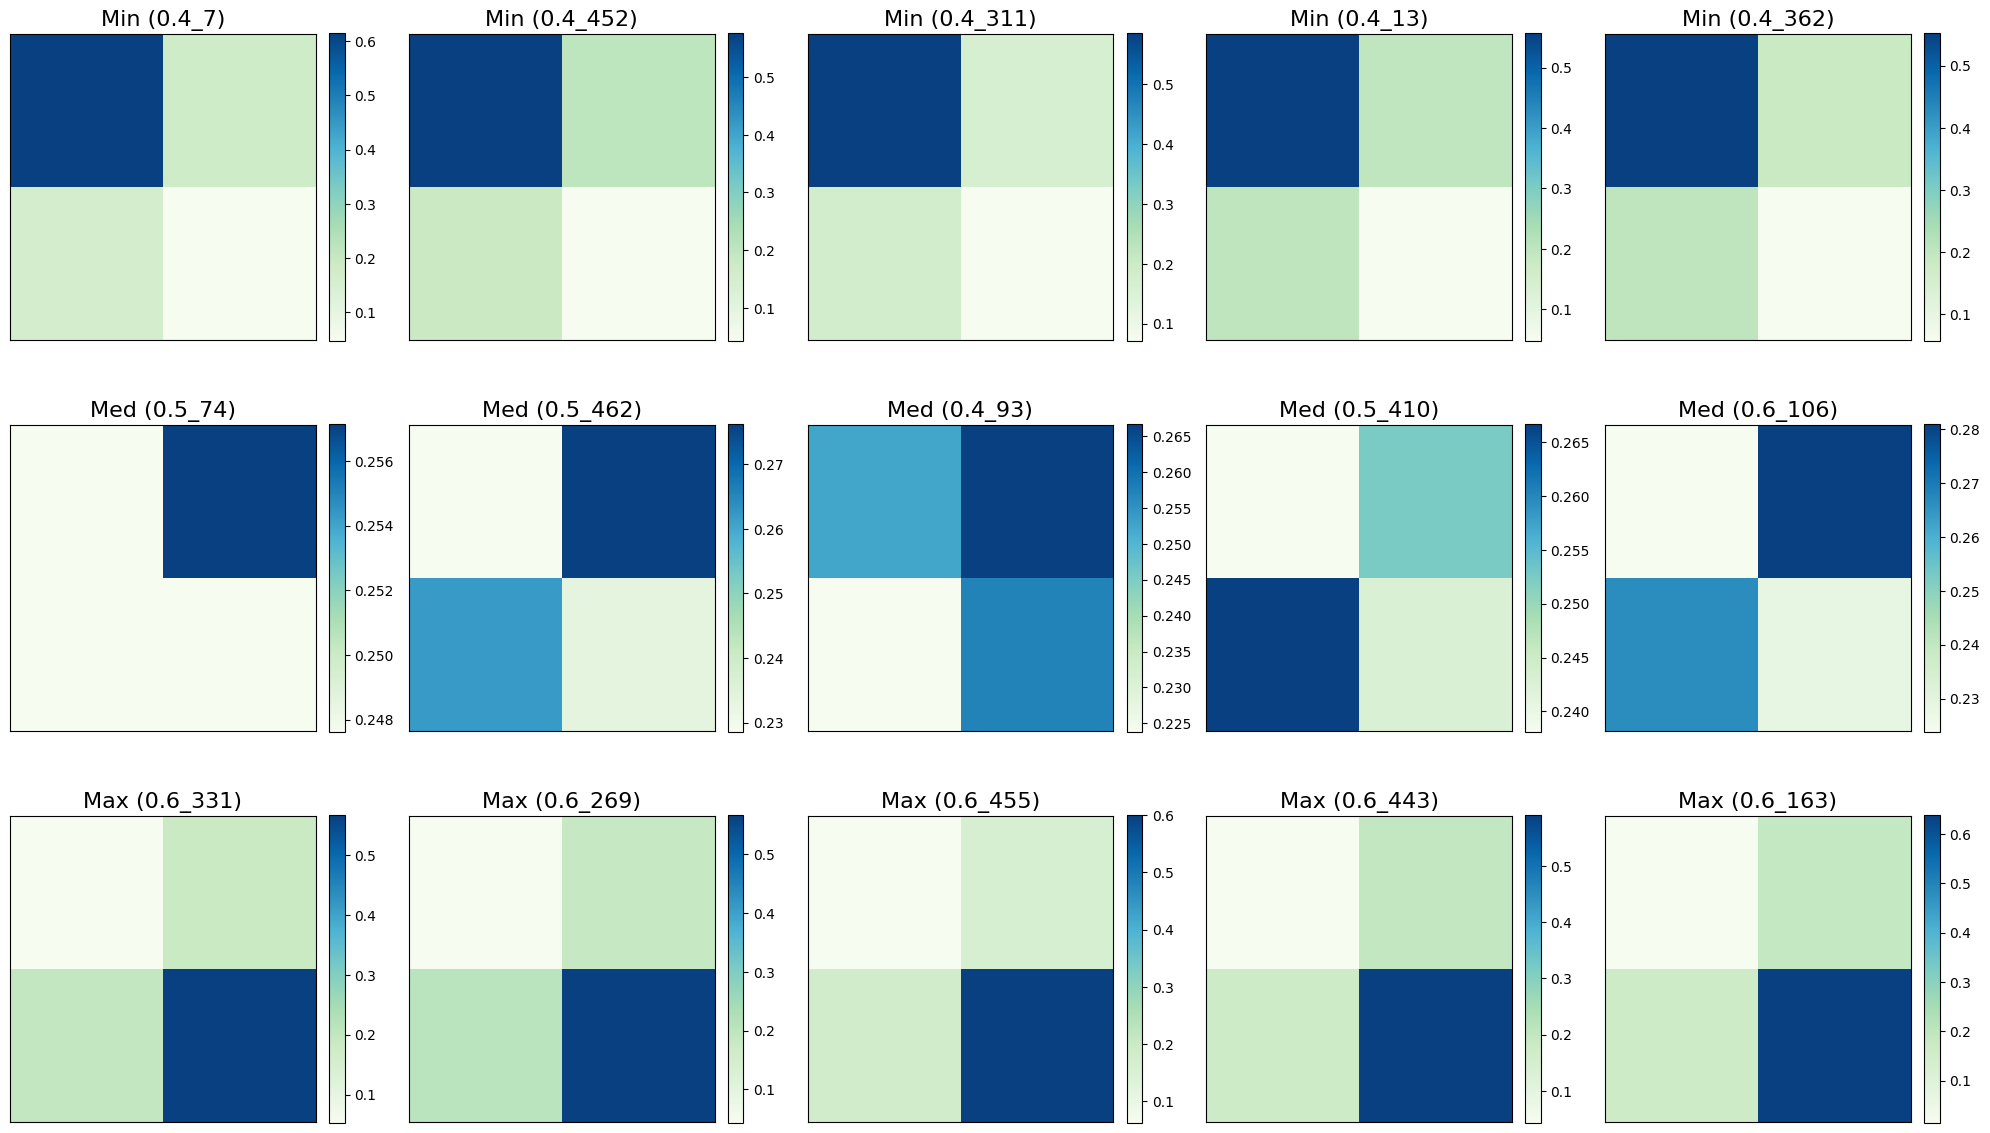

In [88]:
sum_average_keys = [
    '0.4_7', '0.4_452', '0.4_311', '0.4_13', '0.4_362', 
    '0.5_74', '0.5_462', '0.4_93', '0.5_410', '0.6_106',   
    '0.6_331', '0.6_269', '0.6_455', '0.6_443', '0.6_163'  
]

sum_average_titles = [
    'Min', 'Min', 'Min', 'Min', 'Min',
    'Med', 'Med', 'Med', 'Med', 'Med', 
    'Max', 'Max', 'Max', 'Max', 'Max'
]

fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.flatten() 

for i in range(15):
    ax = axes[i]
    key = sum_average_keys[i]
    
    im = ax.imshow(df['glcm'][key], cmap='GnBu')
    ax.set_title(f'{sum_average_titles[i]} ({sum_average_keys[i]})', fontsize=16)
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

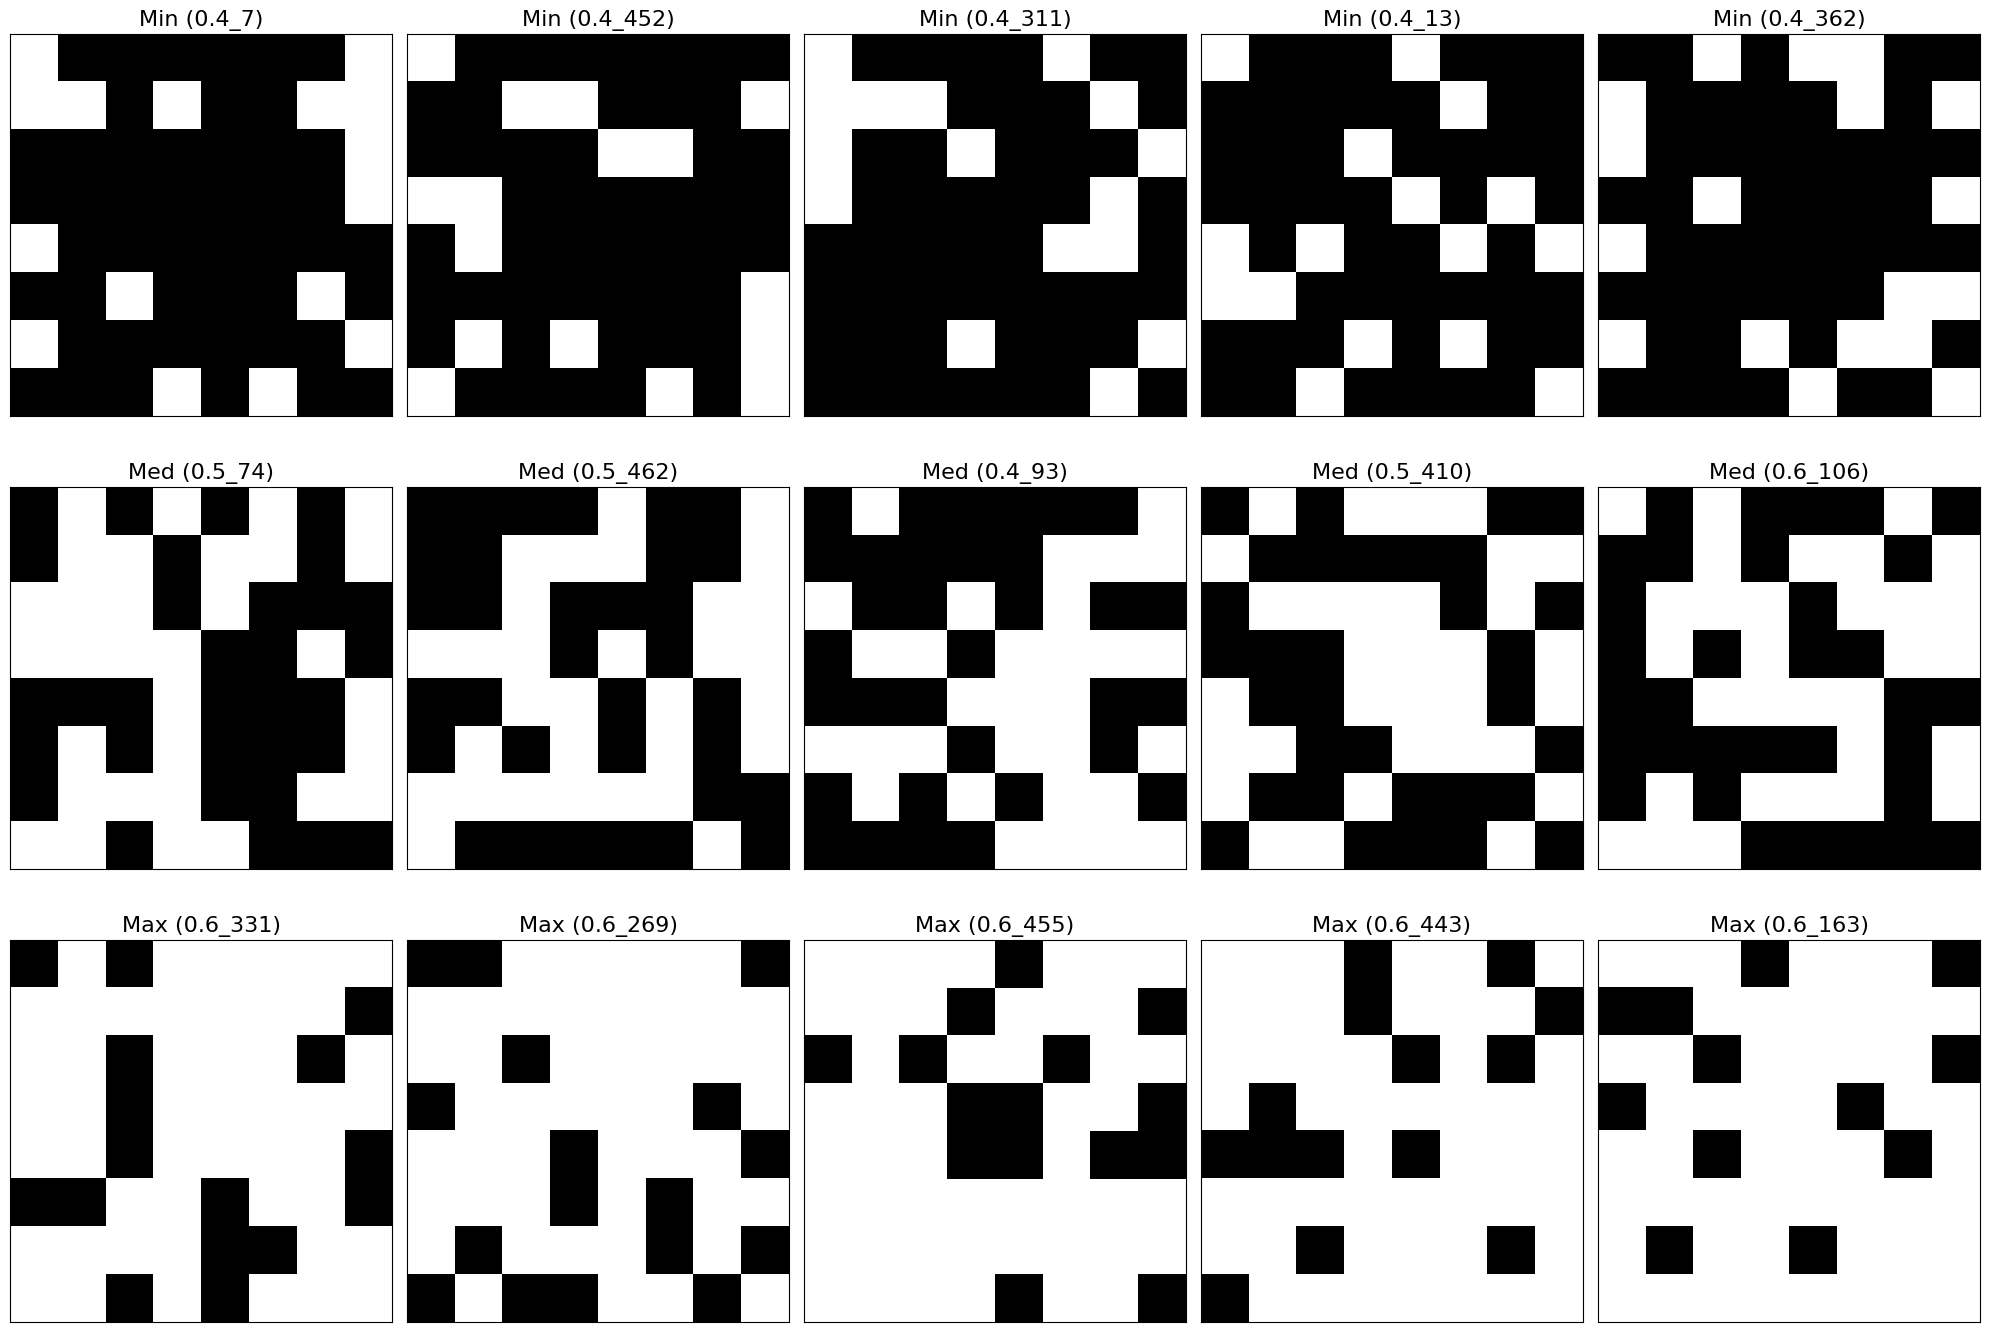

In [89]:
fig, axes = plt.subplots(3, 5, figsize=(20, 14))
axes = axes.flatten() 

for i in range(15):
    ax = axes[i]
    key = sum_average_keys[i]
    
    im = ax.imshow(df['image'][key], cmap='gray')
    ax.set_title(f'{sum_average_titles[i]} ({sum_average_keys[i]})', fontsize=16)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

## Sum entropy

$$  - \sum^{2N}_{k=2}{p_{x+y}(k)\log p_{x+y}(k)} $$
or,
$$ \sum^{2N}_{k=2}{p_{x+y}(k)\log_2\big(p_{x+y}(k)+\epsilon\big)} $$

Sum Entropy is then the Shannon Entropy of the $p_{x+y}$ distribution. Similar to Entropy, if the distribution is concentrated the Sum Entropy value will be near zero, adn grows as the distribution is more uniform.

This feature can be used to describe the spatial distribution of brightness in a texture. High value indicates a texture where many different combinations of total brightness exist across the image. This is typical of heterogeneous or "noisy" environments where light and dark areas are mixed in many different ways.

* Sum Entropy is a sum of neighborhood intensity value differences (pyradiomics).

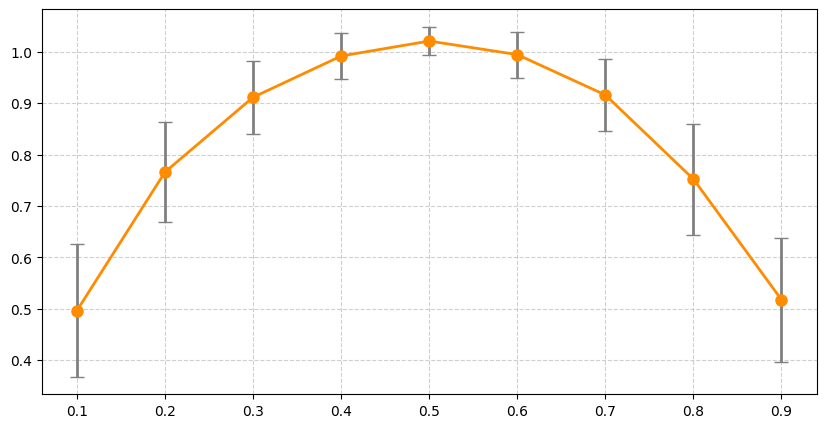

In [49]:
avg_sum_entropy = [np.mean([features[18] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_sum_entropy = [np.std([features[18] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_sum_entropy, yerr=std_sum_entropy, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Below we compare samples that produced 5 of the lowest, middle, and highest values of Sum entropy. We focus on random settings between 0.4 and 0.6 to avoid redundancy.

In [81]:
df_sum_entropy = df[(df['p'] == 0.4) | (df['p'] == 0.5) | (df['p'] == 0.6)
            ].sort_values(by=["sum_entropy"])[['sum_entropy', 'glcm', 'image']]

df_sum_entropy

sum_entropy                                               glcm  \
0.6_163     0.714679  [[0.014285714285714285, 0.18571428571428572], ...   
0.4_7       0.810956  [[0.6142857142857143, 0.1761904761904762], [0....   
0.6_443     0.813951  [[0.04285714285714286, 0.19523809523809524], [...   
0.4_452     0.820308  [[0.5761904761904761, 0.20476190476190476], [0...   
0.6_269     0.824052  [[0.04285714285714286, 0.18571428571428572], [...   
...              ...                                                ...   
0.5_498     1.084742  [[0.2761904761904762, 0.16666666666666666], [0...   
0.5_144     1.085664  [[0.2857142857142857, 0.21904761904761905], [0...   
0.5_5       1.087666  [[0.26666666666666666, 0.20476190476190476], [...   
0.6_409     1.087690  [[0.319047619047619, 0.19523809523809524], [0....   
0.4_261     1.090023  [[0.34285714285714286, 0.1761904761904762], [0...   

                                                     image  
0.6_163  [[1, 1, 1, 0, 1, 1, 1, 0], [0, 0, 1, 1, 1, 1, ...  
0.4_7    [[1, 0, 0, 0, 0, 0, 0, 1], [1, 1, 0, 1, 0, 0, ...  
0.6_443  [[1, 1, 1, 0, 1, 1, 0, 1], [1, 1, 1, 0, 1, 1, ...  
0.4_452  [[1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 0, 0, ...  
0.6_269  [[0, 0, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, ...  
...                                                    ...  
0.5_498  [[1, 1, 1, 1, 1, 0, 1, 1], [1, 0, 1, 1, 1, 1, ...  
0.5_144  [[1, 1, 1, 1, 0, 0, 0, 0], [1, 1, 1, 1, 0, 1, ...  
0.5_5    [[1, 0, 1, 0, 1, 0, 1, 1], [1, 1, 1, 1, 1, 1, ...  
0.6_409  [[1, 0, 1, 1, 0, 0, 1, 0], [1, 1, 0, 1, 1, 1, ...  
0.4_261  [[1, 0, 1, 0, 0, 1, 1, 1], [1, 1, 1, 1, 1, 1, ...  

[1500 rows x 3 columns]

In [82]:
mid_idx = len(df_sum_entropy) // 2
start = max(0, mid_idx - (5 // 2))
end = start + 5

df_middle_5 = df_sum_entropy.iloc[start:end]
df_middle_5

sum_entropy                                               glcm  \
0.4_23      1.008234  [[0.29523809523809524, 0.26666666666666666], [...   
0.4_103     1.008234  [[0.29523809523809524, 0.24761904761904763], [...   
0.4_191     1.008396  [[0.3047619047619048, 0.2571428571428571], [0....   
0.4_83      1.008980  [[0.3761904761904762, 0.21904761904761905], [0...   
0.6_363     1.008980  [[0.1523809523809524, 0.20476190476190476], [0...   

                                                     image  
0.4_23   [[0, 0, 0, 0, 0, 1, 1, 1], [0, 0, 1, 0, 1, 1, ...  
0.4_103  [[0, 1, 0, 0, 1, 1, 1, 1], [1, 0, 1, 0, 1, 1, ...  
0.4_191  [[1, 0, 0, 0, 1, 0, 0, 1], [1, 0, 1, 1, 0, 0, ...  
0.4_83   [[1, 0, 1, 1, 1, 0, 1, 1], [0, 0, 1, 1, 0, 0, ...  
0.6_363  [[1, 0, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, ...

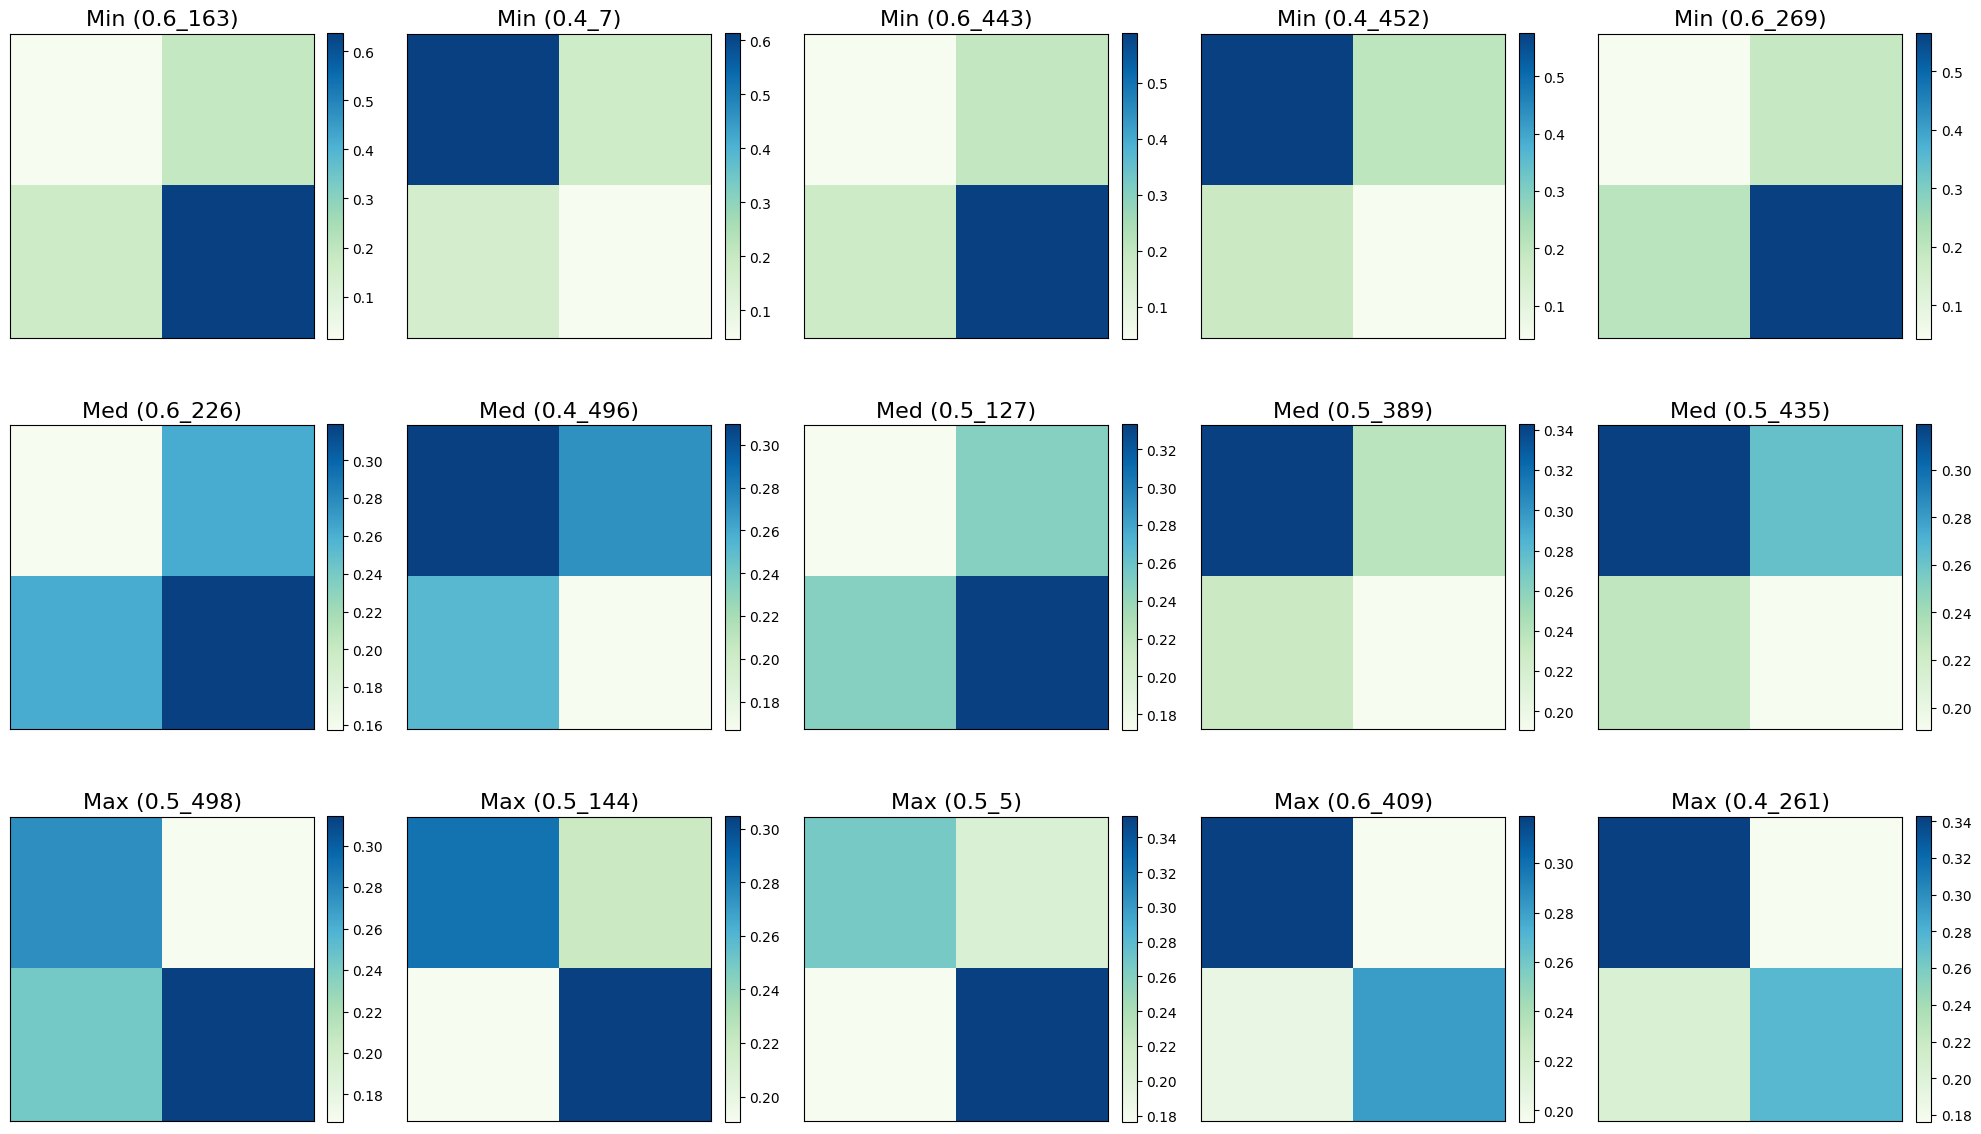

In [83]:
sum_entropy_keys = [
    '0.6_163', '0.4_7', '0.6_443', '0.4_452', '0.6_269', 
    '0.6_226', '0.4_496', '0.5_127', '0.5_389', '0.5_435',   
    '0.5_498', '0.5_144', '0.5_5', '0.6_409', '0.4_261'  
]

sum_entropy_titles = [
    'Min', 'Min', 'Min', 'Min', 'Min',
    'Med', 'Med', 'Med', 'Med', 'Med', 
    'Max', 'Max', 'Max', 'Max', 'Max'
]

fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.flatten() 

for i in range(15):
    ax = axes[i]
    key = sum_entropy_keys[i]
    
    im = ax.imshow(df['glcm'][key], cmap='GnBu')
    ax.set_title(f'{sum_entropy_titles[i]} ({sum_entropy_keys[i]})', fontsize=16)
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

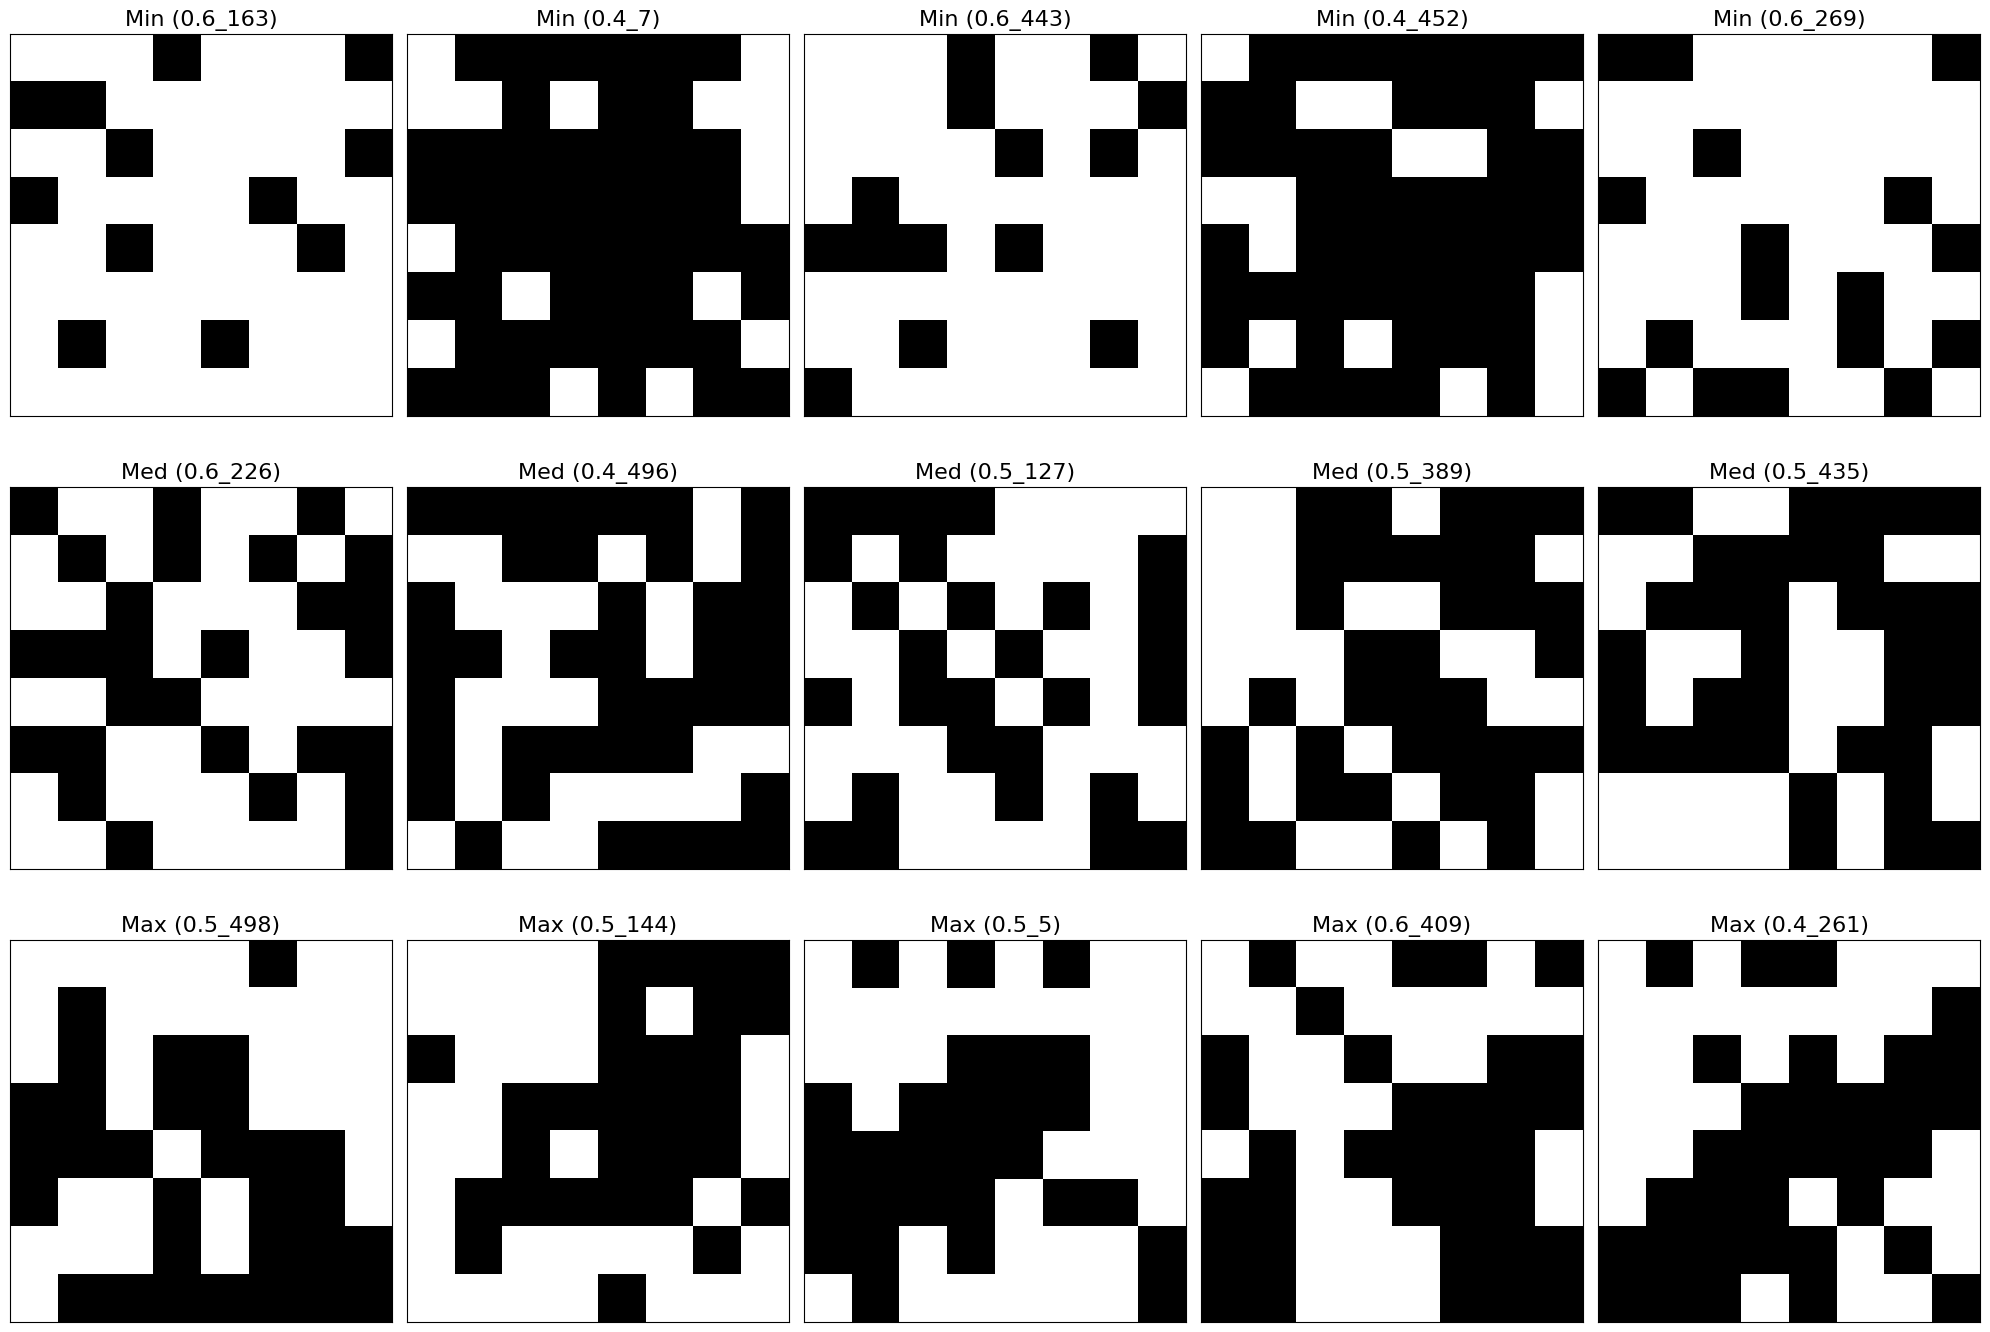

In [85]:
fig, axes = plt.subplots(3, 5, figsize=(20, 14))
axes = axes.flatten() 

for i in range(15):
    ax = axes[i]
    key = sum_entropy_keys[i]
    
    im = ax.imshow(df['image'][key], cmap='gray')
    ax.set_title(f'{sum_entropy_titles[i]} ({sum_entropy_keys[i]})', fontsize=16)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

## Sum of squares

$$ \sum^{N}_{i=1}\sum^{N}_{j=1}{(i-\mu)^2p(i,j)} $$
or,
$$ \sum^{N}_{i=1}\sum^{N}_{j=1}{(i-\mu_x)^2p(i,j)} $$

* Sum of Squares or Variance is a measure in the distribution of neighboring intensity level pairs about the mean intensity level in the GLCM (pyradiomics).

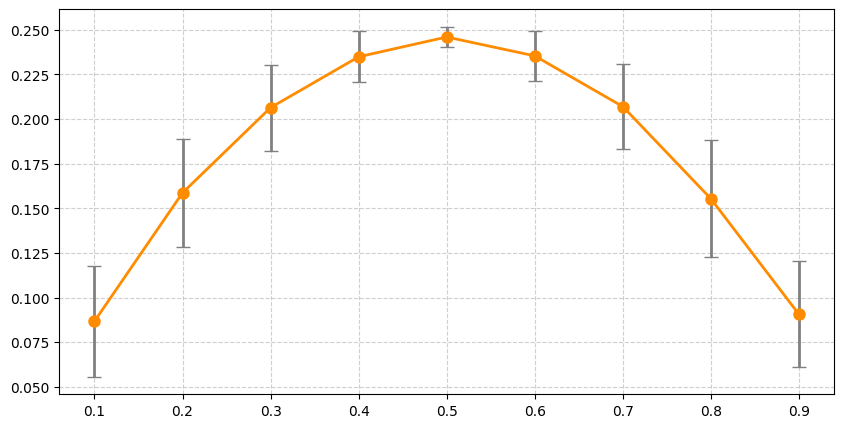

In [53]:
avg_sum_of_squares = [np.mean([features[19] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_sum_of_squares = [np.std([features[19] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_sum_of_squares, yerr=std_sum_of_squares, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Below we compare samples that produced 5 of the lowest, middle, and highest values of Sum of squares. We focus on random settings between 0.4 and 0.6 to avoid redundancy.

In [75]:
df_sum_of_squares = df[(df['p'] == 0.4) | (df['p'] == 0.5) | (df['p'] == 0.6)
            ].sort_values(by=["sum_of_squares"])[['sum_of_squares', 'glcm', 'image']]

df_sum_of_squares

sum_of_squares                                               glcm  \
0.6_163        0.160000  [[0.014285714285714285, 0.18571428571428572], ...   
0.4_7          0.165624  [[0.6142857142857143, 0.1761904761904762], [0....   
0.6_455        0.171066  [[0.06190476190476191, 0.15714285714285714], [...   
0.4_452        0.171066  [[0.5761904761904761, 0.20476190476190476], [0...   
0.6_269        0.176327  [[0.04285714285714286, 0.18571428571428572], [...   
...                 ...                                                ...   
0.5_461        0.250000  [[0.2571428571428571, 0.24285714285714285], [0...   
0.5_79         0.250000  [[0.26666666666666666, 0.23333333333333334], [...   
0.5_50         0.250000  [[0.26666666666666666, 0.23333333333333334], [...   
0.6_450        0.250000  [[0.2619047619047619, 0.23809523809523808], [0...   
0.5_132        0.250000  [[0.22380952380952382, 0.2761904761904762], [0...   

                                                     image  
0.6_163  [[1, 1, 1, 0, 1, 1, 1, 0], [0, 0, 1, 1, 1, 1, ...  
0.4_7    [[1, 0, 0, 0, 0, 0, 0, 1], [1, 1, 0, 1, 0, 0, ...  
0.6_455  [[1, 1, 1, 1, 0, 1, 1, 1], [1, 1, 1, 0, 1, 1, ...  
0.4_452  [[1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 0, 0, ...  
0.6_269  [[0, 0, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, ...  
...                                                    ...  
0.5_461  [[1, 1, 0, 0, 1, 1, 0, 0], [0, 1, 1, 0, 1, 1, ...  
0.5_79   [[1, 1, 1, 0, 1, 0, 1, 0], [1, 0, 1, 0, 1, 0, ...  
0.5_50   [[1, 1, 1, 1, 0, 0, 0, 0], [0, 1, 0, 1, 0, 1, ...  
0.6_450  [[1, 1, 1, 0, 0, 1, 1, 1], [0, 0, 0, 1, 0, 0, ...  
0.5_132  [[1, 0, 0, 0, 1, 1, 0, 0], [0, 1, 1, 1, 0, 0, ...  

[1500 rows x 3 columns]

In [76]:
mid_idx = len(df_sum_of_squares) // 2
start = max(0, mid_idx - (5 // 2))
end = start + 5

df_middle_5 = df_sum_of_squares.iloc[start:end]
df_middle_5

sum_of_squares                                               glcm  \
0.6_226        0.243447  [[0.15714285714285714, 0.2619047619047619], [0...   
0.4_496        0.243447  [[0.30952380952380953, 0.2714285714285714], [0...   
0.5_127        0.243447  [[0.17142857142857143, 0.24761904761904763], [...   
0.5_389        0.243447  [[0.34285714285714286, 0.23809523809523808], [...   
0.5_435        0.243447  [[0.319047619047619, 0.2619047619047619], [0.2...   

                                                     image  
0.6_226  [[0, 1, 1, 0, 1, 1, 0, 1], [1, 0, 1, 0, 1, 0, ...  
0.4_496  [[0, 0, 0, 0, 0, 0, 1, 0], [1, 1, 0, 0, 1, 0, ...  
0.5_127  [[0, 0, 0, 0, 1, 1, 1, 1], [0, 1, 0, 1, 1, 1, ...  
0.5_389  [[1, 1, 0, 0, 1, 0, 0, 0], [1, 1, 0, 0, 0, 0, ...  
0.5_435  [[0, 0, 1, 1, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, ...

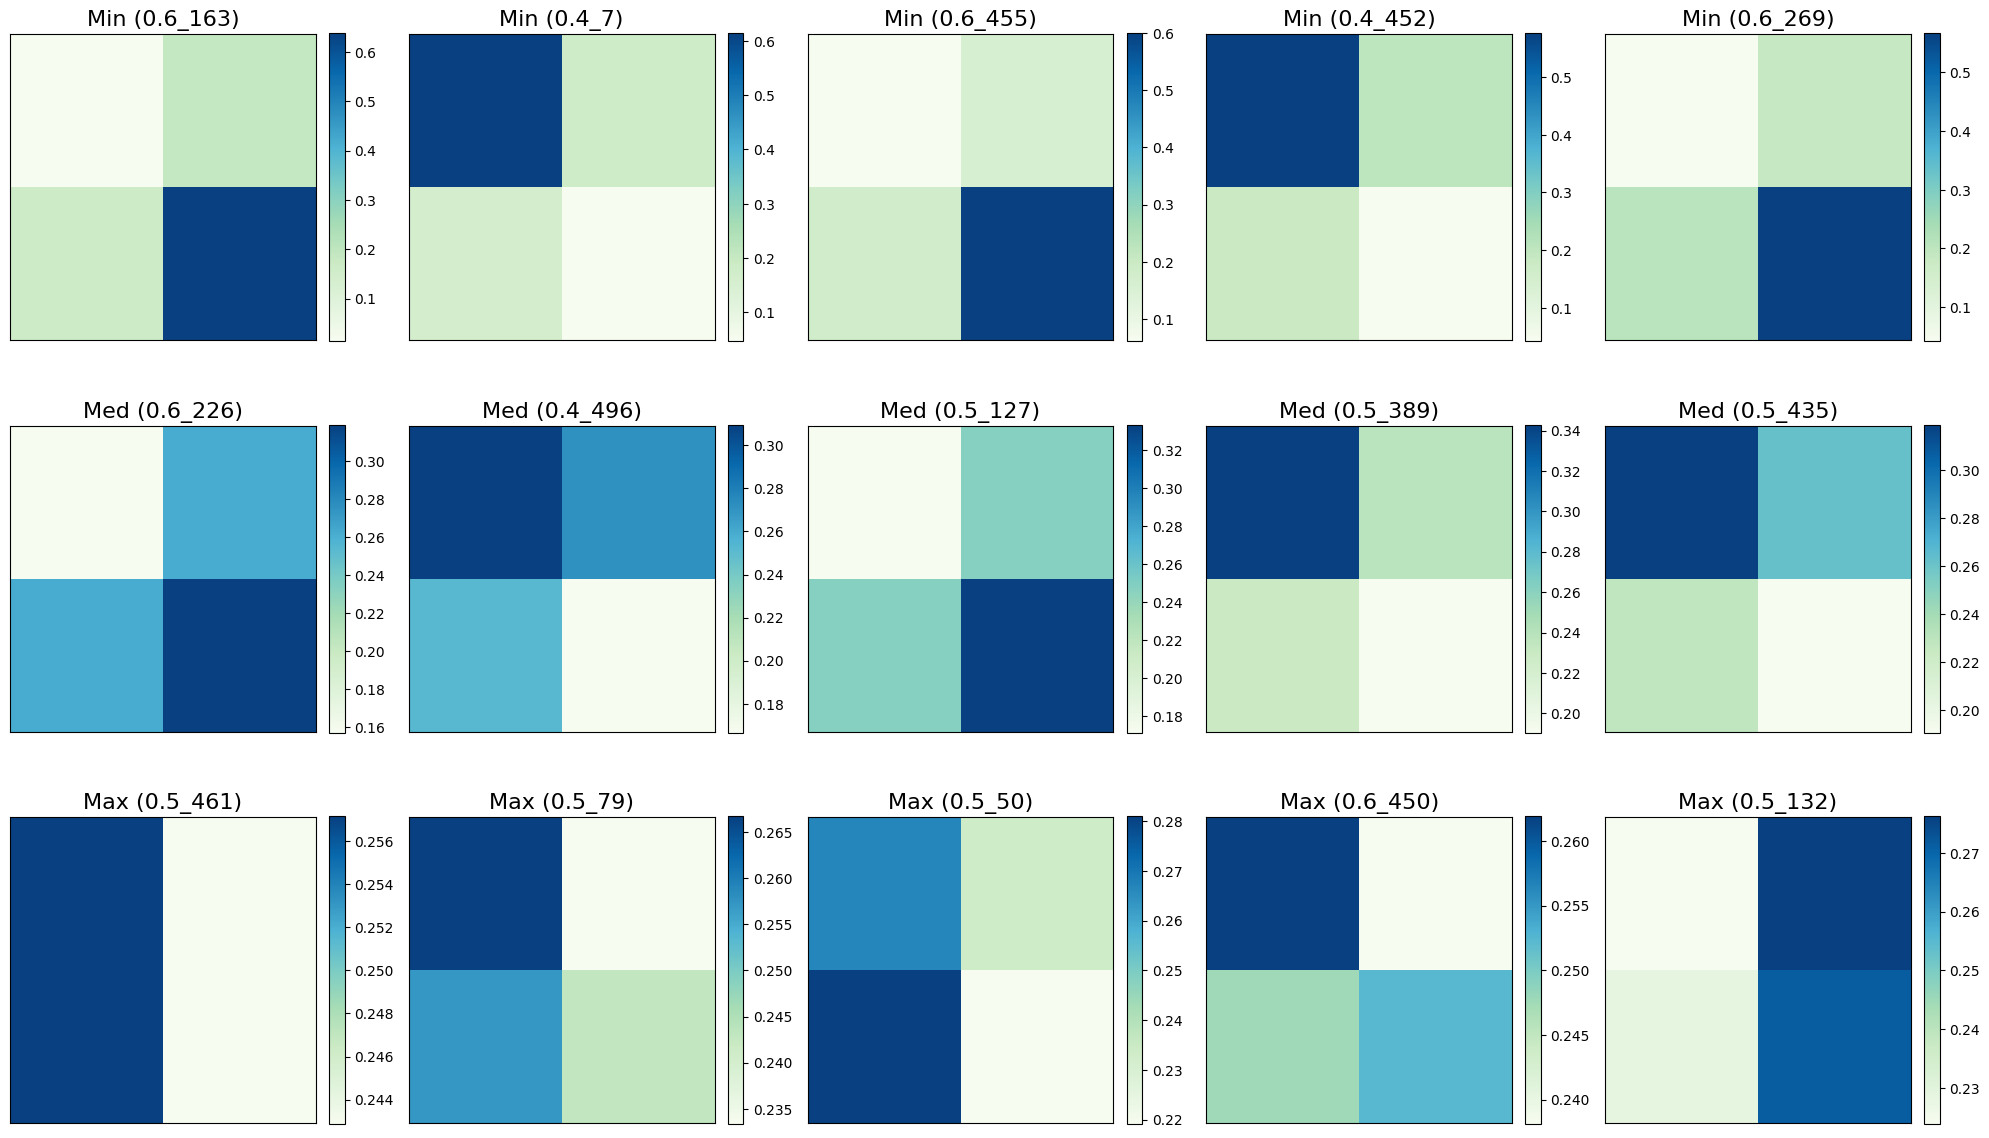

In [78]:
sum_of_squares_keys = [
    '0.6_163', '0.4_7', '0.6_455', '0.4_452', '0.6_269', 
    '0.6_226', '0.4_496', '0.5_127', '0.5_389', '0.5_435',   
    '0.5_461', '0.5_79', '0.5_50', '0.6_450', '0.5_132'  
]

sum_of_squares_titles = [
    'Min', 'Min', 'Min', 'Min', 'Min',
    'Med', 'Med', 'Med', 'Med', 'Med', 
    'Max', 'Max', 'Max', 'Max', 'Max'
]

fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.flatten() 

for i in range(15):
    ax = axes[i]
    key = sum_of_squares_keys[i]
    
    im = ax.imshow(df['glcm'][key], cmap='GnBu')
    ax.set_title(f'{sum_of_squares_titles[i]} ({sum_of_squares_keys[i]})', fontsize=16)
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

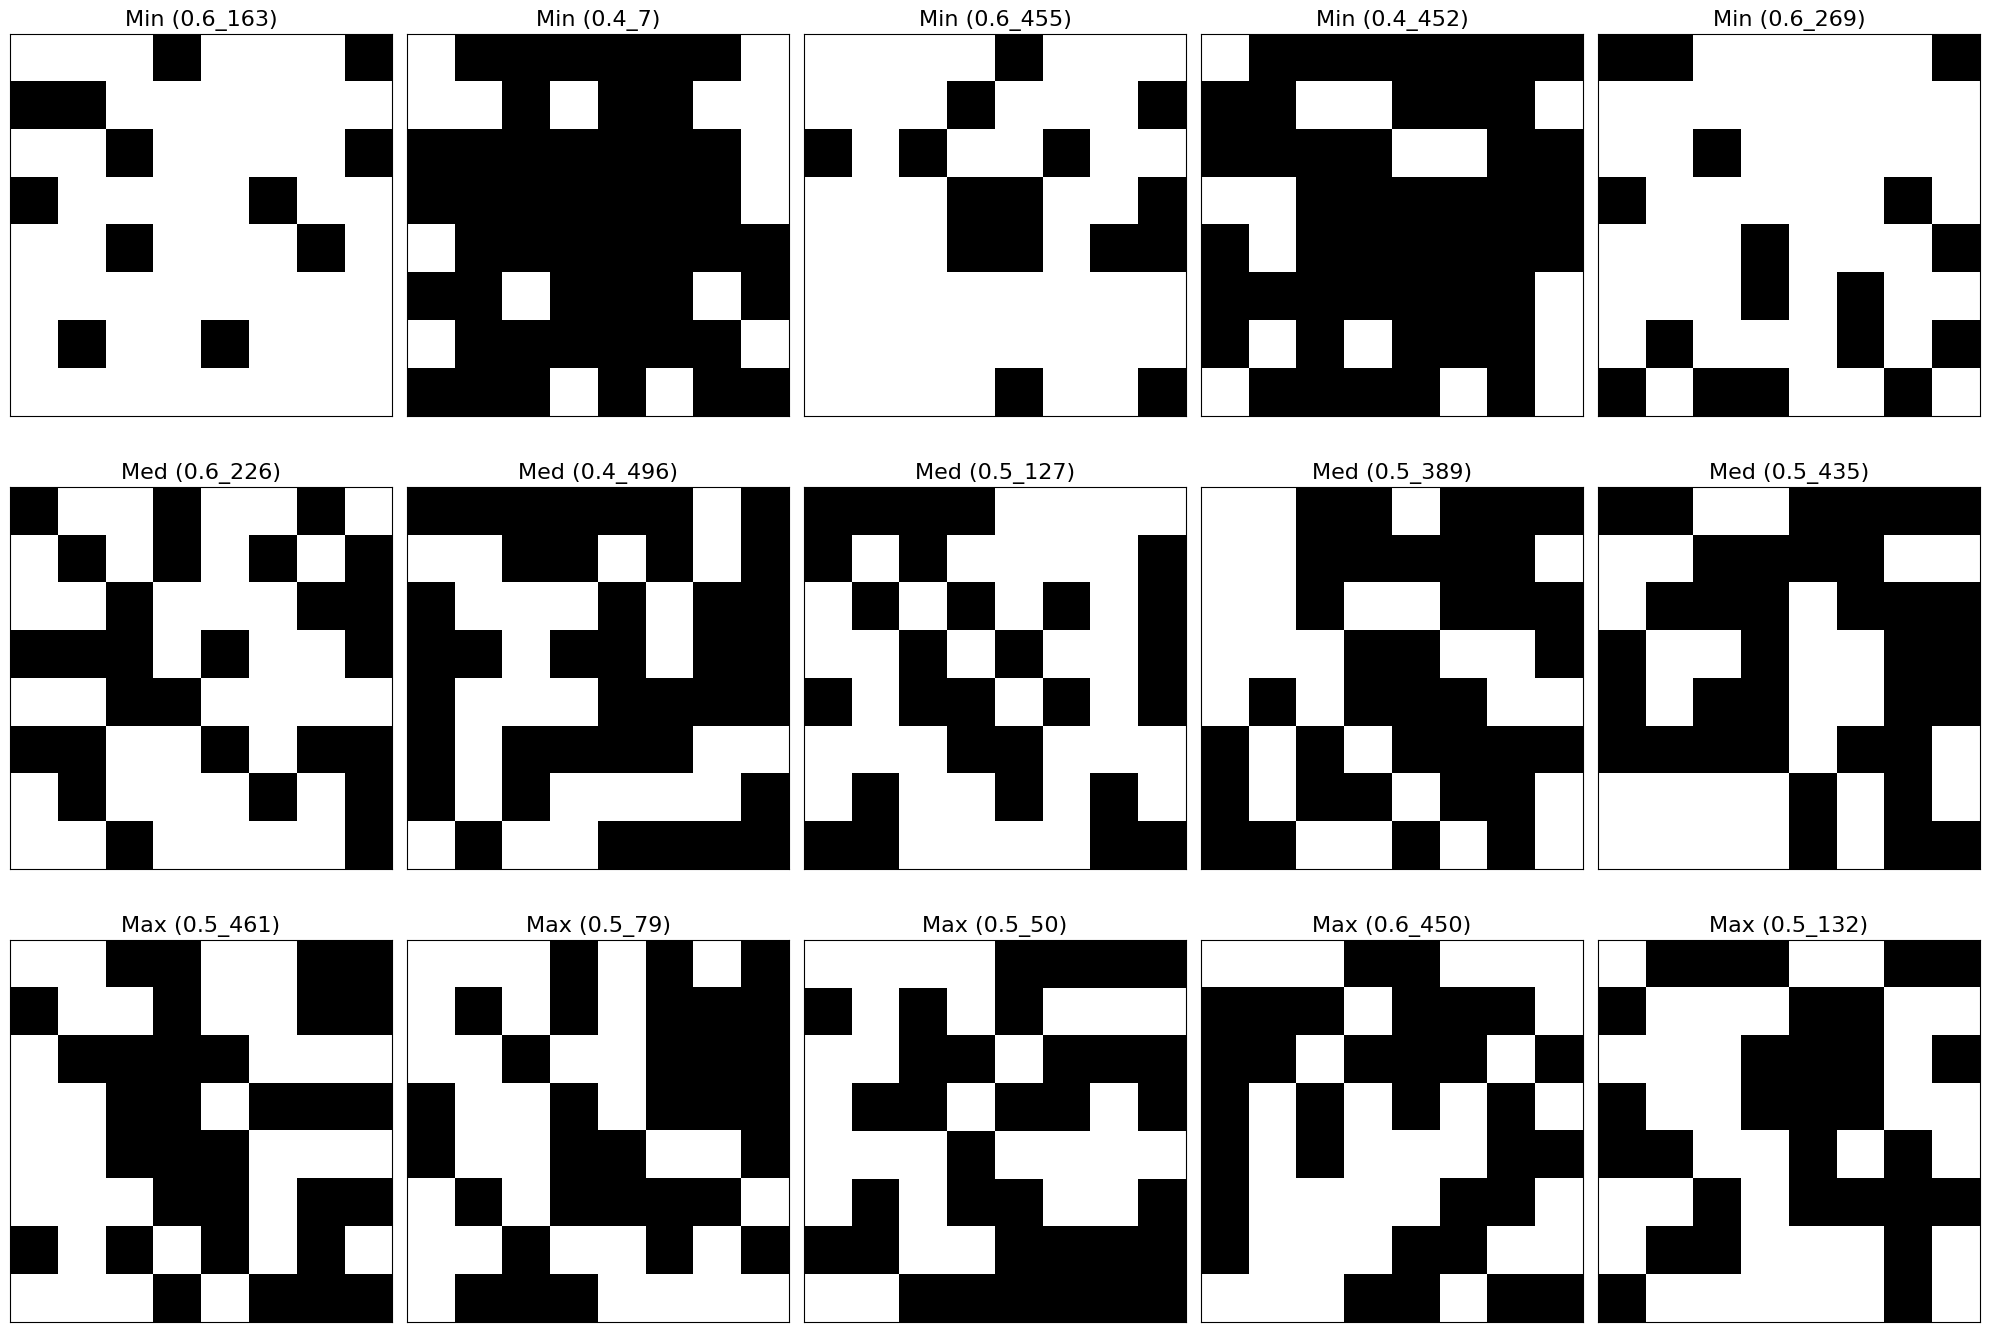

In [80]:
fig, axes = plt.subplots(3, 5, figsize=(20, 14))
axes = axes.flatten() 

for i in range(15):
    ax = axes[i]
    key = sum_of_squares_keys[i]
    
    im = ax.imshow(df['image'][key], cmap='gray')
    ax.set_title(f'{sum_of_squares_titles[i]} ({sum_of_squares_keys[i]})', fontsize=16)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

## Maximal Correlation Coefficient

$$ \sqrt{\text{second largest eigenvalue of Q}} $$
or,
$$ \sqrt{\lambda_2 Q(i,j)} $$

$$ Q(i, j) = \displaystyle\sum^{N}_{k=0}{\frac{p(i,k)p(j, k)}{p_x(i)p_y(k)}} $$

* The Maximal Correlation Coefficient is a measure of complexity of the texture. In case of a flat region, each GLCM matrix has shape (1, 1), resulting in just 1 eigenvalue. In this case, an arbitrary value of 1 is returned (pyradiomics).

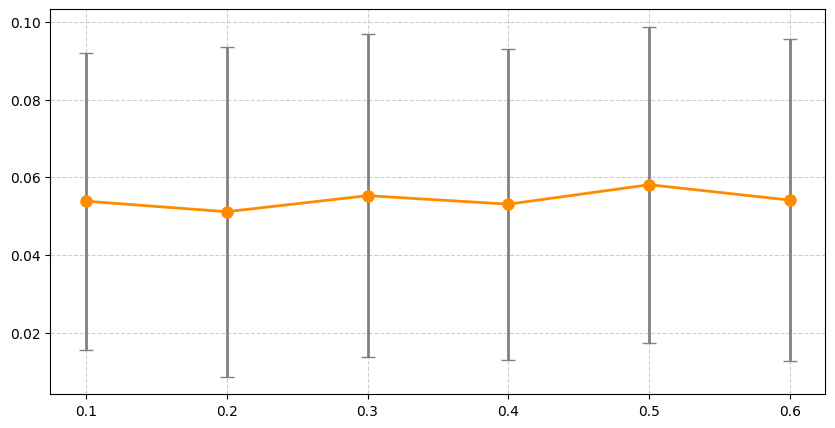

In [52]:
avg_mcc = [np.mean([features[22] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_mcc = [np.std([features[22] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_mcc, yerr=std_mcc, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Inverse variance

$$ \sum^{N_g-1}_{k=1}{\frac{p_{x-y}(k)}{k^2}} $$
or,
$$ \sum^{N_g}_{i=1} \sum^{N_g}_{j=1} {\frac{p(i,j)}{|i-j|^2}} \ , \ \ i \neq j  $$


The $\frac{1}{|i-j|^2}$ is similar to Inverse difference moment. Instead this feature begins at $k=1$ to avoid divition by $0$. Because $k^2$ grows quadratically, the weights $1/k^2$ decreases quickly as we move closer to the diagonal. For example, a difference of $k=1$ has a weight of $1.0$, while a difference of $k=10$ has a weight of $0.01$. This feature has stronger wieghts for off-diagonals further from the diagonal, but instead of factoring by $k$ (as done in Contrast) it is factored by $1/k^2$.

High Inverse Variance suggests a homogeneous image where majority of the neighboring pixels have identical or nearly identical gray levels. (plots of Inverse variance and contrast may seam identical because only two gray levels are used in our experiments).

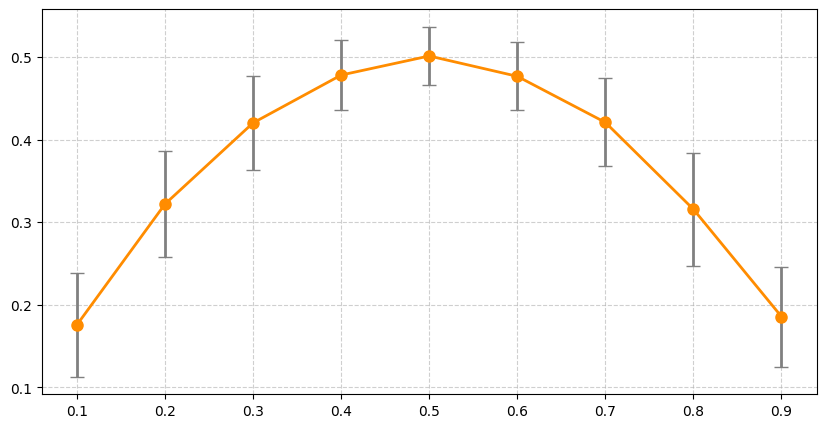

In [55]:
avg_inverse_variance = [np.mean([features[14] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_inverse_variance = [np.std([features[14] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_inverse_variance, yerr=std_inverse_variance, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Below we compare samples that produced 5 of the lowest, middle, and highest values of inverse variance (within random settings 0.4-0.6).

In [63]:
df_inverse_variance = df[(df['p'] == 0.4) | (df['p'] == 0.5) | (df['p'] == 0.6)
            ].sort_values(by=["inverse_variance"])[['inverse_variance', 'glcm', 'image']]

df_inverse_variance

inverse_variance                                               glcm  \
0.6_45           0.333333  [[0.09523809523809523, 0.1761904761904762], [0...   
0.6_455          0.338095  [[0.06190476190476191, 0.15714285714285714], [...   
0.4_7            0.338095  [[0.6142857142857143, 0.1761904761904762], [0....   
0.4_311          0.342857  [[0.5857142857142857, 0.1619047619047619], [0....   
0.6_163          0.347619  [[0.014285714285714285, 0.18571428571428572], ...   
...                   ...                                                ...   
0.5_491          0.576190  [[0.19047619047619047, 0.2904761904761905], [0...   
0.6_182          0.576190  [[0.1619047619047619, 0.3047619047619048], [0....   
0.5_257          0.580952  [[0.22380952380952382, 0.2761904761904762], [0...   
0.5_2            0.585714  [[0.21428571428571427, 0.3], [0.28571428571428...   
0.4_315          0.585714  [[0.22380952380952382, 0.30952380952380953], [...   

                                                     image  
0.6_45   [[1, 1, 1, 1, 0, 0, 0, 0], [1, 1, 0, 0, 1, 0, ...  
0.6_455  [[1, 1, 1, 1, 0, 1, 1, 1], [1, 1, 1, 0, 1, 1, ...  
0.4_7    [[1, 0, 0, 0, 0, 0, 0, 1], [1, 1, 0, 1, 0, 0, ...  
0.4_311  [[1, 0, 0, 0, 0, 1, 0, 0], [1, 1, 1, 0, 0, 0, ...  
0.6_163  [[1, 1, 1, 0, 1, 1, 1, 0], [0, 0, 1, 1, 1, 1, ...  
...                                                    ...  
0.5_491  [[0, 1, 1, 1, 1, 1, 0, 0], [1, 0, 0, 0, 0, 0, ...  
0.6_182  [[0, 0, 0, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, ...  
0.5_257  [[0, 1, 0, 1, 0, 0, 1, 0], [1, 1, 0, 0, 1, 0, ...  
0.5_2    [[0, 1, 0, 1, 0, 1, 0, 0], [0, 1, 0, 1, 0, 0, ...  
0.4_315  [[0, 1, 0, 0, 0, 0, 1, 0], [0, 0, 1, 1, 0, 1, ...  

[1500 rows x 3 columns]

In [68]:
mid_idx = len(df_inverse_variance) // 2
start = max(0, mid_idx - (5 // 2))
end = start + 5

df_middle_5 = df_inverse_variance.iloc[start:end]
df_middle_5

inverse_variance                                               glcm  \
0.4_298          0.490476  [[0.3476190476190476, 0.2571428571428571], [0....   
0.4_181          0.490476  [[0.38571428571428573, 0.23333333333333334], [...   
0.4_316          0.490476  [[0.2619047619047619, 0.2523809523809524], [0....   
0.6_18           0.490476  [[0.10952380952380952, 0.23809523809523808], [...   
0.4_41           0.490476  [[0.3238095238095238, 0.23809523809523808], [0...   

                                                     image  
0.4_298  [[0, 0, 0, 0, 1, 0, 1, 0], [0, 0, 0, 0, 0, 0, ...  
0.4_181  [[1, 0, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 1, 0, ...  
0.4_316  [[0, 1, 1, 0, 0, 1, 0, 0], [0, 0, 0, 1, 0, 1, ...  
0.6_18   [[0, 1, 1, 1, 1, 1, 0, 1], [1, 1, 1, 1, 1, 1, ...  
0.4_41   [[1, 1, 0, 1, 0, 0, 1, 1], [0, 0, 1, 0, 0, 1, ...

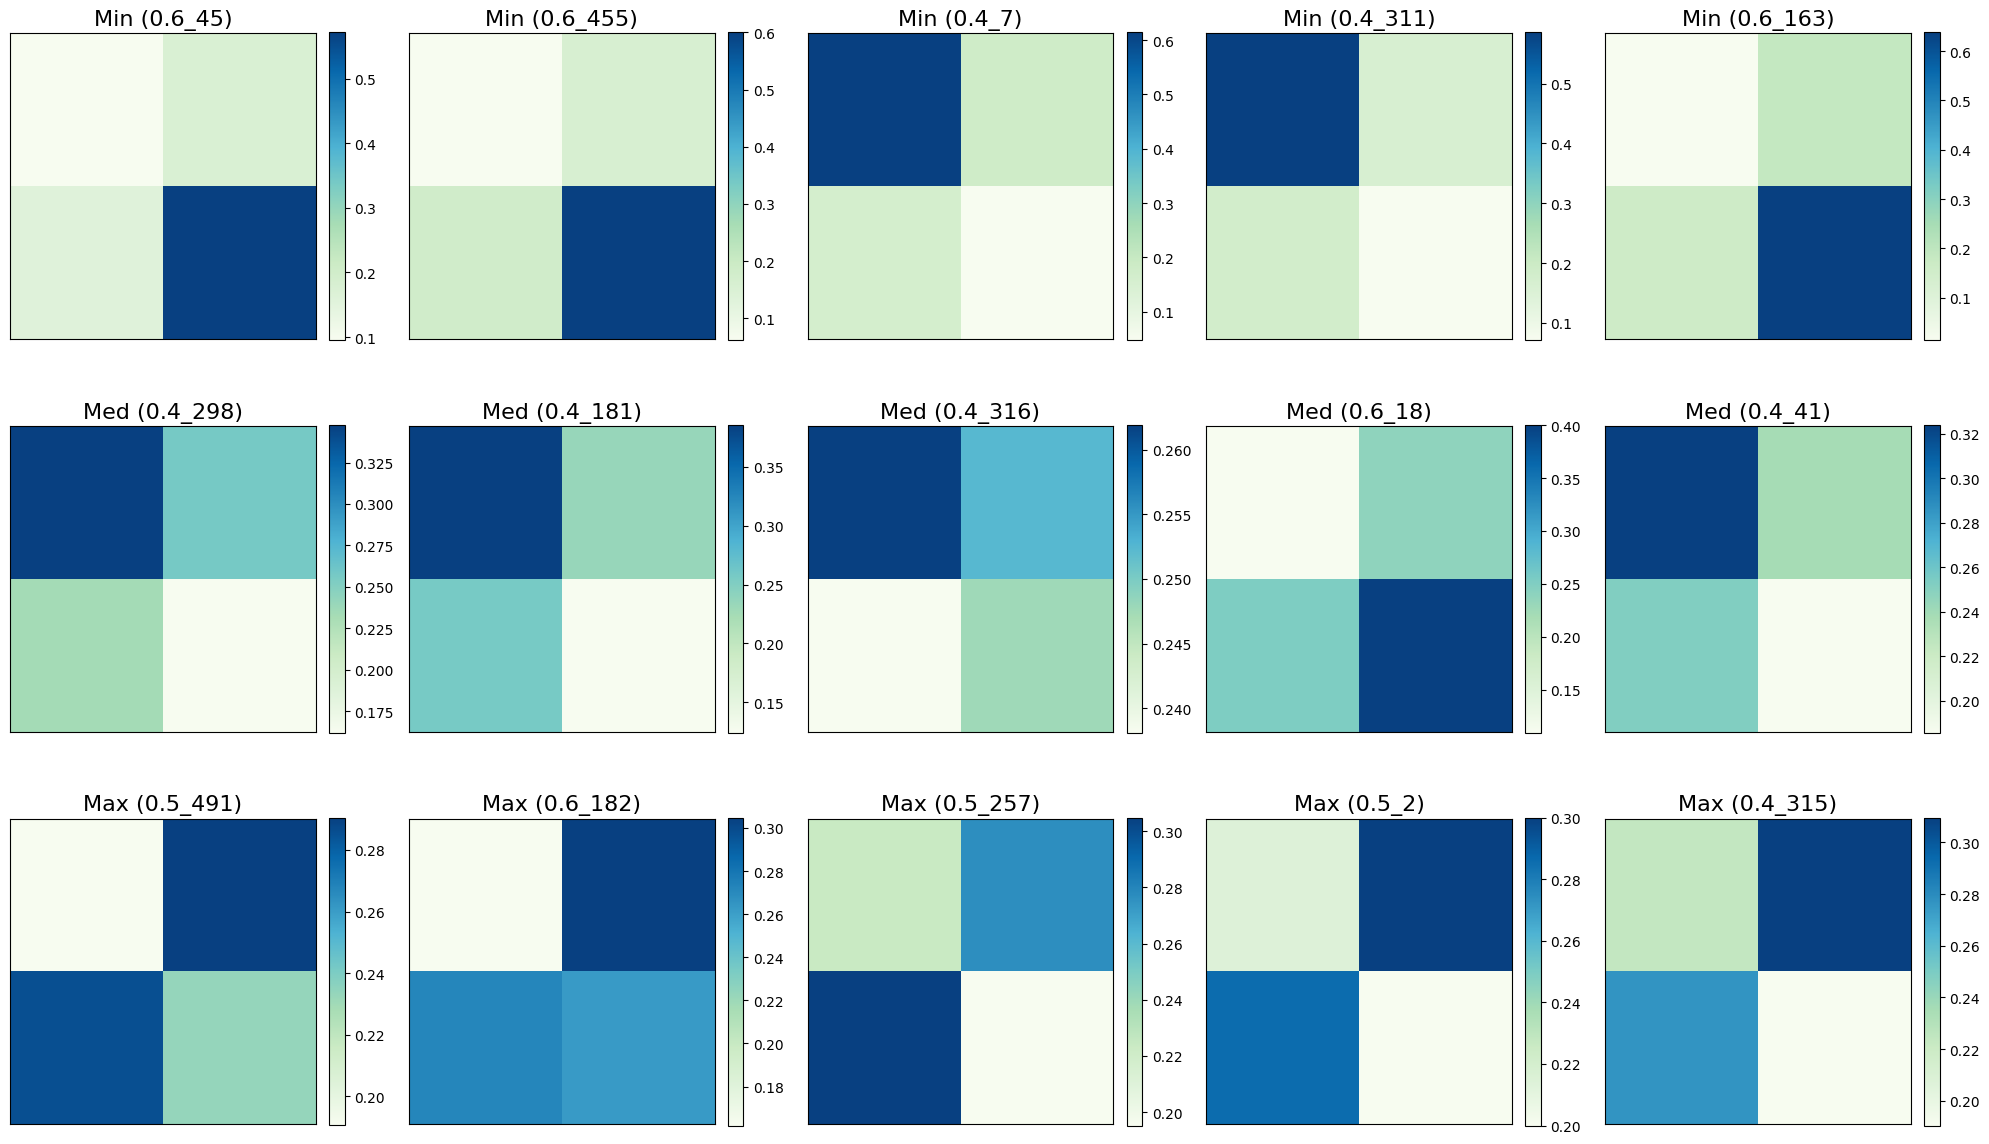

In [69]:
inverse_variance_keys = [
    '0.6_45', '0.6_455', '0.4_7', '0.4_311', '0.6_163', 
    '0.4_298', '0.4_181', '0.4_316', '0.6_18', '0.4_41',   
    '0.5_491', '0.6_182', '0.5_257', '0.5_2', '0.4_315'  
]

inverse_variance_titles = [
    'Min', 'Min', 'Min', 'Min', 'Min',
    'Med', 'Med', 'Med', 'Med', 'Med', 
    'Max', 'Max', 'Max', 'Max', 'Max'
]

fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.flatten() 

for i in range(15):
    ax = axes[i]
    key = inverse_variance_keys[i]
    
    im = ax.imshow(df['glcm'][key], cmap='GnBu')
    ax.set_title(f'{inverse_variance_titles[i]} ({inverse_variance_keys[i]})', fontsize=16)
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

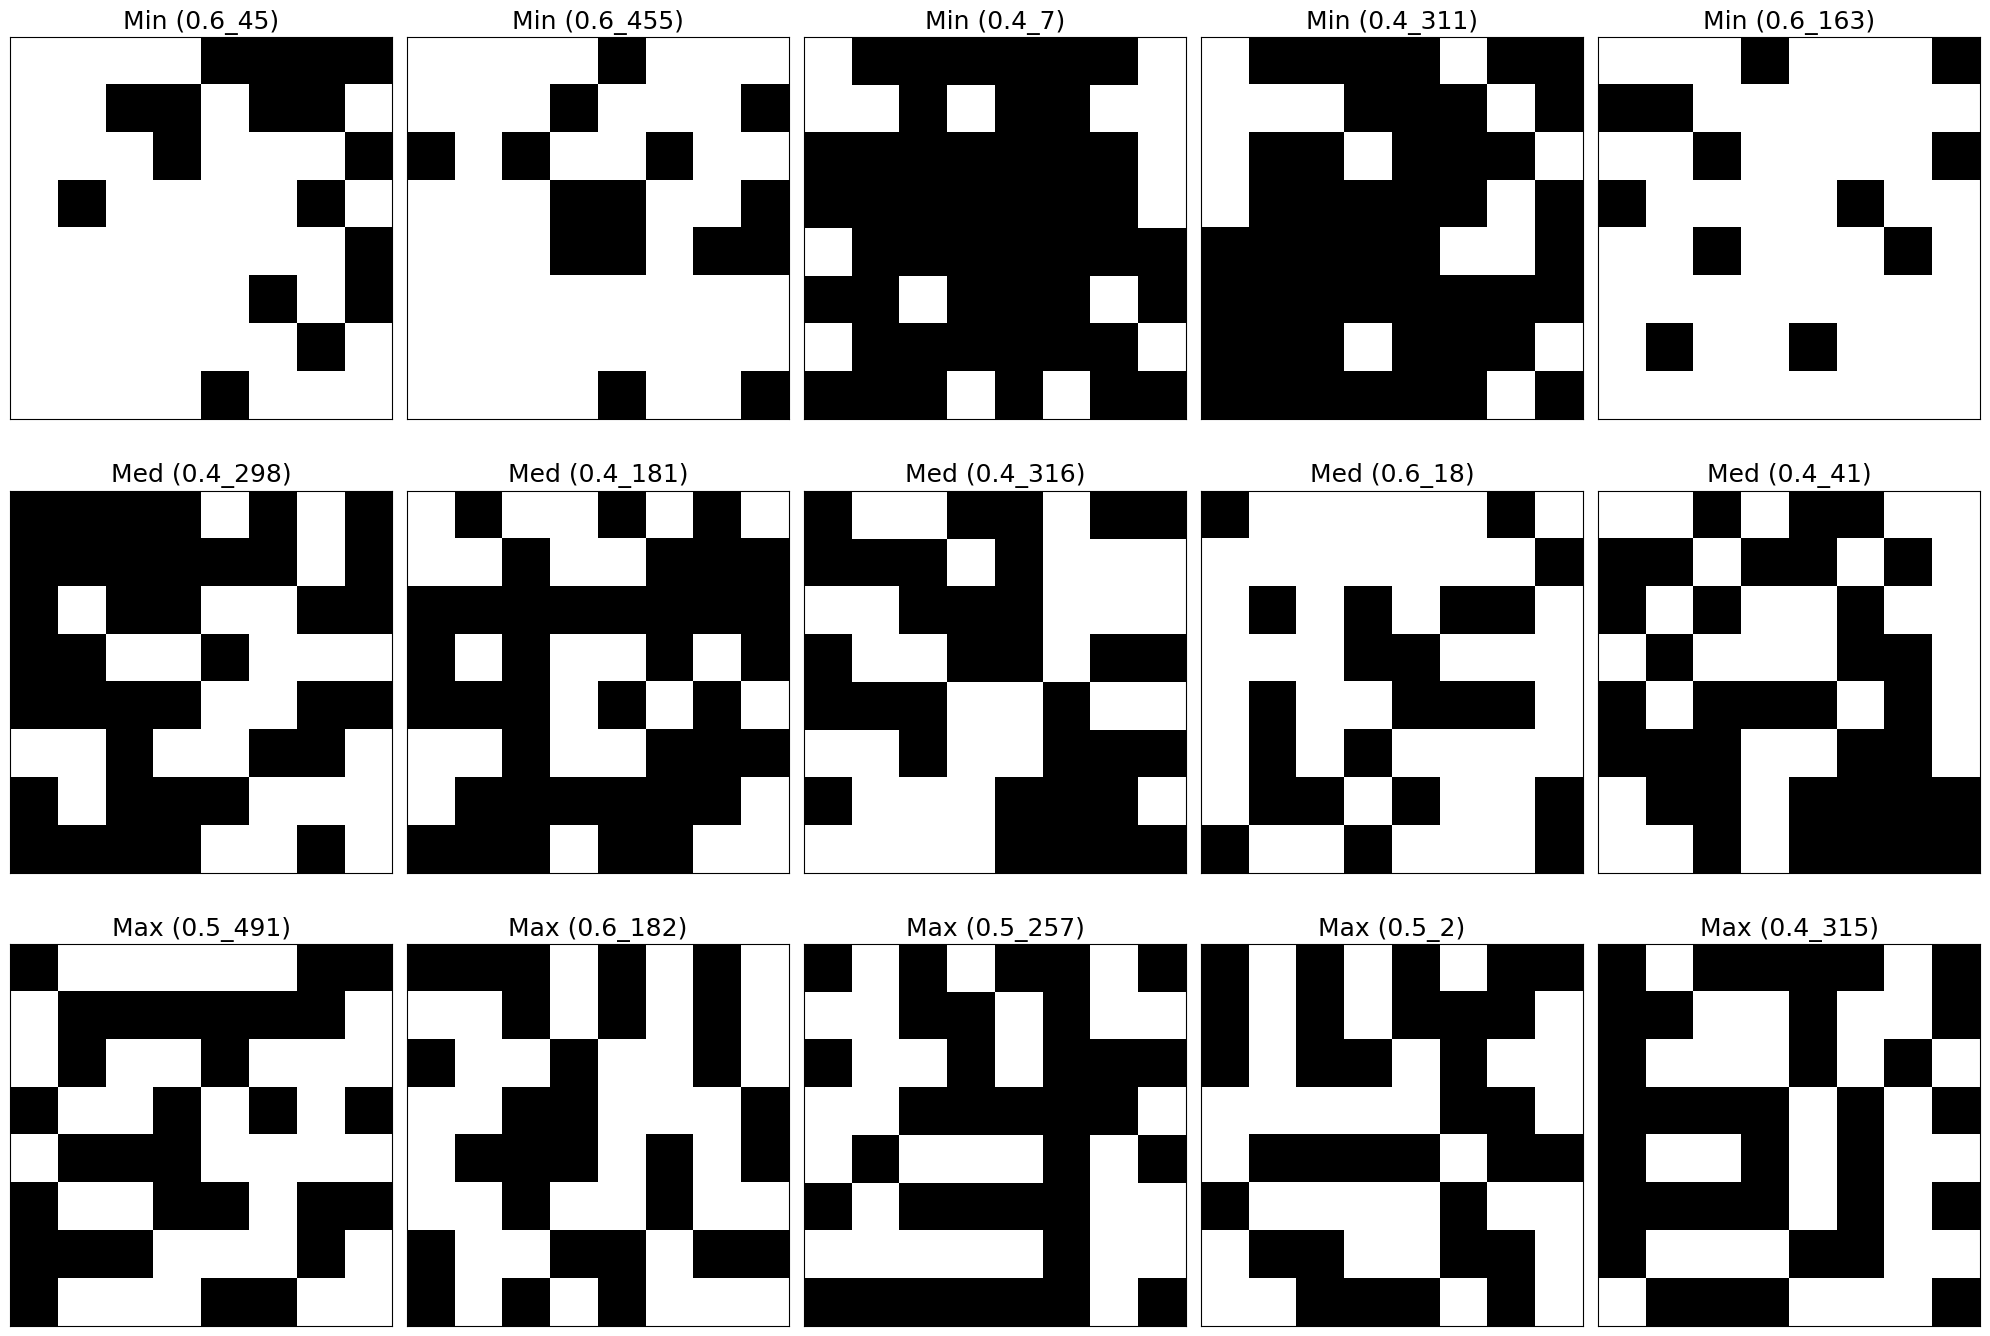

In [73]:
fig, axes = plt.subplots(3, 5, figsize=(20, 14))
axes = axes.flatten() 

for i in range(15):
    ax = axes[i]
    key = inverse_variance_keys[i]
    
    im = ax.imshow(df['image'][key], cmap='gray')
    ax.set_title(f'{inverse_variance_titles[i]} ({inverse_variance_keys[i]})', fontsize=18)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

Several other features are not listed here, can be found at (pyradiomics).

# Extras / Appendix

## Composit plot

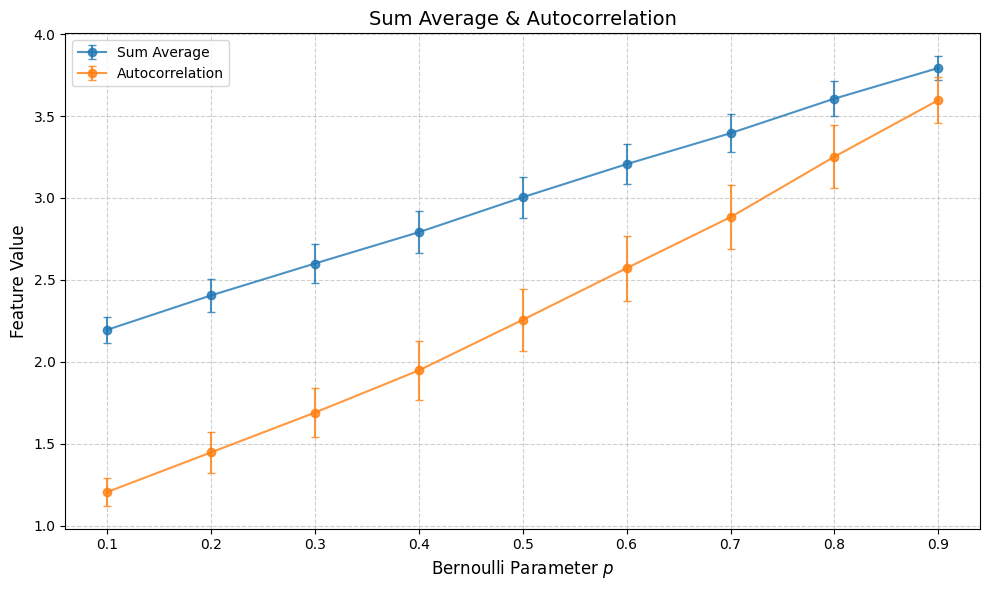

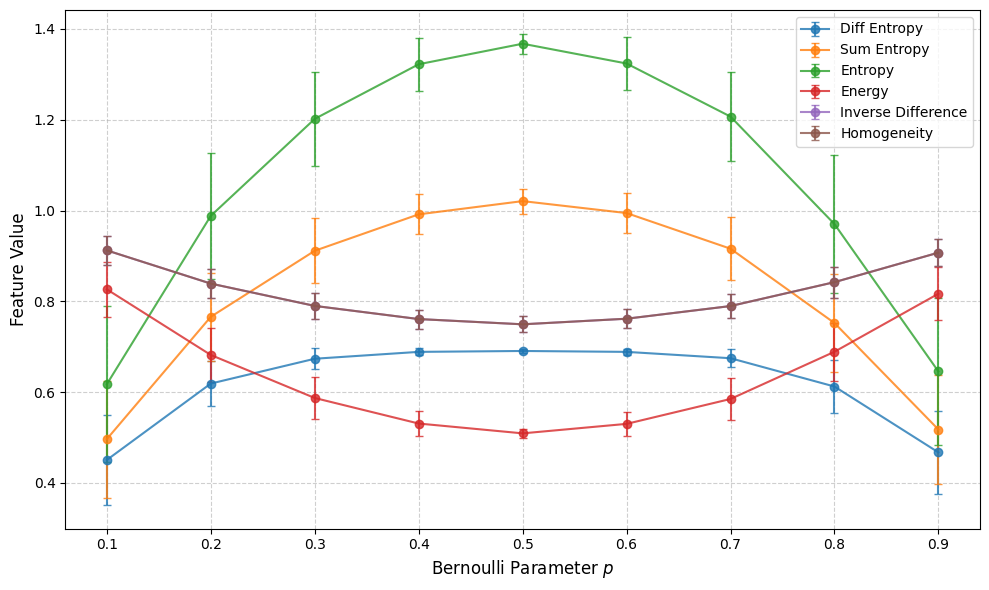

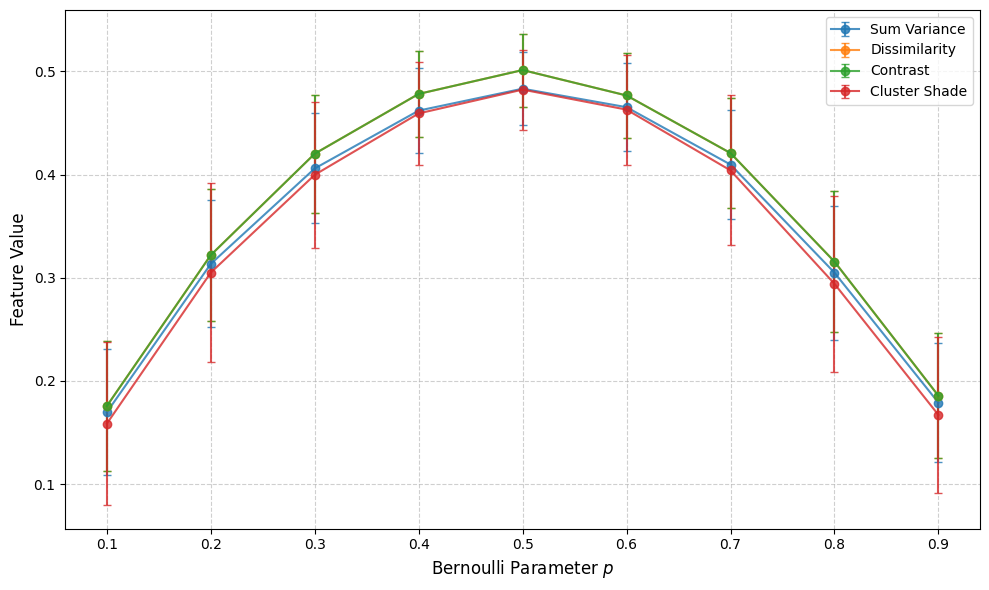

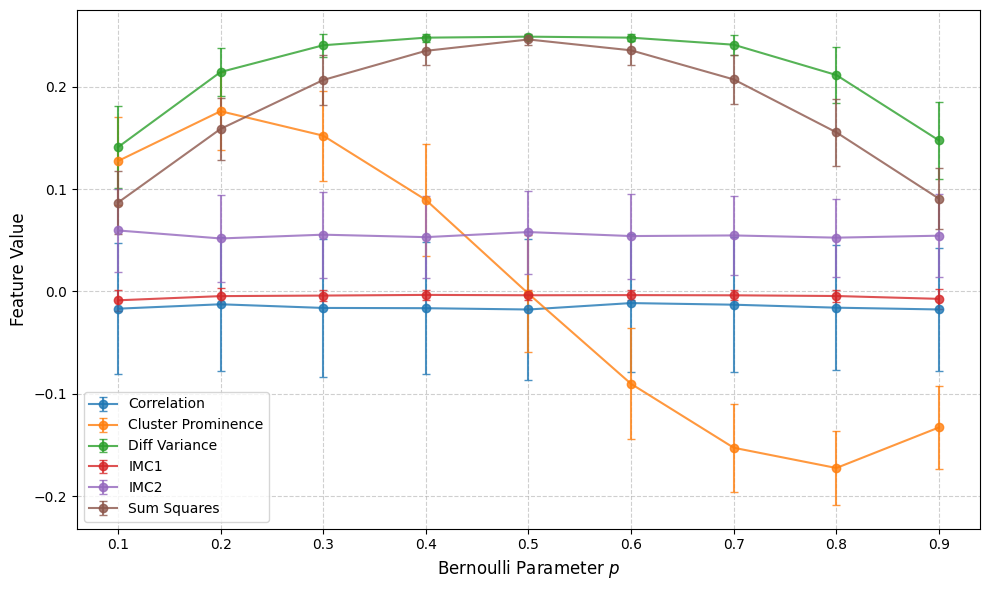

In [671]:
feature_names = [
    'Contrast', 'Energy', 'Homogeneity', 'Correlation', 
    'Autocorrelation', 'Cluster Prominence', 'Cluster Shade', 'Dissimilarity', 
    'Entropy', 'Diff Entropy', 'Diff Variance', 'Inverse Difference', 
    'IMC1', 'IMC2', 'Sum Average', 'Sum Entropy', 'Sum Squares', 'Sum Variance'
]

# Sum Average, Autocorrelation
group1_indices = [14, 4]  

# Diff Entropy, Sum Entropy, Entropy, Homogeneity, Inv Difference, Eenergy
group2_indices = [9, 15, 8, 1, 11, 2]

# Sum variance, Dissimilarity, Contrast, Cluster shade
group3_indices = [17, 7, 0, 6]

group4_indices = [i for i in range(18) if i not in group1_indices and i not in group2_indices and i not in group3_indices and i not in group4_indices]

def plot_group(indices, title):
    plt.figure(figsize=(10, 6))
    for i in indices:
        avg_feat = [np.mean([f[i] for f in sample_features[p]]) for p in BERNOULLI_SETTINGS]
        std_feat = [np.std([f[i] for f in sample_features[p]]) for p in BERNOULLI_SETTINGS]
        
        plt.errorbar(BERNOULLI_SETTINGS, avg_feat, yerr=std_feat, marker='o', 
                     label=feature_names[i], capsize=3, alpha=0.8)

    plt.title(title, fontsize=14)
    plt.xlabel('Bernoulli Parameter $p$', fontsize=12)
    plt.ylabel('Feature Value', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

plot_group(group1_indices, "Sum Average & Autocorrelation")
plot_group(group2_indices, "")
plot_group(group3_indices, "")
plot_group(group4_indices, "")

## Notation